This is a FNO solver for Reactive Burgers Equation. We have to specify the parameters here only, and the train()
function will train the operator. Analyze() function will solve the equation with FNO uptil FinalSolve time. It will also generate the figures to visualize and give L2 and Inf error between the true and original

In [1]:
import timeit
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.parameter import Parameter
import matplotlib.pyplot as plt

import operator
from functools import reduce
from functools import partial
from timeit import default_timer
from utilities3 import *

from Adam import Adam

%run ./Train.ipynb
%run ./Analyze.ipynb
%run ./Data_Generator/KFRDG.ipynb

In [2]:
import csv

def read_lines():
    with open('AlphaList - Sheet1.csv', 'rU') as data:
        reader = csv.reader(data)
        for row in reader:
            yield [ float(i) for i in row ]

In [3]:
################################################################
#  configurations for Data Generation
################################################################

Alpha = list(read_lines())                #the equation parameter
InitialSolve = 350                 #the time for solving the weno initially
Space = 3000                       #the area from where training data is randomly is generated
Ndt = 20                    #the labels are Ndt after the input
TrainingSamples = 1500
FinalSolve = 10000                 #for comparison

################################################################
#  configurations for FNO
################################################################
ntrain = 1450
ntest = 100

#sub = 2**3 #subsampling rate
#h = 2**13 // sub #total grid size divided by the subsampling rate
S = 207

batch_size = 30
learning_rate = 0.01

epochs = 500
step_size = 50
gamma = 0.5

modes = 12
width = 85

################################################################
#  configurations for Figures
################################################################
Initial = 350
Cutoff = 500

In [4]:
for alpha in Alpha:
    #Alpha = Alpha + 0.01
    Param = {
        "Alpha": alpha[-1],
        "InitialSolve": InitialSolve,
        "FinalSolve": FinalSolve,
        "Ndt": Ndt,
        "TrainingSamples": TrainingSamples,
        "ntrain": ntrain,
        "ntest": ntest,
        "S": S,
        "batch_size": batch_size,
        "learning_rate": learning_rate,
        "epochs": epochs,
        "step_size": step_size,
        "gamma": gamma, 
        "modes": modes,
        "width": width,
        "Initial": Initial,
        "Cutoff": Cutoff,
        "Space": Space,
        "FiguresOnly": False
    }
    #Udict = DataGenerator_Alpha(Alpha, TrainingSamples, Ndt, Space, InitialSolve)
    path_x = 'Data_Generator/' + f'input_{alpha[-1]}_{InitialSolve}_{Ndt}_{TrainingSamples}_{Space}.npy'
    if not os.path.exists(path_x):
        Udict = DataGenerator_Alpha(alpha[-1], TrainingSamples, Ndt, Space, InitialSolve)
    #Train the FNO model
        Train(Param)
    #Check the FNO model and savefigures
        Analyze(Param)

amp_0alpha_4.5 =-=-=-=-=-= 23.69s
Completed
0 0.9052508210297674 0.10691937075676017 0.2909628308230433 0.04854842185974121
1 0.5398155429866165 0.0006699262303300202 0.03797006619387659 0.051447434425354
2 0.5262503109988756 0.0005759614147364676 0.03530165327006373 0.033889050483703616
3 0.5352164809592068 0.0007784078978667301 0.03823091231543442 0.07070865631103515
4 0.5215382389724255 0.00047603209576645524 0.03127829056361626 0.0369003027677536
5 0.5175445689819753 0.0003741104160233553 0.02700673335585101 0.08031130075454712
6 0.5222755199647509 0.00039050879318632985 0.027167714669786652 0.05103120803833008
7 0.5204960040282458 0.0004511826237478312 0.02988089129842561 0.04288931846618652
8 0.5223077969858423 0.00026205139525997337 0.023113704858155087 0.0226796555519104
9 0.5130984919960611 0.0003804399484764946 0.027068585116287756 0.05418688774108887
10 0.5228370750555769 0.000305352542250612 0.024950357634445718 0.04719572722911835
11 0.5186687170062214 0.000283791216839299

96 0.5221736189560033 1.1711035025358314e-05 0.0048454881947616055 0.009241759330034256
97 0.528654754976742 1.9397497486092368e-05 0.006509191460650543 0.005456415414810181
98 0.5208135680295527 2.264790980322631e-05 0.007126968580073324 0.008316996991634368
99 0.5276644770056009 9.977302198069306e-06 0.004595745062005931 0.007783527821302414
100 0.5195454139611684 5.516679605033441e-06 0.003417766130176084 0.004409480690956116
101 0.5260837479727343 5.35297604120406e-06 0.003345292259393067 0.004878759011626243
102 0.5468939170241356 3.144505921208831e-06 0.002520052710997647 0.002355891913175583
103 0.537425878981594 4.113514139636227e-06 0.0029448636210170284 0.004572000578045845
104 0.5191804029745981 4.012082772022746e-06 0.002906152089608127 0.004065134152770042
105 0.5234190330374986 3.610183976165064e-06 0.0026678242791315604 0.006505962237715721
106 0.5126997560146265 4.741159770850461e-06 0.0031628475903437057 0.004489421024918556
107 0.53823646804085 4.864542844114447e-06 0

190 0.5783316959859803 8.11665007422933e-07 0.001303860501482569 0.002579331547021866
191 0.5647131819860078 1.3862729029100665e-06 0.0017222899635290277 0.002541767284274101
192 0.569086880015675 1.030953167080915e-06 0.001445472853194023 0.0022942866012454033
193 0.5595148579450324 1.1892117966834455e-06 0.001613983964097911 0.0014921229518949986
194 0.5636322569916956 1.3610152890049328e-06 0.0016863310362758308 0.002706465646624565
195 0.5725075349910185 1.0270617083882158e-06 0.0014620508574720087 0.002997001335024834
196 0.5615659629693255 8.220590545153421e-07 0.0012661374270402151 0.0016925473511219024
197 0.5623341840109788 1.322133378053246e-06 0.0015936420639527254 0.0017304791137576104
198 0.5658964390167966 5.563078919791149e-07 0.0010744858109231652 0.001450536884367466
199 0.5666227730107494 1.3193724482464729e-06 0.0016658177149706872 0.0019112077355384826
200 0.5629565290291794 3.533551415731678e-07 0.0008216153104500524 0.0006678394041955471
201 0.5708586690016091 2.9

283 0.59212527400814 1.6858003211071412e-07 0.000566933391423061 0.0005001277476549148
284 0.5862885940005071 1.593881383521003e-07 0.0005466790073390664 0.0008162078820168972
285 0.5903298099874519 1.3294971400434444e-07 0.000492306508701937 0.0006833629216998815
286 0.5882523150066845 1.4258611546797882e-07 0.000521345672936275 0.0006731361709535122
287 0.5876955729909241 1.7641606089801008e-07 0.0005812901004763512 0.0005180222634226084
288 0.5866254050051793 1.222364902449796e-07 0.000476893389533306 0.0005057448334991932
289 0.5852511840057559 1.7671315019901605e-07 0.0005891495564117514 0.0005532792583107948
290 0.5893899200018495 1.5992464970445186e-07 0.0005347708927403237 0.00045851272530853746
291 0.5955265510128811 1.1319682080568327e-07 0.0004500871109936772 0.0005347871221601963
292 0.5873068880173378 2.003682643114226e-07 0.000565621422860643 0.0008851708844304085
293 0.5859442410292104 1.6548425954724458e-07 0.0005578629165117083 0.000573924770578742
294 0.58533921802882

375 0.5908269589999691 4.174449926773489e-08 0.00023519704246829297 0.00025996938347816467
376 0.5915383690153249 4.0788948889682464e-08 0.0002297441542533965 0.0002805487671867013
377 0.5870279360096902 4.025242713295511e-08 0.00023134722053233918 0.0002488357480615377
378 0.5914204790024087 4.5070337122285535e-08 0.0002563064025136931 0.0002937786653637886
379 0.5876077229622751 4.086093459052939e-08 0.00023723745076306935 0.000252639576792717
380 0.5840726439491846 3.864778348597274e-08 0.00022362758935397042 0.000271251518279314
381 0.5910927059594542 3.797986866501611e-08 0.00021730478178581288 0.00027947407215833664
382 0.5861392529914156 4.6153841637419646e-08 0.00026983355621582473 0.00035089908167719843
383 0.5895298299728893 4.389266640850323e-08 0.0002502289982833739 0.00043235477060079577
384 0.5908160019898787 4.0698655112691995e-08 0.000238292689659986 0.00024404252413660289
385 0.5912499440019019 3.676073865265454e-08 0.0002161520340576254 0.00023383617866784334
386 0.59

466 0.6166975540108979 2.6652257892731005e-08 0.00017189171518488177 0.00019900402985513211
467 0.6087586280191317 2.6252318142479334e-08 0.00017547702898496184 0.0002030198136344552
468 0.5876889170031063 2.5876331843694886e-08 0.0001726375712916769 0.00020426133181899786
469 0.5889014190179296 2.6490055246858437e-08 0.00017605012828676866 0.00021644399035722017
470 0.5925949810189195 2.599123571242762e-08 0.00017470161109391986 0.00020885909907519817
471 0.5939769149990752 2.665498779520288e-08 0.0001734593553982418 0.00020308462902903556
472 0.5891891780192964 2.5694013936891466e-08 0.00017373479485254862 0.0001979713048785925
473 0.5913640060462058 2.5403242955902367e-08 0.00017115675715793823 0.00020400003995746374
474 0.5919420009595342 2.6256950980809985e-08 0.00017317086153117748 0.00020972137339413165
475 0.5917303869500756 2.5906612691818624e-08 0.00017378378514971198 0.00021000701002776623
476 0.5877101509831846 2.6031999866384756e-08 0.0001748883396644017 0.0002078449819236

29 0.6133713190210983 5.530357305601961e-05 0.01079102411352355 0.014117901176214219
30 0.6007943809963763 8.471817545796512e-05 0.012442281503101876 0.0326599246263504
31 0.5981390670058317 0.00014942667176186735 0.01750938192523759 0.022736400365829468
32 0.5629013940342702 0.00010323510554260384 0.014256623346230079 0.02352539002895355
33 0.5632842920022085 0.00011632216313844357 0.01595916875477495 0.015899157524108885
34 0.5683549209497869 9.568180360716093e-05 0.013526704424414141 0.01607649266719818
35 0.5649420279660262 0.00011463429914978665 0.015528041134620535 0.019803234934806825
36 0.5628308229497634 9.106972093108271e-05 0.013875841827228152 0.023801760077476503
37 0.5715520699741319 8.980680590588124e-05 0.013524620389116221 0.022303210496902467
38 0.5740435100160539 0.0001365887544626294 0.017248918095539356 0.027539561986923217
39 0.5721066199475899 9.073954519482533e-05 0.013801100408208781 0.0115532585978508
40 0.571705918002408 7.308810559987585e-05 0.01213317547378

124 0.5841454730252735 5.295902380975331e-06 0.0033813877378044456 0.005832045674324036
125 0.5899379960028455 4.553966896750984e-06 0.003080190222324996 0.0033608826249837877
126 0.5867317959782667 4.631292651946733e-06 0.003176733270801347 0.0027128691226243973
127 0.5865712609956972 3.428828559820858e-06 0.0026491388473017462 0.0027867425978183747
128 0.5913640750222839 3.414320874572714e-06 0.002710166242102097 0.0029253663122653963
129 0.5867355510126799 4.56899158391433e-06 0.0031271253449135813 0.004132607355713845
130 0.5880807119538076 1.847983723996085e-06 0.001974700807497419 0.002052238471806049
131 0.5848506259499118 4.656083184059122e-06 0.0031213872044764716 0.005369103252887726
132 0.590648909972515 2.7229259772838656e-06 0.0022958882692559013 0.003582441061735153
133 0.593286917952355 4.719375797368248e-06 0.0031635245680809022 0.004623838737607002
134 0.592220749007538 4.444534527335366e-06 0.003036053666266902 0.005399011224508286
135 0.6018261039862409 4.98808945357

217 0.5700120599940419 3.0017894397824604e-07 0.0007701742886726199 0.0006303010415285825
218 0.5712567809969187 2.1369370563322764e-07 0.0006286609930724933 0.0012659086100757122
219 0.5715971240424551 3.4830550170138903e-07 0.0008388319341786977 0.0009522928856313228
220 0.5705302000278607 4.1354080076880747e-07 0.0009158588245767971 0.0011797700077295302
221 0.5721498409984633 3.4480952834024833e-07 0.0008313773720171945 0.0015521086007356643
222 0.5750480059650727 4.425415723670419e-07 0.0009737561129290482 0.001089644618332386
223 0.5681019009789452 3.3739378985891175e-07 0.0008039407091664857 0.00047545772977173326
224 0.567317908979021 2.636597564131135e-07 0.0006942136001227231 0.0013244432024657727
225 0.5685443239635788 2.6692176458236274e-07 0.0007196293450121222 0.001097943838685751
226 0.5672445550444536 2.0780794503777115e-07 0.0006583103267797109 0.0013203571550548076
227 0.5676097960094921 5.010195762303497e-07 0.0010076467474472934 0.001141002904623747
228 0.5698672049

309 0.5716236699954607 4.582886898998827e-08 0.00028212352431026 0.0004329312033951283
310 0.566409528022632 4.58401545112586e-08 0.0002873451888946624 0.00023700174875557423
311 0.5694117670063861 4.371787956590744e-08 0.00028001430348075667 0.0003987835720181465
312 0.5700816620374098 4.2389562282076725e-08 0.0002784939062107226 0.00030783324036747216
313 0.5692882089642808 4.309308291611587e-08 0.000280808980801496 0.00033091888763010503
314 0.5709982269909233 3.945500481430205e-08 0.0002639351428711209 0.0003004329930990934
315 0.5766635889885947 3.016301298526621e-08 0.00021993881926454347 0.0002181624248623848
316 0.5716276639723219 4.497671706273501e-08 0.00027730311267077924 0.00038954054005444047
317 0.570936105970759 3.870377284877865e-08 0.00026488704703234395 0.00037501745857298374
318 0.5670847659930587 4.395404321690082e-08 0.0002831106347128235 0.00048322495073080065
319 0.5681669049663469 4.614452644027992e-08 0.00029376370318490885 0.00033037167973816396
320 0.56847669

400 0.5667566640186124 1.197651934995051e-08 0.0001303689075826571 0.00014741428662091494
401 0.5678056720062159 1.1383010878556289e-08 0.00012445366234871847 0.00014934934210032226
402 0.5702813149546273 1.1793166778729455e-08 0.00013011694066868774 0.00014661516761407256
403 0.5685665929922834 1.1298048428782248e-08 0.0001238832473433737 0.0001449997560121119
404 0.5689429870108142 1.1644966804894641e-08 0.00012792701238830543 0.00015937990741804242
405 0.5667980579892173 1.1774095467305938e-08 0.00013118504257551554 0.00016445049550384283
406 0.5713387340074405 1.1908785776098767e-08 0.00013518510546920627 0.000198711846023798
407 0.5764847979880869 1.1458720145076697e-08 0.00012860778719186783 0.00018770189955830574
408 0.5681896620080806 1.1420896917533523e-08 0.00012662142145864922 0.00014750129543244838
409 0.5704832189949229 1.167241728216006e-08 0.00012904975739917878 0.00016481755068525672
410 0.5692066519986838 1.1545788280091422e-08 0.00012934465266378788 0.0001597794727422

491 0.5681708399788477 8.470633061188155e-09 0.00010558998324619285 0.00013026425847783684
492 0.5681394980056211 9.015633980865511e-09 0.00011041930700042125 0.0001574017503298819
493 0.5677558070165105 8.562538369948335e-09 0.00010735228015431042 0.00014500900637358426
494 0.5668684780248441 8.955067721374827e-09 0.00011372210217061742 0.00014432466588914394
495 0.5673234150162898 8.756242370633553e-09 0.00011167065545531182 0.00013247244292870165
496 0.5707517379778437 8.492136463421595e-09 0.00010818785056471825 0.00013665724080055952
497 0.5658533879905008 8.377092248903982e-09 0.00010493449176308409 0.0001382329361513257
498 0.5673350979923271 8.411022599496656e-09 0.00010488574633952872 0.00013885034946724772
499 0.566757800988853 8.391368869605946e-09 0.00010618389022119087 0.00012900686357170344
Time for training:  289.0600659789634
0 0.0002180479932576418
1 5.6216718803625554e-05
2 0.0004372551920823753
3 3.468934664851986e-05
4 5.5348755267914385e-05
5 6.026301343808882e-05


55 0.569177640019916 1.730393966440437e-05 0.00599467055550937 0.009668675512075424
56 0.5709574510110542 1.2979898572815059e-05 0.005242509975515563 0.006675532311201096
57 0.5668594199814834 7.045547597638744e-06 0.0037737653250324316 0.007298807054758072
58 0.5667244640062563 1.4607592122826776e-05 0.005504211105149368 0.004023953601717949
59 0.5657209699857049 1.0267089590120214e-05 0.004634068515794031 0.007417111620306969
60 0.5681955740437843 1.2644786048273386e-05 0.005046357296664139 0.013007554411888122
61 0.5661456120433286 1.93746238892345e-05 0.00622174542525719 0.003388440981507301
62 0.5755688889767043 9.412688026417044e-06 0.004351026605943153 0.007842656522989273
63 0.5669266940094531 9.223257344664099e-06 0.004337742950381904 0.006598349213600158
64 0.5737753539578989 1.4611859221392423e-05 0.0055593007648813315 0.005715774297714233
65 0.5709699430153705 1.6418861313078586e-05 0.005757468671634279 0.005993765443563461
66 0.5664019020041451 1.619957598747106e-05 0.0058

149 0.574478397029452 4.312646556822333e-06 0.003013166286822023 0.0031978251039981843
150 0.5683444119640626 1.1907087254865807e-06 0.0015414021382557934 0.0016959400288760662
151 0.59414632699918 1.0670917952072104e-06 0.0014955270354603898 0.0018166637793183326
152 0.5961007400183007 1.0299345463557316e-06 0.0014472035652604597 0.002214945778250694
153 0.5675553139881231 7.73830745622351e-07 0.0012187053365954037 0.002793607711791992
154 0.5663827449898235 1.1771828603602389e-06 0.0015345968768514435 0.001342409662902355
155 0.5672300389851443 8.502633622300687e-07 0.0013219138324774545 0.0020728820562362672
156 0.5672586250002496 1.3232257041014533e-06 0.0016570784922303825 0.00204621072858572
157 0.5836453080410138 9.837026641782953e-07 0.0014027866656924116 0.0023870120197534562
158 0.5708378509734757 7.730840896245503e-07 0.0012391218902735874 0.0012166847288608551
159 0.564593861985486 5.366957019393284e-07 0.001017081398388435 0.001404055841267109
160 0.565941123990342 6.98294

242 0.5642748829559423 3.322390246093424e-07 0.000815517485527129 0.0006232496909797192
243 0.5660074520274065 3.7294057329856923e-07 0.0008568652558686405 0.0010660142824053765
244 0.5656260219984688 3.42737528879353e-07 0.0008220229368528416 0.0010546581819653512
245 0.5642593850498088 2.751309364099347e-07 0.0007387156045899309 0.0007291502133011818
246 0.5663608690374531 2.354193856093639e-07 0.0006897084068121581 0.0010138143040239812
247 0.5652528710197657 2.7118259848122056e-07 0.0007365730520466279 0.0010761629231274127
248 0.5653492469573393 3.8836029307624495e-07 0.0008893788638042993 0.0014916391298174859
249 0.5620804440113716 3.5520578159534755e-07 0.0008399550790159867 0.0006617860496044159
250 0.5664436630322598 9.480267904944746e-08 0.00038009001969777306 0.000475022466853261
251 0.5667631379910745 2.0341401463004248e-07 0.0005838963989939156 0.000779192540794611
252 0.5656389829819091 1.370096920451794e-07 0.0004905730383149508 0.0007039373554289341
253 0.5682797100162

334 0.5681811479735188 3.759192733969378e-08 0.00025697549708701413 0.00023831593338400126
335 0.5701718060299754 4.501495497443821e-08 0.0002784525378253953 0.0004705892875790596
336 0.5701528990175575 4.4836822726257215e-08 0.0002868080376807986 0.0005281098093837499
337 0.5661143400357105 3.927878894700723e-08 0.0002653224685967996 0.000396411893889308
338 0.5659054180141538 4.736486281644852e-08 0.00029569222880848525 0.00038521408103406427
339 0.5652273520245217 2.5958066952172226e-08 0.00020741749554872512 0.00029548742808401587
340 0.5650173560134135 4.3057042448453454e-08 0.0002848041809067644 0.0003377119591459632
341 0.5658475640229881 3.987459735641927e-08 0.00027019424267627043 0.0005566468648612499
342 0.5688750559929758 4.504304329069161e-08 0.00029494633191618424 0.00046560884453356266
343 0.5674764050054364 3.5949151356420564e-08 0.0002504338497488663 0.0005534976534545421
344 0.569027527992148 3.7959273275676574e-08 0.00026140393336014504 0.00030139347538352015
345 0.5

425 0.569676690036431 1.1034217159025924e-08 0.00012660884250212333 0.00015736088156700134
426 0.5670733909937553 1.0838757084596238e-08 0.00012002392061825456 0.00015809570206329226
427 0.5696419619489461 1.126996925714136e-08 0.00012624195825051645 0.00015182703034952283
428 0.5667744599631988 1.143986276230122e-08 0.00013163861385064905 0.0001513885986059904
429 0.568693840992637 1.1185462143816137e-08 0.00013008935762376622 0.00018248055828735233
430 0.5664612739928998 1.2531172072794088e-08 0.00014151099780253295 0.0001836432423442602
431 0.574912455980666 1.1524780825811888e-08 0.00012900743007274537 0.0001576557382941246
432 0.5632084400276653 1.1010115975392061e-08 0.00012711181257177016 0.0001567868795245886
433 0.5690635269857012 1.0141952348236345e-08 0.00011692462986784762 0.00014569529332220555
434 0.5683567670057528 1.1485233630361509e-08 0.00013507552139846416 0.00020683381473645567
435 0.5678973349859007 1.0567749845270785e-08 0.00012201361342108456 0.000155989858321845

67 0.0004557031497824937
68 7.564906991319731e-05
69 5.388865611166693e-05
70 0.0001367978984490037
71 3.3664036891423166e-05
72 6.505189958261326e-05
73 8.87995192897506e-05
74 0.0001472605945309624
75 2.5016550353029743e-05
76 4.9208345444640145e-05
77 0.00029330069082789123
78 5.152808080310933e-05
79 5.848914952366613e-05
80 9.871819202089682e-05
81 0.0001400902692694217
82 0.00012170051195425913
83 5.636106288875453e-05
84 5.9959664213238284e-05
85 7.159755477914587e-05
86 3.712282341439277e-05
87 5.566174877458252e-05
88 5.09070887346752e-05
89 7.770628872094676e-05
90 3.770514376810752e-05
91 3.22125997627154e-05
92 5.804364263894968e-05
93 8.934066136134788e-05
94 5.026206054026261e-05
95 0.00018272905435878783
96 0.00047531304880976677
97 0.00013985800615046173
98 0.0001441514032194391
99 0.00021049253700766712
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  24.006499262002762
amp_0alpha_4.53 =-=-=-=-=-= 23.64s
Completed
0 0.54585

85 0.5694387920084409 2.008504950899063e-05 0.006492392066223868 0.013647601902484895
86 0.5649624149664305 1.7783354520843762e-05 0.0061061238728720565 0.01029071182012558
87 0.5660719400038943 1.11048017821972e-05 0.004688368552717669 0.010193807184696197
88 0.5724219990079291 1.4784804993816615e-05 0.005453052443676981 0.004720276668667794
89 0.568248282012064 1.683679129757588e-05 0.005673150322560607 0.005060865208506584
90 0.5625354300136678 1.899488153162101e-05 0.0063948706717326725 0.012484303116798401
91 0.5690031869453378 2.6478641404760216e-05 0.007417590129992058 0.008866895288228989
92 0.5685029859887436 1.9222770500776706e-05 0.006250489482591892 0.011173667311668396
93 0.5640464859898202 1.8805974484482193e-05 0.006366641768093767 0.00751946434378624
94 0.5674313189811073 1.4861157361727756e-05 0.005641676886328335 0.008592939525842667
95 0.5650748379994184 1.8923132752113777e-05 0.006302109473738177 0.009180560559034347
96 0.5690070759737864 1.914010761315787e-05 0.006

179 0.5718518819776364 8.035748339575455e-07 0.0012297012637658366 0.0016476337239146233
180 0.5658595040440559 1.7897746892699894e-06 0.0018533386495606652 0.002354795224964619
181 0.5648946210276335 1.6097477682984502e-06 0.001827094601146106 0.001974352225661278
182 0.566831634962 1.5521611414572232e-06 0.0018026054162403632 0.0018378301337361336
183 0.5666689149802551 9.76366056376292e-07 0.0013648941894543582 0.002631332874298096
184 0.5705041700275615 5.853246522389912e-07 0.0010599254213016608 0.002660472169518471
185 0.5649901269935071 1.4521181395473238e-06 0.0017024866440172853 0.002263239398598671
186 0.5663093240000308 1.5678101340895688e-06 0.0017820349053062241 0.0026997129619121553
187 0.5656738959951326 1.1582343453673442e-06 0.0015121897027410309 0.001501116119325161
188 0.5699293900397606 1.5458710378174592e-06 0.001795374422237791 0.0015001364797353745
189 0.5664578109863214 7.299135828542585e-07 0.0012149051332782054 0.0025695860013365745
190 0.5665202909731306 1.62

272 0.5678175660432316 1.2785109083895395e-07 0.0005043203769059017 0.0005873202253133059
273 0.5626334549742751 2.232119899526786e-07 0.0006608824354821238 0.0003967514354735613
274 0.5677996459999122 1.419145712327927e-07 0.0005057913620538753 0.0004240008909255266
275 0.5642512229969725 1.6086487838847738e-07 0.0005556210291025967 0.0006044650450348854
276 0.5672267790068872 1.3954428288624217e-07 0.0005213557556271553 0.0006365976016968488
277 0.5642959399847314 1.1180620362418555e-07 0.0004513156658102726 0.0005394635815173387
278 0.5686631199787371 1.0763600102824377e-07 0.0004372388445611658 0.0006075792014598846
279 0.5688928349991329 9.058564267855227e-08 0.0004008104758144453 0.000811486467719078
280 0.5644250760087743 1.5505572872830363e-07 0.0005413345279621667 0.0005164762400090695
281 0.5710954690002836 1.501641868266145e-07 0.000530227117304658 0.0006889353971928358
282 0.562856059987098 1.4398987130970435e-07 0.0005401694774627686 0.0009365588426589966
283 0.56703541899

364 0.5664601860335097 2.8408015151133356e-08 0.00019461558328877235 0.00025615998543798924
365 0.568270942021627 2.497528173388643e-08 0.0001747864189332929 0.00027770900167524816
366 0.567160391015932 2.5946250363648228e-08 0.0001809013069703661 0.00036913559772074224
367 0.5666102819959633 2.9317509508510572e-08 0.00020755878360620861 0.00020888984901830553
368 0.5636878570076078 2.6242408445833296e-08 0.00018396311551974764 0.00026485212612897157
369 0.5652763670077547 2.9234880258129858e-08 0.00020398963114310955 0.0002659695455804467
370 0.5682240650057793 2.636631477320852e-08 0.00018483176024566437 0.00034726235549896955
371 0.5673861699760891 2.9173478046016854e-08 0.00020153288633145136 0.0002543857879936695
372 0.5664905449957587 2.784352007006883e-08 0.00020233494004812734 0.0002190156187862158
373 0.5675259249983355 2.6246980081420394e-08 0.00019120806362479925 0.0002551994100213051
374 0.5650176790077239 2.885757813207967e-08 0.00021088610114208584 0.0002570655895397067
3

455 0.5631368710310198 1.6777404132639617e-08 0.00013460992915748522 0.00017300182953476905
456 0.5685086770099588 1.6810021954914967e-08 0.0001372172993383017 0.00017191798891872168
457 0.5660165169974789 1.7245006271055303e-08 0.00013662929983873818 0.00016809333115816116
458 0.5646472289809026 1.7027075350580043e-08 0.00013790056157600262 0.00016901429742574692
459 0.5640125810168684 1.7256622820047876e-08 0.0001377313261337835 0.00016629032790660859
460 0.567231648019515 1.705273303064225e-08 0.00013968888011857354 0.00016689385753124953
461 0.5637165749794804 1.7103688841641495e-08 0.00013645548405575341 0.0001874518138356507
462 0.5661630870308727 1.6861399532843985e-08 0.00014021348529334726 0.00018003173405304552
463 0.5647525900276378 1.6780019727455183e-08 0.00013487505614115248 0.00016596381086856127
464 0.5633118699770421 1.682372084727557e-08 0.00013596398466876868 0.00018505540676414968
465 0.5649533490068279 1.6648353716028183e-08 0.00013604875573695733 0.000168463231530

17 0.5050701130530797 0.00028409841356083883 0.022723113010669576 0.03404532551765442
18 0.5085259079933167 0.00021377352006348533 0.02042068434172663 0.04716045439243317
19 0.5129042989574373 0.00024938836703564 0.022349919902867284 0.028135486841201783
20 0.5149237050209194 0.00017233342159484816 0.019111972286783414 0.032655258178710934
21 0.5088095149840228 0.00021077369177762695 0.020328843398340818 0.03808681607246399
22 0.5069294680142775 0.00017856490495080148 0.018795393952007952 0.011422606855630875
23 0.5087378589669243 0.0002120721485936178 0.020464939310632903 0.029172726273536682
24 0.5080172460293397 0.00020637968777826207 0.021022134320489293 0.04121513187885285
25 0.507202647975646 0.0002370003348543684 0.020455629578952132 0.011513053774833679
26 0.5084671750082634 0.00010260428088982661 0.014328475049857436 0.008831895291805267
27 0.5150059920269996 0.0001274697438113472 0.01570512007022726 0.03937414288520813
28 0.5054781479993835 0.00017731571457187207 0.0185316186

112 0.5645011680317111 5.485935466079967e-06 0.0031645392061307514 0.0025789661332964895
113 0.5652998849982396 4.30275173473593e-06 0.002917216330252845 0.004034838974475861
114 0.5645071100443602 5.334540766890146e-06 0.003375249607809659 0.004356153756380082
115 0.5658329889993183 5.567575169839167e-06 0.003444879651069641 0.004522052258253097
116 0.5667537680128589 3.5794141753081487e-06 0.002632304825659456 0.001937449723482132
117 0.567499027994927 2.7918101460384103e-06 0.0023996868935124626 0.0024854734167456625
118 0.5645597040420398 3.6946271207778743e-06 0.0027297051225242943 0.002354099452495575
119 0.5666290179942735 6.640883622348694e-06 0.003446236173140592 0.00354921855032444
120 0.5639442979590967 4.556307903051359e-06 0.0030758204439590717 0.003932084888219833
121 0.5705731729976833 4.659215199594934e-06 0.003009794842580269 0.0052086755633354185
122 0.5659772749640979 6.5706533822943746e-06 0.003728421556538549 0.005850629359483719
123 0.5666760670137592 5.8985402709

205 0.5669754630071111 7.41890014999589e-07 0.0012235250709385708 0.002079747412353754
206 0.5653755469829775 3.5263055952801013e-07 0.0008002541946439907 0.0014992047101259232
207 0.5642477819928899 4.2678254929188946e-07 0.0009154042941999847 0.001680040955543518
208 0.5661878000246361 5.92186263672226e-07 0.0010833478410696162 0.0015277206711471081
209 0.5695878809783608 3.763308698137512e-07 0.0008485854333587762 0.0015476949699223042
210 0.5677381420391612 5.439392216825284e-07 0.0010390464935837122 0.001156993079930544
211 0.5664768959977664 3.7750910352389504e-07 0.0008706796015131062 0.0010330907069146633
212 0.5664986619958654 3.797930915973954e-07 0.0008646987166641087 0.0008967280387878418
213 0.566969963023439 6.089781518242917e-07 0.001091664646720064 0.0014153791964054108
214 0.5651641950244084 7.205900957109296e-07 0.0012186171075907247 0.001519785039126873
215 0.5685209470102564 2.7916429831743607e-07 0.0007098194603519193 0.001861741691827774
216 0.5657157839741558 4.8

297 0.5653498820029199 1.8268074610397647e-07 0.0006159708025897372 0.0005835631769150495
298 0.5660101500106975 1.4141851075211833e-07 0.000535975236702582 0.000865291990339756
299 0.5680994449649006 1.362419373146404e-07 0.0005145729040919707 0.0005248368810862303
300 0.5670777420164086 5.17865807651529e-08 0.0002817030912586327 0.0003650008793920279
301 0.5642730520339683 6.583011081376094e-08 0.0003381523695485345 0.0005081996787339449
302 0.5641715049860068 5.671101828504422e-08 0.00031092676045051934 0.00045040803961455823
303 0.5634376080124639 6.256136369044577e-08 0.0003317046807757739 0.000553053142502904
304 0.5667191160027869 5.053019097023044e-08 0.00028487706171541376 0.0003086594119668007
305 0.5653439220041037 5.1215975714415304e-08 0.0002914803821978898 0.0003046884946525097
306 0.5656256790389307 5.2377351798153246e-08 0.00029175504656701255 0.0003101883362978697
307 0.5660438619670458 4.322657656762296e-08 0.00025226367701744213 0.00032206547446548937
308 0.568232370

388 0.5697800159687176 2.5823207925731836e-08 0.00019677324927058713 0.00031603985000401737
389 0.5636853459873237 2.856103910291996e-08 0.0002141728791697272 0.0002869332581758499
390 0.5640279359649867 2.2753398847592214e-08 0.0001764756616140748 0.0002700574789196253
391 0.5707418629899621 2.7088894755451644e-08 0.0002025502118892197 0.00021763144992291926
392 0.5654952310142107 2.9889968550131886e-08 0.00022378701202828308 0.00021707987412810325
393 0.5725604160106741 2.465430970488569e-08 0.00018804591309664579 0.0001970210298895836
394 0.5631275249761529 2.4270822902481688e-08 0.0001878827254705388 0.00022805539425462483
395 0.564363329031039 2.083117477153518e-08 0.00016240120785118177 0.0002452443307265639
396 0.5732672430458479 2.1483146354832026e-08 0.00016801803276456635 0.00022951213177293539
397 0.565277301997412 2.769154677897446e-08 0.00021207217576688734 0.00028317268937826155
398 0.5698032290092669 2.0622918098857327e-08 0.00015923074045186413 0.00024477921426296233
39

479 0.5670938929542899 1.5139126650711076e-08 0.0001279225354564601 0.0001662995689548552
480 0.5640411839704029 1.4918430527203275e-08 0.00012778782494494629 0.00017240324756130577
481 0.5645338320173323 1.584151365641162e-08 0.00013843839393992875 0.0001709482283331454
482 0.5635339010041207 1.4723928896981941e-08 0.00012477208940504954 0.00016267465660348534
483 0.5693095900351182 1.519025239380593e-08 0.00012997545944205645 0.00015719400020316242
484 0.5662485199864022 1.499411900762975e-08 0.000124003518982951 0.0001688216137699783
485 0.5656152230221778 1.4736094598534675e-08 0.0001273158976230128 0.00016088819596916438
486 0.5687481329659931 1.4585156724090687e-08 0.00012361121813541856 0.00016032359097152947
487 0.5662670349702239 1.4389796578796262e-08 0.00012352600974705198 0.00015730432001873852
488 0.56454151798971 1.5064915356005286e-08 0.00012491045953256304 0.00015331373317167162
489 0.5697793469880708 1.4908874864819462e-08 0.0001290531792067762 0.00016649452969431878
4

42 0.5326519619557075 0.00011422429700787132 0.015204832718290132 0.019194745123386384
43 0.5237417949829251 0.00013189483159257347 0.016365637224296042 0.019492987990379334
44 0.5490143049973994 7.325602796392597e-05 0.01236233359780805 0.009699028581380845
45 0.5606107299681753 0.00010262631275861854 0.013787914093198447 0.03769296288490295
46 0.5565273109823465 0.00014841222977969554 0.017300748979223186 0.012684603929519653
47 0.5572506639873609 0.0001580219141775457 0.018005301685168826 0.018638539612293243
48 0.5599582470022142 8.749982101349184e-05 0.013090697670805044 0.013046185970306396
49 0.5534597500227392 0.00011091082215174612 0.015285391211509704 0.02331767022609711
50 0.5584255430148914 5.626633158183778e-05 0.010651177630342287 0.008339444398880005
51 0.5587172820232809 1.935062571145845e-05 0.006380866318941116 0.009159839749336242
52 0.5618080989806913 3.086528162458883e-05 0.007689206718370832 0.02064864933490753
53 0.5650247120065615 2.1916183824515077e-05 0.006269

137 0.5646692030131817 5.655182789900098e-06 0.0034608328496587687 0.003911142572760582
138 0.5679502859711647 3.1868040766813483e-06 0.0025419543092620785 0.00324238583445549
139 0.5646222330396995 3.498938403193891e-06 0.002700678292533447 0.0046876552700996395
140 0.5661884009605274 2.7195531799861783e-06 0.002286268693619761 0.003141889050602913
141 0.5722696090233512 4.7005665734030455e-06 0.0032027075259849942 0.004436254054307937
142 0.5690791900269687 2.1609537879742547e-06 0.002064119694304877 0.0013426977209746837
143 0.5663962139515206 2.831492819802165e-06 0.0023552420786742507 0.0035525036603212354
144 0.5648087119916454 4.865118199279318e-06 0.003288090280417738 0.0062004712224006655
145 0.5653849950176664 4.0101124526774246e-06 0.002851441063243767 0.0034730364382267
146 0.5731773629668169 4.38309807902572e-06 0.0030624615735021132 0.005155491977930069
147 0.567375440034084 4.561370564706336e-06 0.0030921963807837714 0.0055824314057827
148 0.5661406929721124 6.5268781215

230 0.5650723360013217 4.861203610535457e-07 0.0009544194566792455 0.001441351231187582
231 0.566152504994534 3.5416745563498823e-07 0.000802959517158311 0.0014162421226501464
232 0.5669152899645269 3.0127345965814926e-07 0.0007123062008156858 0.0014516641572117806
233 0.5639303379575722 4.270943706814603e-07 0.0009177288297435332 0.0013284661807119846
234 0.5644918559701182 3.155975801057454e-07 0.0007616316000449247 0.001168415490537882
235 0.5656552340369672 3.397788267525171e-07 0.0007696560532625379 0.001605675406754017
236 0.5655842320411466 4.3980715885509753e-07 0.0009222482491669984 0.001213334873318672
237 0.565705397981219 5.265947635860134e-07 0.0010205772788874033 0.0017422283440828323
238 0.5636833939934149 5.228464975256689e-07 0.001008682952358805 0.0009068911336362361
239 0.5680159169714898 3.2592452716740733e-07 0.0007665097809814174 0.0007943435944616794
240 0.5635849930113181 3.482794223178384e-07 0.0007891822362254406 0.00111163929104805
241 0.5656422969768755 4.44

322 0.5667093119700439 9.435588992221024e-08 0.000362677632606235 0.00041623867116868496
323 0.5667460559634492 8.926194386812572e-08 0.000341208177650797 0.00037360286340117456
324 0.5650074500008486 9.147394464568318e-08 0.0003606791575920993 0.0006250349339097738
325 0.5661883519496769 1.1574170302447338e-07 0.0004332045433593207 0.00039969800505787137
326 0.5641312139923684 9.054245549229879e-08 0.00035481750098024974 0.0003828269708901644
327 0.5658888980397023 8.94321741016632e-08 0.00035098878859445964 0.0003944666031748056
328 0.5655875969678164 8.664493804519448e-08 0.00034301956087864677 0.00042501358315348624
329 0.5645274760317989 8.78938277624605e-08 0.00035338226705789567 0.0005402246862649917
330 0.5655493260128424 8.656528678455065e-08 0.0003565795372786193 0.0004897805582731962
331 0.5669475820031948 9.216508546826065e-08 0.00037224389869591285 0.000602452177554369
332 0.566094568988774 1.0058169974000725e-07 0.0004011877298612019 0.0003558521531522274
333 0.5699330269

414 0.5654221390141174 3.889564376702519e-08 0.0002030649272211153 0.00025166722014546394
415 0.5651007689884864 3.906661912787852e-08 0.0002075895901512483 0.0002446746779605746
416 0.5641387099749409 3.9084883357009877e-08 0.0002153244592120935 0.0003103647334501147
417 0.5661435879883356 3.8893901668496265e-08 0.00020534033019994866 0.0002568763308227062
418 0.5644269350450486 3.8434289057487585e-08 0.00020973279365691646 0.00029411268420517447
419 0.5663110170280561 3.779581078043632e-08 0.0002048654122085407 0.00029527636710554363
420 0.5644746120087802 3.7689740580194155e-08 0.00020368070759136102 0.0002843673713505268
421 0.5649674009764567 3.7493622574005505e-08 0.000204473530295594 0.0002472523460164666
422 0.564123570045922 3.7741300425023157e-08 0.00020718510246610846 0.0002456272626295686
423 0.571036882000044 3.738185552487503e-08 0.00020307455179763252 0.00025697849225252866
424 0.5665437959833071 3.730481329740212e-08 0.0002058736350515793 0.0002575857518240809
425 0.563

66 9.069879888556898e-05
67 0.00023548860917799175
68 7.08795923856087e-05
69 7.613116031279787e-05
70 0.00046230433508753777
71 7.219645340228453e-05
72 4.914061355520971e-05
73 8.054544014157727e-05
74 8.512074418831617e-05
75 6.109945388743654e-05
76 6.650834257015958e-05
77 0.0007027501706033945
78 8.421867823926732e-05
79 8.445923594990745e-05
80 0.0006719927187077701
81 0.00011240528692724183
82 0.0005494326469488442
83 7.654966611880809e-05
84 7.19011077308096e-05
85 5.8592766436049715e-05
86 7.176866347435862e-05
87 6.910628144396469e-05
88 4.892807191936299e-05
89 8.409351721638814e-05
90 5.199521910981275e-05
91 7.946522237034515e-05
92 8.846282435115427e-05
93 8.469270687783137e-05
94 7.861940684961155e-05
95 0.00047933452879078686
96 0.00025403560721315444
97 0.0003840204735752195
98 0.0005910159088671207
99 0.0001709100470179692
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.89663906104397
amp_0alpha_4.56 =-=-=-=-=-= 23.59

84 0.5737723199999891 2.367657816648716e-05 0.0071323383059994925 0.010632390528917313
85 0.5678805119823664 1.326594989519918e-05 0.005193901483354898 0.011145805567502975
86 0.5592011669650674 2.0322105869201216e-05 0.00666136767843674 0.007652462720870972
87 0.5647304930025712 1.360232460349519e-05 0.005360856852654753 0.004269891157746315
88 0.5647631339961663 2.074096879573053e-05 0.006530349264884818 0.004016017168760299
89 0.5655104959732853 1.746373824080736e-05 0.006012135060696766 0.011796205937862396
90 0.5633920319960453 1.7928522292633566e-05 0.006051396501475367 0.010337133705615998
91 0.5629211099585518 1.3411656584362298e-05 0.005248396067783751 0.004985398724675179
92 0.5652442860300653 1.1487366264748057e-05 0.004535060936007007 0.009605282843112945
93 0.5628344059805386 2.356844200277214e-05 0.006952266595486937 0.005498722344636917
94 0.5722774579771794 2.073702968601185e-05 0.006633889238382208 0.010890051126480102
95 0.567320024012588 1.756294246122855e-05 0.00565

178 0.5651977410307154 1.4887206244723957e-06 0.0017101934231046972 0.002565814070403576
179 0.5643662119982764 1.3285368863437595e-06 0.001616640988865803 0.002116067297756672
180 0.5656854290282354 1.557544456257959e-06 0.0017818707600235938 0.0015122480690479279
181 0.566202346002683 1.1210428257346412e-06 0.0014989679923345302 0.0010904418118298054
182 0.5639762739883736 7.7460321926296e-07 0.0011961421267739658 0.0013663907907903194
183 0.5667442709673196 1.1905620166827451e-06 0.0015158364973191557 0.0014583337679505348
184 0.5664951690123416 9.526631990123563e-07 0.0013126193115423465 0.0010960160940885544
185 0.568329609988723 1.1100522762754569e-06 0.001455472160516114 0.0022739408910274505
186 0.5654886859701946 1.7694855593654953e-06 0.0018627233623430646 0.0028456470370292666
187 0.5666669339989312 1.8343323007480203e-06 0.0019445222667578994 0.0012723774835467338
188 0.5646573579870164 6.056631277413878e-07 0.0010503594988378986 0.0017887042835354806
189 0.5670345490216278

271 0.5638767569907941 2.5179107423092986e-07 0.0006082450726936603 0.0007403078675270081
272 0.5628093390259892 2.483295742281974e-07 0.0005978189839114402 0.0007222021743655205
273 0.5629552159807645 1.9999443436483247e-07 0.0004824355687817623 0.0011491364613175391
274 0.5639864059630781 2.603272766515838e-07 0.000585135209277786 0.0011254869773983955
275 0.5638144349795766 2.5443528825780496e-07 0.0005982133758992985 0.0007044660486280918
276 0.5632502369699068 2.2683536986171615e-07 0.0005577317387636365 0.000745187159627676
277 0.5678754350519739 2.5097854671627124e-07 0.0006031088736550562 0.0005967465601861477
278 0.5635773699614219 2.252504529565158e-07 0.0005609602821541244 0.0009265219233930111
279 0.5640402479912154 2.2874450712722637e-07 0.0005438633442952716 0.0007995440065860748
280 0.5629904359811917 2.375523439816473e-07 0.0005649374849323569 0.0012781979143619538
281 0.5678007709793746 2.423436958411328e-07 0.0005749086621378003 0.0009171109460294247
282 0.56731585401

363 0.5685768960393034 1.1875110571070633e-07 0.00027821756594268414 0.00030097666662186383
364 0.563504827034194 1.2092182868622566e-07 0.0002919039348589963 0.00030998778529465196
365 0.5703512140316889 1.2122460278226996e-07 0.0002964329009811426 0.00036422434262931345
366 0.5649547509965487 1.1801956090864701e-07 0.00028762959232874987 0.00030227608047425744
367 0.5669384810025804 1.2042028074925694e-07 0.00029574578563714847 0.0003522659093141556
368 0.5719248150126077 1.200977541814456e-07 0.0002971816348746933 0.0003371252911165357
369 0.5639372320147231 1.2888539665002043e-07 0.00032036589651272216 0.00030112259089946745
370 0.5662151949945837 1.1745510642096148e-07 0.00027579387055774187 0.00033111920580267904
371 0.5649324110127054 1.305578256661573e-07 0.00030146641753100116 0.0004211342707276344
372 0.5676220169989392 1.2187489283536827e-07 0.00031837574527438347 0.00029256682842969894
373 0.5678975260234438 1.176299426843422e-07 0.00026904487468559166 0.0003024309501051903

454 0.5652170750545338 9.820679339586239e-08 0.0002405220499776047 0.0002498484030365944
455 0.566808530013077 9.765182987854475e-08 0.00023102150250483175 0.00026831406634300945
456 0.5657511990284547 9.781733040792555e-08 0.0002329099261812095 0.00027554151602089406
457 0.5662941719638184 9.765030614502444e-08 0.00023811414998410076 0.0002820324804633856
458 0.5642351349815726 1.0208838027091245e-07 0.00023936142085184312 0.0002624064730480313
459 0.5673331769648939 1.0403225763837429e-07 0.000235858378482276 0.00025021049892529843
460 0.5649945690529421 9.683006813145979e-08 0.00022943630734265877 0.0002499229880049825
461 0.5636459419620223 9.960352462993499e-08 0.0002323685199471897 0.00024806595873087643
462 0.568862875981722 9.716395209502063e-08 0.00022830891406870095 0.0002625044481828809
463 0.5631565729854628 9.784851222242562e-08 0.00023119225471826462 0.00025845418917015196
464 0.5668678730144165 9.984549444826668e-08 0.00023302192446486702 0.0002507056435570121
465 0.5635

16 0.5141504050116055 0.00045790666938825907 0.027506060065894292 0.02700296550989151
17 0.5107652880251408 0.00022921055249159453 0.02138930715363601 0.00954664558172226
18 0.5104442840092815 0.00023154779358135005 0.021767757576087426 0.02140047699213028
19 0.5052608010009862 0.0002136937297591987 0.0207265364507149 0.03417511641979218
20 0.5138656559865922 0.0001883586839020219 0.01983263957089391 0.019491393864154816
21 0.507976159977261 0.00013523440244096825 0.016184874629152232 0.015753537118434906
22 0.5156798849930055 0.00012064484870242434 0.014606201823415427 0.037917433977127074
23 0.5094314320012927 0.00018793608284554188 0.01897817985764865 0.052691094875335694
24 0.5094124770257622 0.0002910517220271333 0.023401863061148546 0.02542348563671112
25 0.5099927569972351 0.00016733739008783715 0.018497004015692348 0.03671643137931824
26 0.5079617730225436 0.00016931810249825132 0.018360147887262805 0.019031037986278535
27 0.5072556950035505 0.0001368456939175934 0.017070775422

111 0.5655319209909067 4.184276715988039e-06 0.0029007836893714706 0.0016769900172948838
112 0.5641085249953903 2.0886562125195603e-06 0.0020354457597794202 0.005604027658700943
113 0.5649977719876915 5.611522124359092e-06 0.003273187053614649 0.004956891015172005
114 0.566063815029338 2.2681864400473556e-06 0.0020897897962352326 0.00589063361287117
115 0.5654766589868814 5.518791472612213e-06 0.003282148861165704 0.002637305036187172
116 0.5658330610021949 3.8161682839797455e-06 0.0027165711311430765 0.0038726550340652467
117 0.565670209005475 5.707741310084667e-06 0.00349117915435084 0.002375560998916626
118 0.5653362200246193 5.4888494035794235e-06 0.003417577951632697 0.005822276398539543
119 0.5646914570243098 4.283595224163092e-06 0.0029467831243728767 0.006335041970014572
120 0.5650335160316899 5.685353852065734e-06 0.003486711498478363 0.00575839415192604
121 0.5667622379842214 5.679738334799126e-06 0.003464884308391604 0.004149929657578468
122 0.5640437710098922 4.765961635684

204 0.569007393962238 3.723701722116616e-07 0.0007685360562955511 0.0013587402924895287
205 0.5634291020105593 4.35051721958226e-07 0.0009078906315924792 0.0009299385361373425
206 0.5677579260081984 3.4458094659714555e-07 0.0007595764492349377 0.0008753346465528012
207 0.564958504983224 4.561015977779622e-07 0.0008957112529154481 0.0005472329165786505
208 0.5652573760016821 2.6071515087412027e-07 0.0006345347353610499 0.0008006006292998791
209 0.5635746300104074 5.457428343612375e-07 0.0010182080443563132 0.0010066803731024266
210 0.5678740209550597 4.768402983669909e-07 0.0009253562286753079 0.001543358899652958
211 0.5637548330123536 4.598865073972422e-07 0.000900243041587287 0.0007645842805504799
212 0.5646537919528782 7.457165242858908e-07 0.0011977295384838662 0.00197392001748085
213 0.5659938349854201 6.363490848455011e-07 0.0010939023515273785 0.0007081808336079121
214 0.5646596879814751 5.413968556913275e-07 0.0010037580999577868 0.0014119388908147813
215 0.5638691480271518 4.6

297 0.5670790339936502 2.1660497359462447e-07 0.000621381434772549 0.0007708165235817432
298 0.5665696240030229 2.1772490531568148e-07 0.0006213123473370897 0.0007153456844389438
299 0.567302338022273 1.8780465657902815e-07 0.0005331726179554544 0.000858727116137743
300 0.5645496030338109 1.3167964868159163e-07 0.00039453524710803196 0.0006432475242763758
301 0.5709015369648114 1.2339058848598996e-07 0.0003820891636584339 0.0003440202586352825
302 0.564658586983569 1.1876341992384759e-07 0.00036579074466536784 0.0005487336125224829
303 0.5641812189714983 1.0693240663914362e-07 0.00032417467715025974 0.0003365778969600797
304 0.5638086529797874 1.1988484617729357e-07 0.00035656386568885427 0.0003807675139978528
305 0.5636291250120848 1.2146028937269542e-07 0.00038020944865099315 0.00045144058763980867
306 0.5633752249996178 1.1718269286439649e-07 0.00037199696204785645 0.0004079306870698929
307 0.5630185090121813 1.1517563613949733e-07 0.00037455626795517986 0.0004970535449683667
308 0.

389 0.5634645809768699 7.08061233772079e-08 0.0002550703813803607 0.0002738465368747711
390 0.5665753070497885 7.316631645220097e-08 0.00026940791867673396 0.00026097354479134085
391 0.5645398990018293 7.545929417826106e-08 0.000278004780732866 0.00025843843817710874
392 0.5659269100287929 7.100659227945721e-08 0.0002634642165603823 0.0002964107180014253
393 0.56592417700449 6.45267652281089e-08 0.0002214366045041845 0.0002619159733876586
394 0.5636720989714377 6.515619715419026e-08 0.00023369405466806272 0.00023657291661947964
395 0.5676896660006605 6.503606029228041e-08 0.0002321467590357723 0.00023998382966965436
396 0.563722371996846 6.477403179813996e-08 0.0002257769879210612 0.00041670165956020355
397 0.5654684230103157 6.914266523500137e-08 0.00025405652210887134 0.00035086335614323614
398 0.563839826034382 6.653867896575923e-08 0.00024111000403504948 0.00032067430205643175
399 0.5746758820023388 6.967701782438864e-08 0.0002575426548719406 0.00028219441417604685
400 0.5762122200

480 0.5693788980133832 5.162919678175617e-08 0.00017525023074242577 0.00019453614484518767
481 0.5630955999949947 5.20372610126879e-08 0.00018017238600115325 0.00019359834725037216
482 0.5640405419981107 5.1536339531522496e-08 0.00017746882850368475 0.00018981449771672489
483 0.5636930030304939 5.142138139327571e-08 0.00017374084026006788 0.0001886881794780493
484 0.5643624479998834 5.1387721633489036e-08 0.0001742021122883106 0.00019171601859852672
485 0.5651232380187139 5.1492562096330856e-08 0.0001750265172650588 0.00019739284645766019
486 0.5642312770360149 5.129422298249066e-08 0.00017424427069209772 0.00019553706981241702
487 0.5636901800171472 5.269370694884575e-08 0.00017927675379504417 0.0001846158690750599
488 0.5682352589792572 5.4541646654864365e-08 0.0001757964112892233 0.00018958294298499823
489 0.5747894590022042 5.3325343034684315e-08 0.00017695859684769449 0.00018593469168990851
490 0.5643533240072429 5.075271955309256e-08 0.00017060225187190647 0.0001979720685631037
4

44 0.5351476339856163 0.0001615354145839347 0.016542060827386792 0.012804268300533295
45 0.5353749680216424 0.00011203345145206965 0.014847013446791419 0.013248856067657471
46 0.5434500260162167 0.00010063128962540258 0.014385239769672525 0.024104257225990296
47 0.5423508659587242 0.0001120406639677881 0.015264991943178506 0.025382105112075806
48 0.5358035599929281 0.00010689140216694499 0.015330336628289058 0.03177076816558838
49 0.531305436976254 8.807692157294083e-05 0.012391329407691956 0.012014015316963196
50 0.5473738299915567 2.3437331334690146e-05 0.006978913108850348 0.013409811854362488
51 0.5557623149943538 2.9300003350318565e-05 0.007750024245730762 0.010385199636220931
52 0.5661935880198143 2.305017148630993e-05 0.006922841447180715 0.011440140008926392
53 0.5661883839638904 2.436356592216744e-05 0.0071222829561809016 0.008502116352319717
54 0.5658204450155608 2.0636756312806213e-05 0.00655322907299831 0.008911341726779938
55 0.5640580260078423 1.5473000168677405e-05 0.005

139 0.5656470769899897 3.554568444755836e-06 0.0027185026247953546 0.004347271621227265
140 0.5680274500045925 5.791964839568673e-06 0.0035243224866431336 0.0028049050271511076
141 0.5676539579872042 3.637943927273858e-06 0.002681380307366108 0.0043863397836685185
142 0.564454298990313 6.915631404678736e-06 0.003756772233494397 0.004432488977909088
143 0.5660985239665024 4.4883261867950325e-06 0.003071349514969464 0.003760203868150711
144 0.565639526990708 5.249304234318831e-06 0.00336550400945647 0.005528873801231384
145 0.5684263139846735 4.6855441524359996e-06 0.003144991333628523 0.0020510892197489737
146 0.5656878749723546 5.7538704938952855e-06 0.0034971302336659926 0.0038271404057741167
147 0.56608805002179 5.29366527458404e-06 0.0033794536955397705 0.0030378557741641997
148 0.5662527289823629 5.021335758621197e-06 0.0032580115466282287 0.004084237590432167
149 0.5637033249950036 5.464847928885078e-06 0.003386991959193657 0.0049222055077552795
150 0.5664565920014866 1.7216482749

232 0.5639987509930506 4.182637348307884e-07 0.0008941996187485497 0.0017395126447081566
233 0.5637239049538039 4.333091988437631e-07 0.0009045573234044272 0.0012854064628481864
234 0.5642305329674855 4.760998206107819e-07 0.0009648088699784772 0.0007148798182606697
235 0.5683136299485341 3.844946368004383e-07 0.0008201562484790539 0.001688167192041874
236 0.5649465690366924 5.36834143505929e-07 0.0010264805132715867 0.0016742486879229546
237 0.5671794770169072 5.027413238002626e-07 0.000992634333027848 0.0006635146401822567
238 0.5659073169808835 4.333828425380804e-07 0.0009117754169836127 0.001633777879178524
239 0.5636686499929056 4.151393412434006e-07 0.0009041717481510392 0.0010542016103863717
240 0.5743331349804066 4.5188394312613036e-07 0.0009345965267255388 0.0011063352599740028
241 0.5672106249839999 4.2526748569803295e-07 0.0009024346099588378 0.0016027587652206422
242 0.5676153890090063 3.340010284854803e-07 0.0008015396606562466 0.0006808483228087425
243 0.5727797410218045 

324 0.5641816309653223 1.2200273781713478e-07 0.000430442144901588 0.0003620681865140796
325 0.5660966280265711 8.967671996368163e-08 0.0003212349441159388 0.00038827907294034956
326 0.5635307810152881 9.11748190597044e-08 0.0003285348502084099 0.0005802347883582115
327 0.5643522449536249 1.0140148729757287e-07 0.0003520999328586562 0.0003160770330578089
328 0.5646178710157983 1.1657777285008984e-07 0.00040059383155713823 0.0003596541658043861
329 0.5635340620065108 8.799509453067412e-08 0.0003184785257125723 0.00041953486390411854
330 0.5640383179998025 9.311178426018233e-08 0.000336929676604682 0.0005551234167069197
331 0.5655812959885225 8.799517714939323e-08 0.0003163528496977584 0.00031174775213003156
332 0.5643874329980463 9.007157467043591e-08 0.00033208974926122304 0.0004262702167034149
333 0.5638853069976903 8.245816238433681e-08 0.00029719349928200247 0.0003481031162664294
334 0.5641590720042586 1.005446737205686e-07 0.0003669948233612652 0.0005956581048667431
335 0.563911822

416 0.563282594026532 6.608115431720656e-08 0.00023286537186981276 0.0002634401759132743
417 0.5651753669953905 6.456035986991653e-08 0.00023164753545204113 0.00027148078661412003
418 0.5652269700076431 6.435235696703298e-08 0.00022722383238503644 0.0002610883628949523
419 0.564177653985098 6.37469669432075e-08 0.00022393327655977215 0.0002624515816569328
420 0.5680483219912276 6.44221271974424e-08 0.00022625734371229493 0.0002641162415966392
421 0.5668171960278414 6.52104806253324e-08 0.00022596092750157775 0.00030783676076680423
422 0.5683147580130026 6.418406454848334e-08 0.00022441557351628253 0.00024754042737185956
423 0.5639216390554793 6.660486071065086e-08 0.0002289651308594079 0.0002709902822971344
424 0.5706848449772224 6.343231543654355e-08 0.0002203674784636703 0.00024688160279765723
425 0.5717742440174334 6.238546553725994e-08 0.00021500336150799331 0.0002598339505493641
426 0.567437000980135 6.558900633497531e-08 0.00022658097798582808 0.00025275136809796097
427 0.5693246

65 5.1714301662286744e-05
66 0.00013610380119644105
67 0.0005405690753832459
68 6.3492996559944e-05
69 8.346245886059478e-05
70 0.0017199546564370394
71 9.186264651361853e-05
72 0.00011826615082100034
73 7.451143756043166e-05
74 0.00013462844071909785
75 9.164881339529529e-05
76 7.456226012436673e-05
77 0.0002481725823599845
78 7.090789586072788e-05
79 7.841889600967988e-05
80 0.00022159422223921865
81 8.088533650152385e-05
82 0.00039194387500174344
83 8.342770161107183e-05
84 8.371559670194983e-05
85 6.367763853631914e-05
86 7.25636346032843e-05
87 6.658414349658415e-05
88 3.9822149119572714e-05
89 0.00010682792344596237
90 3.567680323612876e-05
91 7.291742076631635e-05
92 6.454178219428286e-05
93 6.258935172809288e-05
94 8.013848128030077e-05
95 0.0007358142174780369
96 0.0005429017473943532
97 0.00047422575880773365
98 0.000329275120748207
99 0.0004576869832817465
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.791936399997212
amp_0a

84 0.5732410990167409 1.0647730885800544e-05 0.004475373019432199 0.01356739193201065
85 0.5695076520205475 1.2890056500602477e-05 0.00507202851875075 0.011931302547454834
86 0.5644704289734364 1.9103435937611313e-05 0.006258119555382893 0.01091709092259407
87 0.5635898070177063 2.53160437333296e-05 0.007439987695422666 0.009996755570173264
88 0.5621613200055435 1.7191544341641225e-05 0.006005219760639914 0.00882310837507248
89 0.5637805220321752 2.074849639103952e-05 0.006658113254555341 0.007742669731378556
90 0.5723257070058025 1.971071141065759e-05 0.006533694760552768 0.004794968217611313
91 0.5681097750202753 1.665417832035538e-05 0.005659602109728188 0.004773651957511902
92 0.5660097179934382 1.2565640649974776e-05 0.004953963355771427 0.008444163799285889
93 0.564404847973492 1.8302443392286125e-05 0.006324768683006024 0.008149832189083099
94 0.5681403059861623 8.653403766606507e-06 0.00420321188353259 0.007152288854122162
95 0.5637276869965717 1.9573447667537447e-05 0.00630652

178 0.564033336006105 2.0298648903416488e-06 0.0019918072647575674 0.002679293490946293
179 0.5638841229956597 2.177891896830799e-06 0.0019064694347566572 0.003312559984624386
180 0.5653528359835036 1.7573345709414362e-06 0.0019019791021429259 0.0029408305138349535
181 0.564299420977477 9.042258732429961e-07 0.0013306829057120044 0.0011918997019529343
182 0.5674098170129582 1.1628989618518007e-06 0.0014789912220219087 0.0020883364975452425
183 0.5634979899623431 9.668115764298466e-07 0.0014060747456447831 0.003947038054466247
184 0.5701485309982672 1.1228053644029442e-06 0.001493730270143213 0.0019229324534535408
185 0.5682615539990366 1.641772296561241e-06 0.001841855381840262 0.002155686765909195
186 0.5680888199713081 1.2040086815255675e-06 0.001563140076809916 0.0017429910227656365
187 0.5636511099874042 1.0332029753661637e-06 0.0014457772569409731 0.0027432600408792496
188 0.5675004930235445 9.319825458496037e-07 0.0013715817072782023 0.0016141059622168542
189 0.5679005660349503 9

270 0.5629429739783518 1.0195916923448425e-07 0.00043563655609714575 0.00036040259525179865
271 0.5699058400350623 5.4279460200910875e-08 0.0002960001532759132 0.0005212762393057346
272 0.5631686879787594 1.3293768132563613e-07 0.0004973097495606233 0.00047448684461414814
273 0.5674512730329297 1.1262453232150767e-07 0.0004579951504951921 0.0003734455350786448
274 0.5671742100385018 1.318976626784698e-07 0.0005074639348634358 0.00046126245521008966
275 0.563248588994611 9.797600466986389e-08 0.0004163088077871964 0.0008705443888902665
276 0.564235533005558 1.1267145982647351e-07 0.0004617489158208 0.0004921605717390776
277 0.5630983099690638 1.1324995994049904e-07 0.00046414516577175977 0.0005664694029837847
278 0.5638363269972615 8.153093924253269e-08 0.0003925413538798176 0.0005405100528150797
279 0.5637916840496473 6.399876322317902e-08 0.0003287216137837747 0.0006418031267821789
280 0.5682749960105866 1.0011523173292916e-07 0.0004298595785452374 0.0004907493200153112
281 0.57267362

362 0.5622717580408789 4.019670443212516e-08 0.00022620771080255508 0.0003956067468971014
363 0.5642139819683507 3.622663951132346e-08 0.0002089541389382091 0.0002591111557558179
364 0.5621521809953265 3.600346982904289e-08 0.00020693140056241176 0.0002600885648280382
365 0.5653783199959435 3.632880240624733e-08 0.00020971975979748472 0.0002361678541637957
366 0.5639196370029822 3.308030892749862e-08 0.0001805495321429495 0.00023534865584224463
367 0.5637874620151706 3.2759634787195714e-08 0.00018098355319094041 0.0002602871228009462
368 0.567054383980576 3.404987026121201e-08 0.0001884950734353785 0.0002463721646927297
369 0.5637748130247928 3.760141585850798e-08 0.0002158344456733301 0.0004715929366648197
370 0.563075462996494 3.846999853367994e-08 0.00022024505707467424 0.0003116512903943658
371 0.5647676470107399 3.693848992667176e-08 0.00020671923693012576 0.0002739930711686611
372 0.5669028740376234 3.475815370671157e-08 0.00019773555437809434 0.0002557473396882415
373 0.56553444

453 0.5632122950046323 3.1304317859003996e-08 0.00016373338948549895 0.00021065831184387208
454 0.5650105300010182 3.070395123410889e-08 0.00016488966034275705 0.00019914836157113313
455 0.5630782290245406 3.053087828811144e-08 0.00016133158708569304 0.00020273918053135276
456 0.566974337969441 3.094453358406909e-08 0.00016384292747183092 0.00020697204396128655
457 0.5643854949739762 3.0956289250803933e-08 0.0001647481558330614 0.00021941660903394223
458 0.5667048569885083 3.118209240928805e-08 0.0001648914117109159 0.0002025784272700548
459 0.5628812610520981 3.184982166439628e-08 0.0001668473705649376 0.00021195102017372846
460 0.5647930260165595 3.054150619029787e-08 0.0001639726733917306 0.0002110473276115954
461 0.5643985040369444 3.1879260773143405e-08 0.00017465138310116942 0.0002063166303560138
462 0.566811814031098 3.0599591849029736e-08 0.000160075046507449 0.0001980748143978417
463 0.5644099430064671 3.0638776495487025e-08 0.00016325303289140092 0.0002133216499350965
464 0.5

15 0.500676603987813 0.0002582969439628163 0.022677735090255738 0.01764508932828903
16 0.5016987780109048 0.0001963702222698829 0.019326570722563514 0.014626675099134446
17 0.5022007569787093 0.00015980727815132216 0.01784503516452066 0.0181303408741951
18 0.49793494201730937 0.0002042018777687264 0.020671777478579817 0.027959986329078673
19 0.49263579898979515 0.00013980282198403706 0.015888100944716356 0.01314968168735504
20 0.5064322809921578 0.00012270888743972006 0.01551721432085695 0.027715923190116884
21 0.510635899961926 0.00012571607060505942 0.015665648415170867 0.010401847362518311
22 0.5184212239691988 0.00014822217662538382 0.017405276617099497 0.022554091811180114
23 0.5034873640397564 0.0001388224485782878 0.01695166758422194 0.029611597061157225
24 0.5049449169891886 9.933795033192633e-05 0.014593176399839335 0.009320279359817505
25 0.5060814250027761 6.321548797280471e-05 0.011327798083938401 0.014581349790096282
26 0.5124433989985846 0.00012698440248789906 0.015092860

110 0.5642228969954886 2.7431997858568545e-06 0.002254279537190651 0.0025216396152973174
111 0.565637630992569 2.270477646872529e-06 0.0021129623928974415 0.00390096589922905
112 0.5640353880007751 1.9076550240604738e-06 0.002003028403068411 0.002250029407441616
113 0.5655076049733907 2.360644901723297e-06 0.002106552499121633 0.00527196817100048
114 0.5642308550304733 4.452642397665135e-06 0.003092589558198534 0.005471541285514831
115 0.5686986420187168 4.789749111147771e-06 0.003231521916800532 0.0064953498542308806
116 0.5689997869776562 5.035310993885012e-06 0.0032488312726390773 0.0035978224128484725
117 0.5666223140433431 4.077790452226639e-06 0.002967001302488919 0.004724416881799698
118 0.5642925219726749 2.4408382832731076e-06 0.00217168307252999 0.005133228674530983
119 0.5660564109566621 5.6816695760340845e-06 0.0034438374176107606 0.001897706687450409
120 0.5637294789776206 2.7580293295632516e-06 0.002342267938215157 0.002341365143656731
121 0.5658295709872618 2.57630856200

203 0.5679559949785471 2.613174251680494e-07 0.0007081122073377001 0.0014939962700009346
204 0.5752919769729488 3.7631332854372735e-07 0.0008741348069803468 0.000800198707729578
205 0.5633148070191965 2.946224246700843e-07 0.0007551870700614206 0.0012635233625769614
206 0.5661355550400913 2.525610098563893e-07 0.0006993582568548877 0.0010157043300569057
207 0.565381244989112 3.4200527717790206e-07 0.0008282313161882861 0.001310797967016697
208 0.5678964029648341 3.225619914119028e-07 0.000812631735000117 0.0018045162782073022
209 0.5628064519842155 4.078295945669661e-07 0.0009175508398691128 0.001219924222677946
210 0.5683167959796265 3.105326934369445e-07 0.0008046817747426444 0.000928393229842186
211 0.5660849999985658 3.45075099778105e-07 0.0008370164929535882 0.0014471857994794845
212 0.5642331939889118 3.061301397593172e-07 0.0007906590813192828 0.0010352155938744545
213 0.5675108810537495 2.5764737347692654e-07 0.0007357667881096231 0.001418248862028122
214 0.5679676510044374 2.3

295 0.5629309020005167 1.1949470358332542e-07 0.00048262160753124745 0.0006463811825960875
296 0.5667163690086454 1.1371960215224042e-07 0.00047347736448563377 0.0005508457403630018
297 0.562438522989396 8.688877843978241e-08 0.0003986694153141359 0.0006476020347326994
298 0.5658838300150819 1.2063414390773195e-07 0.0004920325408978709 0.000499231843277812
299 0.5673194139963016 1.2333756996217836e-07 0.00048720283048420116 0.0007710207812488079
300 0.5626870059641078 7.571496581631692e-08 0.00035511793408157495 0.00038935936987400055
301 0.5655722630326636 4.9285197220413287e-08 0.00026231931297686595 0.00034521022345870736
302 0.5637710639857687 5.427141413822854e-08 0.00028467064819716174 0.0003943984676152468
303 0.5648706100182608 5.5740980176248825e-08 0.00030105898831168124 0.0003977468237280846
304 0.5635599289671518 5.2414165669832224e-08 0.0002811041339461146 0.0003219656366854906
305 0.565272036998067 5.472582010233221e-08 0.00029128130782267144 0.0005368484277278185
306 0.5

387 0.5643243240192533 4.0070764448060166e-08 0.00023654167636715133 0.000339355138130486
388 0.5640010940260254 3.938192232186334e-08 0.00022629358195539178 0.0002596989739686251
389 0.5648963970015757 3.945311370118561e-08 0.0002262512176972011 0.00043697324581444265
390 0.5676185400225222 4.594709068545997e-08 0.0002654673383924468 0.0003581584431231022
391 0.5680872999946587 4.583380677259737e-08 0.0002671331138317955 0.0002841062098741531
392 0.5628716869978234 3.8904088313674436e-08 0.00022781741805374622 0.00035386255942285063
393 0.567186352040153 4.050824078892767e-08 0.00023916563661447886 0.00033490409143269065
394 0.5659345699823461 4.706795638956659e-08 0.00027153732961621776 0.00034363229293376206
395 0.5635707010515034 4.236298042517969e-08 0.0002506516693994917 0.0004794375877827406
396 0.5622245389968157 4.233743275235889e-08 0.0002466287486383627 0.00026593393180519343
397 0.5672768039512448 3.9236759546639054e-08 0.00023185938179236034 0.0002974522113800049
398 0.567

478 0.5694867940037511 3.3450542544505415e-08 0.00019124193727199375 0.00022749326657503844
479 0.5648748999810778 3.4052828584141044e-08 0.00019419289145875595 0.00024290268775075674
480 0.5635064329835586 3.34292728827366e-08 0.00019412720575928688 0.00026071058120578526
481 0.5610205859993584 3.3916343022059786e-08 0.00020178295077820276 0.00024297020398080348
482 0.5658420149702579 3.357279356107158e-08 0.00019458084977392492 0.00022896470967680215
483 0.5631941139581613 3.314777945099789e-08 0.00019364589536241417 0.00027042105328291656
484 0.5643778779776767 3.293196320630405e-08 0.00019286837974755928 0.0002430654875934124
485 0.5700013570021838 3.337897122420651e-08 0.00019265696502708155 0.00023641662672162057
486 0.561856730026193 3.280135707721767e-08 0.00018963313886317715 0.00023388540837913753
487 0.5653600369696505 3.291422776053899e-08 0.00018908050328750035 0.00022856352850794792
488 0.5635729149798863 3.4125549424828126e-08 0.00019961553095872031 0.0002332437643781304

41 0.5315835360088386 9.140558009973147e-05 0.013720429457467178 0.026431500315666198
42 0.5357122489949688 7.951993714469813e-05 0.012857592743018578 0.01986540198326111
43 0.5386045290506445 7.510125578846782e-05 0.01303423882558428 0.019432215392589568
44 0.5374568060506135 0.00014294888671652096 0.016205942528001192 0.03299882888793945
45 0.5303598659811541 7.056163365038573e-05 0.01189930881919532 0.016212466657161712
46 0.5639619319699705 8.333028064062462e-05 0.01328530497592071 0.015559077560901642
47 0.5621924949809909 7.290550989377412e-05 0.01270486707317418 0.011968748420476913
48 0.5659430149826221 5.074737958109056e-05 0.010256382812713755 0.014572656154632569
49 0.564443475974258 7.398685191182433e-05 0.01237586895967352 0.013754951059818268
50 0.5646583029883914 1.7572984192230826e-05 0.005971905162622189 0.0036950045824050903
51 0.5641581719974056 9.285632697764394e-06 0.004283709818946904 0.0027713349461555483
52 0.5648596580140293 4.627463333551476e-06 0.003104750480

136 0.5702380969887599 4.672138502150008e-06 0.0031805271167179633 0.003856212720274925
137 0.5630152159719728 3.330221860017687e-06 0.0026274180283834196 0.0022651540115475655
138 0.5635302200098522 2.418923598929259e-06 0.002272190844704365 0.005484359413385391
139 0.5643819250399247 2.4244137990786396e-06 0.002137174281323778 0.0024279994517564774
140 0.5665084819775075 2.795651822656955e-06 0.0023673507673987026 0.002040373645722866
141 0.562956866051536 4.603030844213653e-06 0.0031245021547736795 0.0038524129986763
142 0.5642986609600484 3.029474781873878e-06 0.002468785816996262 0.0027875097095966337
143 0.5645392250153236 3.87217350022666e-06 0.002499878130339343 0.004035200849175453
144 0.5637377480161376 3.463421908885981e-06 0.002688665968076936 0.0025514788925647736
145 0.5639186169719324 1.991822876575776e-06 0.002008341710115301 0.003993759825825691
146 0.563821348012425 4.972383904640417e-06 0.0031988279007632158 0.004426629692316056
147 0.5627069509937428 4.6265086703730

229 0.5657189940102398 2.7478466384828995e-07 0.0007176602593269841 0.0014941986650228501
230 0.566362822020892 3.6574912183702826e-07 0.000858504849261251 0.0017015892639756203
231 0.5627068749745376 4.986852304705744e-07 0.001007283775713937 0.001670720912516117
232 0.563900702050887 4.4585529920192243e-07 0.0009549451214743072 0.0009908791817724704
233 0.5635354630067013 3.9357658146613805e-07 0.0008883096059334689 0.0010407169722020627
234 0.5627190719824284 3.390246639432174e-07 0.0008004202783621591 0.0011629709042608738
235 0.5639758530305699 3.2334995357907284e-07 0.0007894155273920503 0.00132524061948061
236 0.5719488949980587 3.3409483100225475e-07 0.0007932664421868735 0.000935608297586441
237 0.5664947140030563 3.1157355139459135e-07 0.0007762856595218182 0.001301109902560711
238 0.5699057070305571 3.006591331093344e-07 0.0007558697301509052 0.0010422851890325546
239 0.5665786410099827 4.2039090227977536e-07 0.0009179324271350072 0.0010779794678092002
240 0.563983122992795 

321 0.5622200280195102 7.743997646311332e-08 0.00035179362439646805 0.00044438849203288556
322 0.5637557790032588 6.896301724690583e-08 0.00032631539836012086 0.00039375005289912226
323 0.5632763400208205 7.749113795085805e-08 0.0003573693447457305 0.0003679695026949048
324 0.569750210037455 6.241277676990046e-08 0.0003062303129840514 0.0006404593307524919
325 0.5636194740072824 9.334371052069186e-08 0.0004010471370841922 0.0003389990795403719
326 0.5671006800257601 8.23821157867463e-08 0.00036802072238562434 0.0008452016860246659
327 0.5626701039727777 1.1507866913364393e-07 0.0004519393847420298 0.0004476748127490282
328 0.5688957819947973 7.94416989334325e-08 0.0003672536407950623 0.00045395326800644396
329 0.5681586340069771 6.564165526780778e-08 0.00031594291297269277 0.00041185805574059484
330 0.5664546570042148 6.600682166832689e-08 0.0003124933802233688 0.00032770104240626097
331 0.5651393770240247 6.635073037029673e-08 0.000319617649476076 0.0004995791893452405
332 0.563467689

412 0.5682027229922824 2.515803560941129e-08 0.00017749738253267674 0.00020003783982247114
413 0.5642745459917933 2.4147829024360936e-08 0.00016698249150067567 0.00027569963596761225
414 0.5670357769704424 2.7744848912656338e-08 0.00019467878203582146 0.0002145201340317726
415 0.5636349900159985 2.762044927467333e-08 0.0001973192347213626 0.00024083636701107024
416 0.5641675849910825 2.5162080564258555e-08 0.00018068665076561015 0.00020486220251768827
417 0.5639913260238245 2.4554483543942742e-08 0.0001768592582887103 0.00023722283076494933
418 0.566717479028739 2.3968729848961374e-08 0.00016673999999103876 0.00022465192247182132
419 0.5628723650006577 2.3342642902502102e-08 0.00016615085175325132 0.00019840951077640056
420 0.5652593849808909 2.3037948691597065e-08 0.00016614164851991268 0.00020332799293100833
421 0.5636170330108143 2.2754343525035063e-08 0.00016107963028781373 0.00019418220734223723
422 0.5628378489636816 2.3171642935481334e-08 0.00016607344455631644 0.000205562366172

66 0.00023907872673589736
67 0.00024814202333800495
68 7.010675471974537e-05
69 4.2845898860832676e-05
70 0.0005638939328491688
71 5.189901639823802e-05
72 0.00010575103078735992
73 6.821496208431199e-05
74 0.00023501012765336782
75 5.200091618462466e-05
76 4.310919757699594e-05
77 0.0003846149775199592
78 5.244265776127577e-05
79 6.967741501284763e-05
80 0.00014580758579540998
81 5.260413672658615e-05
82 0.0001506300613982603
83 4.189530591247603e-05
84 6.748670421075076e-05
85 4.273882950656116e-05
86 6.601051427423954e-05
87 6.698674405924976e-05
88 0.00013340183068066835
89 0.00018349304446019232
90 0.00011368395644240081
91 8.051678742049262e-05
92 0.00017842560191638768
93 6.851976650068536e-05
94 4.5776774641126394e-05
95 0.00017303666390944272
96 0.00020320358453318477
97 0.0004607576411217451
98 0.00015012442599982023
99 0.00018631071725394577
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.71386406198144
amp_0alpha_4.62 =-=-=-

84 0.5686525930068456 9.813161577953071e-06 0.004337186815923658 0.003081675171852112
85 0.5665881530148908 1.751794075155013e-05 0.006050215348087508 0.0047847916930913925
86 0.5634941200260073 2.072614622694364e-05 0.006701177754278841 0.003608778417110443
87 0.5632817019941285 1.2464622010824945e-05 0.005123761840935411 0.008212058693170548
88 0.562972609011922 2.1069710254202936e-05 0.006866763763386628 0.004259462580084801
89 0.5621481069829315 2.9363076209290516e-05 0.007820373326539993 0.006626586467027664
90 0.5630851699970663 1.976551226682798e-05 0.006583988419894515 0.010931809544563293
91 0.5630114999949001 2.1069192872364883e-05 0.006717938369718091 0.011224906146526336
92 0.5637807149905711 1.8289467329757788e-05 0.006231688559055328 0.007735533863306046
93 0.5634882739977911 7.972084311367493e-06 0.004124946522301641 0.0026382598280906677
94 0.5632970699807629 1.675430627649487e-05 0.0060671030087717645 0.009180966913700104
95 0.5636245789937675 1.8503065654599317e-05 0.

177 0.5650470670079812 1.5783299385456842e-06 0.0018174012262245705 0.001480119228363037
178 0.5635356080019847 1.2824697656859435e-06 0.0016387974843382835 0.001172933802008629
179 0.5634730100282468 1.2103906157085012e-06 0.0015867988469785658 0.002767271250486374
180 0.5621856740326621 1.229826898568309e-06 0.0015911193012163557 0.0013053996674716472
181 0.5628153830184601 7.557787406702638e-07 0.001229077553183868 0.0022787396609783173
182 0.5663913899916224 1.1507263833692025e-06 0.0015529381804938974 0.0025028246268630028
183 0.5642994469963014 1.458529239624447e-06 0.0017670406349774065 0.0023570193350315096
184 0.5704404290299863 1.321535485922883e-06 0.0016682521960344808 0.001620851159095764
185 0.5690246219746768 1.1915362482081297e-06 0.0015853166310437795 0.0020329948514699937
186 0.5633390769944526 1.3190206501274922e-06 0.0016751906301440864 0.0018445461988449096
187 0.5639873770414852 6.336341445547782e-07 0.0010913448767929242 0.002787083350121975
188 0.574563282018061

269 0.5719220879836939 1.0374977691475467e-07 0.00043511686461239024 0.0005336860846728086
270 0.5685461499961093 1.4646598926890188e-07 0.0005364102690384306 0.0008240085467696189
271 0.5647331990185194 1.4313246899729044e-07 0.0005351398474183576 0.0009070224873721599
272 0.5655213660211302 1.2348481363068348e-07 0.0004902732609931765 0.0008020253293216229
273 0.5636467169970274 1.1905988720994229e-07 0.0004757970109068114 0.0008438518084585666
274 0.5662785599706694 9.920139960278058e-08 0.00041380290102598994 0.000704167764633894
275 0.5648902019602247 1.4294743485961867e-07 0.0005310587154637123 0.00058382673189044
276 0.5706986019504257 1.414166525378556e-07 0.0005325643320021958 0.0006071057822555304
277 0.5633895640494302 1.302701696900209e-07 0.0005094058670360467 0.000533084087073803
278 0.564829746959731 1.1435982443106009e-07 0.0004583212007479421 0.0006459940318018199
279 0.5650875070132315 1.342085736875064e-07 0.0005109992970166535 0.0007074862718582153
280 0.56773747003

361 0.5656059150351211 1.9450274905425175e-08 0.00016790904184996053 0.00020962650422006845
362 0.5630073029897176 1.790499234591688e-08 0.00015485596136543257 0.0001937118894420564
363 0.5658925379975699 2.117396052596507e-08 0.00018111619969894146 0.00025003482587635515
364 0.566088781983126 2.1447799971415477e-08 0.00018334634955330143 0.00020446376875042914
365 0.5632100049988367 1.979518600737209e-08 0.00017127971116710325 0.0003096237173303962
366 0.5659698200179264 2.6940855351586852e-08 0.0002204790502658178 0.000211537997238338
367 0.5640877159894444 2.1264423519070585e-08 0.0001856081833227955 0.00026345102582126857
368 0.5729995479923673 1.8010408629329063e-08 0.00016221774886522827 0.00018722361885011195
369 0.5636804070090875 2.127721338800776e-08 0.00018095445787084515 0.0002683279477059841
370 0.5665746299782768 2.0945688249600272e-08 0.0001859305927465702 0.00032503243535757063
371 0.5640031980001368 1.8298447156599087e-08 0.00015802538520174808 0.00017869663424789904
3

452 0.5604797779815271 8.924029528950437e-09 0.00010336130608579721 0.0001363172521814704
453 0.5602525010472164 9.827651821588435e-09 0.0001117337385899034 0.00014313945081084967
454 0.5604192220489495 9.450785831926024e-09 0.0001112032685717889 0.0001258493377827108
455 0.5615141520393081 8.761446164945113e-09 0.00010052982500979099 0.00012499929871410132
456 0.5603579659946263 8.487490896044103e-09 9.836858588046042e-05 0.00012515752110630273
457 0.5603072300436907 8.911308357895109e-09 0.00010303043832617074 0.00013532052049413323
458 0.5603684940142557 8.863235528730982e-09 0.00010331817870510036 0.00012526179663836955
459 0.5605493619805202 8.616793704866976e-09 9.851846860015187e-05 0.00012250154744833708
460 0.5604063739883713 8.581690136288955e-09 0.0001016076246340727 0.00012844127137213947
461 0.5603338539949618 8.73753033191233e-09 9.952828095390879e-05 0.00011949942447245121
462 0.5655613380367868 8.352057925083683e-09 9.818690307117228e-05 0.00013263761298730969
463 0.562

14 0.49387969000963494 0.00027140416210497684 0.02212997032650586 0.03408663272857666
15 0.5022970830323175 0.00019337902479176647 0.019589220542332222 0.01580793648958206
16 0.5223530160146765 0.00021665698911921044 0.021477326051942233 0.030953444838523865
17 0.5066993960062973 0.00017450551210774337 0.018950119686537776 0.032981767058372496
18 0.5085192709811963 0.00014964930340618 0.016792660180864664 0.010460307896137238
19 0.5130340110044926 0.0002631987746117746 0.022881063202331808 0.032402930855751036
20 0.5026011390145868 0.00031184369722073564 0.02344604197247275 0.04128309965133667
21 0.5140862609841861 0.0001963922957805394 0.020252524172437603 0.02547772169113159
22 0.5127111840411089 0.00012614477373991038 0.016263040540547207 0.022829033732414246
23 0.5151429349789396 0.00013046928989399244 0.01629229137609745 0.017194711565971375
24 0.4903429059777409 0.00010860773699630731 0.014407299140404011 0.03654063642024994
25 0.49532422702759504 0.00014450921432343218 0.0171650

109 0.5607768829795532 2.958264380307513e-06 0.0024608682224462773 0.002943956516683102
110 0.5614700079895556 4.00420640521681e-06 0.002920890365695131 0.004262688234448433
111 0.5605136139784008 1.8217629668024714e-06 0.0019129324267650473 0.0018488428369164466
112 0.5621706150122918 2.606744822500963e-06 0.0023041781449112397 0.0019779442623257637
113 0.5633519319817424 4.688878586226305e-06 0.0030855774211472477 0.00537768766283989
114 0.5645397080224939 4.640769628501718e-06 0.0031692136644289413 0.005154058262705803
115 0.5642496169894002 3.816890676828233e-06 0.0027920511030945284 0.003605769723653793
116 0.5656774130184203 2.7360990341604725e-06 0.002325609668061651 0.002480441480875015
117 0.5638475550222211 4.038755484859338e-06 0.00289179057653608 0.004586616978049279
118 0.5631890840013511 5.117759813828696e-06 0.0033325852684933563 0.0036764570325613023
119 0.5677641989896074 4.457223094412219e-06 0.003112448027421688 0.00440819576382637
120 0.5622312600025907 3.7432315628

202 0.5663819719920866 2.978082658482519e-07 0.0007694309172702247 0.0007255357690155506
203 0.5616918840096332 2.1476118168182586e-07 0.0006527654980791026 0.0009819851815700532
204 0.5647523579536937 2.2976694303187454e-07 0.0006721660218619067 0.0015872858092188834
205 0.5698841880075634 2.7760913546180003e-07 0.0007438305900271596 0.0007608886994421482
206 0.5693671659682877 3.0193667024210595e-07 0.0007787471328829896 0.0011568360961973668
207 0.562066241982393 3.624387763155176e-07 0.0008648335753843702 0.0011805194430053235
208 0.5707505869795568 2.814065135109967e-07 0.000734898095372422 0.0016929376497864723
209 0.5723488749936223 3.798388951397602e-07 0.0008750473219772865 0.0009469735622406006
210 0.5682793529704213 2.8824810823032157e-07 0.0007472647482465053 0.001076697949320078
211 0.5732549600070342 3.1489216502338923e-07 0.0007974660332346785 0.0010726397670805454
212 0.5621505380258895 1.7282545607773796e-07 0.0005821172526941218 0.0008735731244087219
213 0.56722991401

294 0.5622638179920614 1.4041046935573126e-07 0.0005209651435243673 0.0007723831944167614
295 0.564115840010345 1.5525449196546533e-07 0.0005504573823819901 0.0007267067767679691
296 0.5678645900334232 9.031885334869522e-08 0.0004086918338876346 0.00042917498387396336
297 0.5641580160008743 7.401786677452056e-08 0.00035993695740812814 0.0006389891169965267
298 0.5654802520293742 1.0982914394721589e-07 0.00045191788210951047 0.0009278856590390206
299 0.5647905790247023 1.5379217884679857e-07 0.0005591859013356011 0.0009155486710369587
300 0.5642347919638269 9.632267333861178e-08 0.00041052367409755445 0.0003816831111907959
301 0.566139999020379 6.928977854066577e-08 0.0003322520267603726 0.0007628612034022808
302 0.5652560940361582 7.885275909775745e-08 0.000362807203341147 0.00036327123641967775
303 0.5670354339526966 5.909265479663283e-08 0.00029377085895373903 0.0005526791326701641
304 0.5651768069947138 6.694297548039327e-08 0.00032718603691921154 0.0004415833111852407
305 0.5634607

386 0.5673908090102486 4.946393491625908e-08 0.00027422461915632777 0.00039861279539763926
387 0.5643494970281608 4.810668489413701e-08 0.0002725604899099161 0.0004922177921980619
388 0.5669136419892311 6.367704205193344e-08 0.00033112705042906876 0.00030788415111601355
389 0.5681368999648839 4.967587906556483e-08 0.0002746425578691836 0.0003440005937591195
390 0.5701538580469787 4.540596716758361e-08 0.0002580322444053559 0.0003217653371393681
391 0.5627277799649164 4.542055983026274e-08 0.0002587128347107049 0.00028243823908269405
392 0.5624670640099794 4.1866149404410994e-08 0.00023923743644665028 0.0003935631457716227
393 0.5622020940063521 4.674395433988705e-08 0.0002672868912461503 0.0003200975060462952
394 0.5653999919886701 4.490181951425433e-08 0.00025580871272189864 0.0002850065054371953
395 0.5629212320200168 4.4886815498084246e-08 0.0002583603480638101 0.00037849497981369497
396 0.56407703604782 5.0184622498433356e-08 0.000284037694399213 0.0002751546259969473
397 0.5663998

477 0.5647936900495552 3.449398100485723e-08 0.00020348868493376106 0.00024552070070058105
478 0.5691385989775881 3.423016797901069e-08 0.00020170985624707978 0.00024816384073346855
479 0.5632876440067776 3.547193521226824e-08 0.00020688624153363295 0.000251556858420372
480 0.5749140629777685 3.438763867762293e-08 0.00020180018361786316 0.0002742082113400102
481 0.5633039330132306 3.532691556065216e-08 0.0002125668259144857 0.00027950435876846315
482 0.566809848009143 3.490770352142038e-08 0.00020905147242391932 0.00024375611916184427
483 0.5656051480327733 3.422188227128985e-08 0.00020329260540291152 0.0002503164391964674
484 0.564989903010428 3.406497848427465e-08 0.00020040091608875785 0.00026873551309108734
485 0.5645672479877248 3.552262335529354e-08 0.00021213997861948506 0.00024662280455231664
486 0.5635603099945001 3.500048657250383e-08 0.00021298369794184793 0.00024739962071180344
487 0.5675808259984478 3.466145484011048e-08 0.0002070795773560631 0.0002647740859538317
488 0.56

40 0.5269647930399515 5.471739127549844e-05 0.010354919212645497 0.006980560421943664
41 0.5240234920056537 5.392650144836362e-05 0.010208232207544918 0.01738970935344696
42 0.5310280520352535 7.245374511011486e-05 0.012422609236733667 0.015864582359790803
43 0.5281089600175619 4.5638769455652025e-05 0.009685140663179858 0.021614068150520326
44 0.5422915079980157 6.991323414472483e-05 0.011839382288784816 0.017722226977348328
45 0.5507340729818679 6.326420483377178e-05 0.011462075504763374 0.011808585524559021
46 0.5625115110306069 7.809539394137184e-05 0.013042360266734814 0.014362546801567077
47 0.5504537299857475 5.5683887861663126e-05 0.010829376506394353 0.01432189255952835
48 0.5531165410066023 6.755646954472319e-05 0.012064763348678063 0.01685227930545807
49 0.5590983299771324 4.3090201731446336e-05 0.00939234222317564 0.008911953419446944
50 0.5509446149808355 1.5117036638207074e-05 0.0056031672759302735 0.006159329265356064
51 0.5623523839749396 1.299697140782474e-05 0.0051892

135 0.5628416509716772 3.2881868930547043e-06 0.002603152402002236 0.004111917838454247
136 0.5650276789674535 3.819887465930819e-06 0.00282317864740717 0.004726459756493568
137 0.5633029220043682 4.929265723687274e-06 0.003195599320119825 0.003555556945502758
138 0.5637232859735377 2.093915927686367e-06 0.002104261401912262 0.002219700925052166
139 0.5635045149829239 1.4819102695619964e-06 0.0017471795130906433 0.0037743327766656875
140 0.5635738379787654 3.9029053366401945e-06 0.002858174265972499 0.001949051395058632
141 0.5632998479995877 2.996166198481289e-06 0.0024390124324066885 0.003730182498693466
142 0.5631732090259902 4.206058547981452e-06 0.0030289452189001544 0.006378771960735321
143 0.5635985700064339 4.518918590942381e-06 0.003136220093944977 0.003390631675720215
144 0.5631517859874293 3.6042696249250166e-06 0.0028400736867353832 0.0024035316333174705
145 0.5664565289625898 3.03553044846337e-06 0.0024642063767231744 0.004910353571176529
146 0.5669729750370607 3.515007256

228 0.5652139540179633 2.025948683010437e-07 0.0006394066533138012 0.0009587583690881729
229 0.5636275009601377 1.504300346873467e-07 0.0005613666098436405 0.0005784295219928026
230 0.5697911889874376 2.1952324177955142e-07 0.0006828636586152274 0.0009579412452876567
231 0.5678610939648934 1.79145343638863e-07 0.0006231776759799185 0.0013402129709720611
232 0.5658772980095819 1.2670989297258965e-07 0.0005028014411700183 0.0006049977149814367
233 0.5653818139689974 1.5212923238599225e-07 0.0005535802232294247 0.0008418772928416729
234 0.5638869529939257 2.5473486445838603e-07 0.000728499316449823 0.0007880823127925395
235 0.5643875619862229 2.47637562664499e-07 0.0007110092570555621 0.0008608660101890564
236 0.5642965799779631 2.115617892211132e-07 0.0006588535058986524 0.0010309776291251183
237 0.5634357090457343 1.851983972436969e-07 0.0006064990394074342 0.000710904635488987
238 0.5640821969718672 2.2815740966361124e-07 0.0006555373703354392 0.0015000130981206894
239 0.56300901999929

320 0.5656897010048851 1.1466908574602968e-08 0.00015114912233347522 0.0001741643901914358
321 0.5632070169667713 1.5244920473392943e-08 0.00017735779718977624 0.0002441868092864752
322 0.5677783600403927 1.0124917992451006e-08 0.00014179485817921572 0.00014793402981013058
323 0.5637772149639204 8.8168277939331e-09 0.0001320440021889477 0.0002453137980774045
324 0.5618919680127874 2.1287409150609302e-08 0.00021261686748214837 0.0001634427602402866
325 0.5695393519708887 2.0672871079384852e-08 0.00020364260686368777 0.000420991713181138
326 0.5681298210402019 2.4056522923359e-08 0.000224165056735791 0.0002728530764579773
327 0.5689190870034508 1.5376490466388645e-08 0.00017789800474741336 0.0001756452862173319
328 0.5627827189746313 1.9232116516112498e-08 0.0001934395658237667 0.00038005289621651173
329 0.5653190249577165 3.160471490864276e-08 0.00025608233625775784 0.00021136536262929438
330 0.5644328870112076 1.944553820459769e-08 0.00020115919475411547 0.00018530967645347118
331 0.56

411 0.5629944060347043 5.430120407745144e-09 9.380217336503596e-05 0.0001356372912414372
412 0.5669030029675923 5.830370322589239e-09 9.899743623903085e-05 0.00013036540476605297
413 0.5730075460160151 6.24057091716931e-09 0.0001043792423824298 0.0001400191057473421
414 0.5674501360044815 5.760344854172208e-09 9.859556942407427e-05 0.00012153879273682833
415 0.5655729310237803 5.51857436392291e-09 9.518836287717367e-05 0.00013470662990584968
416 0.5628351250197738 6.289226151206064e-09 0.00010556496358637152 0.00011396066984161734
417 0.5633627730421722 6.0614982647712286e-09 0.00010190824737194284 0.0001254938170313835
418 0.5619566689711064 5.1981061858514036e-09 9.064186805987667e-05 0.0001109284465201199
419 0.5646195720182732 5.420467004951462e-09 9.58952770150941e-05 0.00015866407193243504
420 0.5622716240468435 5.452200131282189e-09 9.498023492252005e-05 0.00013734191423282028
421 0.565323996997904 6.186136709461073e-09 0.00010421588936627938 0.00012518266681581735
422 0.5631627

66 6.155329174362123e-05
67 0.00014266987273003906
68 5.940970731899142e-05
69 5.591345325228758e-05
70 0.0003260032390244305
71 5.627706559607759e-05
72 5.8843223087023944e-05
73 5.170615986571647e-05
74 5.693474304280244e-05
75 4.579903543344699e-05
76 2.9895934858359396e-05
77 0.00010509802814340219
78 5.8095884014619514e-05
79 5.68776777072344e-05
80 0.00019249205070082098
81 4.743246245197952e-05
82 0.00033416974474675953
83 5.098925612401217e-05
84 5.06689066241961e-05
85 4.4538195652421564e-05
86 4.492867810768075e-05
87 5.7322900829603896e-05
88 5.570020584855229e-05
89 3.853755333693698e-05
90 6.021276567480527e-05
91 6.11899231444113e-05
92 4.347871072241105e-05
93 5.348918784875423e-05
94 4.627252201316878e-05
95 0.00031084936927072704
96 0.00014794284652452916
97 9.892136586131528e-05
98 0.00032805578666739166
99 8.753348811296746e-05
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.733452028012834
amp_0alpha_4.65 =-=-=-=-=-=

84 0.5689156670123339 1.1455493923138568e-05 0.004780759487686486 0.004405328929424286
85 0.5651800810010172 1.3116585176583018e-05 0.005265488568051108 0.010198516696691513
86 0.5624725290108472 1.1311167109128366e-05 0.004569430179123221 0.00371196947991848
87 0.5616745480219834 7.457739568461857e-06 0.003762729006080792 0.004801922589540482
88 0.5616630309959874 8.42256475858003e-06 0.004172769178604258 0.005615654438734055
89 0.5641521119978279 1.1446462803159731e-05 0.004819040098066988 0.00698951929807663
90 0.5650732790236361 1.2060232518483737e-05 0.004949877513893719 0.007719908207654953
91 0.5704339439980686 1.2696639009381938e-05 0.005069886620702415 0.0047169760614633564
92 0.5645160740241408 7.573808614101929e-06 0.0039737802332845224 0.007529213428497315
93 0.5625054909614846 1.0122346403867205e-05 0.004622232878002627 0.008875218778848648
94 0.5711095469887368 1.2248409649721592e-05 0.005064284816898149 0.009486645013093948
95 0.5609850090113468 1.4600764137756006e-05 0.

177 0.5701775189954787 5.990653605471269e-07 0.0010790005095046142 0.0009108871966600419
178 0.5716121349832974 7.333109652206206e-07 0.0012238727330133833 0.002311803326010704
179 0.5675196910160594 7.865854514671364e-07 0.0012683908795488293 0.0014279192686080932
180 0.5625840909779072 4.880070538691292e-07 0.000987184109358952 0.002576806880533695
181 0.5660977379884571 1.1571737066249774e-06 0.0015531153784229838 0.0018337730318307877
182 0.5666428339900449 9.34778356924319e-07 0.001347916132674135 0.0018261872977018356
183 0.5635194859933108 9.866739430565628e-07 0.0014294391241053055 0.0019728928059339523
184 0.5649509520153515 1.129446896389449e-06 0.0015253393865864852 0.002514059729874134
185 0.5623453189618886 8.192982923386511e-07 0.001243220217012126 0.0019015749171376229
186 0.5640267559792846 6.41902373359346e-07 0.0011349466173299428 0.0016175835207104684
187 0.5639897050568834 8.756858310404396e-07 0.0013349993257173176 0.0014794690534472466
188 0.563088352966588 4.1269

270 0.563521814008709 1.302076753900365e-07 0.0004893691111998312 0.0005712176486849785
271 0.5668884119950235 1.494907935489673e-07 0.0005350075206109162 0.0009599837474524974
272 0.5638086450053379 1.3980472290046812e-07 0.0005191475660379591 0.0006710563693195582
273 0.5706470489967614 9.430930188266164e-08 0.0004089303969823081 0.0004861657042056322
274 0.5645195710239932 1.468972246156533e-07 0.0005231097327737973 0.0006297767348587513
275 0.5648627499467693 1.8079437832544239e-07 0.0005947543956853192 0.00060783751308918
276 0.563129028014373 1.0121322976102902e-07 0.00043014517310878327 0.0006695374567061663
277 0.5641434579738416 1.244026612698458e-07 0.00048632841300347756 0.0007945899851620197
278 0.5708380310097709 1.4784918352644608e-07 0.0005297076901228263 0.0004772146977484226
279 0.5650548600242473 1.3876124275010886e-07 0.0005107221803788481 0.00041933573782444
280 0.5643732749740593 1.2088041972379888e-07 0.00047270475597731 0.0005997188948094845
281 0.563848634017631

362 0.562029839027673 4.5033213276338076e-08 0.0002509312553267027 0.000306160356849432
363 0.5651530400500633 4.5657209423608245e-08 0.00025635683876944 0.00036265855655074117
364 0.5639430519659072 4.9275341213246416e-08 0.0002794222145116535 0.00029320803470909594
365 0.5630387470009737 4.347851149405842e-08 0.00024356916065103022 0.00029804342426359654
366 0.5635931679862551 4.541827585226735e-08 0.0002602762563539476 0.00028960954397916794
367 0.5663163589779288 4.233516604852746e-08 0.00024182974007622948 0.00029730848502367734
368 0.5656705319997855 4.335897232184676e-08 0.0002475100823132129 0.00035319194197654726
369 0.5611871409928426 4.522982768363289e-08 0.0002572266368901935 0.000422352971509099
370 0.5652927270275541 4.7401957044364594e-08 0.0002694522464198285 0.0003797424118965864
371 0.5616581900394522 4.873111162667983e-08 0.0002695444637331469 0.0003758126217871904
372 0.564027619024273 4.731049538525658e-08 0.00026822646533877683 0.000307523082010448
373 0.563229040

454 0.5636556520476006 3.164776196209292e-08 0.00019647924502476537 0.0002505782712250948
455 0.5653066860395484 3.1753071410329474e-08 0.0001990715406257017 0.00025394401513040066
456 0.5637525310157798 3.225094957532891e-08 0.00020075490923020345 0.0002446252712979913
457 0.5635824769851752 3.223696139963179e-08 0.00020212616932032437 0.0002486915234476328
458 0.5632799830054864 3.203086146432766e-08 0.00019864002082111508 0.0002443314343690872
459 0.5637875980464742 3.201156087598923e-08 0.00019724664326500275 0.00025097613222897053
460 0.5646037529804744 3.1851588958190584e-08 0.00019817930485667854 0.00024498112965375184
461 0.5629219769616611 3.3368279187381434e-08 0.00020793039737076595 0.0002567834546789527
462 0.5658595180138946 3.219306492134277e-08 0.00020086587551210462 0.00024801031686365603
463 0.5624367260024883 3.1632237002090545e-08 0.00019687462244825116 0.00024477777536958457
464 0.5682008389849216 3.187773301563107e-08 0.00019641178178376166 0.00025284904055297377
4

16 0.5056708120391704 0.00032117048034038185 0.025654782303448382 0.03982207715511322
17 0.5031099260086194 0.00018262573635462214 0.019274537090597482 0.02970548927783966
18 0.512958076025825 0.0002083319890590822 0.02063355683252729 0.05353331506252289
19 0.5046942869666964 0.00025655444677591285 0.02169605255126953 0.022563066482543945
20 0.5055557090090588 0.00017627590431383935 0.018983240271436757 0.010557553172111512
21 0.49782989697996527 0.00019817615389094536 0.019188565961245834 0.02008560687303543
22 0.5060861799865961 0.0002827501099759223 0.022234122115990212 0.05084685564041138
23 0.505195192003157 0.0002088296951857343 0.020072561851863204 0.02955690264701843
24 0.4962187659693882 0.00010970623130486609 0.01503689894388462 0.007084082216024399
25 0.5042428399901837 0.00014321257297023277 0.017119085100190393 0.02454227805137634
26 0.5030432759667747 0.0001196868475113772 0.015230089097187437 0.025773298144340515
27 0.5058583779609762 0.00013172490004336043 0.01629949849

111 0.5632250479538925 3.7131167536411952e-06 0.0027200159995720303 0.0034541966766119003
112 0.5682950059999712 3.5159841041715888e-06 0.0026489977435819032 0.005843662917613983
113 0.5625981650082394 2.7002990756435404e-06 0.002251004959488737 0.002546853870153427
114 0.5647813200484961 3.6399102652597193e-06 0.0027729860590449693 0.004030077680945396
115 0.567083302012179 1.5204326334186386e-06 0.001730029201456185 0.002456914708018303
116 0.564773307996802 2.6737867401328803e-06 0.0022842284189216024 0.003385830894112587
117 0.5648546249722131 2.4276894619941565e-06 0.0022160117199708676 0.003662387356162071
118 0.5655340500525199 4.037154032899633e-06 0.002900794315440901 0.0047579725086689
119 0.5645128450123593 2.664105537934695e-06 0.002307214991285883 0.0025653578341007233
120 0.5654993040370755 2.488374088225286e-06 0.002172883588435321 0.001990230567753315
121 0.5652000940172002 2.0330025588974628e-06 0.0019647287166324155 0.0023806343600153925
122 0.5650845199706964 3.34822

204 0.5667685469961725 3.965981237025071e-07 0.0008789811142045877 0.0006952772568911314
205 0.5655759659712203 2.811805571507982e-07 0.0007223359225638982 0.0014291983097791672
206 0.5646871229982935 3.3941484572579256e-07 0.0008265671660674029 0.0008008872717618943
207 0.5652412420022301 2.1780389736667697e-07 0.000639585132614292 0.0007752796076238155
208 0.5624360169749707 2.7955376665710104e-07 0.0007318976071888002 0.0010172980651259422
209 0.5634693100000732 3.429134691213203e-07 0.0008157237041099318 0.0012879928573966027
210 0.5641710049821995 2.4472890928285666e-07 0.0006928456748097107 0.001018268819898367
211 0.5612713909940794 3.1134990589338e-07 0.0007943852798178279 0.0010240395180881024
212 0.5626271460205317 3.708858716380542e-07 0.0008642238147299865 0.0010172167979180813
213 0.5639435939956456 2.820522141468134e-07 0.000752475961785892 0.0010425973124802113
214 0.5687510240240954 2.954678633641936e-07 0.0007584230312756424 0.0010316095873713494
215 0.562740153982304 

296 0.5630683900089934 1.0567917356627045e-07 0.00044620746682430133 0.0004968897998332977
297 0.5625507429940626 8.094442116126462e-08 0.00038762559664660485 0.0006713469326496125
298 0.5634581199847162 1.1064867864582325e-07 0.00046068849491661995 0.0008035692200064659
299 0.5626491939765401 1.1106632218009192e-07 0.0004720673003587229 0.0006244547292590142
300 0.5627693239948712 5.6263995113730355e-08 0.00031101175680242735 0.0003226136090233922
301 0.5635535310138948 4.884456407592909e-08 0.00027556856516106374 0.0006922247726470231
302 0.5633190789958462 6.373839812408384e-08 0.00033519422731779775 0.00031204669736325743
303 0.5651390179991722 4.4740299737109314e-08 0.00026545535387664007 0.0004947054199874401
304 0.567513212969061 5.529450008072338e-08 0.000313285518887228 0.0003769323229789734
305 0.5632507700356655 4.816715255222854e-08 0.00027898003700478326 0.000392841249704361
306 0.5633137740078382 4.2624167814356695e-08 0.00026177779064867005 0.00032808435149490835
307 0.5

387 0.5651080560055561 2.758372775542391e-08 0.00021007100682191807 0.0004223802872002125
388 0.5630093750078231 2.8660429965806803e-08 0.0002159900120298924 0.0002458394318819046
389 0.5621307789697312 2.449581763734298e-08 0.00019371164705732772 0.00024116130080074072
390 0.5635522710508667 2.812941717197982e-08 0.000208548025613458 0.000223679025657475
391 0.56494178698631 2.311712896391318e-08 0.00018694312552568215 0.00032018221914768217
392 0.5622299170354381 2.601468281609669e-08 0.00020097751363084234 0.0002355549344792962
393 0.563899795000907 2.415431720396903e-08 0.00019034626379866025 0.00029804361052811147
394 0.5620134160271846 2.5728441409102387e-08 0.00020113308464401756 0.0002764199674129486
395 0.5655056269606575 2.548136984861272e-08 0.0002024293083954474 0.0002767429826781154
396 0.5634011920192279 2.6322983819870634e-08 0.000203372688385947 0.0002868547802790999
397 0.5642786280368455 2.5328936970501384e-08 0.00019991105647179587 0.0002671732194721699
398 0.5636894

478 0.5674005170003511 1.6758613834523965e-08 0.00014985539597170107 0.00023108857218176126
479 0.563047329953406 1.7902374004998653e-08 0.00015929600705617462 0.00018003647914156319
480 0.5643097289721482 1.5994601452819423e-08 0.00014417100729870386 0.000195011543110013
481 0.5634617059840821 1.724917007414447e-08 0.00015337837779701784 0.00020440091844648123
482 0.5649732280289754 1.6134327878260672e-08 0.00014611366542120432 0.00017699590884149075
483 0.5654800520278513 1.5928813596930842e-08 0.0001417627615918373 0.00017867505317553878
484 0.5643993629491888 1.662749771882682e-08 0.0001497139746387457 0.00023490889463573695
485 0.5664516920223832 1.6364643037495138e-08 0.00014887575846936167 0.00018723373766988517
486 0.5657607510220259 1.6294997822729802e-08 0.00014747171502175002 0.00018421199172735214
487 0.5656741029815748 1.647690929727576e-08 0.00014884130386956808 0.00017559455707669258
488 0.5635273460065946 1.634231446766305e-08 0.0001468076083231075 0.0001760102459229529

41 0.5424227739567868 4.018796740563964e-05 0.008700922640233205 0.027556693255901335
42 0.5436951089650393 7.428999219418798e-05 0.01261483317819135 0.017198286056518554
43 0.5446794210001826 7.439870999832591e-05 0.012458032462103613 0.01842577874660492
44 0.5437778829946183 8.30961288723914e-05 0.013078005539959874 0.01967003047466278
45 0.546218965027947 8.271472935510766e-05 0.012708232649441422 0.01598594754934311
46 0.5435444130562246 9.678349670139141e-05 0.014165368131522475 0.021990576982498167
47 0.5450500890146941 8.235376659211732e-05 0.01315658695738891 0.015695491135120393
48 0.5430883369990624 7.73305751418051e-05 0.012532382576630034 0.023959848284721374
49 0.5435803000000305 6.49930407977378e-05 0.011411754971948164 0.007839863151311875
50 0.5490866299951449 1.313766331257247e-05 0.004996976472180465 0.008880673497915268
51 0.5443849639850669 1.544590840963718e-05 0.0056365680180746934 0.004703913256525994
52 0.5454726860043593 1.0294061704204365e-05 0.004284687381366

136 0.5643727569840848 2.8841685395157268e-06 0.0024043906043315754 0.0027740652114152907
137 0.5655836379737593 4.336057832098996e-06 0.0029517494655888657 0.003923746421933174
138 0.5679057170054875 4.324889793994715e-06 0.0029800985753536224 0.0044085606187582015
139 0.567073276033625 5.726176361665183e-06 0.003494833355833744 0.003907302021980285
140 0.5675404480425641 4.205705007437672e-06 0.002960354958114953 0.0052560105919837955
141 0.5646315719932318 2.608160076881771e-06 0.002316173803189705 0.0026415132358670237
142 0.5677920739981346 1.984982943946418e-06 0.0019973856236400276 0.0036187563091516495
143 0.5637416589888744 1.874263628507128e-06 0.0020151788099058744 0.00347231462597847
144 0.5666929029976018 2.8957409849031786e-06 0.0024373592307855344 0.0025859959423542023
145 0.5636317550088279 3.8603544089246315e-06 0.0028334273937447316 0.003712632060050964
146 0.564198090985883 3.873876695525742e-06 0.0027424756527460853 0.0019259240850806236
147 0.5673348580021411 4.101

229 0.5676797979976982 5.468201024137781e-07 0.0010438840842709458 0.001681257337331772
230 0.565002623014152 4.770936998028799e-07 0.0010010823851515508 0.0010371766611933708
231 0.5654763489728794 3.425266013680682e-07 0.0008206981240675368 0.0006438624113798141
232 0.5669983320403844 3.182569159321247e-07 0.0007757003226413809 0.0013580366224050522
233 0.563378628983628 3.806737787940341e-07 0.000884067231211169 0.0011591443605720997
234 0.5652839809772559 3.2189801112165196e-07 0.0007838383901478916 0.0015704534947872163
235 0.5630739009939134 4.5870305395315623e-07 0.0009590265424600962 0.000970977321267128
236 0.5675872669671662 4.2685812972269226e-07 0.0009297718904141722 0.001118120215833187
237 0.5648993460345082 2.0149544153826226e-07 0.0006149050246538787 0.0011697954684495927
238 0.5642746849916875 3.18496091142374e-07 0.000806446480725346 0.0009112427197396756
239 0.5641576059861109 1.840513819536923e-07 0.000594742981524303 0.001196470856666565
240 0.5635922409710474 3.91

321 0.5703393240110017 2.6661320389515756e-08 0.0002220453627022176 0.00025522002950310706
322 0.5726493389811367 2.392406883937694e-08 0.00020710457292995576 0.00033727204892784355
323 0.5635663220309652 3.398479826806667e-08 0.0002502151437360665 0.00038693027570843694
324 0.5637804450234398 2.62145523972997e-08 0.00022266821775200038 0.00026501735206693413
325 0.5630525660235435 3.144298615580385e-08 0.00023995655749378534 0.0003009300865232944
326 0.5636163770104758 2.3867214073583668e-08 0.00020727769760736103 0.00025374926161020995
327 0.5631207330152392 2.217437372042714e-08 0.00020232211830544062 0.000228189742192626
328 0.561843988019973 4.8996122243305744e-08 0.0002989669224440024 0.0004431794304400682
329 0.5669064979883842 4.093166215945567e-08 0.0002750973923709886 0.0002633249992504716
330 0.5632824749918655 4.343158940879355e-08 0.0002814999068605489 0.0005757423583418131
331 0.5682897139922716 4.862152967772271e-08 0.0003083726315727008 0.000355621837079525
332 0.570097

412 0.563825611025095 8.338137627062833e-09 0.00012165846303105354 0.00015898442827165128
413 0.5626918280031532 7.604546416609296e-09 0.00011547043758990435 0.00014302968978881835
414 0.5645975060178898 8.035182560134018e-09 0.00012007864898648755 0.00015287247486412526
415 0.5623372989939526 8.551630641712954e-09 0.00012529983666950258 0.00014348119031637907
416 0.5650816059787758 7.913678447240547e-09 0.00011787764455095448 0.00021354615222662687
417 0.5619219109648839 9.677014010973106e-09 0.000134226868153903 0.00014454178512096405
418 0.5654549350147136 8.081070171305193e-09 0.00012051854282617569 0.00014456386445090173
419 0.5630732040153816 8.173577415800189e-09 0.00012126371890691847 0.0001335450098849833
420 0.5634459090069868 7.459698835967461e-09 0.00011563840595170341 0.00016172096133232116
421 0.5658681429922581 8.236973987239402e-09 0.0001228842972617211 0.00014256977010518312
422 0.5634471449884586 9.737545409460817e-09 0.00013569896687464468 0.00013720561051741242
423 

66 0.00014321471098810434
67 0.00012875378888566047
68 8.924820576794446e-05
69 0.0001188992100651376
70 8.237397560151294e-05
71 5.050042091170326e-05
72 8.748131222091615e-05
73 0.00011110505874967203
74 0.00012891051301266998
75 5.9402547776699066e-05
76 7.858438766561449e-05
77 0.00031834226683713496
78 5.304843944031745e-05
79 8.504313882440329e-05
80 0.00010207432205788791
81 8.143224113155156e-05
82 0.00021217983157839626
83 7.175554492278025e-05
84 0.00010023594222730026
85 5.848419095855206e-05
86 7.985684351297095e-05
87 5.70144438825082e-05
88 0.00021327895228751004
89 8.095632074400783e-05
90 0.00022298115072771907
91 6.242946983547881e-05
92 8.882403199095279e-05
93 8.701664773980156e-05
94 8.324909867951646e-05
95 0.00023558361863251776
96 0.00011704543430823833
97 0.00013847467198502272
98 0.00016528267588000745
99 0.00020247464999556541
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.660767611989286
amp_0alpha_4.68 =-=-=

84 0.5716944630257785 1.3858295154264221e-05 0.005113336274336125 0.004394935443997383
85 0.5638533179881051 1.495634416308033e-05 0.005281293839216232 0.009663173258304595
86 0.5610914200078696 1.8657985664299767e-05 0.006253709536174248 0.008430428206920623
87 0.5608288119547069 5.656728181488038e-06 0.003393026829279702 0.003645309507846832
88 0.5604707070160657 9.697036777039585e-06 0.004324616332506311 0.006936543732881546
89 0.5611829709960148 1.8355976273633874e-05 0.006252499304968735 0.0071477948129177096
90 0.5642679419834167 1.8019822108522485e-05 0.006242162898696702 0.004436776489019394
91 0.563320554967504 1.4612929292952128e-05 0.005480260890105675 0.00955632284283638
92 0.5633199570002034 1.2506994937434591e-05 0.00518757100762992 0.0051887865364551545
93 0.563834996020887 1.5240313624250417e-05 0.005467912385175968 0.005604377835988998
94 0.5691940459655598 1.9728012166895646e-05 0.006473916029107981 0.011537081301212311
95 0.5674120170297101 8.658203044860226e-06 0.00

178 0.5629631490446627 5.513764046336476e-07 0.0010392050188163231 0.001130974367260933
179 0.5640615960001014 1.3241138564195835e-06 0.0016235355210715327 0.0019734162837266923
180 0.5636885049752891 1.2516523120629411e-06 0.0016056924994135725 0.0021217408403754233
181 0.5636758789769374 1.0193545447190427e-06 0.0014490218845934703 0.002850312143564224
182 0.562582086015027 1.5212541310278057e-06 0.0017982464836075389 0.0026261093094944953
183 0.5611132400226779 8.788308454480715e-07 0.0013187519332458232 0.0026426140964031218
184 0.5630305040394887 1.3071199284857876e-06 0.001622703720269532 0.0014182452112436294
185 0.5629451160202734 7.765418846544462e-07 0.0012420756562516607 0.0017552676051855087
186 0.5628793610376306 1.4746221625370839e-06 0.0017604105341537245 0.002462601810693741
187 0.5638612020411529 9.296081997239971e-07 0.0012838598417824712 0.0016631808504462243
188 0.5662830660003237 1.1789441922659608e-06 0.0014937052451844874 0.0012974641472101212
189 0.5641060050111

270 0.5646481230505742 1.196444530025395e-07 0.0004895099034083301 0.0009840327873826026
271 0.5638724260497838 8.981852508008374e-08 0.0004000879997580216 0.0005664466321468353
272 0.5627503709984012 8.221042625793916e-08 0.00039826268522903836 0.0003287145681679249
273 0.5636231420212425 4.980633998654263e-08 0.0003140277020504762 0.0004497125279158354
274 0.5647663359995931 1.2055430913855097e-07 0.00048235382210334827 0.0009229942504316569
275 0.5631014800164849 1.3689010748523788e-07 0.0005230869815267366 0.0004414163157343864
276 0.565740687015932 5.243702045818885e-08 0.00032028860508881765 0.00028831256087869406
277 0.5624319590278901 4.1005236032073556e-08 0.0002813661143440625 0.00037532842718064787
278 0.5633661579922773 7.685790529180571e-08 0.00037911968241477836 0.00047983326017856596
279 0.5636616710107774 1.5524612931249158e-07 0.000562143769307897 0.0009588430076837539
280 0.5675571670290083 9.373019490713627e-08 0.0004124123278748373 0.0005626547988504171
281 0.563288

361 0.5683366099838167 1.1439268706884117e-08 0.0001442218838452265 0.00018044806551188231
362 0.5620811010012403 1.1902907394417118e-08 0.00014741349339099795 0.00014997801743447782
363 0.5635310810175724 1.0058177393009442e-08 0.0001337401474151632 0.00019883308559656143
364 0.562670603976585 1.2896107501608858e-08 0.00015554139117613947 0.00014026762917637825
365 0.5636618839926086 1.1697958293642707e-08 0.00014398047684467045 0.00020607674960047007
366 0.5677050800295547 1.4605452140232018e-08 0.00016705739616962342 0.0002793381968513131
367 0.5645225899643265 1.2560359192635282e-08 0.00015414146305029762 0.0002532069617882371
368 0.5639986849855632 1.1529057563506034e-08 0.00014557195570448348 0.00016519908560439945
369 0.5664488769834861 9.308467121821205e-09 0.00012699040086490326 0.00015137468464672564
370 0.564063010038808 1.1311553181653788e-08 0.00014149040192494106 0.00018178506288677455
371 0.5617839839542285 1.211913510135845e-08 0.00015101159087799746 0.00014645999995991

452 0.5627631709794514 4.861354112912457e-09 9.2996534859312e-05 0.00012064049020409585
453 0.5686413580551744 4.844960355812328e-09 9.222043140245409e-05 0.00010806094156578184
454 0.5630040020332672 4.5258645448134114e-09 8.839253946368037e-05 0.00010522636584937572
455 0.562625685997773 4.529061117072003e-09 8.883153056276255e-05 0.00010815992020070553
456 0.5622060369933024 4.7855119141780615e-09 9.12436294562087e-05 0.00010636152932420372
457 0.5649447499890812 4.696525350028964e-09 9.067955699845634e-05 0.00010211051208898425
458 0.5669518050272018 4.615220287573094e-09 8.910199844053594e-05 0.0001027694414369762
459 0.5626262980513275 5.401438810965004e-09 9.965802446521562e-05 0.00012482005171477796
460 0.563861314964015 4.631723517194974e-09 9.02643740369842e-05 0.00010872404556721448
461 0.5623340049642138 4.63373443243882e-09 9.024066657855593e-05 0.00010531022446230053
462 0.5644753249944188 4.488009569423256e-09 8.836591937418641e-05 0.0001146962447091937
463 0.56257146102

15 0.5041517300414853 0.00016605102724980144 0.01789637757786389 0.043058305978775024
16 0.513323865015991 0.00019330455755579704 0.020111244176996165 0.013803912103176117
17 0.5071236719959415 0.0001636157328680476 0.018058294561402552 0.022604458928108216
18 0.5082646159571595 0.00019277468653649984 0.018594565021580665 0.024119094014167786
19 0.49954059097217396 0.00018199634367341118 0.019375497349377335 0.02984801471233368
20 0.5170746520161629 0.00011389594649755258 0.014518842697143555 0.03612279593944549
21 0.5075827579712495 0.000213032666876216 0.02096328264680402 0.010996697843074799
22 0.506893390964251 0.00011476639295379959 0.014980582245464983 0.029164628088474275
23 0.5020175690297037 0.00013337587611482487 0.01567887846765847 0.007045377194881439
24 0.5078338040038943 8.621419410515881e-05 0.012999741147304403 0.03693522691726685
25 0.4999825640115887 0.0001268194174576356 0.015676054337929034 0.01969826817512512
26 0.5092738699750043 4.314745252040851e-05 0.0093892578

111 0.5624819219810888 3.1429307349688836e-06 0.002477317155692084 0.0027760483324527742
112 0.5648162880097516 4.207861479699204e-06 0.0029746550912487096 0.005870421305298805
113 0.5653039020253345 4.5975742518656225e-06 0.003127227975376721 0.0027605693787336348
114 0.5632907910039648 2.996111977980184e-06 0.0024658368476505937 0.003940479755401611
115 0.5695720030344091 3.492975468231764e-06 0.0026821444825879458 0.0030437013506889343
116 0.5623760930029675 8.919223692568526e-06 0.0038777339663998833 0.011476310789585114
117 0.5657877250341699 8.7103465663246e-06 0.00414591535412032 0.0033900600671768187
118 0.563387886970304 3.58366926251137e-06 0.0027332358858708676 0.005270082429051399
119 0.5649660519557074 3.547315248870662e-06 0.00265406242732344 0.004587286189198494
120 0.5675611139740795 2.2174715642292115e-06 0.0021470214169600913 0.0036734101176261903
121 0.5643606420489959 2.501585553851996e-06 0.0022429220930769525 0.001574481725692749
122 0.5684206600417383 1.274216326

204 0.5643695829785429 1.4864930003464182e-07 0.0005457384113607735 0.0005577865429222584
205 0.5626178170205094 1.1184396335150323e-07 0.00047301808050994215 0.00044553386047482493
206 0.561955425015185 3.215287520674792e-07 0.0007932292046988833 0.0009662335924804211
207 0.5654411669820547 1.736466775177948e-07 0.0006034859456121921 0.0007362592965364456
208 0.563482102996204 1.127333318577814e-07 0.00047882022079208804 0.0006421527545899153
209 0.5654387459508143 2.9550873508743296e-07 0.0007639911436829074 0.0005971274245530366
210 0.562665609002579 2.0492606882164777e-07 0.0006535544747422481 0.0009693177230656147
211 0.5687617440125905 3.551228570528314e-07 0.0008530999899938189 0.0007168826833367348
212 0.5666735169943422 1.3030562678759638e-07 0.0005138283377063685 0.0010920228622853757
213 0.5636625540209934 3.919646227545019e-07 0.0009148435641465516 0.0007265718653798103
214 0.5633518740069121 3.785370568653907e-07 0.0008882235774192317 0.0010791386663913727
215 0.5629686510

296 0.5627972140209749 9.309996430926861e-08 0.0004267839107919356 0.0010181615501642226
297 0.563971390016377 1.4631178554428255e-07 0.0005359037252592629 0.0005944352131336927
298 0.5638622450060211 8.484163307499256e-08 0.00041415010964305235 0.00080744793638587
299 0.563441350008361 8.554215545432595e-08 0.0004093925780134982 0.00045700453221797944
300 0.5671330430195667 4.950841003372549e-08 0.0003107624160575456 0.00033642282709479333
301 0.5649503000313416 3.7355981999330746e-08 0.00026555675178252416 0.0004991225432604551
302 0.563986663997639 6.591989738649549e-08 0.00035493888571087656 0.00029152599163353445
303 0.5639828670537099 3.029823140676e-08 0.000238829312589148 0.00032076869625598194
304 0.5624007449951023 3.521875881178904e-08 0.00026028024964034555 0.0003046227665618062
305 0.5639519830001518 3.7573650929829806e-08 0.00026763440591507943 0.0003311242535710335
306 0.5652501169824973 3.0091502514252095e-08 0.00023987742686836885 0.00032944797538220883
307 0.565014041

387 0.561545983015094 2.243713280475912e-08 0.00020613835482247945 0.0004342044983059168
388 0.5632260249694809 2.282327562315983e-08 0.00020723002930653507 0.00028640505857765677
389 0.5665869450313039 1.718639683175803e-08 0.00018095890381212892 0.0002545530954375863
390 0.5634081260068342 1.8283261217924732e-08 0.00018775210860345898 0.00023071723524481058
391 0.5636885350104421 1.8933960666896263e-08 0.00018859978556504537 0.00021385710686445237
392 0.5624542769510299 1.6825914974241854e-08 0.00017692458976445528 0.0002892170753329992
393 0.5631178779876791 2.1247795595542708e-08 0.00020237375371928872 0.00019913705065846443
394 0.5624634010018781 1.8156640653551084e-08 0.00018635778077717485 0.0001927768299356103
395 0.5630542959552258 1.973806569435742e-08 0.00019417896690168256 0.00020257526077330112
396 0.5648162960424088 1.6878539001826382e-08 0.00017641695954933247 0.00019010849297046662
397 0.5619627079577185 1.4976254250337215e-08 0.00016766569801959498 0.000282622529193758

477 0.5637690019793808 1.0001435589010285e-08 0.0001333954760098252 0.00015558232786133886
478 0.5630937590030953 9.809423287260197e-09 0.0001316586148058032 0.00018738049548119306
479 0.5622415490215644 9.977567144374563e-09 0.00013305581062389858 0.00017019265331327915
480 0.564850009046495 1.0016752098975381e-08 0.00013429308952442532 0.00016149931820109487
481 0.5630683630006388 1.0415574461865278e-08 0.00013654593843966722 0.00017963121645152568
482 0.5698347319848835 1.0659150886201656e-08 0.00014004450853400189 0.00017119832104071973
483 0.5631981829646975 9.356243788797587e-09 0.0001283359472993119 0.00015691420063376426
484 0.5630090510239825 9.803996018648349e-09 0.0001313500862632846 0.00015556680737063288
485 0.5688068059971556 9.761353575783585e-09 0.00013166994386320483 0.00016259043710306286
486 0.5684734840178862 1.2220827207341602e-08 0.00015062894623983522 0.00017437540693208576
487 0.5658935580286197 1.0997879885699566e-08 0.00014101783070584822 0.0001563315000385046

40 0.5246439549955539 7.806917601184829e-05 0.012715043929116479 0.007612594366073608
41 0.5157034380245022 6.238470795862519e-05 0.011071371143234187 0.009443407654762268
42 0.5185447369585745 7.064321003521659e-05 0.012063005998216827 0.01698247969150543
43 0.5343576419982128 6.610644099129451e-05 0.011581917399990148 0.005119464695453644
44 0.54214050603332 8.257476456121218e-05 0.01275327443562705 0.019796890020370484
45 0.5402808490325697 0.00010499273219243243 0.014917447772519342 0.015199135839939117
46 0.5444778720266186 9.556335628855907e-05 0.013864354100720636 0.023969174027442933
47 0.5421436930191703 6.418941710744177e-05 0.01140652099560047 0.01757701426744461
48 0.5449992519570515 5.897034739342528e-05 0.011202632990376703 0.008423014283180237
49 0.5385278670000844 9.248403627253184e-05 0.014248595391881877 0.021912815570831298
50 0.5399826200446114 2.0448246587244396e-05 0.006117626801133156 0.0030956607311964034
51 0.5410161599866115 1.5273365515524197e-05 0.0055842257

135 0.5635542449890636 4.4258012078954585e-06 0.002984221348988599 0.003183409944176674
136 0.561913290002849 4.952951225537358e-06 0.0032459779135112104 0.002726679630577564
137 0.5636200989829376 1.8289246204218143e-06 0.001894570623749289 0.0023644449934363365
138 0.5649970649974421 4.056949679273444e-06 0.002905158390258921 0.004036794155836105
139 0.5655011770431884 1.9891282792685864e-06 0.0020258598402142524 0.002120802290737629
140 0.5637054140097462 1.4205713819601627e-06 0.0017089016709862085 0.002104033008217812
141 0.5626051530125551 2.6816698237427996e-06 0.0023191578557779048 0.002750195488333702
142 0.5626639149850234 3.819246429355524e-06 0.002853400465743295 0.007936894446611404
143 0.5614931320305914 9.067964176479943e-06 0.004332976952709001 0.005328083485364914
144 0.5682531560305506 4.032183810244421e-06 0.0028084824362705494 0.0015293073281645775
145 0.5641598499496467 1.3539138470670359e-06 0.0016929518251583495 0.0026799461990594862
146 0.5686040860018693 3.4211

228 0.5644542059744708 2.054163947874184e-07 0.0006532078968553707 0.0008388819918036461
229 0.56465446902439 1.3490565769253798e-07 0.0005310859479780855 0.000975559800863266
230 0.5627680749748833 2.6685292807217464e-07 0.0007262171695715395 0.0010909885168075562
231 0.5662469450035132 3.795070850229626e-07 0.0008619129657745361 0.0006741544790565967
232 0.5666249020141549 3.3220087252467625e-07 0.0008103266441873435 0.000888455118983984
233 0.5635396289872006 2.5419293264376947e-07 0.0007021679356694221 0.00045906787738204003
234 0.5637443229788914 2.785661572070982e-07 0.0007413204637323988 0.0006279823090881109
235 0.5638410630053841 1.3722529833537047e-07 0.000526501733552793 0.0005884063336998224
236 0.5644778530113399 1.8445605808303336e-07 0.0006114584926901192 0.0017406101897358894
237 0.563135614967905 4.4432626155259307e-07 0.0009486670676490356 0.0006583158764988184
238 0.5660754690179601 4.0400949205600136e-07 0.0008971706366744535 0.0020986318960785864
239 0.565183708036

320 0.5636485659633763 2.957774245028211e-08 0.00023860371767960747 0.00041001195088028906
321 0.5660485859843902 4.0667431961643226e-08 0.000283088029908209 0.0002381680626422167
322 0.5629697630065493 3.288539693618977e-08 0.0002498417052215543 0.00036343584768474104
323 0.5711061129695736 2.7206669479665157e-08 0.00022110405988220511 0.00029256739187985656
324 0.5668878959841095 4.631731401137906e-08 0.00029345088734708985 0.0003839555662125349
325 0.5619535680161789 3.352776353147986e-08 0.00025473810957166653 0.00026798580307513476
326 0.5625292030163109 3.791638672875511e-08 0.0002715818503678873 0.00025186704471707343
327 0.5626851569977589 3.36791057264918e-08 0.00025348026466009944 0.00029931598808616397
328 0.5667740200296976 2.8016169484108474e-08 0.0002326925962778001 0.000334802083671093
329 0.5618818370276131 4.417806322126172e-08 0.0002906338077295443 0.0003498795349150896
330 0.5683882809826173 2.763621647174511e-08 0.00022724777363754552 0.00040326854214072226
331 0.56

411 0.5637791570043191 1.4474033844485185e-08 0.00015958387886398827 0.00018377423752099275
412 0.5635303360177204 1.2644510762701271e-08 0.00014475280290533757 0.00015240575885400176
413 0.5629275660030544 1.3034081460397587e-08 0.0001498473087197234 0.0001966243190690875
414 0.5627418400254101 1.2778581938631208e-08 0.00014602824146377628 0.00015890000853687524
415 0.5681428039679304 1.2904319925547029e-08 0.0001482119913823132 0.00015886443667113782
416 0.5669355500140227 1.2499082113985961e-08 0.00014570722211923066 0.00018112811725586652
417 0.5658590259845369 1.3251376730610265e-08 0.00014945765587918717 0.00017536756116896866
418 0.5671528959646821 1.2655288409050348e-08 0.00014654565843400257 0.00021142170298844577
419 0.5629522699746303 1.2608424146013216e-08 0.00014644230394784746 0.0001512464927509427
420 0.5636205829796381 1.2304177078564227e-08 0.00014448148230540342 0.00014934714883565903
421 0.569862161995843 1.1117067248626566e-08 0.00013366486556057273 0.00015496073989

61 5.7377226767130196e-05
62 0.0001270290231332183
63 0.00010577879584161565
64 0.0001326169731328264
65 0.00010559154907241464
66 0.00013122519885655493
67 0.0001523215469205752
68 6.704014231218025e-05
69 0.00020881560340058059
70 4.879864354734309e-05
71 0.00010029036639025435
72 0.00010605846182443202
73 5.0071164878318086e-05
74 0.00013939873315393925
75 0.00010065546666737646
76 4.233877916703932e-05
77 0.0003016825357917696
78 6.965825014049187e-05
79 9.727075666887686e-05
80 0.0001371379621559754
81 7.785489287925884e-05
82 0.00033437731326557696
83 9.935621346812695e-05
84 6.600401684409007e-05
85 6.723678234266117e-05
86 0.00010452778951730579
87 9.930769010679796e-05
88 0.00025660573737695813
89 0.00012374484504107386
90 0.00030300160869956017
91 5.116637476021424e-05
92 0.00011944503057748079
93 5.561198850045912e-05
94 6.324668356683105e-05
95 0.00019911566050723195
96 0.00014674567501060665
97 0.00011233635450480506
98 0.0003243056416977197
99 0.00013274983211886138
torch

83 0.5634073980036192 1.941790818521867e-05 0.006419712962775395 0.007674998790025711
84 0.5659318389953114 1.5498711848392433e-05 0.005759344799765225 0.007319996654987335
85 0.5646297929924913 1.6834073806291728e-05 0.005959021788218926 0.007377756685018539
86 0.563685639994219 1.1179057027016379e-05 0.004944237902246672 0.009571157395839691
87 0.5650198729708791 2.8253432539750807e-05 0.007762554560242028 0.004366731718182564
88 0.5618833060143515 1.2771681104006384e-05 0.00506207242864987 0.003474823087453842
89 0.5618553739623167 1.825781405804431e-05 0.006101821337280602 0.014010348021984101
90 0.5614397049648687 1.6436776080326478e-05 0.005907437770531095 0.005272268503904343
91 0.5627861339598894 2.0001421072098606e-05 0.00655321812835233 0.011690839231014251
92 0.5648815439781174 1.3304070381884824e-05 0.005065237836077295 0.005073813423514366
93 0.5625762700219639 1.7178830227507836e-05 0.005941360120115609 0.006318415626883507
94 0.5673756870091893 2.00972893309176e-05 0.006

177 0.5647343280143104 7.660147505874898e-07 0.0012043019127229164 0.0013239342160522938
178 0.5633471389883198 1.5276133800463349e-06 0.0017223902110909595 0.0015401006862521172
179 0.5632490880088881 1.4771687825041412e-06 0.0017640406201625692 0.0022315485030412674
180 0.5630007950239815 8.57791840642175e-07 0.00134726423641731 0.001601872481405735
181 0.565689401992131 5.489313644361294e-07 0.0010784851220147363 0.001199673805385828
182 0.5641284310258925 1.090453649481435e-06 0.0013920566850695118 0.0025893929600715637
183 0.5642650579684414 1.4855148110979956e-06 0.0017490762703377626 0.0018659209087491036
184 0.5664439349784516 1.3361982574187262e-06 0.001657383968604022 0.0011454682983458042
185 0.5650473519926891 1.0032090178625294e-06 0.001406345558834487 0.003369756005704403
186 0.5637133839773014 1.4305767604360065e-06 0.001713750077218845 0.0007443493604660035
187 0.5722084660083055 1.5828004918881673e-06 0.0018302208699029067 0.001410946249961853
188 0.5678982600220479 1.

270 0.5762850000173785 4.478043100956414e-08 0.0002977220800801598 0.0005283668823540211
271 0.5675636900123209 4.6569579902095437e-08 0.00030528086205494815 0.0004184689465910196
272 0.5635499599738978 4.9655331565355595e-08 0.0003192227076867531 0.0003732029814273119
273 0.5651555249933153 8.758623330461942e-08 0.0003958076778157004 0.0008698784373700619
274 0.563272628991399 1.368555210200268e-07 0.0005222060332267449 0.000986987017095089
275 0.5654441350488923 1.0606901171442763e-07 0.0004640737362205982 0.0007047508284449577
276 0.5655129440128803 8.027782872015534e-08 0.00040625497859356734 0.0006326755322515965
277 0.5630812629824504 1.3940061636538545e-07 0.0005380017747139108 0.0007107353396713734
278 0.5673516180249862 6.688925324738193e-08 0.00037156276019482775 0.0005037316028028726
279 0.5673241610056721 1.0317273526219865e-07 0.000456527649135939 0.0007891195360571146
280 0.5652937979903072 1.3387749278331747e-07 0.0005259553946811577 0.0007970881275832653
281 0.563340744

362 0.5621384549885988 1.2473884229390762e-08 0.0001562199274334928 0.00022724037058651446
363 0.5680597189930268 1.0220552295648685e-08 0.00014346808452030707 0.00016547155799344183
364 0.5628402010188438 8.12056549894847e-09 0.00012719286557543895 0.00013321629026904702
365 0.5635994179756381 1.4533958517418744e-08 0.00017009500060872785 0.00016544830519706012
366 0.564508143987041 1.016513352403612e-08 0.00014211232709730493 0.00018439460080116988
367 0.5636883440311067 1.0244406221286157e-08 0.0001423385655828591 0.0002727060625329614
368 0.5640525040216744 1.215337393534868e-08 0.0001551497311748821 0.0002142619015648961
369 0.5636862110113725 8.228213611594546e-09 0.0001298391162257256 0.00014542738208547234
370 0.5641500999918208 1.2443183236622325e-08 0.0001563675240774093 0.0003074048366397619
371 0.5636783959926106 2.1151945573745587e-08 0.0002060100824796948 0.00017705590464174746
372 0.563221676973626 1.2245181422131583e-08 0.00015765250018187637 0.00016819968121126294
373 

453 0.5677778840181418 3.9968083219461e-09 9.051129109515199e-05 0.00010477917036041617
454 0.5625492400140502 4.079878122417554e-09 9.182368662079861e-05 0.00010683188680559397
455 0.5710769949946553 4.003802921856708e-09 9.054795260830172e-05 0.00011088216211646795
456 0.5639679539599456 3.6870732589515765e-09 8.683514516351038e-05 0.00010521050309762358
457 0.5635133909527212 3.804799935431496e-09 8.795417235072316e-05 0.0001047678175382316
458 0.568215819017496 4.026335931328617e-09 9.081750289247981e-05 0.00010943026514723896
459 0.5652961200103164 4.3136333688693765e-09 9.365799644126975e-05 0.00014496967429295182
460 0.5649913889938034 4.005548595756926e-09 9.027379966373074e-05 0.00010383519111201167
461 0.5628064449992962 4.144346145174458e-09 9.264544375112344e-05 0.00011116894427686929
462 0.5638393859844655 3.826588021506062e-09 8.890866446469364e-05 0.00011298657860606908
463 0.5673626770148985 3.743019943878111e-09 8.760148290030915e-05 0.0001023078546859324
464 0.5656486

16 0.5055263779941015 0.00018925614335321185 0.018999907312722043 0.021356685757637023
17 0.5137208200176246 0.00015560048056929135 0.017618053843235146 0.022430153489112856
18 0.5048900520196185 0.00013085283127129885 0.01613719564059685 0.01497059628367424
19 0.5037285040016286 0.00018446034404665364 0.01878110930837434 0.019841201901435852
20 0.5066704810014926 0.0001302718973216097 0.016132028740027855 0.039300748705863954
21 0.5073365429998375 0.00014278022550867292 0.016737445531220273 0.016758444011211394
22 0.5015499480068684 0.00018641016556232768 0.019291293991023098 0.013805830776691437
23 0.5000621229992248 9.806388451189767e-05 0.013273683447262336 0.007455266118049622
24 0.50723674998153 0.0001305386469947716 0.01620231526679006 0.012575437426567077
25 0.5055835609673522 0.00013669879960932066 0.016144228731763775 0.02089718520641327
26 0.5017865639529191 6.50537595178395e-05 0.011065166500107996 0.013434845209121703
27 0.4865613160072826 0.0001669545096718844 0.018513908

111 0.562585145002231 5.1930791303267165e-06 0.003288647439973108 0.004321640431880951
112 0.5635938220075332 3.292538290410522e-06 0.0025030244604266924 0.0038793712109327317
113 0.563311978999991 4.343678555489198e-06 0.002922648212005352 0.002816009446978569
114 0.5685211980016902 3.64717016286797e-06 0.0027363036213249995 0.0028858598321676253
115 0.5626139959786087 3.869378510481343e-06 0.0027391762569032867 0.005172794610261917
116 0.5724233479704708 5.341632816323129e-06 0.00334955263240584 0.0041139968484640126
117 0.5671238659997471 4.934063215433544e-06 0.0031857361464664854 0.0047394192963838575
118 0.5679408650030382 3.063422122884694e-06 0.0025521052692984714 0.0022854242101311684
119 0.5651379890041426 6.726213704106547e-06 0.0034708640210587404 0.002549491263926029
120 0.5634476270060986 4.448899575232199e-06 0.002877335725673314 0.0020355723053216935
121 0.5639222239842638 3.676472538106226e-06 0.0026602681751908925 0.005183713808655739
122 0.5636812119628303 5.79099481

204 0.5652414450305514 2.237457403752234e-07 0.0006550083906743033 0.0006523527204990387
205 0.5632655000081286 1.400615790966445e-07 0.000540004699523079 0.0006380422785878182
206 0.5635026730014943 1.4760889624431093e-07 0.0005360606659589143 0.001491372138261795
207 0.5626609480241314 5.002669693646326e-07 0.001015601072075038 0.0011845214292407035
208 0.5636426779674366 4.0685657618454646e-07 0.0009147984534502029 0.0009081576019525528
209 0.5625907710054889 3.843057815016919e-07 0.0008886381161623988 0.0010808363184332847
210 0.563159651006572 1.783856431639991e-07 0.0005862519825840819 0.001634885147213936
211 0.5654013850144111 4.543533822011248e-07 0.0009745828473362429 0.0006365834549069405
212 0.5626303469762206 4.491748272557186e-07 0.0009259770078391865 0.0008118360117077828
213 0.5688567720353603 4.3406812953982845e-07 0.0009319917562192884 0.000793375838547945
214 0.5634334100177512 2.239861554825466e-07 0.0006677714125092688 0.0008663357980549335
215 0.5634297960205004 4

296 0.5650375849800184 1.23036350667773e-07 0.0005166124873634043 0.0004181832168251276
297 0.5624368429998867 3.773708036308154e-08 0.0002800697271294635 0.00039534150622785093
298 0.56472363503417 9.880109929287422e-08 0.0004478426014297995 0.0007987083867192268
299 0.5712115300120786 1.2266776351151172e-07 0.0005138172010152504 0.0008751799538731575
300 0.5652875030064024 4.828240811242634e-08 0.0003057856006740496 0.00028005980886518955
301 0.5675602919654921 2.531256758846105e-08 0.0002271392469390713 0.0002659404743462801
302 0.5655057720141485 2.27515418024623e-08 0.00021421529384779518 0.00022719282656908035
303 0.5679909120080993 2.1117589309880008e-08 0.00020585861474532505 0.00034888783004134895
304 0.5632811399991624 1.741546038446433e-08 0.00018885342532704616 0.0002865304844453931
305 0.5639699589810334 2.262686627632343e-08 0.00021077146850012498 0.00022933991625905036
306 0.5648889750009403 1.6615301986874153e-08 0.00018744680998397285 0.00026840063743293285
307 0.56717

387 0.5630728229880333 1.4754860227041569e-08 0.0001765144911819491 0.00017045734683051705
388 0.5628399600391276 1.2730474044545593e-08 0.00016271994786401248 0.00019242547452449798
389 0.563978752004914 1.0440380043490324e-08 0.0001469457761288203 0.00018186038825660945
390 0.5614239150309004 1.343499938057527e-08 0.00016781783903595701 0.00016878880094736815
391 0.5672440329799429 8.993945678917484e-09 0.00013789109291573024 0.0002540334593504667
392 0.5642094670329243 1.3939209115763482e-08 0.00017327210368138962 0.00025597781874239447
393 0.5629554350161925 1.0150327553527539e-08 0.0001458775724188007 0.00020307830534875394
394 0.5616202329983935 8.311221053784197e-09 0.00013230922053857096 0.000140073720831424
395 0.567673416051548 8.10308381391466e-09 0.00012964686860555204 0.00022652116604149342
396 0.5624728680122644 8.859602194734504e-09 0.0001374071895883515 0.00017636813689023256
397 0.5619357440155 8.628097592398203e-09 0.0001350088086749973 0.00016451060306280852
398 0.56

478 0.5618905140436254 5.575952923876155e-09 0.00010681058617372965 0.00013641102006658912
479 0.5640317979850806 5.301295946442595e-09 0.00010295018714306684 0.00012267767684534192
480 0.5657241229782812 5.631864693421446e-09 0.00010685945909213403 0.00012198072159662843
481 0.5642515050130896 5.199486247449284e-09 0.0001018791416146118 0.00015824429458007215
482 0.5644279149710201 5.315521632831101e-09 0.00010363382736927476 0.00012381196953356266
483 0.5666249979985878 5.133607330615073e-09 0.00010122909467538883 0.00012848778394982218
484 0.5645664120092988 5.125836875134199e-09 0.00010091051523541582 0.00013055742951110006
485 0.5629091809969395 5.092965314785214e-09 0.00010124981274892544 0.00012282813666388391
486 0.5648254079860635 5.195104745485317e-09 0.00010172443994288814 0.00012926163850352168
487 0.5625812099897303 4.999696534331208e-09 0.00010037139684347244 0.0001188300852663815
488 0.5640028390334919 5.089465656172423e-09 0.00010041781524517413 0.00012033021776005625
4

41 0.5286802990012802 8.117951037260058e-05 0.012864349689976922 0.024517138600349427
42 0.5228643390000798 7.646259438137795e-05 0.012280446609546398 0.03042888641357422
43 0.5294485309859738 0.00012371811955782337 0.015693871789965137 0.014442181885242463
44 0.5194438329781406 3.616767986961943e-05 0.008551115763598474 0.006269377619028091
45 0.536066218977794 6.770164456462893e-05 0.011164292770213094 0.00894494891166687
46 0.5557356950012036 0.00012154897617898425 0.014105423668335225 0.009582137167453765
47 0.5579815850360319 7.709611743069087e-05 0.012836440195297373 0.015948922336101533
48 0.5564384429599158 4.89050677914543e-05 0.009827790054781684 0.009635489135980606
49 0.5531012360006571 6.927679738992639e-05 0.012197056402420175 0.019136790931224824
50 0.5618876669905148 3.218700843791915e-05 0.007899918129731868 0.010999125838279724
51 0.5540592109900899 1.9840938745931324e-05 0.006366087136597469 0.00602821096777916
52 0.5489432470058091 8.434037686221964e-06 0.0041826945

136 0.5693963840021752 4.047051122922442e-06 0.0028487665026352325 0.003173014596104622
137 0.5641471790149808 4.695076149940234e-06 0.003054573073469359 0.0037516390159726145
138 0.5643433660152368 5.722104593327718e-06 0.003463838801815592 0.004686105549335479
139 0.5649403230054304 2.1448024735296452e-06 0.0020252024998952604 0.0024999843537807463
140 0.5629497690242715 2.545784583413033e-06 0.002181989848613739 0.002600688561797142
141 0.563719560042955 5.307008750350531e-06 0.0032410839752390467 0.002347443662583828
142 0.5644847240182571 2.82658331345875e-06 0.002209876312007164 0.007235298901796341
143 0.5630439040251076 9.029469907193056e-06 0.004275756295898865 0.005237788334488869
144 0.563582610047888 5.838532098207406e-06 0.0035228845528487503 0.003337186798453331
145 0.5650158829521388 5.751190793044047e-06 0.0034531673300882866 0.0038109804689884187
146 0.5635101770167239 4.802484287507951e-06 0.003121087173449582 0.005748597085475922
147 0.5630801880033687 4.729267740161

229 0.5666085900156759 1.9801388472670828e-07 0.0006350923907654038 0.0006221473310142755
230 0.5630795679753646 3.1348065491278135e-07 0.0007627527807550184 0.0020296765491366387
231 0.5662234160117805 7.975367137133821e-07 0.001256446492183825 0.002455798462033272
232 0.5622594979940914 4.6985170323129137e-07 0.0009148010759261148 0.0009131463244557381
233 0.5670235349680297 2.571835200133508e-07 0.0007133853358441386 0.0010290134884417058
234 0.563616183004342 4.169760952304015e-07 0.0009252208092346274 0.000764047335833311
235 0.5721364199998789 4.987143028341385e-07 0.0009889226548116783 0.001157953217625618
236 0.5640380299882963 2.8676195821547906e-07 0.0007234199312997275 0.002001409716904163
237 0.5655032470240258 2.706920312209372e-07 0.0007078558932347545 0.0007014953717589379
238 0.5628637580084614 4.0144488056683963e-07 0.0009095786325633526 0.0018219887092709541
239 0.562456363986712 4.734265072487205e-07 0.000988109823444794 0.0014198559336364269
240 0.5639553579967469 2

321 0.564370806037914 3.428835323607668e-08 0.00026109802343978963 0.00039837056770920755
322 0.564701255003456 3.144950083575581e-08 0.00024759749111173484 0.00020931404083967208
323 0.5682693629642017 2.1170833630397198e-08 0.0002088808194445125 0.00020085897296667098
324 0.5635873430292122 3.148061976178594e-08 0.0002485354639718245 0.00030841870233416557
325 0.5639471809845418 2.9006706170795662e-08 0.00024186536830304 0.00022674169391393662
326 0.5648357560276054 3.1424070638125585e-08 0.0002484155655035685 0.000461018905043602
327 0.5634981709881686 3.2292798403586535e-08 0.00025316550556955667 0.00027091028168797494
328 0.5661591209936887 2.5839052131497822e-08 0.0002298914300727433 0.0002500235801562667
329 0.5643654830055311 3.0848982796832e-08 0.0002514136341753705 0.00036600399762392043
330 0.5668250860180706 2.155776038407288e-08 0.00020748117938637734 0.00022157121915370226
331 0.5638976999907754 1.843403410869574e-08 0.0001943938601119765 0.00024302263278514147
332 0.5683

412 0.5681700769928284 8.702607160981244e-09 0.00013200472558623757 0.00014675935031846165
413 0.5633048090385273 8.751978316671024e-09 0.00013270237980860062 0.00013651108834892512
414 0.5626370990066789 8.64649108774181e-09 0.00013199794298872865 0.00018404324539005756
415 0.5708016820135526 9.293983061611494e-09 0.00013790781625771316 0.00018845181912183762
416 0.5634160159970634 9.882789906162761e-09 0.00014126288174683678 0.00013942278921604155
417 0.5637702909880318 7.473780388218237e-09 0.00012206713925918629 0.00015203302958980203
418 0.565447820990812 8.120438933523663e-09 0.00012822439861965592 0.00014552008360624313
419 0.562721471011173 8.275315262971956e-09 0.00012889608772921152 0.00016859169118106366
420 0.5657756060245447 7.765556488097947e-09 0.00012528482326788122 0.0001482876599766314
421 0.5612409409950487 9.036224720862914e-09 0.00013467187383051576 0.00014719983097165822
422 0.5647281240089796 8.858889703444049e-09 0.00013330516903179473 0.00014234510483220218
423

66 4.8630990931997076e-05
67 0.00012776954099535942
68 6.877864507259801e-05
69 7.038610783638433e-05
70 0.00024389084137510508
71 7.047253893688321e-05
72 6.850453792139888e-05
73 8.345537935383618e-05
74 5.933528154855594e-05
75 5.91822354181204e-05
76 5.3802705224370584e-05
77 0.0002508804318495095
78 8.997461554827169e-05
79 0.0001469386916141957
80 0.00012289428559597582
81 4.878439722233452e-05
82 0.00012876949040219188
83 0.00012437730038072914
84 8.848503057379276e-05
85 0.0001105820556404069
86 8.7854998128023e-05
87 0.0001515315962024033
88 0.00011380664363969117
89 5.7000081142177805e-05
90 9.522995969746262e-05
91 7.063323573675007e-05
92 5.590399814536795e-05
93 8.68212737259455e-05
94 9.80693002929911e-05
95 0.00013309417408891022
96 0.00012901706213597208
97 0.0001972845202544704
98 0.00013497403415385634
99 0.00020228828361723572
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.711114212987013
amp_0alpha_4.74 =-=-=-=-=-= 

84 0.5637969889794476 2.818712657096271e-05 0.007571170998030696 0.0066728004813194275
85 0.5641073089791462 1.906101598641336e-05 0.006327433642642251 0.01180163949728012
86 0.5637115550343879 1.5078415532691591e-05 0.00516593461406642 0.006820740699768066
87 0.5639184899628162 1.149882602791821e-05 0.0046488031179740515 0.010979737788438797
88 0.5631870159995742 2.4857864455229065e-05 0.007121957874503629 0.015752245783805848
89 0.5667817009962164 1.9839308838620165e-05 0.006456833646215241 0.0027649273723363878
90 0.5652592350379564 9.83680852604433e-06 0.004361390975014917 0.0038999180495738984
91 0.5653416970162652 1.780978874305628e-05 0.006122250310305891 0.004952148497104645
92 0.5663575250073336 8.351475441616327e-06 0.003969245244716776 0.015161268413066864
93 0.56632688496029 1.8951468342604538e-05 0.006118117755857007 0.009278970956802367
94 0.5648771259584464 8.121862119229003e-06 0.004129555060945709 0.005221586972475052
95 0.5633766049868427 2.031643267790579e-05 0.00651

178 0.5680005660397001 9.70257443042305e-07 0.001388040624302009 0.0025035446882247926
179 0.5648090810282156 1.599887047623084e-06 0.0018349921292272107 0.0032273168861866
180 0.569610211008694 1.5984789085302267e-06 0.0018235005541094417 0.004301943928003311
181 0.5691233520046808 1.5879096607403305e-06 0.001784830379845767 0.001367988996207714
182 0.5651034159818664 8.167155567894135e-07 0.0013214616785789358 0.002578914240002632
183 0.5638413080014288 1.6958592185318946e-06 0.0018772148546473734 0.004104024767875671
184 0.5653824059991166 1.4642819983654757e-06 0.0017203863016490278 0.0027572105824947356
185 0.5633002620306797 1.1842702503729794e-06 0.0016070387396832993 0.0027893520891666412
186 0.5638573009637184 1.3471981996728424e-06 0.0016357113433809116 0.001878565512597561
187 0.5632123320247047 6.17440110830808e-07 0.0011295755040542832 0.002675369568169117
188 0.5621725509990938 1.6577193656414647e-06 0.001861879306620565 0.0014112643525004387
189 0.5614406439708546 1.2819

271 0.5634296290227212 1.3487400098353775e-07 0.0005323907797192705 0.0009569567069411277
272 0.5636511439806782 6.34057618744733e-08 0.00034715373550766503 0.0003918153513222933
273 0.5643023189622909 7.026894792116364e-08 0.0003772107193824546 0.0003349521942436695
274 0.5688718669698574 6.327937408534998e-08 0.00034666013775457597 0.0009870871156454086
275 0.5638255389640108 1.4095352023890446e-07 0.0005324936452610739 0.0010479024425148963
276 0.5638132609892637 1.1043173874667195e-07 0.00044493004711794443 0.00047117174603044987
277 0.5673605580232106 6.488017658724328e-08 0.00035926395160113943 0.0002544811833649874
278 0.5657653560047038 4.8101483830067784e-08 0.0003192688274229395 0.0004880630690604448
279 0.564623432001099 9.668508584224713e-08 0.00043834263298275143 0.0012015371210873126
280 0.5678492289735004 1.0016838264970356e-07 0.0004240853111420212 0.0006344051659107208
281 0.5679422079701908 1.0598393584064418e-07 0.00043891827126258407 0.00029090705793350936
282 0.565

363 0.5640999239985831 8.086626724255379e-09 0.00013074305486576312 0.00014733575284481048
364 0.56321193696931 7.466630524750516e-09 0.0001254619895641146 0.00015496216248720885
365 0.563880497997161 7.88277873814527e-09 0.00012942508392935168 0.00016000219853594898
366 0.5638651530025527 9.846958432320333e-09 0.00014420280505999408 0.00021569578442722558
367 0.5634634819580242 9.324947979316259e-09 0.00014065445288373479 0.0002098971651867032
368 0.5672114369808696 8.753065610191548e-09 0.00013787633530667115 0.000194994006305933
369 0.5638532030279748 8.060551509705462e-09 0.0001307942318441025 0.00017995878821238875
370 0.5660429609706625 1.4086708498086052e-08 0.00017211603659108795 0.0001505630649626255
371 0.5638187709846534 1.1655615475048916e-08 0.00015543175877296718 0.00018931949511170388
372 0.5639599429559894 8.055441447672078e-09 0.00013069781635341974 0.0001471419702284038
373 0.5641596000059508 1.2176468232798136e-08 0.00016047079613881892 0.0003129926836118102
374 0.56

454 0.5622631990117952 4.783389058998438e-09 0.00010033928773141113 0.00011149684665724635
455 0.5648887609713711 4.441584324822241e-09 9.591499455915442e-05 0.00011310484260320663
456 0.5621441259863786 4.352753993976082e-09 9.546582892151743e-05 0.00011385048273950815
457 0.5663076320197433 4.428367740532668e-09 9.645191711726888e-05 0.00010915034683421254
458 0.5631161109777167 4.524789305142869e-09 9.697659117779856e-05 0.00011337531032040715
459 0.5627637489815243 4.769728734426251e-09 0.00010034917564741496 0.0001137758302502334
460 0.5659525010269135 4.422806588087095e-09 9.605702414209473e-05 0.00012281380128115416
461 0.5633806069963612 4.453644518935455e-09 9.671060143616693e-05 0.0001132351579144597
462 0.5641941709909588 4.5307458057417495e-09 9.73378011057603e-05 0.00011479046195745469
463 0.5618706910172477 4.44432958915556e-09 9.584176707370527e-05 0.00011042365338653326
464 0.5619379799463786 4.379770935947667e-09 9.597405165048509e-05 0.00011159521527588367
465 0.56292

16 0.5034050850081258 0.0002022489709500461 0.02028247111830218 0.035634315609931945
17 0.5017694979906082 0.00020161988408178832 0.01984748405629191 0.04371543645858764
18 0.5118514550267719 0.00018919887057860735 0.017427169660042072 0.01683223485946655
19 0.5096424800576642 0.00015412622874742848 0.017738980095961997 0.03293508112430572
20 0.5015727030113339 0.00016365018144620544 0.01861286255820044 0.05004580616950989
21 0.5055905019980855 0.00024919842823636624 0.021949148280867217 0.012924652993679047
22 0.4957929420052096 0.0001427852163330072 0.016319538488470276 0.01457897812128067
23 0.4844968059915118 0.00022655624996666436 0.02089863238663509 0.03380669891834259
24 0.499723659013398 0.00015275923638279092 0.017554395815421796 0.017793639600276946
25 0.5029410010320134 0.00011724273318410566 0.01572104523921835 0.0299410742521286
26 0.5019821260357276 0.00015199023366630154 0.01829523879906227 0.02308844268321991
27 0.4992761359899305 0.0001653384735841335 0.018072280524105

111 0.5635149769950658 2.344299962353071e-06 0.0021072972231897815 0.006267408579587936
112 0.5684367949725129 5.7086246359325074e-06 0.003422204405069351 0.0035452370345592497
113 0.5667296560131945 5.393764593241124e-06 0.003277218864652617 0.003715306594967842
114 0.5618016480002552 5.9782258487609155e-06 0.0035339353105117537 0.004088361784815788
115 0.564125873032026 4.644468940197691e-06 0.0030925941929734985 0.0023718727380037307
116 0.5623606920125894 6.015934292584146e-06 0.003485528361694566 0.007086820304393769
117 0.564721277973149 5.993067352206634e-06 0.003384417182412641 0.003936447724699974
118 0.5636911540059373 4.751000432759388e-06 0.0031647035248320676 0.004800445139408111
119 0.5660458370111883 4.5948377145559414e-06 0.002979024088588254 0.004978691041469574
120 0.5680778080131859 5.013885727897346e-06 0.003184174080861026 0.0020511215552687645
121 0.5719293539877981 4.917965151091675e-06 0.0030226061467466684 0.003603017628192902
122 0.5631713659968227 3.395889027

204 0.5643523089820519 3.24008955574903e-07 0.0007899872476941552 0.0005543516390025616
205 0.5652371100150049 3.0163430168107767e-07 0.0007518357571599813 0.0007488453015685082
206 0.5635650979820639 4.4872491333553997e-07 0.0009574481266839751 0.001052483357489109
207 0.5668168959673494 4.692686176514719e-07 0.0009884022394644804 0.0008840110711753369
208 0.5630432170000859 1.1420365596877115e-06 0.0014770795122302813 0.0034252535179257393
209 0.5643437890103087 6.192794640991433e-07 0.0010585803564252525 0.0011917846649885178
210 0.5684218819951639 3.84264005359056e-07 0.0008703071463467746 0.0006158667802810669
211 0.5664671559934504 1.3360105816209212e-07 0.0005121017465817518 0.0009478641860187054
212 0.5638996679917909 2.190387150750787e-07 0.0006404083279957032 0.0006582563929259777
213 0.5727059479686432 1.1835762671981981e-07 0.0004889122602240792 0.000683596283197403
214 0.5662615179899149 4.396863812358992e-07 0.000945560902614018 0.0012213763222098351
215 0.566760226967744

296 0.5670390390441753 8.576599718858976e-08 0.0004065842194289997 0.00048595593310892584
297 0.5694271840038709 1.2419854387565707e-07 0.000510751874153984 0.000543223088607192
298 0.5640829339972697 1.210384119100261e-07 0.00047695957927097537 0.0009465873241424561
299 0.5636389499995857 6.406856621649649e-08 0.00035740731990542904 0.0004067717585712671
300 0.5644429789972492 1.9773926695600783e-08 0.00019936260574593626 0.0002738703601062298
301 0.5640621810453013 2.194180001410183e-08 0.00021148831198184654 0.00017212929204106332
302 0.562645130965393 2.1175228228461335e-08 0.00020625191387431375 0.0002586068911477923
303 0.5643523680046201 2.518195868608287e-08 0.00022446926554729198 0.0002569930022582412
304 0.5633090430055745 2.789846951189094e-08 0.00023512373806844496 0.00027316232211887836
305 0.5659133679582737 4.3457944453923944e-08 0.00029001755928941843 0.0005370204802602529
306 0.5638898640172556 3.383421831139973e-08 0.00025696493042954086 0.00019370763096958398
307 0.5

387 0.5621755140018649 8.956170045955647e-09 0.00013647927709951483 0.0001407693629153073
388 0.5645696409628727 6.133241828242241e-09 0.00011461312416940927 0.00017163880169391633
389 0.5628891169908457 1.0252103701127894e-08 0.0001429952509251648 0.0001600187551230192
390 0.5617634640075266 5.2645672175408e-09 0.00010644123054527003 0.00011132841696962714
391 0.5662765520391986 4.658176996058188e-09 0.00010128370823402857 0.00013257615733891726
392 0.5636166799813509 5.3339367027535665e-09 0.00010754353928797204 0.00022247024346143008
393 0.5635407779482193 1.3637829061064148e-08 0.0001676455385790303 0.0003331837663426995
394 0.5620511879678816 1.0384753021227477e-08 0.00014166706418297415 0.0001561829587444663
395 0.5629964750260115 1.2030641045737643e-08 0.0001588487979988086 0.0002844773791730404
396 0.5640993969864212 1.121702674508901e-08 0.00015144698931996166 0.00022096102125942707
397 0.5617261389852501 1.1872408688815289e-08 0.0001583312752110691 0.0001560981129296124
398 0

479 0.5702754670055583 2.7802546750093852e-09 7.817233928704056e-05 9.222225518897176e-05
480 0.5660740589955822 3.1816685431409747e-09 8.286876772562491e-05 9.441321017220617e-05
481 0.5645259939483367 2.820879989912888e-09 7.863813441182519e-05 0.0001433634478598833
482 0.5647113709710538 2.9703844825989183e-09 7.988786509517452e-05 9.485564660280943e-05
483 0.5639753520372324 2.8355571790821355e-09 7.878811949671342e-05 8.88746022246778e-05
484 0.564168184006121 2.6527723827131565e-09 7.624039025013817e-05 8.848127909004689e-05
485 0.56476910301717 2.9282406431602747e-09 7.988311703605898e-05 8.585931966081261e-05
486 0.5638151940074749 2.9914187272397636e-09 8.075176754259857e-05 8.824677439406514e-05
487 0.5651424279785715 2.7456256723961215e-09 7.781061640908492e-05 8.933228673413396e-05
488 0.5633127250475809 2.788593397012533e-09 7.8067177713945e-05 8.758024079725147e-05
489 0.5682549990015104 2.8136557437682784e-09 7.833528926531816e-05 0.00010300158290192485
490 0.56435331102

43 0.5145714259706438 0.00011186648710147947 0.014948367712826564 0.018780657947063448
44 0.5358484340249561 7.524736678050784e-05 0.012448850602939212 0.01860646665096283
45 0.5398699510260485 8.821925450542856e-05 0.013962480456664645 0.016603400707244875
46 0.5383835710235871 6.525008347106989e-05 0.01106228573568936 0.01857944279909134
47 0.536621556035243 6.463385398092214e-05 0.011520854409398703 0.008572882115840912
48 0.5444066859781742 5.824396794196218e-05 0.010429707426449348 0.0163497269153595
49 0.5446146429749206 7.73058068540306e-05 0.012574079375842522 0.0171760755777359
50 0.5412795890006237 1.2286973218096488e-05 0.004940078998434133 0.0033485788851976396
51 0.5498338119941764 2.072380726642631e-05 0.006706519404361988 0.008422522842884063
52 0.5759895429946482 1.9599958036729843e-05 0.006406373453551325 0.007575019299983978
53 0.5770778930163942 7.604256733411232e-06 0.0040393630800576045 0.010826113522052766
54 0.5638646360021085 1.9545389166672307e-05 0.00640337990

138 0.5661375540075824 3.99403636121712e-06 0.0028669345815633906 0.005276843085885048
139 0.5644793030223809 4.825607824878549e-06 0.0032110406124386294 0.001766594797372818
140 0.5693624190171249 3.282487673273789e-06 0.0024270437966132986 0.00398110531270504
141 0.5661799049703404 5.377280830061307e-06 0.0033626687937769397 0.0023793450370430944
142 0.562311411020346 5.037301631852401e-06 0.003266699159967488 0.0035224728286266326
143 0.563945030036848 3.7247517610114524e-06 0.002659510232765099 0.0025968729332089425
144 0.5646268550190143 5.020500888887761e-06 0.003241143856069137 0.0020119177922606466
145 0.5635061330394819 2.985062096462459e-06 0.002402035623531917 0.004239618927240372
146 0.5633923360146582 5.187119912228141e-06 0.0033276280735073417 0.0026798974722623825
147 0.5631304749986157 4.7707430755452855e-06 0.0031832968161023896 0.0028938522934913637
148 0.5668121569906361 3.3041270597197805e-06 0.002589079841714481 0.004111178293824196
149 0.5643588899984024 2.8766888

231 0.5660359819885343 1.5400710004328452e-07 0.0005514421307578169 0.0013334647938609123
232 0.5656775119714439 2.2771025707201336e-07 0.0006825518190603832 0.0009266005642712117
233 0.5667642549960874 2.744219348268676e-07 0.0007411307693812354 0.0013033050671219825
234 0.5621782869566232 2.163382614456595e-07 0.0006442672881329882 0.0015637648291885852
235 0.5660169389448129 3.7276930088734973e-07 0.0008603143216720943 0.0005386367253959179
236 0.5671595080057159 2.3839269214458538e-07 0.0006747093083786553 0.001325027160346508
237 0.5642099549877457 2.1263972032603325e-07 0.0006485393270850182 0.0008392254635691643
238 0.5624910280457698 4.543785052521566e-07 0.0009542849563576024 0.00112679747864604
239 0.5678398800082505 2.6782688770620606e-07 0.0007383141647382029 0.0007765569910407066
240 0.5640943149919622 4.196434253876017e-07 0.0009181914317967563 0.0011047928035259247
241 0.5631511580431834 1.36584478040583e-07 0.0005243918713952961 0.0008037770353257656
242 0.5641103629604

323 0.5653537519974634 3.860560712832828e-08 0.00027467687453689246 0.00033473562449216844
324 0.5630787999834865 2.9558958600523046e-08 0.00024396664013379607 0.00038509284146130083
325 0.5641079609631561 2.8160572939288278e-08 0.0002360436853406758 0.0002922755852341652
326 0.5649477419792674 3.674009040763599e-08 0.00026662408374249934 0.0002583259344100952
327 0.5670522979926318 3.869625436407762e-08 0.0002688782668576158 0.0005176416598260403
328 0.563958682003431 4.84602293894039e-08 0.00030401449425724046 0.0002720823884010315
329 0.563490663014818 3.435982488100558e-08 0.00026353267952799797 0.0002858683140948415
330 0.5629283750313334 5.174052489854946e-08 0.00031755279813861024 0.0003216448519378901
331 0.5613965539960191 3.214512385979133e-08 0.00025113798677921294 0.0002470012940466404
332 0.561063927016221 3.344373500131413e-08 0.00025133269293041064 0.0004854628723114729
333 0.5607584899989888 4.3777574835043454e-08 0.00028965295196093364 0.00037449456751346586
334 0.5607

414 0.5665418349672109 1.3856532121261185e-08 0.00016442001893602568 0.00015753679908812047
415 0.5636164919706061 1.2862655484941941e-08 0.00015789443482484283 0.00016479491023346782
416 0.5632036089664325 1.4085128800262254e-08 0.0001650604843322573 0.00015862666768953204
417 0.5635812819818966 1.2432998893457608e-08 0.0001538091159329332 0.00018556316383183002
418 0.5630710370023735 1.3100470477130626e-08 0.0001571487863387527 0.00015832186909392476
419 0.5631840149872005 1.1546151572254215e-08 0.00015048604426455908 0.00016452602576464415
420 0.5611112339538522 1.1736524423524166e-08 0.00015055117919912626 0.00015861806459724904
421 0.565591900027357 1.2533655863744779e-08 0.0001532798123963434 0.00017068365355953573
422 0.565317924018018 1.6518305109224115e-08 0.0001772590310730297 0.00021025733090937137
423 0.5632097349734977 1.2609112040199274e-08 0.00015692957002541114 0.00017075746785849333
424 0.563521399977617 1.1622798650960805e-08 0.00014921490086949077 0.00022486308589577

64 6.914116238476709e-05
65 5.879403033759445e-05
66 0.00018098037980962545
67 0.0001264011807506904
68 9.381667769048363e-05
69 0.00018000668205786496
70 9.467100608162582e-05
71 0.0003953898267354816
72 5.683026392944157e-05
73 0.000123808829812333
74 0.00019157271890435368
75 0.00011005027045030147
76 0.00014983488654252142
77 0.00018943562463391572
78 8.854166662786156e-05
79 0.0001197663223138079
80 4.882442590314895e-05
81 6.544464849866927e-05
82 0.00010322444722987711
83 0.00010335775004932657
84 0.00011964590521529317
85 9.365825826535001e-05
86 6.956177821848541e-05
87 0.00015700644871685654
88 0.00018199220357928425
89 0.00012451998190954328
90 0.00019999990763608366
91 0.00015552648983430117
92 0.00012196733587188646
93 0.0001227914181072265
94 0.00013913551811128855
95 7.150576857384294e-05
96 0.00013412561384029686
97 0.00012478456483222544
98 0.00013876846060156822
99 8.382445230381563e-05
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for 

84 0.5634659079951234 6.8482005951168224e-06 0.0037326035674276024 0.0057484301924705505
85 0.5686945740017109 1.6414294897950473e-05 0.005778153790482159 0.0072854097187519075
86 0.5703057869686745 1.949755985652719e-05 0.0063076895064321055 0.00589859664440155
87 0.564976382011082 1.2884095375349197e-05 0.0049129039717131645 0.005783131420612335
88 0.5627223469782621 7.886584060134756e-06 0.003957000739615539 0.011667427122592926
89 0.5672801269683987 1.8963522604410953e-05 0.0059788899483351875 0.010218594372272492
90 0.5691456149797887 1.9945775230386358e-05 0.006505759188841129 0.009840198904275893
91 0.5638272110372782 1.3066467081258377e-05 0.005184928882738639 0.0070439550280570985
92 0.5637186489766464 2.9321860883825065e-05 0.007623033400239615 0.005113635063171387
93 0.5642193829989992 1.830463158317538e-05 0.005608692117806138 0.01302264153957367
94 0.5661924500018358 1.7912194046087335e-05 0.005705649390302855 0.0048331737518310545
95 0.5639986459864303 1.575862643221626e-

178 0.5679977870313451 4.027879736774909e-07 0.0009187185160558799 0.0032415519654750823
179 0.5653469880344346 1.4069949641833197e-06 0.0016130093806262674 0.001259078923612833
180 0.56758265895769 1.3662423281964354e-06 0.0016720822042432324 0.001876422017812729
181 0.5640536459977739 1.0348744708886555e-06 0.0014405980873210677 0.0011673324555158615
182 0.5624728379771113 1.537883122182393e-06 0.00181048019435899 0.0019444091618061065
183 0.5624284740188159 1.008500015470826e-06 0.0013932070829744997 0.0028722903877496718
184 0.5636791230062954 6.219934722738038e-07 0.0011384482951513652 0.001396375186741352
185 0.5633239389862865 1.2339438501733324e-06 0.001575572653834162 0.002035939134657383
186 0.5623404529760592 1.6492242512608106e-06 0.0018549904946623178 0.0019769641757011415
187 0.564497091982048 1.6593278899665387e-06 0.0018440797886457936 0.001650683917105198
188 0.5643469869974069 1.076159718109568e-06 0.001439292613288452 0.001239508930593729
189 0.5714140090276487 4.433

270 0.5648732630070299 7.758914802257188e-08 0.0003777657243712195 0.00024637694004923103
271 0.5628342420095578 4.03817236338986e-08 0.00029044597441780156 0.00035343135707080367
272 0.5659266500151716 7.739821500261045e-08 0.0003978735298432153 0.00044307820498943327
273 0.5638163959956728 7.962512079163334e-08 0.0003975986355337603 0.0008056269586086273
274 0.5652425580192357 1.0010453759347763e-07 0.0004528421812273305 0.0006182064767926932
275 0.5639413080061786 1.1087068420715e-07 0.0004851185623556376 0.0008590102847665548
276 0.5639350080164149 1.3033395942541954e-07 0.0005141504410782764 0.000420966288074851
277 0.5638554479810409 4.1483970653180034e-08 0.0002841893978545378 0.0007709087058901787
278 0.5628690520534292 7.876500799432167e-08 0.0003931406034349368 0.0003913508914411068
279 0.5668972190469503 6.800152268946435e-08 0.0003615840688219358 0.00030683024786412713
280 0.5647946000099182 3.276963948268048e-08 0.0002635259187683977 0.0004043096303939819
281 0.56789179600

361 0.565071577031631 3.688432720247946e-09 9.045541639728793e-05 9.751861914992333e-05
362 0.5659782479633577 3.745920521615292e-09 9.066006329295963e-05 0.0001066481857560575
363 0.5635932849836536 4.001835860422336e-09 9.339975626689606e-05 0.0001518006483092904
364 0.5685675420099869 5.788437353020914e-09 0.00011357559212322893 0.00011169420788064598
365 0.5640934390248731 4.401521872600372e-09 9.776941998380012e-05 0.0001361193717457354
366 0.5672929079737514 4.177623893078689e-09 9.566977475609245e-05 0.00013773618498817087
367 0.5712379889446311 4.218730707176449e-09 9.561823472252179e-05 0.0002630739100277424
368 0.5685176830156706 5.754592131610855e-09 0.00010940212250590838 0.00016008636448532342
369 0.5661414609639905 9.549934208509723e-09 0.0001416410642258566 0.00012094227131456136
370 0.564509913965594 9.776151502839641e-09 0.0001447287898767611 0.00013127497397363185
371 0.564833312004339 3.820926822105641e-09 9.179062057479189e-05 0.00011239335173740983
372 0.5696011830

453 0.5635714950039983 1.5160610318163812e-09 5.831827521966449e-05 6.411799928173423e-05
454 0.5650407170178369 1.4492273095864254e-09 5.6902709465216974e-05 7.329505635425448e-05
455 0.5631258439971134 1.459485335307797e-09 5.7039176724080384e-05 7.248976500704884e-05
456 0.563935409008991 1.5243264972259937e-09 5.8311538465706436e-05 7.241151179187e-05
457 0.5626695809769444 1.5659137524074961e-09 5.891928079955537e-05 6.717342184856535e-05
458 0.5638902520295233 1.4132166774684798e-09 5.609512642218635e-05 7.004990126006305e-05
459 0.5634157019667327 1.5069937021628297e-09 5.7962629542653933e-05 6.707877386361361e-05
460 0.5668790000490844 1.5118719904123748e-09 5.793621996417642e-05 6.493834545835853e-05
461 0.5650629990268499 1.787991167821547e-09 6.270472433996098e-05 6.970931659452617e-05
462 0.5623588059679605 1.638872056204977e-09 6.0246872699594704e-05 6.568709621205926e-05
463 0.564474361948669 1.5018995276475043e-09 5.770084496330598e-05 7.252871990203857e-05
464 0.5639219

15 0.4963880729628727 0.00019398885806553228 0.019950900992442823 0.020978847742080687
16 0.5063857269706205 0.0002334451630155613 0.021626202135250485 0.013278957307338714
17 0.5001248889602721 0.0002664946190708754 0.02243164087163991 0.026445586383342743
18 0.5001936900080182 0.00017804644530584407 0.01889873827325887 0.04212398946285248
19 0.5022273999638855 0.00014352232047174914 0.01576949267551817 0.007362027317285537
20 0.5026811499847099 0.00016618044545032957 0.018386118525061113 0.014869096875190734
21 0.4971366730169393 0.0001354269766217877 0.015885653105275385 0.016194753646850586
22 0.5045633770059794 0.00016048374431081857 0.01800190742673545 0.025079148411750792
23 0.5102424640208483 0.00018320177280527008 0.019326457093501913 0.024409732818603515
24 0.5002330809948035 0.00013792607326334347 0.016152911689774743 0.010678550004959106
25 0.48483330896124244 0.0001320439754339049 0.016577009897807547 0.029648544788360594
26 0.5086620459915139 0.00016392071264984836 0.0184

110 0.5636333489674143 7.462739009794432e-06 0.0038345928156170352 0.005111129581928253
111 0.5633855509804562 4.491512618883741e-06 0.002864336697705861 0.0020687579363584518
112 0.5685238260193728 5.003871613516079e-06 0.003164350511185054 0.0032013019174337385
113 0.5631797310197726 8.163802806161492e-06 0.0038209141765175193 0.006337597370147705
114 0.5643662619986571 6.554423976012913e-06 0.0036162609992356136 0.00367789801210165
115 0.5633897329680622 3.9130127693541145e-06 0.0027487414330244066 0.00265429824590683
116 0.5639414160395972 3.6871686354655194e-06 0.002677267756441544 0.0043598351627588275
117 0.565264864009805 3.956558729516139e-06 0.002817020228710668 0.003645276874303818
118 0.5642334540025331 5.848199022266828e-06 0.003481088221586984 0.004083187878131866
119 0.5654512980254367 4.19594556085346e-06 0.0029779808582930728 0.004588075131177902
120 0.5638827990042046 4.712320798243665e-06 0.0029744111643782976 0.004081446602940559
121 0.5634457360138185 3.32745268182

203 0.562898468982894 1.053271597250651e-06 0.001353962155508584 0.003236593306064606
204 0.5636456060456112 5.08354740180512e-07 0.0009119049273431301 0.0009873340278863908
205 0.5628169769770466 3.7677870735404546e-07 0.0008743080394021396 0.0012789519503712654
206 0.5648626959882677 3.649307674369102e-07 0.0008794584671228097 0.0014303898997604847
207 0.5695667550317012 4.1135753234561426e-07 0.0009422444218191607 0.0012471720203757286
208 0.5644534699968062 3.473543006061753e-07 0.0008505959160112101 0.0007785983756184578
209 0.5651794699952006 2.762044264052432e-07 0.0007433673797239517 0.0009122057259082794
210 0.5722348209819756 3.7414907830438726e-07 0.0008879581312167234 0.0011828828975558282
211 0.563553991029039 3.534075264813704e-07 0.0008495324105024338 0.0016124226152896882
212 0.5672969330335036 2.720941518718138e-07 0.0007232101017545009 0.000563573520630598
213 0.5644431749824435 1.3422254502406573e-07 0.000536246539318356 0.00091279286891222
214 0.5644886630470864 3.4

295 0.5622231130255386 3.6908931530125044e-08 0.0002749690166192836 0.0006809880863875151
296 0.5659760659909807 1.1914534287969366e-07 0.0005100915706234759 0.0005827690009027719
297 0.5632481150096282 3.676722878988037e-08 0.0002717815590058935 0.00032939345575869086
298 0.5636164929601364 1.012575246326545e-07 0.000451323130521281 0.0008696535788476468
299 0.5637500680168159 1.0156504644112606e-07 0.00045943767217726544 0.0005359955318272113
300 0.5657450560247526 2.0234852007124644e-08 0.00019790007748865876 0.00016546424012631178
301 0.5674302640254609 1.1472031669295203e-08 0.00015578774398128533 0.00016005434794351457
302 0.5628924200427718 1.930381671291271e-08 0.0001927748100896334 0.00022092112805694342
303 0.56492531998083 2.762032380587698e-08 0.00024020374720466547 0.0002269736910238862
304 0.5625803619623184 1.2424962836377063e-08 0.00016128823257468896 0.0001937020942568779
305 0.5632168099982664 2.615929925283632e-08 0.00023372184003478494 0.0003519540186971426
306 0.56

386 0.5626406719675288 5.769150898501317e-09 0.00011031785466033837 0.0001699795899912715
387 0.5654029850265943 6.229763389960541e-09 0.00011470991459771477 0.00011425743345171213
388 0.5649362779804505 5.621021480472601e-09 0.00010866748442038379 0.0001682082796469331
389 0.5622632559970953 1.1708703784307772e-08 0.00015625127318218864 0.00015115006128326057
390 0.567437106044963 5.417091383173895e-09 0.000107317131398053 0.00011249250266700983
391 0.5632048330153339 5.558918223695103e-09 0.0001083258189389418 0.00014554226072505116
392 0.5683749410090968 1.3666843548022297e-08 0.00017054711452460495 0.00014974009711295365
393 0.56630667403806 1.2360568985581248e-08 0.00016154294672968058 0.00017580353189259769
394 0.5640516169951297 6.994374548928683e-09 0.00012084839961909014 0.00013402997516095638
395 0.563086038979236 1.0133335349964956e-08 0.00014445127646342434 0.00020135614555329086
396 0.5631780300172977 8.467878108459625e-09 0.00013056349346478438 0.00017401076387614013
397 

478 0.5631508409860544 3.356224726707475e-09 8.369210609716588e-05 0.00011205577524378896
479 0.5626274370006286 3.314658339187313e-09 8.329011804970174e-05 9.411452803760767e-05
480 0.5608942490071058 3.4344908141959802e-09 8.473755647267761e-05 9.346429025754333e-05
481 0.5613485889625736 3.3265415229666987e-09 8.344796855516474e-05 0.0001352709298953414
482 0.5626914220047183 3.4343825697168407e-09 8.449872795107036e-05 0.00010944276349619032
483 0.5622161309584044 3.1532701030788624e-09 8.107134365829928e-05 9.622926125302911e-05
484 0.5633064330322668 3.1544843018883857e-09 8.130201861133863e-05 9.959731949493289e-05
485 0.563504658988677 3.212025964932754e-09 8.160858374923982e-05 9.760613786056637e-05
486 0.5611453439923935 3.312057902314675e-09 8.315913106218494e-05 9.921277174726128e-05
487 0.5622928559896536 3.1430044734626528e-09 8.097714527734909e-05 9.48428362607956e-05
488 0.5608693080139346 3.470719956331262e-09 8.522055143940038e-05 9.469666285440326e-05
489 0.565372751

42 0.5291654429747723 7.686473121311236e-05 0.012283238259882763 0.02054854452610016
43 0.527335463964846 5.654127102277517e-05 0.010503863856710236 0.03804818153381348
44 0.5254720679949969 0.00014380550367474955 0.017234489588901915 0.029004045724868775
45 0.5642411279841326 8.542705936819476e-05 0.01329735300664244 0.018201745748519897
46 0.5396930289571173 5.7088336299265006e-05 0.010509702049452683 0.013143348395824433
47 0.5270586860133335 8.416113736789807e-05 0.013166687488555907 0.0163791623711586
48 0.527620550012216 8.289127010951288e-05 0.012983281519906274 0.01903467983007431
49 0.5323389720288105 8.016488005078103e-05 0.012884251978890648 0.009385108649730682
50 0.5473423489602283 2.413599749885105e-05 0.007022834101627613 0.010086212009191513
51 0.5533918910077773 2.0073472699420692e-05 0.006362328745167831 0.013273296803236008
52 0.5539498039870523 1.3454484810516042e-05 0.005194500027031734 0.004309774488210678
53 0.55379743501544 1.6479056020383427e-05 0.0056867593680

137 0.5634247650159523 5.595664971706912e-06 0.003435224459089082 0.0023215213790535928
138 0.5637811049818993 2.3323000057328555e-06 0.0021576465049694326 0.006110043972730636
139 0.5640671590226702 5.720092190131254e-06 0.003434491648242391 0.004708580002188683
140 0.5641160429804586 4.381506935446015e-06 0.0029750181785945236 0.002422346584498882
141 0.5633875650237314 3.7993592917589515e-06 0.002784849993627647 0.004170780852437019
142 0.562772274017334 2.4079177971627213e-06 0.002216010788648293 0.004874846190214157
143 0.5639925830182619 5.991681300842248e-06 0.0035880400985479357 0.003421471118927002
144 0.5646059919963591 2.6188489180046363e-06 0.002198349679338521 0.0028336786478757856
145 0.5633997470140457 3.6706186415822418e-06 0.002654892553029389 0.002603321112692356
146 0.5647547249682248 5.843015788760029e-06 0.0034947873035381582 0.005341429635882378
147 0.5641710909549147 5.513742665670532e-06 0.003412053857384057 0.004830136299133301
148 0.5693401449825615 3.24815615

230 0.5648160470300354 3.3723194417466494e-07 0.0008284983462814627 0.0012927379831671716
231 0.5655829770257697 1.9154836664660141e-07 0.0006383714349619274 0.0008412739634513855
232 0.5648768490063958 1.2170980109463665e-07 0.0005181889614925303 0.0009880715608596802
233 0.5664104809984565 3.372647539930192e-07 0.0008375324000572336 0.0016584235057234763
234 0.5644873150158674 2.9627499981710555e-07 0.0007580354745531905 0.0005842073634266853
235 0.5672713660169393 1.7072811402260636e-07 0.0005673730636722055 0.0005023456458002329
236 0.564590793044772 3.802524107832559e-07 0.000870861188219539 0.0017318649217486382
237 0.5646034830133431 4.6320317805417957e-07 0.0009856520477553893 0.001227386575192213
238 0.564717776956968 3.3800342842076656e-07 0.0008502982993578089 0.0008674568124115467
239 0.5642873229808174 2.310383165689352e-07 0.0006768190051461089 0.000567202614620328
240 0.5683282649843022 3.784392737142001e-07 0.0008960414857699953 0.0016903991997241974
241 0.5667522839503

322 0.5647703949944116 3.255791899120168e-08 0.0002601343920004779 0.0003599953092634678
323 0.568660537013784 3.178400267694779e-08 0.0002584450627709257 0.00031612055376172064
324 0.5653645150014199 1.5355112319969995e-08 0.00017838405589733658 0.00024104821495711802
325 0.5722462389967404 1.2271532996115703e-08 0.0001586399267523967 0.00020691990852355957
326 0.5625572549761273 1.9501010765382915e-08 0.00019337198680973258 0.00018776142038404942
327 0.5632149739540182 2.8912797145115207e-08 0.00024037645680123363 0.0002884987462311983
328 0.5650135729811154 2.925434327436255e-08 0.00024012552413704068 0.0002914786338806152
329 0.5633325810194947 1.3566972343745206e-08 0.00016841865883305155 0.00018128665164113045
330 0.5673849430168048 2.8152227632982867e-08 0.00022917649162740544 0.0003182728961110115
331 0.563803200959228 4.0602444726095645e-08 0.00029111075825218497 0.00021197944879531861
332 0.5637988640228286 1.2021162713786137e-08 0.00015780937311978175 0.0003377718571573496
3

413 0.5674261630047113 6.904207899271815e-09 0.00011605326118397302 0.00013062487356364728
414 0.5698492379742675 5.957381594837107e-09 0.00010790450594805438 0.00012582055758684875
415 0.5687299490091391 6.075601799437891e-09 0.00010904188332115781 0.00012251189677044749
416 0.567651325953193 5.741179300674232e-09 0.00010627003932564423 0.00011774942046031355
417 0.5652062349836342 5.7414036065089084e-09 0.00010543216983305997 0.00013356718467548488
418 0.5717895310372114 6.510591884206434e-09 0.00011355636962528887 0.00014891438418999315
419 0.5675967750139534 5.982492011984057e-09 0.00010905172081728434 0.00013818301260471344
420 0.5662969229742885 6.022395684187315e-09 0.00010880674749355891 0.0001385210012085736
421 0.5624771269503981 6.4232234406608306e-09 0.00011261434743887391 0.00012328941375017166
422 0.5651981830014847 6.322515712789581e-09 0.00011173312038440128 0.00014568647602573038
423 0.5649962869938463 6.177232680019877e-09 0.00011025534477084875 0.00020866235485300421

66 9.846786269918084e-05
67 0.00012245892139617354
68 7.560077210655436e-05
69 0.00011041756806662306
70 0.00022824390907771885
71 7.59519316488877e-05
72 6.963874329812825e-05
73 0.0001126788483816199
74 0.00010789818043122068
75 8.202783646993339e-05
76 7.580300734844059e-05
77 0.0001482887746533379
78 9.751802281243727e-05
79 0.00011165721662109718
80 0.00010959678911603987
81 5.190580486669205e-05
82 0.00018436241953168064
83 0.00010757263953564689
84 9.463443711865693e-05
85 0.00010248959006275982
86 9.390942432219163e-05
87 9.713024337543175e-05
88 7.349084626184776e-05
89 6.583843060070649e-05
90 8.001443347893655e-05
91 7.023433863651007e-05
92 9.234347089659423e-05
93 0.00011724838259397075
94 0.0001029621998895891
95 0.00024376343935728073
96 0.00012121097097406164
97 0.00010661470878403634
98 0.000179998081875965
99 0.0001579857198521495
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.59794640901964
amp_0alpha_4.8 =-=-=-=-=-=

84 0.5632348380167969 1.0941154892416494e-05 0.004677075209288762 0.008879092931747436
85 0.5648368840338662 1.4078441729591815e-05 0.005242829538624862 0.008526533991098404
86 0.5636228889925405 1.709869834763706e-05 0.00566585695949094 0.0022722626104950904
87 0.5664953149971552 1.0010022100575544e-05 0.004467809953052422 0.006843343526124954
88 0.563287744007539 1.7319496459911495e-05 0.005712140469715513 0.011004299819469453
89 0.565986181027256 2.3229468803149255e-05 0.006829009569924454 0.008804148882627488
90 0.5658427670132369 2.369673586831688e-05 0.007002429458601722 0.008322505056858063
91 0.5648494409979321 2.5712947420715306e-05 0.007108031804191655 0.010420483201742173
92 0.566540542000439 2.218442321519637e-05 0.00686863932887028 0.008792198449373245
93 0.5638265419984236 2.4849040704682513e-05 0.007057233437381942 0.012262805700302123
94 0.5656184859690256 2.1472146226169198e-05 0.0066261602270192115 0.004427283629775047
95 0.5653397410060279 1.9608977031659417e-05 0.00

178 0.5623216300155036 9.344973659840527e-07 0.0013890964769083878 0.0038486485928297042
179 0.5635517269838601 1.83674860369713e-06 0.0019259689594137257 0.004146256074309349
180 0.5638588030124083 1.2540733710081013e-06 0.0015377793782230082 0.0013933593779802322
181 0.5631633069715463 9.320316173810226e-07 0.0013569296395470355 0.002852843962609768
182 0.5637813929934055 1.6104994065059072e-06 0.0018652593549983254 0.0034156666696071626
183 0.5638729690108448 9.121931171597569e-07 0.0012652558396602498 0.0018837074562907219
184 0.5630199429579079 1.3308251338309432e-06 0.0016438133680614932 0.0024036065489053725
185 0.5637681619846262 6.80587304173616e-07 0.0011980619345759523 0.001477140262722969
186 0.5634242700180039 1.0504921935502613e-06 0.0014227312443585232 0.003266938105225563
187 0.5619676370406523 1.7028829410153367e-06 0.0019266193539931855 0.0037813065946102143
188 0.5657468999852426 1.4918790336256576e-06 0.001729830151488041 0.002343725822865963
189 0.5637005110038444 

270 0.5623772040125914 4.826549181186646e-08 0.0003125826648340143 0.00026718791574239733
271 0.5620664590387605 6.716564141143812e-08 0.0003653423272972477 0.00044824367389082907
272 0.5624860280076973 1.0487191697363266e-07 0.0004724151737474162 0.0003566333372145891
273 0.5662843029713258 8.349240247020022e-08 0.0004022577816042407 0.0006128313206136227
274 0.5665766590391286 1.0500098271132183e-07 0.000471675480748045 0.0009600013401359319
275 0.5625255539780483 9.04433361763692e-08 0.00041701594271279614 0.0002520046941936016
276 0.567358186992351 4.8223082126125926e-08 0.00032266631272846253 0.000362797356210649
277 0.5627918600221165 8.464558722876899e-08 0.0004168288698741074 0.00041221157647669315
278 0.566536953963805 7.541564097022859e-08 0.0003862775875062778 0.0002520565642043948
279 0.5640516530256718 8.37258906921543e-08 0.000401025230450363 0.0006180061027407646
280 0.5721347689977847 1.0998103050496866e-07 0.0004832134354088841 0.0005694413371384144
281 0.5721902400255

362 0.5631692350143567 1.2130648830104375e-08 0.00015718692833365037 0.00021007706876844168
363 0.5650442370097153 9.857147089494516e-09 0.00014006336861900213 0.00030378099996596574
364 0.5641033489955589 1.382217735279805e-08 0.00016732615964679882 0.00019228474237024785
365 0.5693804069887847 1.2883293969060927e-08 0.00016241576281729442 0.0001636565732769668
366 0.572169216000475 1.0412639847862228e-08 0.00014463225732846508 0.0002544792369008064
367 0.5656487680389546 1.1862837578471104e-08 0.00015539812759078782 0.00013755584368482232
368 0.5641430520336144 9.786245374156657e-09 0.0001387567118067166 0.00024233337491750718
369 0.563137769990135 1.018403913580609e-08 0.00014302218348943982 0.0002916928008198738
370 0.5652121769962832 1.4752564938365891e-08 0.00017244191679718167 0.0003658731747418642
371 0.5634997310116887 3.9718358796914326e-08 0.0002865038531157991 0.0002717779530212283
372 0.5675319150323048 1.0020801159382074e-08 0.00014103431752401178 0.00015872244723141193
3

453 0.5687874949653633 5.471109325220735e-09 0.00010115253915689115 0.0001206799573265016
454 0.5633556270040572 5.441956479550344e-09 0.00010150406654153405 0.0001178389834240079
455 0.5645790519774891 5.057578256422259e-09 9.640469906273587e-05 0.00011499525280669331
456 0.5646300539956428 4.997013882044956e-09 9.575922861052998e-05 0.00013234331971034407
457 0.5629651779890992 5.4844073500335675e-09 0.00010180591734061981 0.0001256920909509063
458 0.5646330819581635 5.040553326203823e-09 9.624547710449531e-05 0.00012098137754946947
459 0.5653720350237563 5.169544175951345e-09 9.71673488424256e-05 0.0001165036461316049
460 0.5648483409895562 4.997222395523548e-09 9.61518570266921e-05 0.00011304241372272372
461 0.5642414090107195 4.934747417951315e-09 9.465042228714145e-05 0.00013510952237993478
462 0.5640841799904592 5.039251501342761e-09 9.570618111897131e-05 0.00011226294096559286
463 0.5678217930253595 5.0081523554085575e-09 9.595298384926442e-05 0.00012339128646999598
464 0.56351

15 0.5005214450065978 0.0002037942153668953 0.019288876560227625 0.009167763888835907
16 0.5010194019996561 0.00017339481798574395 0.017990528571194615 0.03587001919746399
17 0.501928023993969 0.00023605521576483828 0.021769957398546154 0.014321871399879456
18 0.5077029499807395 0.00024039379883217815 0.021011478695376166 0.013832804262638092
19 0.504811824997887 0.00023564262254676207 0.02088427626881106 0.04024056434631348
20 0.5040927730151452 0.00017540273167506544 0.018839322760187346 0.009653852880001068
21 0.5028843390173279 0.000124493476264155 0.015424513498256947 0.022917394638061524
22 0.5168324270052835 0.00014195798646643215 0.01707844785575209 0.0517164146900177
23 0.5035861209616996 0.00019338075617270079 0.01919720836754503 0.011604999601840972
24 0.5120117660262622 5.919476688158822e-05 0.011038294866167265 0.01781656414270401
25 0.5030095829861239 0.00010600629526862223 0.014111213273015516 0.031216064691543578
26 0.5053372700349428 0.00028635036034422825 0.0220935039

110 0.563464921026025 2.35256028731226e-06 0.0021783108700966012 0.006399599015712738
111 0.5627344810054637 6.079588250226412e-06 0.003469455054607885 0.00579605907201767
112 0.5650299799744971 4.862908322045731e-06 0.0031682892837401094 0.0018803516030311584
113 0.567603153991513 4.301278429883663e-06 0.002932248986486731 0.0029550328850746154
114 0.563047794974409 1.9406928001852957e-06 0.002011999593212687 0.0024396574497222902
115 0.5661720240022987 4.629612362225312e-06 0.0030485361634657302 0.004052883684635162
116 0.5633544190204702 4.325797059042385e-06 0.0029430051225012746 0.00256848581135273
117 0.5688117030076683 5.414576022229419e-06 0.0034130895394703436 0.0038975698500871656
118 0.5630257410230115 1.6579524178584452e-06 0.0018087978339914618 0.003400811478495598
119 0.5643867159960791 2.522618390276894e-06 0.0022804348170757296 0.003894720748066902
120 0.561715305026155 5.408979820124526e-06 0.0033295814744357406 0.005232604146003723
121 0.5632440730114467 5.25239500589

203 0.5634536009747535 2.6317334104254656e-07 0.000725024697081796 0.0012651197612285614
204 0.567234410031233 1.8526329379441525e-07 0.0006137757876823689 0.0007662752643227578
205 0.564263216976542 1.0180661056130693e-07 0.00046732150050329753 0.0009427472949028015
206 0.5635883230133913 3.2468577392230183e-07 0.0008235873275532805 0.0005965234525501729
207 0.5636209109798074 2.6003103916806064e-07 0.0007320054543429407 0.0018066969513893128
208 0.5662508030072786 2.1368451780812374e-07 0.0006241091180207401 0.0006202283315360546
209 0.5641586059937254 2.482278875872304e-07 0.0007149416510144185 0.0009364714100956917
210 0.562943205004558 3.3981238090063925e-07 0.0008514517911806189 0.0012992767244577408
211 0.5621909000328742 3.7603616612372837e-07 0.0008912018403924745 0.0011331025511026383
212 0.5630277040181682 2.6228097303086247e-07 0.0007378120495584505 0.001210762783885002
213 0.5636883020051755 3.805928450762566e-07 0.000895351411068234 0.0010806906409561634
214 0.56504013400

295 0.5625008800416254 3.526530846027861e-08 0.0002718981634825468 0.00035622211173176767
296 0.5706126089789905 6.054346178138544e-08 0.0003519337460527132 0.00025210385210812093
297 0.5632989020086825 3.9835822821815754e-08 0.0002744725600270362 0.0005535442754626274
298 0.5645656069973484 8.014719362557683e-08 0.0003994188974772034 0.000535197239369154
299 0.5635851420229301 6.462028314714115e-08 0.0003608626255701328 0.0007325920648872852
300 0.5633562449947931 2.869230064423876e-08 0.00022978493638722033 0.0001809194777160883
301 0.5634323540143669 2.1957727744891447e-08 0.00021482090176693324 0.00029766016639769076
302 0.5630595550173894 1.9103592349746256e-08 0.00019772221815997156 0.00014741972787305713
303 0.5622427220223472 9.24571539510383e-09 0.00014008188010032835 0.0001743448805063963
304 0.5639105350128375 9.852694560446108e-09 0.00014248321218223407 0.00031487473286688326
305 0.5639988620532677 1.1922660953749592e-08 0.0001550223178968861 0.00018554131500422955
306 0.56

386 0.5712673050002195 1.2332908508497842e-08 0.00016118737595990814 0.00013444378739222885
387 0.5625772210187279 9.308822116766209e-09 0.00013502382304005582 0.00017103022197261452
388 0.5679312630090863 6.289252298091174e-09 0.00011337678815270293 0.0001305163116194308
389 0.5653443180490285 8.153574944465592e-09 0.0001282041447622509 0.000152181435842067
390 0.5629471219726838 9.432176640640584e-09 0.00013865770386724637 0.00012452838011085986
391 0.5641570059815422 5.709360209094978e-09 0.00010820553943129449 0.00013623784529045223
392 0.5652285250253044 1.0580553594261531e-08 0.00014746015570287047 0.00014972751028835774
393 0.5691936520161107 5.7449993787149745e-09 0.00010770185127982806 0.0001316287135705352
394 0.5632445570081472 5.879184336644606e-09 0.00010906312646793908 0.00012487140716984868
395 0.5670534710516222 5.486699987768554e-09 0.00010552600780823108 0.000123116176109761
396 0.5657686620252207 6.975939590153748e-09 0.00011991834139515614 0.00013116252375766635
397

478 0.562696466979105 3.9141061367099516e-09 8.51892370024118e-05 0.00010726711247116327
479 0.5624080229899846 3.983774401064736e-09 8.592809510320939e-05 0.00011044963030144572
480 0.5657470439909957 4.279974012388208e-09 9.036310643343062e-05 9.727396536618471e-05
481 0.5623142949771136 3.943000166735689e-09 8.520171287116306e-05 0.0001332262367941439
482 0.5654664210160263 3.847049998290222e-09 8.406967872047218e-05 9.569702669978141e-05
483 0.5619479099987075 3.844932313577826e-09 8.429276339452842e-05 0.0001000010990537703
484 0.5656876520370133 3.712999490634634e-09 8.268188171345612e-05 9.525873349048198e-05
485 0.5628286949940957 3.783407029843904e-09 8.327482372586583e-05 9.933602414093911e-05
486 0.5617683960008435 3.823208212601659e-09 8.383253573215213e-05 0.00010033913073129951
487 0.563735883042682 3.775002201989803e-09 8.297735873352864e-05 0.00010647223563864828
488 0.5628484400222078 4.0562449363065126e-09 8.614832471156943e-05 9.740854147821665e-05
489 0.563970135001

42 0.5283370120450854 8.222888094196049e-05 0.012882018377040994 0.013858270943164825
43 0.5360432279994711 5.177056421101098e-05 0.010141542512795022 0.011143455803394318
44 0.5286442980286665 6.300193386518263e-05 0.01135897486374296 0.01232824444770813
45 0.5257005069870502 2.5546786868549782e-05 0.007259298177628682 0.010879978835582733
46 0.52789330604719 3.3476626737995374e-05 0.007882088859533442 0.01137637585401535
47 0.5297344790305942 3.505891092981055e-05 0.008200317806211012 0.010168345719575882
48 0.5274612209759653 4.7420297496315394e-05 0.009826100324762279 0.008520957976579667
49 0.5260993709671311 6.612550841778938e-05 0.011466107902855708 0.007073992788791656
50 0.5527014000108466 1.2953156152545897e-05 0.005087032323253565 0.005386999920010567
51 0.557978016033303 7.525816355916263e-06 0.0038963058411047376 0.0055174677073955535
52 0.5546538179623894 6.5310122111868065e-06 0.003676964897533943 0.004754151478409767
53 0.5566074359812774 1.2809274712522818e-05 0.005064

137 0.5670097979600541 4.1978159657094e-06 0.002937373793844519 0.005066984817385673
138 0.56854835501872 3.979296601690814e-06 0.002867370556140768 0.0038949773460626603
139 0.5689770790049806 4.785291155582984e-06 0.0032077151948008043 0.004293971434235573
140 0.5651709429803304 4.703056025131705e-06 0.003114195096081701 0.004635825380682945
141 0.5658974679536186 3.501843337391842e-06 0.002602867268282792 0.004353347271680832
142 0.5675488350098021 4.134649653836704e-06 0.002938585828604369 0.0033084838837385178
143 0.5631553350249305 2.7974069200577014e-06 0.0023867457668329106 0.005351024568080902
144 0.5656597909983248 4.556136290449678e-06 0.0030677770026798904 0.004268661811947822
145 0.5655763740069233 3.792186536271884e-06 0.0028133381774713253 0.005076543912291526
146 0.5672973140026443 2.8839158542779138e-06 0.0023628355511303607 0.0023086877912282945
147 0.5680883119930513 3.989759246609055e-06 0.0028975712456579864 0.005709007903933525
148 0.5648594240192324 4.22694468546

230 0.5624573020031676 3.0185581685916023e-07 0.0007698674223803241 0.0018736814334988595
231 0.5679019439849071 1.2846283225928568e-06 0.001631315423753755 0.0014250798895955085
232 0.5676247449591756 2.1972350629200764e-07 0.000654440867104407 0.0006523742713034153
233 0.5669538410147652 1.0773872990127103e-07 0.00047710314778418375 0.0005721925664693117
234 0.5668465719791129 1.7529586932132402e-07 0.0006026094021468327 0.0007079275324940682
235 0.5626633609645069 1.7534530475212966e-07 0.0005677917920823755 0.001271868348121643
236 0.5627638580044731 3.094005152218192e-07 0.0008067987261918085 0.0016786759719252587
237 0.5638095120084472 3.561059410706511e-07 0.0008476852683414673 0.000769659448415041
238 0.5633785669924691 1.1912992395731895e-07 0.0004783201378224225 0.0011228522658348083
239 0.5627927989698946 1.239078749083036e-07 0.0004998180321578321 0.0005099845118820667
240 0.5736308349878527 9.669677514030271e-08 0.0004527283039200923 0.00041404842399060725
241 0.5637583810

322 0.5625967499800026 9.16628485586035e-09 0.0001374762465149678 0.00015279872342944146
323 0.566700084018521 7.507971659347788e-09 0.00012663990853290104 0.00013345745392143727
324 0.5663907459820621 8.760985769051369e-09 0.00013791287349986618 0.00022340540308505297
325 0.563844392017927 8.63860933806712e-09 0.00013325550673722194 0.00018525701947510242
326 0.5658449809998274 2.4859010541665706e-08 0.00022519080755140246 0.00029623643029481173
327 0.5634527719812468 1.4325949660114558e-08 0.00017795453345852678 0.0002231672126799822
328 0.5641125870170072 2.0082829512758433e-08 0.00020834105876113833 0.0001540892058983445
329 0.5673336809850298 7.377214594308331e-09 0.00012498663385109655 0.0001309338817372918
330 0.5677474680123851 9.01618880236038e-09 0.00013735793241909864 0.00032433154992759226
331 0.5661652809940279 2.073518867717894e-08 0.00020695914626763813 0.00018882484640926124
332 0.5646316699567251 8.032217204281992e-09 0.00013025560303880224 0.00024101135320961475
333 0

413 0.5642189999925904 3.7016387642160696e-09 8.804538985714317e-05 8.72271042317152e-05
414 0.5732931980164722 2.4100994352166054e-09 7.113809809730999e-05 8.259480819106102e-05
415 0.5637541309697554 2.3883636383807384e-09 7.073719231090668e-05 8.519654860720039e-05
416 0.5647907729726285 2.778486803445959e-09 7.63757941152515e-05 9.218683000653982e-05
417 0.5651686239871196 2.689844902370453e-09 7.492486620321869e-05 0.0001433262461796403
418 0.5641365679912269 2.739199171341453e-09 7.523560647627917e-05 8.526138728484511e-05
419 0.5765728810220025 2.7374280982573455e-09 7.576616055428468e-05 8.319674641825259e-05
420 0.5649340780219063 2.342835748532586e-09 6.966502253158852e-05 0.00010466213570907712
421 0.5656583200325258 2.4372745499827798e-09 7.130199778375441e-05 8.320911903865636e-05
422 0.5630957980174571 2.8869003310343456e-09 7.766471445110851e-05 0.00012181878322735429
423 0.5634232010343112 2.9173604529874257e-09 7.778909603326485e-05 8.043486741371453e-05
424 0.56424455

67 4.936486584483646e-05
68 7.198724779300392e-05
69 6.75590054015629e-05
70 0.0001481216895626858
71 3.4840999433072284e-05
72 5.7502744311932474e-05
73 3.689557343022898e-05
74 4.325964255258441e-05
75 3.2842221116879955e-05
76 4.5201210014056414e-05
77 7.734699465800077e-05
78 7.181543332990259e-05
79 8.595193503424525e-05
80 6.584821676369756e-05
81 3.881159864249639e-05
82 0.00010977794590871781
83 5.7087185268756e-05
84 5.375444743549451e-05
85 6.705598207190633e-05
86 4.5763124944642186e-05
87 5.6509328715037555e-05
88 4.2487543396418914e-05
89 4.6677898353664204e-05
90 4.8250141844619066e-05
91 4.2052415665239096e-05
92 9.323688573203981e-05
93 4.036306563648395e-05
94 5.864751074113883e-05
95 0.00016331700317095965
96 5.025144855608232e-05
97 6.683604442514479e-05
98 9.458552085561678e-05
99 6.489840598078445e-05
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.766032312996686
amp_0alpha_4.83 =-=-=-=-=-= 23.89s
Completed
0 0.541

84 0.5642481260001659 1.975293647477401e-05 0.006225541953382821 0.006846752241253853
85 0.5633575739921071 2.0745888182968235e-05 0.0066323026398132584 0.006121045351028443
86 0.565255320048891 1.99750413082015e-05 0.006356278699019859 0.009204677492380142
87 0.5625912559917197 2.2901509435875913e-05 0.0069462582006536685 0.00659291073679924
88 0.5638772690435871 7.971183721361294e-06 0.0040966599948447325 0.00432340957224369
89 0.5662687520380132 1.2161578336751833e-05 0.004871141902845481 0.00983342617750168
90 0.5645859480137005 1.9900869407435065e-05 0.006288275585092347 0.00661461353302002
91 0.5650502790231258 1.4082414021946274e-05 0.005237482760486932 0.00822837844491005
92 0.5638897800236009 2.29917925805369e-05 0.006965194806970399 0.015650899410247804
93 0.5641935500316322 1.788458426949082e-05 0.00589086207850226 0.006804762855172158
94 0.5623321890016086 1.658699712996687e-05 0.005827233750244667 0.004177738428115845
95 0.5640636500320397 1.7004837751969438e-05 0.00566737

178 0.563933040946722 1.530782976622467e-06 0.001808539405465126 0.002794710583984852
179 0.5672953900066204 1.304353490087699e-06 0.0016460928886101163 0.0013899512030184269
180 0.5644374109688215 6.481133753215211e-07 0.0011364511471113254 0.002213507927954197
181 0.5680471769883297 1.5602360739259375e-06 0.0018194631320135348 0.002011207789182663
182 0.5634178859763779 1.5723255896727078e-06 0.001790948611652029 0.00151550505310297
183 0.5672663059667684 1.5687710639649224e-06 0.001730554329937902 0.0016038044169545173
184 0.5636102390126325 1.2786233240808078e-06 0.001488984403168333 0.003774474933743477
185 0.5657983489800245 1.6629080706173469e-06 0.0018859084451506877 0.00355253666639328
186 0.5631701510283165 8.446340987166896e-07 0.0012885151636497728 0.001042512021958828
187 0.5653608449501917 1.447790343521013e-06 0.001743015251282988 0.002010015770792961
188 0.5670097129768692 1.0024540867970227e-06 0.0013978325562744305 0.0016019636020064355
189 0.5624975059763528 1.229566

271 0.575184024986811 6.789461578889865e-08 0.00036700766726300633 0.0004450567066669464
272 0.5689813710050657 9.421184347850296e-08 0.0004425777321488693 0.0004691136814653873
273 0.5687509690178558 7.314280791014918e-08 0.0003854957733560225 0.0004950697533786297
274 0.5707694769953378 4.744942307547021e-08 0.00031614487637476673 0.00037869569845497606
275 0.5708728639874607 5.380252173033429e-08 0.00032515850592533063 0.0006267847213894129
276 0.5635598269873299 4.3438995384852726e-08 0.00029595513667525914 0.0004294076468795538
277 0.5647276550298557 1.309068018429116e-07 0.0005191530345072007 0.0006628687866032123
278 0.5665205959812738 5.892977636027094e-08 0.0003362814275997466 0.0008362525142729283
279 0.5641815980197862 1.0809052530133817e-07 0.00047033209610601953 0.0007214405480772257
280 0.5662877470022067 1.1983432434114585e-07 0.000508090066241807 0.0006906295195221901
281 0.5635028629912995 9.559206570979397e-08 0.00043901853969898716 0.0007834852021187543
282 0.5654031

362 0.5649222650099546 1.1313193955338508e-08 0.00014799011212869966 0.00032346428837627173
363 0.5649363250122406 1.5072610986985822e-08 0.00017334132664034079 0.0001713976333849132
364 0.5640110169770196 1.2255015723305443e-08 0.00015534867275634716 0.00015226086834445595
365 0.5637368140160106 1.3087369564485651e-08 0.0001587869088839868 0.0003021038277074695
366 0.5627662550541572 1.3907152762726582e-08 0.0001672486087371563 0.00021303800866007806
367 0.563432218041271 1.286150671678651e-08 0.00015917015743666682 0.00015510227996855974
368 0.5639372330042534 1.1710063621720513e-08 0.0001506189979484369 0.00016345348209142685
369 0.5638267819886096 1.0789646582083504e-08 0.00014473480413314596 0.00019795283675193786
370 0.5640384069993161 9.607770388799151e-09 0.00013556071492875445 0.0001687596272677183
371 0.5636259920429438 1.459961149707016e-08 0.00017149768512824486 0.00016777256038039923
372 0.5674529529642314 1.2102728624274524e-08 0.00015378470725283542 0.0003353532031178474

453 0.5640974509879015 7.523835740371675e-09 0.00011437809142958501 0.00013933593407273293
454 0.5672494219616055 7.306215985955319e-09 0.00011308855064020589 0.00013608703156933188
455 0.5639638130087405 7.24995326811466e-09 0.00011142398038044059 0.00013207737589254976
456 0.5645778719917871 7.1769244470290256e-09 0.00011147383520186975 0.00013306804466992617
457 0.5625777099630795 7.241886831706944e-09 0.00011177069796570416 0.0001447035721503198
458 0.565034253988415 7.113750658832913e-09 0.00011002394707937693 0.00013129568193107844
459 0.5642857680213638 7.458866694355609e-09 0.00011314216166220863 0.0001301460969261825
460 0.5648892130120657 7.2012046212720704e-09 0.00011223367383253985 0.0001369655830785632
461 0.5637852600193582 7.3663919499403376e-09 0.00011283493632900304 0.0001472208136692643
462 0.5702345989993773 7.577980682869487e-09 0.00011638979748662176 0.00012977791950106622
463 0.5640282389940694 7.430350013275613e-09 0.00011451468883274958 0.00013460273388773202
46

15 0.5062881780322641 0.00025240185233106247 0.02254241041068373 0.05103116035461426
16 0.5043514230055735 0.00029083460448214746 0.024095435944096796 0.026234065294265748
17 0.5058724109549075 0.0001667969249030314 0.01848089185254327 0.02731829583644867
18 0.5030973009997979 0.0002081336187613339 0.020566596471030138 0.03528228878974914
19 0.5027358549996279 0.00019764666374575595 0.019751125163045422 0.02854483425617218
20 0.49880435602972284 0.00016746733160048 0.018393640518188478 0.007440387457609177
21 0.47926227201242 0.00019479068247833033 0.01985173328169461 0.014064818322658539
22 0.5025529389968142 0.00012167336606172303 0.015763702783091315 0.01812267452478409
23 0.4980604720185511 0.00013640187542626576 0.01646303273480514 0.017255248427391054
24 0.5020557940006256 0.00016884219250493275 0.01799014716312803 0.021940093636512756
25 0.500106877007056 0.00016287454559924485 0.017356379905651354 0.050979208946228025
26 0.5002445690333843 0.00024069442837089253 0.0211722536436

110 0.5629264290328138 5.638676539927808e-06 0.0034000319730618906 0.005330153107643128
111 0.5651015930343419 6.0861811297567036e-06 0.0035000761778190216 0.004155034497380257
112 0.5641147610149346 1.9169420664518245e-06 0.0020047103639306693 0.005429811030626297
113 0.5666410549893044 5.373750981357726e-06 0.0032680210008703427 0.003328744545578957
114 0.5645260419696569 4.843619730568857e-06 0.0030971260188982406 0.0022321683913469315
115 0.5635185560095124 3.6140525768429627e-06 0.0025909112419547705 0.0026096009090542794
116 0.5620187140302733 5.097378849610805e-06 0.0029161840291886494 0.00306564562022686
117 0.5619226490380242 5.707185468453441e-06 0.0033766215371674505 0.003825249522924423
118 0.5624114759848453 5.986592805593504e-06 0.0035252643941805282 0.005560482069849968
119 0.572335448989179 4.4573405039138416e-06 0.003012658943390024 0.0018881307542324066
120 0.5630091989878565 1.5575777520005395e-06 0.001831648218734511 0.004173535108566284
121 0.5652029880438931 5.973

203 0.5638877380406484 1.6478191770722928e-07 0.0005897177184193299 0.0006390551663935185
204 0.5638793450198136 1.526106683745731e-07 0.0005717565639522569 0.00047554925084114074
205 0.5629203810240142 1.1939909871689823e-07 0.000505150798065909 0.0004984526801854372
206 0.5653217780054547 2.4967419841343553e-07 0.0007078038894667708 0.0009786274284124374
207 0.566980900010094 4.01713021414234e-07 0.0009256310478366654 0.0013401531055569648
208 0.5640090370434336 3.672313145638587e-07 0.0008778276923915436 0.0014488787576556205
209 0.5639301739865914 4.2250199681705324e-07 0.0009270709271317926 0.001458950825035572
210 0.5637087980285287 4.240374299310393e-07 0.0009378877153684353 0.001471625752747059
211 0.5638619879609905 4.252810076163119e-07 0.0009594564814248989 0.0010672216303646564
212 0.5637288599973544 1.4431925630064218e-07 0.0005527094083613363 0.0005010333284735679
213 0.5645959550165571 2.97748833661189e-07 0.0007718858720156653 0.001582658365368843
214 0.56314109795494 4

295 0.5627716000308283 5.765290771770586e-08 0.0003508421720872665 0.0005022540688514709
296 0.5637773709604517 1.3703833612548435e-07 0.000546227028143817 0.0009238528087735176
297 0.5630722059868276 1.0754343440267729e-07 0.0004672115520927413 0.000658460445702076
298 0.5654491190216504 1.3506219627508786e-07 0.0005398721183682311 0.0007707539945840836
299 0.5640649289707653 6.890655820991376e-08 0.0003779075137371647 0.0003299614228308201
300 0.564260428014677 3.0313243960318564e-08 0.00023950789990867007 0.0002976595144718885
301 0.5637426809989847 3.7616150013447196e-08 0.00027069902079629487 0.0004588684067130089
302 0.5620149889728054 4.228219309370662e-08 0.00029119769111275674 0.00035510493442416193
303 0.5726097449660301 3.106276096207007e-08 0.00024362472977874607 0.0002807313809171319
304 0.6176056580152363 3.2840429659122304e-08 0.00025157455900876686 0.00035110614262521265
305 0.5636419509537518 3.883586941375764e-08 0.00027931946361887044 0.00032157646026462314
306 0.565

386 0.5668339190306142 2.4462065733576783e-08 0.0002131609811351217 0.0002245766669511795
387 0.5659411959932186 2.086070608770314e-08 0.0001889183205263368 0.0002241173479706049
388 0.5633820089860819 2.0697375079121183e-08 0.0001874363149419941 0.0002983106579631567
389 0.5650617470382713 2.711841891181398e-08 0.00022692246298337804 0.0002251381566748023
390 0.5634674120228738 1.985501700467151e-08 0.00018370741368110838 0.00022959575057029724
391 0.5654931630124338 2.0736926806094113e-08 0.00019084762974545873 0.00024778529070317745
392 0.5629117459757254 2.0257105054601922e-08 0.0001861465385119463 0.00021767708007246255
393 0.5650645919959061 3.0683369749746296e-08 0.00024771885400445295 0.00034226229414343836
394 0.5663411510176957 2.334955922036067e-08 0.00020725110995358434 0.00023460277821868658
395 0.5633079489925876 2.1127181908704122e-08 0.00019227652425139115 0.00026202034670859577
396 0.5645379209890962 2.7205718403712468e-08 0.00023029173981269885 0.00024943362455815077


477 0.5629419140168466 1.5459702669956215e-08 0.00015258136125088765 0.00019419115968048574
478 0.5660587029997259 1.56816237365135e-08 0.00015331169815155967 0.0001924950769171119
479 0.5630406010313891 1.5169313351922326e-08 0.00015062911500190866 0.00020567036233842372
480 0.5628938190056942 1.593927604869747e-08 0.00015629169755968555 0.00019128801766783
481 0.567570808052551 1.5790743796440192e-08 0.0001546956707948241 0.00018899774877354503
482 0.5661734609748237 1.568718612606473e-08 0.00015413448583848516 0.00020310027059167624
483 0.5642775029991753 1.5426158636192407e-08 0.00015465905938040594 0.0001924045430496335
484 0.5617287390050478 1.5479109749074557e-08 0.0001532975169990597 0.00019441987853497267
485 0.5672117359936237 1.5547434985699496e-08 0.0001526440164588135 0.00019404704216867684
486 0.5659396699629724 1.538431341502673e-08 0.00015200503363177695 0.00019377626478672027
487 0.5637693500029854 1.5658793789963492e-08 0.0001539958465908622 0.00019012326607480644
488

40 0.5121507230214775 0.00011603907120045232 0.015369622316853753 0.01639665096998215
41 0.5361307519488037 9.669538632101185e-05 0.01392197254402884 0.018815538585186004
42 0.5396235469961539 0.00011185361418771505 0.014538956829186144 0.021068552136421205
43 0.5353194830240682 0.00010862451110406998 0.014780845107703373 0.016249436140060424
44 0.5375273120007478 7.064509558478341e-05 0.012257234793284843 0.009873692989349364
45 0.5306469450006261 6.17177267152013e-05 0.010688432141624647 0.007330010086297989
46 0.5356162569951266 0.00010265596201676016 0.0144942654206835 0.019712971150875093
47 0.5300279349903576 0.00010346797271453471 0.014721343928369983 0.01694511443376541
48 0.5359702080022544 6.743672145380608e-05 0.01133313906603846 0.013288507759571076
49 0.5360382579965517 5.384637090025294e-05 0.010479967470826773 0.015553964078426361
50 0.5399882399942726 2.145679157049982e-05 0.006492461803658255 0.004290526509284973
51 0.5694163279840723 1.0756764256758307e-05 0.004499659

135 0.5656876290449873 2.2124661172154223e-06 0.002055240951735398 0.004229430109262466
136 0.5655684290104546 6.118440876666775e-06 0.003512796096760651 0.0022259733825922014
137 0.5699354800162837 5.347096267003656e-06 0.0033231534757490818 0.0028962444514036177
138 0.56386025599204 1.6832153976663124e-06 0.001878269104094341 0.002554514780640602
139 0.564414429012686 3.7846580094268648e-06 0.002641177364978297 0.005585870146751404
140 0.5640146360383369 5.712750215266448e-06 0.0034311240371958963 0.0034610877931118013
141 0.5638113100430928 5.724118214597443e-06 0.003460179449155413 0.0041043093800544736
142 0.5713139140279964 3.713358581786006e-06 0.00264161366070139 0.002614607587456703
143 0.5769010040094145 2.242251519985483e-06 0.002057739017081672 0.0022689616680145264
144 0.5638516200124286 2.9064067359972888e-06 0.0023937453740629656 0.0030630268156528473
145 0.567925673967693 1.6895159976173796e-06 0.0018891600596493687 0.0026926623284816743
146 0.5685944470460527 3.0766527

228 0.5635077090119012 4.311849246087892e-07 0.0009460268683474639 0.0011633608117699622
229 0.5649412890197709 1.653099431129416e-07 0.000587684129332674 0.0008442854508757591
230 0.5675913149607368 1.4406522552690149e-07 0.0005594535204100198 0.0006630588322877884
231 0.5642969160107896 1.7076433009583062e-07 0.000604194858721618 0.0005454531032592059
232 0.5644159429939464 3.0054353288153145e-07 0.0007552429571233947 0.001322498843073845
233 0.564407725003548 3.160682264303794e-07 0.0007760557641500029 0.0014221271127462388
234 0.5645133649813943 1.628319952886864e-07 0.0005772277198988815 0.0006288569048047065
235 0.5736228749738075 1.2466506332457914e-07 0.0005121400483466428 0.000790630504488945
236 0.5685511420015246 3.5599927040741894e-07 0.000834885037921626 0.001438940167427063
237 0.5702657750225626 4.47962686591233e-07 0.000959646674836504 0.0010722418315708636
238 0.5785879309987649 3.0475944771872174e-07 0.0007816275382607148 0.0011018155142664908
239 0.5683742630062625 4

320 0.5650248660240322 2.168767641665324e-08 0.00020900037990690304 0.0001896163960918784
321 0.5643226640531793 1.1507152817914954e-08 0.0001565596751932954 0.00026410439517349005
322 0.5623836300219409 1.6777723790771782e-08 0.0001890176724128682 0.00023486741352826357
323 0.5628927469952032 2.1974046953914116e-08 0.00020792897325009108 0.00021243239287286998
324 0.5635276749962941 2.5347365322316444e-08 0.00021569964909476453 0.00020357788540422916
325 0.5661523289745674 1.3817442555210034e-08 0.00017080060816530523 0.00020224689971655606
326 0.564206664043013 2.9826951520895326e-08 0.0002467773511106598 0.0003380381967872381
327 0.5684863830101676 3.262085216008194e-08 0.00025971487999476236 0.0002607224555686116
328 0.5642238780274056 3.168706623168247e-08 0.00025617612814851876 0.0002285483153536916
329 0.5661780600203201 3.929076391224433e-08 0.0002903121163875892 0.0002759441267699003
330 0.5632559980149381 2.0956079556462872e-08 0.00020440105926887743 0.00028627112973481414
33

411 0.565468588960357 4.409543569285957e-09 9.542880162339786e-05 0.00014574386412277818
412 0.5658338339999318 5.438311302419683e-09 0.00010663733351975679 0.00012908522970974445
413 0.5659972970024683 4.270056544180998e-09 9.41289537425699e-05 0.00012272357707843184
414 0.5648165249731392 5.844308792015514e-09 0.0001100972587050035 0.00012301798444241285
415 0.5656813139794394 4.339755371389617e-09 9.48633163653571e-05 0.00012480171397328377
416 0.5682506890152581 5.2075741859314976e-09 0.00010450460482388734 0.00016966157592833043
417 0.5645454630139284 4.50237927666143e-09 9.638398660924928e-05 0.00012430276488885285
418 0.5646292949677445 4.423736592459927e-09 9.592212399403597e-05 0.00012334037106484174
419 0.5662462640320882 4.1694171471382725e-09 9.26426725847454e-05 0.000143277938477695
420 0.5666134899947792 4.882957657262718e-09 0.00010087193840921953 0.00011888570850715041
421 0.5653982409858145 4.09228345994575e-09 9.199469125476377e-05 0.00012702264124527573
422 0.5704466

66 8.709067333256826e-05
67 0.0002510774356778711
68 6.69246437610127e-05
69 9.894017421174794e-05
70 6.640865467488766e-05
71 5.88927541684825e-05
72 8.845623233355582e-05
73 0.00018209258269052953
74 7.896470197010785e-05
75 8.442089892923832e-05
76 6.515726272482425e-05
77 7.111326704034582e-05
78 6.16999386693351e-05
79 5.459331441670656e-05
80 4.747485218103975e-05
81 5.42483976460062e-05
82 6.528208905365318e-05
83 7.429859397234395e-05
84 6.609634147025645e-05
85 7.979878864716738e-05
86 6.717642827425152e-05
87 6.392475188476965e-05
88 5.509373659151606e-05
89 7.653913780814037e-05
90 5.890582542633638e-05
91 0.00013620952086057514
92 7.061951328068972e-05
93 0.00014183942403178662
94 5.264152787276544e-05
95 8.118795813061297e-05
96 0.0002822988317348063
97 8.739969052840024e-05
98 7.443713548127562e-05
99 0.00015063620230648667
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.75570261303801
amp_0alpha_4.86 =-=-=-=-=-= 23.69s
Co

85 0.5636449090088718 2.0660261224274646e-05 0.006366286478165922 0.009400361776351928
86 0.5619402709999122 2.5321410137213224e-05 0.007242030321524061 0.007125521153211594
87 0.5659068469540216 1.384631400469516e-05 0.005180959691261423 0.009837111234664917
88 0.5649618720053695 1.2754137876944864e-05 0.005108237179188893 0.0031665294989943506
89 0.5631361980340444 2.773793585220119e-05 0.00742250283216608 0.010299880504608155
90 0.5643202160135843 3.2680559714356845e-05 0.00814819766015842 0.0039801372587680815
91 0.5669823559583165 1.3985043087628508e-05 0.005187014665069252 0.016029537916183473
92 0.5626314399996772 3.001452499547111e-05 0.007613094130466724 0.006922769397497177
93 0.566968081984669 1.5998215633085144e-05 0.005623989202852907 0.006784410923719406
94 0.5628915239940397 3.091745934955038e-05 0.007621820255600173 0.02434908390045166
95 0.5613158729975112 5.880662272792673e-05 0.010841514211276482 0.008294027298688889
96 0.5622754200012423 1.0876179848477181e-05 0.004

179 0.5647903209901415 1.8453438848823401e-06 0.0019730357003623043 0.002223528027534485
180 0.5619095939910039 1.5552368686675603e-06 0.001743412561200816 0.001900719814002514
181 0.5650034989812411 4.93315191508317e-07 0.0010242029934607703 0.0016692966222763062
182 0.5654455720214173 1.0643763378153863e-06 0.001488124541938305 0.003022885508835316
183 0.5616298789973371 1.8543839687203105e-06 0.001947869842165503 0.0026388275623321533
184 0.5616740569821559 1.499791487012029e-06 0.0017496243106393979 0.00227194432169199
185 0.5611508649890311 1.557315173687705e-06 0.0017381115373352478 0.0038117457181215285
186 0.5626798520097509 1.6295414547343802e-06 0.001816311312903618 0.0038621529191732408
187 0.5638599590165541 1.7108500183170764e-06 0.0018333477937969669 0.0020883063226938246
188 0.5680164170335047 1.186967834569816e-06 0.0015221187279656015 0.0012749510817229748
189 0.5646029619965702 1.4435086823094916e-06 0.001691598373240438 0.003088664636015892
190 0.5665099759935401 1.9

272 0.5633283790084533 1.1430276770436982e-07 0.0004889362106292412 0.0007400821056216955
273 0.5651011260342784 1.1915191278984245e-07 0.0005000560871999839 0.0006909256242215633
274 0.5670293010189198 1.1748620565299461e-07 0.00048158111082839553 0.00042612921446561814
275 0.562074895016849 6.242895662554168e-08 0.00034733133005170985 0.0003065857570618391
276 0.5663015539757907 1.214846735317864e-07 0.0004946840682934071 0.0005365492962300778
277 0.5629014620208181 9.022679434428473e-08 0.0004288487675888785 0.000398462126031518
278 0.5640041690203361 5.0211967046827653e-08 0.00032864237075735784 0.0005448724236339331
279 0.5635597769869491 1.0959472770569586e-07 0.00047076140177147144 0.0005659269355237484
280 0.5703922819811851 1.1518211752182159e-07 0.0004822357255837013 0.0005802869331091642
281 0.5632468310068361 7.726150335380616e-08 0.00038343527611216596 0.0005965050216764212
282 0.563900426030159 1.0627866126384913e-07 0.00045373762797178895 0.0003575636260211468
283 0.5637

363 0.5666222790023312 1.0954649958125396e-08 0.00015273191259595854 0.00016199148958548904
364 0.5642273399862461 5.209461415533116e-09 0.00010516266531214632 0.00013012309093028308
365 0.5629253800143488 4.799405657476773e-09 9.992866263050458e-05 0.00011216688901185989
366 0.5664975760155357 5.02279745233511e-09 0.00010265283061769502 0.00012356244027614594
367 0.5628748490125872 5.014522067422636e-09 0.00010266745848388508 0.0001173446886241436
368 0.5644716970273294 5.17556559514227e-09 0.00010450611549333251 0.00013530167052522302
369 0.5630071009509265 1.3202562136520013e-08 0.00016801379364112328 0.000171257802285254
370 0.5628322249976918 7.968104887919132e-09 0.00013143057437164002 0.00014298280468210577
371 0.5637427500332706 5.823791526124727e-09 0.00011202282079591834 0.0001887301541864872
372 0.5663145119906403 1.1792480271189296e-08 0.00015541767203730756 0.00011033451883122325
373 0.5639526390004903 6.258457063248276e-09 0.00011432990624473013 0.00017356131458655
374 0.

455 0.5676666730432771 2.9096477291038323e-09 7.415685304922277e-05 8.887480478733778e-05
456 0.5640402539866045 2.9202109211482542e-09 7.430088393197491e-05 9.295122465118765e-05
457 0.5630302369827405 2.781687277345465e-09 7.222734680720444e-05 9.559933794662357e-05
458 0.5645896279602312 2.9631778164960393e-09 7.49110826291144e-05 8.264820324257017e-05
459 0.5664678949979134 2.78149616038194e-09 7.166244097632066e-05 8.513798238709568e-05
460 0.565891551959794 2.7359089234487187e-09 7.13230341929814e-05 8.314409991726279e-05
461 0.5670966029865667 2.855180071961897e-09 7.290872359841034e-05 8.504284545779228e-05
462 0.5739045580266975 2.817258451469606e-09 7.255205378771343e-05 9.869573172181845e-05
463 0.5654499929514714 2.9272898481619857e-09 7.436653310111884e-05 8.415666641667485e-05
464 0.5650043329806067 2.859636192241925e-09 7.33118163871354e-05 8.411037386395037e-05
465 0.5678956149495207 2.9399451104875923e-09 7.496150772504765e-05 8.362262276932597e-05
466 0.56380811799317

18 0.4964487360557541 0.00025952097003399254 0.021151299045003694 0.00993046075105667
19 0.5015039179706946 0.00020578528035132746 0.01942596260843606 0.026518903970718384
20 0.5023134259972721 0.00016997388121701672 0.018722678392097868 0.01933128297328949
21 0.5033660769695416 0.00016931090316092549 0.017928874883158454 0.025703498721122743
22 0.5008079410181381 0.00022447552413611948 0.020314290461869076 0.011663142889738083
23 0.5036073960363865 0.00012896743622577004 0.014750110805034638 0.03766917884349823
24 0.5013928880216554 0.00019711518900888278 0.02023100182927888 0.02939460039138794
25 0.4985271419864148 0.00020008175414084096 0.020032776326968753 0.012856483459472656
26 0.5103217620053329 0.00019879988116260894 0.019875220255605106 0.03620368182659149
27 0.5027578609879129 0.00017422981846368425 0.019024682661582682 0.03037560760974884
28 0.5180714860325679 0.00015397042669955765 0.017398742180446097 0.015143492221832276
29 0.5039065799792297 0.0001519710901392296 0.01675

113 0.5601424429914914 2.6395401011207153e-06 0.0023047985136508942 0.0022893720865249634
114 0.5640365210128948 4.656077285104328e-06 0.002954819035427324 0.0016912440210580825
115 0.5652223799843341 4.152020633738379e-06 0.002769175624025279 0.0031213027983903884
116 0.5636250269599259 1.0826540068480928e-05 0.0043342037319109355 0.00598732240498066
117 0.5591471679508686 6.0328344651290015e-06 0.003373321533716958 0.004851304292678833
118 0.5554679309716448 6.543878180773576e-06 0.0036369580852574314 0.004881705567240715
119 0.5628649460268207 5.094857250028605e-06 0.003234848372381309 0.003691534399986267
120 0.5573268390144221 3.574382996786732e-06 0.00260443114258092 0.006678087413311004
121 0.5606332669849508 6.3600853290692466e-06 0.003602562271829309 0.005205660909414291
122 0.5572173249674961 5.512874782671504e-06 0.003389219325678102 0.005045789703726769
123 0.5675220919656567 3.5142436828135366e-06 0.002538138306860266 0.004355285242199898
124 0.5643846929888241 6.485169794

206 0.5676553149824031 1.7831710660435158e-07 0.0005997120807396955 0.000933015439659357
207 0.5634644809761085 2.4240328297001466e-07 0.0006698921579739143 0.0013536865264177323
208 0.5680516670108773 3.337501664423236e-07 0.0008254688303789188 0.0010396827384829522
209 0.5669627420138568 4.3976920108211835e-07 0.0009464580424386879 0.0009378291293978691
210 0.5645523109706119 1.49982501520359e-07 0.0005611948855221272 0.0003598518203943968
211 0.5631887779454701 4.801822395488299e-07 0.0009753936985186462 0.0011006741411983968
212 0.5630343480152078 3.9302531732522653e-07 0.0009061618354813806 0.0008533932827413083
213 0.5637545139761642 3.3930439301758846e-07 0.0008321177265767394 0.0007835422269999981
214 0.5668318629614078 2.2309105586906966e-07 0.0006683617579782831 0.0009487476386129856
215 0.5640245669637807 1.572379441706651e-07 0.0005681300124731557 0.000549097815528512
216 0.5633018840453587 2.6444433567181773e-07 0.0007197602851123646 0.0006892836652696132
217 0.57341210602

298 0.5635943450033665 9.47686006947968e-08 0.0004386626957947838 0.00027589356992393734
299 0.5649706159601919 4.157569934584885e-08 0.00029256628183969136 0.00029752085451036694
300 0.5641624919953756 1.1235117208456688e-08 0.00015528456693322495 0.0003187706461176276
301 0.5656300010159612 2.3219124147187487e-08 0.00022121669226807768 0.00031825565733015535
302 0.5635180959943682 1.7384050842830054e-08 0.00018371384414234037 0.00023168413434177638
303 0.5637614940060303 2.7832853817607064e-08 0.0002418165978301188 0.00045509318821132185
304 0.5634759519598447 2.192413744428241e-08 0.00020399978801865002 0.00020113878883421421
305 0.5634562570485286 8.332077549453037e-09 0.00013548733008190476 0.00017763347830623388
306 0.5626534089678898 1.9012514284022055e-08 0.00019497726787010144 0.00029655176680535076
307 0.5635547240381129 2.4127461498101278e-08 0.00022287175171719544 0.0004078359156847
308 0.5638921289937571 2.941394731409759e-08 0.0002448002973186045 0.00021080031059682368
30

389 0.5631834100349806 1.0249526066876726e-08 0.00014804878384517184 0.00017032581847161053
390 0.5753903440199792 9.63512783843815e-09 0.00014380211379892867 0.0001720309304073453
391 0.5643594149732962 5.326530715365587e-09 0.00010438028120853264 0.00015955839306116103
392 0.5656535820453428 3.3514952876448743e-09 8.517535869032145e-05 0.00010793034685775638
393 0.5651948409504257 2.5919324396523346e-09 7.536449477654592e-05 8.980463724583387e-05
394 0.5645602379809134 3.424265961485432e-09 8.684061836965125e-05 0.00010358738945797086
395 0.5663527940050699 4.614547755248479e-09 9.485153802509966e-05 0.0001212321757338941
396 0.5642714189598337 3.7222195575214775e-09 9.052436598094886e-05 9.835836244747043e-05
397 0.5693260889966041 2.761785308383732e-09 7.832127639317308e-05 8.416417986154557e-05
398 0.56330415798584 3.1448432633539784e-09 8.251305163741625e-05 7.289094384759664e-05
399 0.5681834669667296 3.062376377426212e-09 8.146731873396142e-05 0.00013111020904034377
400 0.56342

481 0.5637389670009725 9.544760424206249e-10 4.590208738528449e-05 5.941359791904688e-05
482 0.5638644109712914 1.106465983461719e-09 4.9555256625573184e-05 7.315030787140131e-05
483 0.5636412799940445 1.0044350713978704e-09 4.721132620912174e-05 5.308635300025344e-05
484 0.5663539979723282 9.61151273083632e-10 4.619070457230354e-05 5.1676060538738964e-05
485 0.5731554030207917 1.0059292548596363e-09 4.719523977937883e-05 5.798680824227631e-05
486 0.5636951840133406 9.396784506972373e-10 4.564342394085793e-05 5.2329619647935034e-05
487 0.5670273330179043 1.0823518611980966e-09 4.883930625008612e-05 7.438058266416192e-05
488 0.5642298839520663 1.390997445345346e-09 5.4961510628847214e-05 5.3781562019139526e-05
489 0.5676714450237341 1.3513895716751482e-09 5.408066894923305e-05 6.935351761057974e-05
490 0.5630651050014421 1.3799398370016392e-09 5.4531707026963604e-05 6.341858417727053e-05
491 0.5698196129524149 1.4803379100767525e-09 5.7022626158492315e-05 5.6443806970492004e-05
492 0.56

45 0.5110541910398751 0.00010629093557494046 0.013810198378973994 0.007589247226715088
46 0.5181905719800852 6.983472732307356e-05 0.011547506657140008 0.03266070067882538
47 0.5291131139965728 0.00014037139918604671 0.01594222822579844 0.007853976935148239
48 0.525498895032797 0.00010255674614923845 0.014734051433102838 0.011687709093093872
49 0.5225312580005266 0.00010482051369095012 0.014067428070923378 0.02675136089324951
50 0.5274674810352735 3.111779394704191e-05 0.007116748978351724 0.004348838105797768
51 0.5292211190098897 2.649508425227915e-05 0.007246366955082992 0.011698692739009857
52 0.5329286929918453 2.2787952883270326e-05 0.006706378706570329 0.007541350275278092
53 0.5299338540062308 2.29889860190956e-05 0.006831410270312737 0.008465482145547867
54 0.5333190669771284 2.1759356977967473e-05 0.006592081538562117 0.005208494365215302
55 0.5536784349824302 1.962639935392909e-05 0.006129733272667589 0.007466472983360291
56 0.550569197977893 1.8154454284406394e-05 0.0060121

140 0.5638370179804042 5.958110649567525e-06 0.003546639901810679 0.004684964641928673
141 0.5707164640189148 3.6638607189253926e-06 0.0027289641417306046 0.0027363821119070052
142 0.5668385889730416 3.40621596068076e-06 0.002461437937514535 0.004094237387180328
143 0.5656967120012268 4.40706478062863e-06 0.002869671685942288 0.006810441836714745
144 0.562587963999249 6.487978460111718e-06 0.0036732923933144273 0.0030975473672151567
145 0.5671527509693988 4.018609529896135e-06 0.0027462946366647195 0.007080046311020851
146 0.5635152269969694 5.8122674880562456e-06 0.003388654719395884 0.0020437857136130335
147 0.5625213269959204 3.385199276487342e-06 0.0025606190824303135 0.005078922361135483
148 0.567395627964288 5.574863793095129e-06 0.0034495813065561756 0.004136315137147903
149 0.5637193489819765 4.992208502875544e-06 0.0030270925909280776 0.003137805387377739
150 0.5635100210201927 1.3411485175932897e-06 0.0016778463831749455 0.0027224691957235337
151 0.5626891920110211 1.41062510

233 0.5649015639792196 3.91520295440331e-07 0.0009167189908952548 0.001194275002926588
234 0.5624764410313219 1.3006120117406032e-07 0.0005070577529740745 0.0011299323476850988
235 0.5646189830149524 3.45886912762288e-07 0.0008532921796471909 0.0012667283788323402
236 0.5630522860446945 2.8583518920473876e-07 0.000768845839233234 0.0007331920508295297
237 0.5638712090440094 3.0677270632163435e-07 0.0007840910547509275 0.0009507851675152779
238 0.562348352978006 3.289903897244325e-07 0.0008198558551997973 0.000554961571469903
239 0.5657294659758918 3.0224442689220214e-07 0.0007574629096378541 0.0007856236770749092
240 0.563771208981052 2.1719253762380132e-07 0.0006627964324735362 0.0008963849209249019
241 0.5703435869654641 3.0359022717067667e-07 0.0007792640387498099 0.0012291183322668076
242 0.5639999859849922 2.180230309215162e-07 0.0006560167650981196 0.0007385403662919999
243 0.563850870996248 1.851413972154168e-07 0.0005850788231553702 0.0013853693753480912
244 0.5630867020227015 

325 0.5637459789868444 2.4531365891026065e-08 0.00022588255333489386 0.0002864275174215436
326 0.5640937680145726 2.9708966008378903e-08 0.00024681763595034336 0.00030919122975319623
327 0.5637812510249205 2.0753337642502733e-08 0.00020247088905809256 0.0002018205402418971
328 0.5627418770454824 2.2319237469541434e-08 0.0002162298890922604 0.0002397153852507472
329 0.5636504280264489 3.0820810321141816e-08 0.0002557378580215676 0.00035734700970351695
330 0.5613221730454825 1.2603585186847878e-08 0.00016539092063261516 0.0002550201117992401
331 0.5648870530421846 1.0779978506219805e-08 0.0001518045439673909 0.00020121989771723747
332 0.5637310529709794 1.8192202528990952e-08 0.00018857390105981252 0.0001537926495075226
333 0.5645356010063551 8.627032911175199e-09 0.00013400908864649204 0.00022419948130846022
334 0.5641050669946708 1.983450762362996e-08 0.0002053250716035736 0.00044964715838432314
335 0.5636055219802074 2.8232528786464646e-08 0.00024178297001996944 0.00016349249053746462

417 0.5664753459859639 1.7508186397273446e-09 6.21359692565326e-05 7.063378347083926e-05
418 0.5670553030213341 1.8178208688890646e-09 6.31541068312423e-05 8.625248679891228e-05
419 0.565987491980195 2.0920837873874826e-09 6.765841538536137e-05 9.893863461911679e-05
420 0.5635250100167468 2.8516809729921408e-09 7.818342025937706e-05 7.446191972121597e-05
421 0.5645162609871477 1.9643441861778487e-09 6.581592951612225e-05 8.069800911471248e-05
422 0.5646414289949462 2.0238701032531434e-09 6.64763988381059e-05 7.957661990076303e-05
423 0.5660931080346927 1.9366703682920576e-09 6.539629587646703e-05 7.688142010010779e-05
424 0.5678396630100906 1.873543556124455e-09 6.411778869043136e-05 9.025288512930274e-05
425 0.5662878900184296 1.939664134524707e-09 6.515365423120815e-05 7.248863345012069e-05
426 0.5660643000155687 1.9049855185368105e-09 6.461201733427828e-05 7.147503551095724e-05
427 0.5630894810310565 1.683914721947336e-09 6.083616047519548e-05 7.515986915677786e-05
428 0.56283768202

66 8.112892101053149e-05
67 5.864442209713161e-05
68 4.038948463858105e-05
69 8.424483530689031e-05
70 8.79095314303413e-05
71 8.283808710984886e-05
72 7.971090235514566e-05
73 7.147146243369207e-05
74 8.353296288987622e-05
75 4.8890266043599695e-05
76 4.294944665161893e-05
77 3.910157101927325e-05
78 4.679945050156675e-05
79 4.4569453166332096e-05
80 7.51975312596187e-05
81 4.66317796963267e-05
82 8.595465624239296e-05
83 3.8261234294623137e-05
84 4.3080020986963063e-05
85 5.289290129439905e-05
86 5.580272772931494e-05
87 6.513213156722486e-05
88 6.397772813215852e-05
89 4.60909323010128e-05
90 4.123538383282721e-05
91 6.877036503283307e-05
92 8.029578748391941e-05
93 6.174481677589938e-05
94 6.778483657399192e-05
95 0.00010970521543640643
96 4.9704416596796364e-05
97 6.073741315049119e-05
98 8.255187276517972e-05
99 4.7765166527824476e-05
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.894475393986795
amp_0alpha_4.89 =-=-=-=-=-= 23.93

84 0.551621766993776 7.502721392224235e-06 0.003846460627070789 0.012654325067996979
85 0.5581204569898546 1.4235866135039738e-05 0.005211245268583298 0.01195334166288376
86 0.5680125289945863 1.7145492773458817e-05 0.006027149861228877 0.0026484764367341995
87 0.5649527639616281 3.94550076300814e-05 0.007728022876484641 0.014893144369125366
88 0.562921428005211 2.3773674632936992e-05 0.006738023937776171 0.00550963431596756
89 0.5643632280407473 2.4372111771039533e-05 0.007173972283971721 0.009803549200296403
90 0.5636274340213276 2.3709120258138923e-05 0.0070373954957929155 0.012062588036060333
91 0.5641288490151055 2.4982583138863653e-05 0.007224275418396654 0.008610857427120209
92 0.5645685240160674 2.3359120228744767e-05 0.006964294540471044 0.010378096699714661
93 0.5657699340372346 2.4492301867101152e-05 0.007239728056151291 0.007706327736377716
94 0.5663813599967398 1.1486989831387383e-05 0.004750175599394174 0.005680142566561699
95 0.5694702179753222 2.327736820006976e-05 0.00

177 0.563858331006486 1.2360142820899473e-06 0.0016158686128669771 0.0029230332747101784
178 0.5632216410012916 1.3351442041024414e-06 0.0016580641655058695 0.002495284266769886
179 0.5626499610370956 7.548697778604816e-07 0.0011727677337054548 0.0017510465532541274
180 0.5629488039994612 1.1805827803792287e-06 0.0015606156030091747 0.0011452895775437356
181 0.563270899001509 9.619936291732747e-07 0.001412073687232774 0.003319827765226364
182 0.5659807390184142 1.433975021265204e-06 0.0017009777871185335 0.0009512568265199661
183 0.5668055320275016 4.969978034198772e-07 0.0010258268397943728 0.001148367691785097
184 0.5716544580063783 7.729255724704987e-07 0.0012399824528858579 0.0028483574092388153
185 0.5648936139768921 9.920682564788134e-07 0.0014146543885099477 0.0012586978450417519
186 0.5650346550391987 1.5493698326132957e-06 0.0018049904781168905 0.0019940007477998734
187 0.5687206640141085 1.1438606388973852e-06 0.001527427645592854 0.001402731165289879
188 0.5668498449958861 8

269 0.5635751880472526 1.2459406727200485e-07 0.000494213075987224 0.0007048447802662849
270 0.5624975590035319 9.045172034501199e-08 0.0004159250123233631 0.00040418196469545366
271 0.5660502089885995 8.357901070552293e-08 0.0003997620548410662 0.0006170941237360239
272 0.5625291840406135 6.680954068430106e-08 0.0003637564580502181 0.0003825823869556189
273 0.562911510001868 5.669706703219283e-08 0.00032975348162239996 0.00037625969387590887
274 0.5686716210329905 1.2162768831094396e-07 0.000493047559184247 0.0008176375925540925
275 0.5662707489682361 8.293296027241755e-08 0.00040486121036369224 0.0009225367568433285
276 0.5651107560261153 1.0929899967406379e-07 0.0004618390790861228 0.0005446426942944527
277 0.569352163001895 6.090475614089474e-08 0.00034681081514934014 0.00038619109895080326
278 0.5683993950369768 1.2220139131894643e-07 0.000493208420109646 0.00051218681037426
279 0.5632804169435985 1.3814840573088206e-07 0.0005329273326386666 0.0005152732692658901
280 0.56772841099

361 0.5653733360231854 2.4226659644397136e-08 0.00018707309560529116 0.0002503572311252356
362 0.5662140490021557 2.325474729787527e-08 0.00017851915788547745 0.00020474175456911326
363 0.5627377310302109 2.5322363888286807e-08 0.0001975266275734737 0.0003150698635727167
364 0.5631784799625166 2.6929790207321147e-08 0.00020784125695454662 0.00024279608391225338
365 0.5644776140106842 2.573864691447741e-08 0.00019822209302721352 0.0002471315674483776
366 0.5648770349798724 2.4357268419892682e-08 0.00019161863926926562 0.00022662604227662085
367 0.5665241290116683 2.6689726691769493e-08 0.0002085352705085072 0.0002239703177474439
368 0.5718923439853825 2.2920538573687883e-08 0.0001763224845816349 0.00019280943553894758
369 0.5639609239879064 2.2765795761019992e-08 0.00017783277314798585 0.0001905676955357194
370 0.5642332610441372 2.2621078416336228e-08 0.00017611099118045693 0.0003482669172808528
371 0.5627786060213111 2.9000368727753658e-08 0.00022190680502560633 0.00022162884939461947

452 0.5607484410284087 1.837247803326609e-08 0.00014002183147160144 0.00016539304750040173
453 0.5667868109885603 1.8433333408426956e-08 0.00014070356264710425 0.0001616286556236446
454 0.5613408790086396 1.812555805220571e-08 0.00013937231634968315 0.00016313629224896432
455 0.5684714600211009 1.84950742249679e-08 0.00014055574441264416 0.00016449406743049622
456 0.5630987850017846 1.8237328545293324e-08 0.00013940509408712386 0.00016523129306733608
457 0.5674220499931835 1.8535820551915326e-08 0.00013917499253975933 0.0001591210626065731
458 0.5639922060072422 1.8129484979016644e-08 0.00013917308670051138 0.00016600054688751699
459 0.5672691880026832 1.8708231326914472e-08 0.0001445102812080034 0.00016740628983825446
460 0.5631356119993143 1.8107013204008946e-08 0.000141332665426207 0.0001577699347399175
461 0.5663644420565106 1.8399869301657877e-08 0.00014110474895428994 0.0001634517521597445
462 0.5665427240310237 1.828145266914914e-08 0.0001408493013024844 0.0001696685329079628
46

14 0.49498289602342993 0.00014991416979423126 0.01714928942507711 0.023556650876998902
15 0.5023737829760648 0.0001876973434561051 0.019257566898033537 0.011029781997203827
16 0.514664655958768 0.00013753626414970258 0.01606470404000118 0.009681352972984314
17 0.5172658250085078 0.00016198600790129586 0.017850590029667164 0.022978742122650147
18 0.48188011295860633 0.0001426333449541874 0.016739455990750215 0.015048155784606934
19 0.49293445999501273 0.00019068999772200039 0.0195265388077703 0.035058544874191286
20 0.5104568200185895 0.00013084484046941018 0.01578786388553422 0.025291826725006104
21 0.5110095649724826 0.0001900027780312503 0.019527388112298375 0.019454169273376464
22 0.5028653630288318 0.00018573976781133714 0.019312358827426514 0.02108928680419922
23 0.5015215559978969 9.724889180372939e-05 0.013793765255089465 0.031683600544929504
24 0.5110959520097822 0.0001211718351200665 0.015225954240766065 0.012616807222366333
25 0.5005848290165886 9.894286271520861e-05 0.013902

109 0.5647171720047481 1.459068321727667e-06 0.001682501186070771 0.0020448289811611175
110 0.5640051490045153 4.858080060608811e-06 0.003164000488046942 0.003022499233484268
111 0.563067180046346 1.9384717607603567e-06 0.0019954385711201308 0.0031141548603773116
112 0.5636109779588878 2.6525243850635294e-06 0.002261088426257002 0.002156934887170792
113 0.5708218620275147 4.378464894921772e-06 0.002989809826530259 0.001826336905360222
114 0.5664691810379736 5.533681685067547e-06 0.0033258874611607914 0.0043689974397420886
115 0.5660032219602726 4.180848105413449e-06 0.0028520600960172454 0.004071437567472458
116 0.5644749099737965 4.963653743882843e-06 0.003211690464924122 0.0024422936886548995
117 0.5677328360034153 4.954835582552454e-06 0.003257147412875603 0.0049332775920629506
118 0.5664347150013782 4.195289829094319e-06 0.0029379813116172265 0.0028893279284238817
119 0.5670696000452153 2.5940923132928183e-06 0.0022790035399897347 0.0019366093352437019
120 0.5656728909816593 4.0415

202 0.5894203730276786 2.627065824742426e-07 0.0007349999820620849 0.0007722912169992924
203 0.6005061769974418 1.7583930067113048e-07 0.0006118490090914841 0.0008863102085888385
204 0.5978360759909265 3.431078021245245e-07 0.0008280824092698508 0.0009876097925007343
205 0.596262168022804 1.5111117886242342e-07 0.0005563916439383195 0.0006897316873073578
206 0.581062646000646 1.9170921293073903e-07 0.0006278295140584995 0.0006216366868466139
207 0.5737690579844639 1.428019662428745e-07 0.00054829818549855 0.0007087641675025225
208 0.5735308629809879 3.2068217461987934e-07 0.0008190503279710638 0.001031749416142702
209 0.5770320779993199 2.4721223743821315e-07 0.0007028551245557851 0.001081260573118925
210 0.570865994959604 4.201961377306157e-07 0.0009476950051712579 0.0016037183627486229
211 0.5684198699891567 3.307221336155765e-07 0.0008115811228495219 0.0006675716675817966
212 0.5701037800172344 1.327959572691094e-07 0.0005255158483211337 0.0004622396733611822
213 0.5809351369971409 

294 0.5736245400039479 8.280389138078868e-08 0.0004001393740804031 0.000813233982771635
295 0.5628113990533166 1.3975097737543088e-07 0.0005430518431139403 0.0007391352578997611
296 0.5648324750363827 1.4510728161911045e-07 0.0005578336883978597 0.00066293990239501
297 0.5661626739893109 1.0453356290324745e-07 0.0004579687651632161 0.000565004125237465
298 0.5668191240401939 7.867937760718688e-08 0.00039161515422165394 0.00030769105535000563
299 0.5639120719861239 5.139944267032856e-08 0.00031963887977702864 0.00032599986530840397
300 0.5679763780208305 3.274019995703328e-08 0.00023795955364817176 0.0005215457547456026
301 0.5687442190246657 3.832909960396814e-08 0.00026718924849711615 0.0002999902470037341
302 0.5662552749854513 3.629175989206659e-08 0.00025464356298847445 0.00028248743154108525
303 0.5642497870139778 2.942349797821203e-08 0.00022767702310249723 0.00026365425903350113
304 0.5658518670243211 2.915466179587156e-08 0.00022324432779488894 0.0003129029180854559
305 0.56607

385 0.563431006972678 2.248417069761426e-08 0.00019654410730662018 0.0002423352561891079
386 0.5649450359633192 2.009155410750124e-08 0.000177749860710625 0.00020589279942214488
387 0.5639808690175414 2.10703835422405e-08 0.00018670250982816877 0.00023409525398164987
388 0.5665395350079052 2.0130820221670917e-08 0.00017942223216182198 0.00024432010017335417
389 0.5641701719723642 2.0001009991079044e-08 0.00017879205771946703 0.0002314840629696846
390 0.5657845889800228 2.1197902390329138e-08 0.00018634251447330262 0.0003063159342855215
391 0.5653846310451627 2.1328741784070274e-08 0.00018616210251789668 0.00027447513304650783
392 0.5638596100034192 2.3786641572531626e-08 0.00020350420526389417 0.00022880695294588804
393 0.5672152980114333 1.863699616402133e-08 0.00016974504715923605 0.000230695572681725
394 0.5638837059959769 2.0637097554652784e-08 0.00018454221013034213 0.00021390487905591725
395 0.567487805034034 2.015348515735881e-08 0.00018288699974273814 0.00030758277513086795
396

476 0.5631244109827094 1.5053391521964074e-08 0.00014425330971977834 0.0001748818624764681
477 0.5627717600436881 1.52695441687659e-08 0.0001433927617196379 0.00018224383704364299
478 0.5623348169610836 1.503914157833536e-08 0.00014341503718932127 0.00017402389785274862
479 0.5632720760186203 1.5032006650765964e-08 0.0001439337432384491 0.0001836779760196805
480 0.5652635099831969 1.5167255877550043e-08 0.00014350459188351345 0.00017876577563583852
481 0.5618974110111594 1.507277331518659e-08 0.00014524472556237518 0.00017895210534334181
482 0.5688768070540391 1.503557638484346e-08 0.00014429126464729678 0.00017507844837382435
483 0.5645650629885495 1.4823325750541597e-08 0.0001414675320145385 0.00017234941013157367
484 0.5634896410047077 1.431397754973666e-08 0.0001379165853020446 0.00017447878140956164
485 0.5646421129931696 1.4754377275494335e-08 0.00014041903075473063 0.00018326633842661978
486 0.5645270509994589 1.4753836356710648e-08 0.0001417884763715596 0.00018550997134298086
4

39 0.5064012770308182 4.222586460168621e-05 0.008934144696284984 0.015205795764923096
40 0.5038019719650038 9.221182556627485e-05 0.013440500158688118 0.018788708150386812
41 0.5186219390016049 0.00010908069749830803 0.014579979715676143 0.011056194603443146
42 0.5171380719984882 5.599687498330723e-05 0.010580750976143213 0.010700743794441223
43 0.5231724599725567 7.650420883116883e-05 0.012224939552874401 0.012703858613967896
44 0.530020706995856 6.235786125272375e-05 0.01087271742779633 0.025679274797439575
45 0.5268546990118921 9.60579295400637e-05 0.013895083758337744 0.009637194871902465
46 0.5279733979841694 6.214948519541673e-05 0.011428689730578456 0.02669262409210205
47 0.524957808025647 8.366849946543545e-05 0.013097501684879434 0.013434910476207733
48 0.5289936549961567 6.95972266654206e-05 0.011966267464489772 0.019708227813243866
49 0.5282619640347548 5.329814314104531e-05 0.01025999050715874 0.004714221432805061
50 0.5317935710190795 9.271489475116939e-06 0.00406033469171

134 0.561441070982255 2.8160608779643905e-06 0.002284790490721834 0.0030582597106695174
135 0.5611129319877364 3.1584634445273562e-06 0.002534717146692605 0.0025147151947021483
136 0.5619991280254908 2.6662974120454795e-06 0.002191151467890575 0.0025723058730363845
137 0.5597123270272277 4.696945727666426e-06 0.003096700241339618 0.0030492082983255386
138 0.5577418800094165 2.79989775806974e-06 0.0023659385509532073 0.004771988615393638
139 0.5593164000310935 2.4326053493013557e-06 0.0021790847156582206 0.0017673947289586066
140 0.559349719027523 2.958224397342728e-06 0.0023852459187137668 0.004657400399446487
141 0.5718464219826274 3.864067591574876e-06 0.0028267143358444344 0.002504255510866642
142 0.5583485449897125 2.9086629278564796e-06 0.002405490204691887 0.003575054481625557
143 0.5589502390357666 4.304189896434504e-06 0.0029472783567576575 0.0032490620017051695
144 0.5666679439600557 5.045860573271948e-06 0.003161784220358421 0.00418832540512085
145 0.5627286059898324 3.176087

227 0.5633726440137252 1.5409117102475352e-07 0.0005626437729545708 0.0014259649440646171
228 0.5642325920052826 4.794492530881868e-07 0.0010012563330859974 0.0012685953825712203
229 0.5683944019838236 2.529046605153391e-07 0.000703044912039206 0.000947565883398056
230 0.5641510839923285 1.891222283359416e-07 0.0006259667834845082 0.0008490717969834805
231 0.5660533129703254 3.114968992043273e-07 0.0007758396472139605 0.0008402100950479507
232 0.5638697849935852 4.791037509578797e-07 0.0009985008463263513 0.0012604918703436852
233 0.5659998910268769 3.603325262296104e-07 0.0008446718456930128 0.0007944058813154697
234 0.5638307519839145 1.6395965227688141e-07 0.0005881039862488879 0.0007759137451648713
235 0.5622424689936452 2.71447294501425e-07 0.0007412571691233536 0.0007133905962109565
236 0.5656605580006726 2.3283623838036578e-07 0.0006728542294224788 0.0009004225209355354
237 0.568754168052692 2.1259010849211783e-07 0.000646514470592655 0.0005967513099312782
238 0.5657453580060974

319 0.5632501729996875 4.1379106291088296e-08 0.00027998611363100594 0.0003506361227482557
320 0.5679548439802602 3.61666629705828e-08 0.00025802881745942707 0.00028130410239100455
321 0.5690343510359526 2.9491371594236644e-08 0.00023027087369098745 0.0003054478298872709
322 0.5629277059924789 2.8630293056965328e-08 0.00022652778613927035 0.0003826046828180552
323 0.5722702839993872 3.495882466048832e-08 0.00025529865882006187 0.0002378597389906645
324 0.5639097630046308 3.3551029782083976e-08 0.00024755685943467866 0.00022312887478619813
325 0.5643319130176678 3.606741137044695e-08 0.00025833257955723793 0.00037019059993326664
326 0.5636479300446808 2.8617895898835333e-08 0.00022617881635910478 0.00029421695973724126
327 0.563227711012587 2.8501935179350563e-08 0.0002261845218338843 0.0003804453928023577
328 0.5731204299954697 2.9418525756031557e-08 0.00023088009706858932 0.000278973039239645
329 0.564300780009944 4.062459189001703e-08 0.0002793441632569864 0.000444948673248291
330 0.

410 0.5632018609903753 1.5562571539841107e-08 0.000146825532750066 0.0001581066194921732
411 0.5643455880344845 1.5344607933493696e-08 0.0001451027383706693 0.00016972065903246404
412 0.5634028369677253 1.536271068635053e-08 0.00014595789160450984 0.0001707520755007863
413 0.5642238690052181 1.617821736894192e-08 0.00015340240431371434 0.00018003134289756417
414 0.5634260880178772 1.6175389499484045e-08 0.00015063685124161943 0.0002069030189886689
415 0.5660164580331184 1.602539506990877e-08 0.0001523705481969077 0.00016557596391066908
416 0.563292050966993 1.499171234319285e-08 0.0001409364647456798 0.00016037652269005776
417 0.5652020210400224 1.5778775329406424e-08 0.00015210540419251754 0.0001619222993031144
418 0.5660351800033823 1.524772888449299e-08 0.00014471760678008713 0.00020228145644068718
419 0.5657583280117251 1.5376819581808367e-08 0.00014758376677616916 0.00019714237656444312
420 0.5665538149769418 1.5849803437971233e-08 0.00015349458967303407 0.00016566843958571554
421

65 0.00012088554649380967
66 8.122815779643133e-05
67 0.0005210353992879391
68 7.244076550705358e-05
69 7.859999459469691e-05
70 0.00014354714949149638
71 7.285556785063818e-05
72 0.00014917709631845355
73 0.00010235689114779234
74 7.953355088829994e-05
75 7.926211401354522e-05
76 9.419348498340696e-05
77 0.00018714163161348552
78 6.089252929086797e-05
79 0.00016482284991070628
80 0.00017330159607809037
81 4.009337862953544e-05
82 0.00012508124927990139
83 5.4563402954954654e-05
84 8.456700743408874e-05
85 6.255564949242398e-05
86 8.06997122708708e-05
87 5.6036813475657254e-05
88 6.502464384539053e-05
89 0.0001335615961579606
90 6.689356814604253e-05
91 6.75867559039034e-05
92 8.304557559313253e-05
93 9.768910240381956e-05
94 7.932351581985131e-05
95 9.714442421682179e-05
96 0.0005869609885849059
97 9.026715997606516e-05
98 9.187406249111518e-05
99 0.0001880283816717565
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.753983114962466
amp

84 0.5652998849982396 2.4842466236619584e-05 0.006405832022428512 0.007170088440179825
85 0.5672103589749895 2.2257042965808365e-05 0.006829924917426603 0.00956475779414177
86 0.5636200400185771 2.235732537827767e-05 0.006698076028762192 0.003586710765957832
87 0.566589592024684 2.0656277665322555e-05 0.0063247161846736386 0.004390249550342559
88 0.5652289310237393 2.1722986340526923e-05 0.006563462846238038 0.009853005856275559
89 0.5631379130063578 1.4639469684750242e-05 0.005398733322990352 0.008329623639583587
90 0.5675260350108147 1.6430108078157918e-05 0.0058597687246470615 0.00926262155175209
91 0.5627266920055263 1.943553771451086e-05 0.0061747976366815895 0.006822632327675819
92 0.569248596963007 1.8361290808477823e-05 0.006202798537139235 0.00684830591082573
93 0.5628968990058638 1.1000931733308659e-05 0.004636119773675656 0.00660694882273674
94 0.5650696289958432 1.716533933065467e-05 0.005904026262719055 0.009157944321632385
95 0.5653190060402267 2.0607167781997064e-05 0.00

178 0.5749935630010441 9.941100361221306e-07 0.0013870410210099714 0.0023958488553762437
179 0.5633547509787604 1.4721012879984913e-06 0.0017626101973241774 0.0031237318366765976
180 0.564684015000239 1.6434070280225496e-06 0.0018397100847856753 0.002125372178852558
181 0.5631408450426534 1.3264468127057886e-06 0.0016274012843596525 0.002450544908642769
182 0.5643136419821531 1.4968982857597587e-06 0.0017446147136647126 0.00201959028840065
183 0.5626587109873071 6.842570868735604e-07 0.001172893870750378 0.0010780399665236474
184 0.5647115079918876 8.220401265269138e-07 0.001264433442647087 0.0010712298937141896
185 0.5634910290245898 1.4993969548227978e-06 0.001745173507209482 0.002657603770494461
186 0.5666562279802747 1.2934550812003311e-06 0.0016195803238400097 0.0013929934427142144
187 0.5627569269854575 1.2921763635515572e-06 0.0016302144810043532 0.00218574084341526
188 0.5645561789860949 1.1097346326407057e-06 0.001477488430923429 0.001509387344121933
189 0.5679613850079477 5.4

271 0.564112609019503 1.1850250373723212e-07 0.0004744042896119685 0.00037658055312931536
272 0.5640771519974805 4.405645238194916e-08 0.00030381562766329995 0.00037894872017204764
273 0.563060017011594 7.914109019824936e-08 0.00039458331009694216 0.0006406983081251382
274 0.5640209930134006 1.4148269755764886e-07 0.0005414649985473731 0.0006332626193761826
275 0.5635680399718694 8.295786066255738e-08 0.0004176819992476496 0.0004325162991881371
276 0.5653633340261877 5.601764842465075e-08 0.0003429215741825515 0.00039109221659600735
277 0.5671141569619067 9.446225421826586e-08 0.00041671914273294907 0.0005785747524350882
278 0.564784040034283 1.462461741730712e-07 0.0005469985409029599 0.0005750743020325899
279 0.56487466202816 6.43709347050204e-08 0.0003688415644112332 0.0003939578961580992
280 0.5674319429672323 1.0143451002498258e-07 0.00044229317906087844 0.0007268219999969006
281 0.5645373730221763 1.1566234370263828e-07 0.0004770063535021297 0.00041519587859511375
282 0.564480273

362 0.5628435689723119 1.3722607159437831e-08 0.00016920437618833163 0.00020034501794725658
363 0.5647514220327139 1.5878810194151914e-08 0.00018174303824017787 0.0002420419780537486
364 0.565220195974689 1.6965119196087547e-08 0.0001873603659071799 0.00026772493030875923
365 0.5644581869710237 1.6176576196483216e-08 0.00018430186580095827 0.00019435180816799403
366 0.5651283889892511 1.56878908231364e-08 0.00018143003453211537 0.00023775193840265275
367 0.5610786059987731 1.6351356586190898e-08 0.00018443188694273604 0.00018805249128490688
368 0.5638440659968182 1.693526440171391e-08 0.00018819331127251017 0.00023214829619973897
369 0.5623632339993492 1.718722383462331e-08 0.00018923849220676668 0.0003296178067103028
370 0.5657131629996002 2.0419113438634316e-08 0.00020606910520843392 0.00023166352417320013
371 0.5618049909826368 1.5016076309819358e-08 0.00017697193627727443 0.00028405717574059964
372 0.5637184759834781 1.635484730864122e-08 0.00018385663114745042 0.000196945876814424

453 0.5649771799799055 9.424304094488193e-09 0.00013768610624789165 0.00015317785553634167
454 0.5649543079780415 9.344890856597807e-09 0.00013651352745063346 0.00016580204013735055
455 0.5620980100356974 9.594754560021566e-09 0.000138262918315314 0.00015386843821033836
456 0.5631200229981914 9.021362505096448e-09 0.00013342002631518346 0.0001491656806319952
457 0.5641760180005804 8.925992652491715e-09 0.00013287259506639736 0.0001560660544782877
458 0.5637931980309077 9.09104567589466e-09 0.00013439324058206944 0.00015602935571223497
459 0.5638143200194463 9.528943801818021e-09 0.00013839237247433128 0.00015544612193480134
460 0.5647379430010915 9.242188746742734e-09 0.00013551618968104493 0.0001567532168701291
461 0.5635529009741731 9.677590465956627e-09 0.00013892961553586968 0.00016056176740676165
462 0.5641336070257239 9.471944226690158e-09 0.0001373237109710944 0.00016477543860673904
463 0.5644022040069103 9.742747171384513e-09 0.00013960377891258945 0.00015279718209058047
464 0.

15 0.5027943850145675 0.0002413507073117439 0.0219499193183307 0.03881929159164429
16 0.5080805969773792 0.00027980383103048164 0.023902064952357062 0.013580151200294495
17 0.5060365970130078 0.000215671112082604 0.021006441753486108 0.03305525600910187
18 0.5133005669922568 0.00021180271342389608 0.02065770817214045 0.02094598889350891
19 0.5026719740126282 0.00014714004865542236 0.016930344413066734 0.04240223348140717
20 0.5081480629742146 0.0002247086410293099 0.021120210844894936 0.015635470747947692
21 0.5003641209914349 0.0001189428777270594 0.015443235348010885 0.019910044074058532
22 0.5227792340447195 9.676681022065911e-05 0.013636392550221805 0.03760610520839691
23 0.502863411034923 8.757909413083214e-05 0.01273586328687339 0.022938997745513917
24 0.5063202520250343 0.00012891607772816112 0.015642017907109753 0.02474785327911377
25 0.505377288965974 0.00015256335479664682 0.01721813185461636 0.02129142314195633
26 0.5060329739935696 0.00010587026398362858 0.01416804950812767

111 0.5640443559968844 3.1935760025404233e-06 0.0026044686138629912 0.005692761540412903
112 0.5647153020254336 2.7803129242152973e-06 0.0023118839001861112 0.0051764358580112454
113 0.5646308520226739 4.765055353215887e-06 0.003192310258746147 0.00509644016623497
114 0.5682381149963476 4.216722545050065e-06 0.0029300782367073256 0.002839125022292137
115 0.5673131189541891 3.5979098045721245e-06 0.0026195717782809816 0.0012892332673072814
116 0.5668799200211652 2.892990720487878e-06 0.0023386887717863607 0.0026672975718975067
117 0.5639851019950584 5.272394568172396e-06 0.0032541194583835275 0.004200069829821586
118 0.5631492430111393 2.8113627316932773e-06 0.0023169210360481822 0.006463206559419632
119 0.5642469439771958 6.139621656789781e-06 0.003507827959697822 0.004591162726283074
120 0.5616775540402159 2.5258685554388425e-06 0.002311016007744033 0.002335292063653469
121 0.5652486030012369 2.8811576167030653e-06 0.0023578233451678836 0.005409750640392303
122 0.5641408669762313 2.82

204 0.5664623829652555 1.8770711997891636e-07 0.0005972331723776357 0.0009083054773509502
205 0.5636679869494401 1.6574982554727414e-07 0.0005883317158139986 0.0006929611973464489
206 0.5641423659981228 1.6572937540229536e-07 0.0005943273675852809 0.0007926592230796814
207 0.5628928910009563 3.80942755326691e-07 0.0008695084954900988 0.0011416092514991761
208 0.5630700140027329 1.5277888574204628e-07 0.0005607576758183282 0.000896217729896307
209 0.5651408900157548 2.631981868369027e-07 0.0007309978583763386 0.0007677094452083111
210 0.5634163179784082 1.7318719091936517e-07 0.0006107794519128471 0.0011874505132436753
211 0.5645944200223312 1.5154670574229014e-07 0.0005594630243963209 0.0009389623440802097
212 0.5636195429833606 3.3153590777021457e-07 0.0008120474110132662 0.0011966689676046372
213 0.5680031839874573 3.9428787534707597e-07 0.0008843199099446166 0.0008297684416174888
214 0.5700520999962464 1.4167739489526605e-07 0.0005467352791336076 0.0006497129797935486
215 0.56434413

296 0.5645624839817174 1.1147533494026067e-07 0.00047589423199152124 0.0009526496939361095
297 0.5655531840166077 8.992211303915591e-08 0.0004147069477315607 0.00041239596903324126
298 0.5651740159955807 5.2242813177546235e-08 0.0003356885479698921 0.00034517922438681125
299 0.5649083449970931 5.859736050579112e-08 0.0003513794745607623 0.00029522329103201625
300 0.5633379899663851 3.230388756492175e-08 0.0002582882620908063 0.0002824549563229084
301 0.5686594859580509 3.536106631090707e-08 0.0002705124422008621 0.00029358013067394496
302 0.5641861070180312 3.489729470475465e-08 0.00027044039669221845 0.0002830509888008237
303 0.5655693570151925 3.105565404837307e-08 0.0002540698432331455 0.0003289491543546319
304 0.564143949013669 4.67197026825154e-08 0.0003119452406877074 0.00034474344924092295
305 0.5653864810010418 3.12764326909065e-08 0.00025626040995121004 0.000291984467767179
306 0.5651109580066986 3.1517812287489154e-08 0.0002550319058756376 0.00028174666687846183
307 0.5641968

387 0.563583011040464 3.245224693053072e-08 0.0002595112537001741 0.00022919155657291412
388 0.5648191230138764 2.2275058423632317e-08 0.00021327009231879792 0.0002457790449261665
389 0.5627297610044479 2.395434695046106e-08 0.00022275406128630557 0.00024962023831903935
390 0.5653032740228809 2.047288200193221e-08 0.0002045730369743602 0.00024134337902069093
391 0.5637883999734186 2.15397700582905e-08 0.00020920552730817218 0.00024437734857201576
392 0.5612697949982248 1.9101621382139446e-08 0.0001964411890969194 0.00023651298135519028
393 0.5684948260313831 2.1289773499688636e-08 0.00020692443988960365 0.00028576469980180264
394 0.5679999599815346 2.210401150097489e-08 0.00021248541868709286 0.0002721301466226578
395 0.5614273839746602 2.1626323045290278e-08 0.00020990353430910358 0.000251622311770916
396 0.562692039005924 1.9541928583269704e-08 0.00019937469142264333 0.00023770985659211875
397 0.563906888011843 2.3491707101128417e-08 0.00021580368473098196 0.0003202462894842029
398 0

478 0.5620316810091026 1.4443283503436184e-08 0.00016565673438639477 0.0001964935753494501
479 0.5615978789865039 1.4315034998649675e-08 0.00016584344722073654 0.0002105937758460641
480 0.5648696999996901 1.4139255680111184e-08 0.00016436652713936977 0.00019498682115226984
481 0.5626607169979252 1.423205671227611e-08 0.00016477112578035428 0.00019317662809044124
482 0.5631061319727451 1.4362354172172505e-08 0.0001660995695996901 0.00019651662092655896
483 0.5622115730075166 1.4555391304936296e-08 0.00016730764045797545 0.0001949363248422742
484 0.5624621220049448 1.431187752436764e-08 0.00016554741927518927 0.0001958111533895135
485 0.5623328249785118 1.511672602967045e-08 0.00017104030329862546 0.0002137977071106434
486 0.5640794069622643 1.4577558643196073e-08 0.00016725197627112784 0.0002033983403816819
487 0.5638106100377627 1.4412001950124797e-08 0.00016673659327728994 0.00021886319387704134
488 0.562821192026604 1.4417557080176901e-08 0.00016746417828032682 0.00019387963227927686

41 0.5206207819865085 0.00011580900261796326 0.01476741551325239 0.02743113100528717
42 0.5211486539919861 0.00015220549613907363 0.017248373360469423 0.02864908993244171
43 0.5170683980104513 0.00011447800242960362 0.015077032159114706 0.007748318165540695
44 0.5277534350170754 7.970822643612188e-05 0.012363159111861526 0.01755265474319458
45 0.5273021419998258 8.791025000540017e-05 0.013269773362011746 0.009498527348041534
46 0.5248923189938068 4.92613396499091e-05 0.00953899909710062 0.015475779175758361
47 0.5156928750220686 7.42535969075849e-05 0.011991680593326174 0.015766550451517106
48 0.5255372239626013 8.199458981686561e-05 0.012626028975536083 0.013101434707641602
49 0.5292874529841356 7.049981694744558e-05 0.011833936417924946 0.025182393789291383
50 0.538760245020967 3.303934106822583e-05 0.007388356654294606 0.008009810000658035
51 0.5394862350076437 1.986155743164703e-05 0.0061182269967835524 0.007520550489425659
52 0.5371829390060157 1.637371602852482e-05 0.005399199015

136 0.5640125339850783 6.00575707819319e-06 0.003376236709541288 0.003623572736978531
137 0.5683207309921272 6.630364034245591e-06 0.003622220430908532 0.007786909788846969
138 0.5686473929672502 7.35033617441944e-06 0.003826035469256598 0.00391186736524105
139 0.5661141150048934 5.756838168146752e-06 0.003458198208747239 0.004786848872900009
140 0.5673009239835665 5.882180361442472e-06 0.00346834147798604 0.005984296053647995
141 0.5628973820130341 3.5891026511438085e-06 0.002521755402458125 0.006409924775362015
142 0.5700215619872324 5.156060596238269e-06 0.003263938090410726 0.002776956483721733
143 0.5627207009820268 5.9347643869210625e-06 0.0034828864294907144 0.0032369934767484663
144 0.5668423720053397 5.7772354754275996e-06 0.0034504506659918817 0.0035431484133005143
145 0.5661525600007735 5.458598175952217e-06 0.003320915133788668 0.0034653866291046143
146 0.5681202600244433 3.6826539710499655e-06 0.0026189002857126037 0.001866777166724205
147 0.5627401289530098 1.446479992799

229 0.5654099800158292 4.5495531108427917e-07 0.0009795258952112033 0.0014752818644046784
230 0.563815854024142 4.3022460377006626e-07 0.0009342697397645177 0.002414665296673775
231 0.5623950629960746 3.780645266599503e-07 0.0008174247224012326 0.00121932964771986
232 0.5653896880103275 2.317735408041699e-07 0.0006924880488679327 0.0007923435606062413
233 0.5633257139706984 1.5328950118313218e-07 0.000565078845568772 0.0005904264375567437
234 0.56379583501257 1.6370070788260985e-07 0.0005893151539153066 0.0008412717655301095
235 0.5646755839698017 1.8698583093681714e-07 0.0006206099727544291 0.0007761984132230281
236 0.5650981599465013 3.0632492518973276e-07 0.0007708754210636533 0.0016809777542948724
237 0.5659590630093589 2.4454233830650136e-07 0.0007059128633860884 0.0007461243495345116
238 0.5658513979869895 5.377349571155755e-07 0.001053151999568117 0.0009228287264704705
239 0.5672502550296485 4.868912723701883e-07 0.0010181724639802144 0.0008228960260748863
240 0.5632803359767422

321 0.5625187869882211 4.4805521542390143e-08 0.00030744477464207285 0.00036043287254869936
322 0.5635606389841996 4.282404196333443e-08 0.00029804357455979135 0.0005319840367883444
323 0.5632552040042356 4.537173126095695e-08 0.00030895765838694983 0.00032004492357373237
324 0.5646643270156346 3.646690720821815e-08 0.000275609801555502 0.00033158722799271346
325 0.56387817801442 5.747137332927734e-08 0.0003495561174149143 0.00033434151206165555
326 0.5692997330334038 3.8581992313009655e-08 0.00028542463089628465 0.00039381735026836393
327 0.5677932730177417 5.18495790338861e-08 0.00032690632670860864 0.00034716532565653323
328 0.5658590300008655 3.431050813983858e-08 0.00026714485427685854 0.00032147597055882216
329 0.5643698039930314 3.5251722121875085e-08 0.000268607001173599 0.0003202188201248646
330 0.5635673320502974 3.214245432173134e-08 0.00025616625420235356 0.0004713468346744776
331 0.5642498289817013 5.7615458599069806e-08 0.00034900426928853167 0.0003544859355315566
332 0.5

412 0.5627227239892818 1.639683480148886e-08 0.00017421936006124678 0.0002518897922709584
413 0.5647594770416617 1.706599623523581e-08 0.0001793870172495472 0.00024208662565797568
414 0.5653238469967619 1.787753643988745e-08 0.00018453563724098534 0.0002618273813277483
415 0.566506014962215 1.722130652140953e-08 0.00018199860600048097 0.00023403165861964225
416 0.5654441450024024 1.7751532144454444e-08 0.00018317726151696566 0.00022304396610707045
417 0.5636327840038575 1.636785201706247e-08 0.00017454187433909752 0.0002555220341309905
418 0.5638939130003564 1.7042762647846227e-08 0.00017976129427552223 0.0002496487740427256
419 0.5643496940028854 1.695263314761122e-08 0.00017885875534908526 0.00021899814251810312
420 0.5651358590112068 1.675973735303575e-08 0.00017801743530636204 0.00023090720176696777
421 0.5639914799830876 1.7185041326480847e-08 0.00018129261274789943 0.00022430486045777799
422 0.5626520939986221 1.6946742712079588e-08 0.00017900286370824123 0.0002212797850370407
42

67 0.0005425229901447892
68 0.0004986486746929586
69 0.0001168293456430547
70 0.00013223705173004419
71 0.00035805805237032473
72 0.00015303143300116062
73 0.00022255077783484012
74 0.0001417283492628485
75 9.277585195377469e-05
76 0.00013809610391035676
77 0.00010858488531084731
78 7.827943773008883e-05
79 0.0002045705186901614
80 0.00012991891708225012
81 7.005975203355774e-05
82 0.00015645637176930904
83 8.270532271126285e-05
84 0.0003798716643359512
85 7.899315824033692e-05
86 0.00010167969594476745
87 0.00011136644752696157
88 0.0001260216668015346
89 0.00023209780920296907
90 0.00015947356587275863
91 0.00029628610354848206
92 0.00017883587861433625
93 0.0002294399164384231
94 0.00012000669084955007
95 0.00013791766832582653
96 0.0005436325445771217
97 0.00015823845751583576
98 0.00014860962983220816
99 0.00011013510811608285
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.679754795972258
amp_0alpha_4.95 =-=-=-=-=-= 23.78s
Complet

84 0.5642965700244531 2.122487528456021e-05 0.006683720180700565 0.00971080645918846
85 0.5701469930354506 1.99374577110872e-05 0.006475789916926417 0.003371552973985672
86 0.5667568770004436 2.014877412764282e-05 0.006507819289791173 0.01054356962442398
87 0.5662949730176479 2.0586174444787855e-05 0.006574893434499872 0.009596350491046906
88 0.565583179006353 1.3056165796245165e-05 0.004938746608536819 0.010097844004631042
89 0.5627669109962881 2.0729702889499948e-05 0.00656777724109847 0.00813417613506317
90 0.5661566780181602 9.865365174790691e-06 0.004415142782803239 0.003627324625849724
91 0.5639306069933809 1.8417948156787374e-05 0.005830056590252909 0.0077927219867706295
92 0.567368146032095 7.857396175662574e-06 0.004036069019087429 0.0035661185532808305
93 0.56650365103269 1.3921394583474243e-05 0.005216768044849922 0.007851967513561249
94 0.5656465159845538 2.19630388315005e-05 0.006835576208501027 0.01111841320991516
95 0.5669526070123538 2.3006991081534318e-05 0.00697976541

178 0.5659015229903162 5.309739115508986e-07 0.001059606058587288 0.0014382929727435113
179 0.5643201780039817 9.690953994109174e-07 0.0013766498940772024 0.000991164669394493
180 0.5671758910175413 1.6309995081493461e-06 0.0018520581426805464 0.0023910827189683914
181 0.5701937670237385 1.76973752187984e-06 0.0019411105919500877 0.001655292809009552
182 0.5678306730114855 7.261614117090417e-07 0.0012254354229261136 0.0020050511881709097
183 0.5688653640099801 9.995843183741253e-07 0.0014119425261842793 0.002848675400018692
184 0.5696991629665717 1.129025160854066e-06 0.0015016195974473295 0.0010797353647649288
185 0.5652976509882137 4.5857220504321775e-07 0.0009693433723316111 0.0011229076236486434
186 0.5658290830324404 5.210904738092092e-07 0.0010390508521733613 0.001709211803972721
187 0.565230039996095 1.015214797452969e-06 0.0014124148390416442 0.0015339639782905579
188 0.5654961080290377 1.847666296424329e-06 0.0018889524145372983 0.0013587618991732597
189 0.5651506899739616 8.2

271 0.5639303789939731 1.9580741882329713e-07 0.0006324208206657705 0.0009149883687496186
272 0.5661144179757684 1.1720312506454599e-07 0.00047513744890176015 0.0007650607638061047
273 0.5687891410198063 1.488674569557412e-07 0.0005528488761649049 0.0004304616618901491
274 0.5655102229793556 8.21919218399866e-08 0.0003963829082404745 0.0003866109251976013
275 0.5676307969843037 1.2526593458662262e-07 0.0005028286659768943 0.0003893146943300962
276 0.5646241909707896 8.940362239191389e-08 0.000420217995756659 0.0004893227573484183
277 0.5657599639962427 1.0211085716654062e-07 0.00045085163208945044 0.0004100699443370104
278 0.5647361479932442 8.96777844364546e-08 0.0004214027356998674 0.0005449638981372118
279 0.5667319640051574 1.0186147435735286e-07 0.0004512784925514254 0.0005120091140270233
280 0.5639157970435917 1.0191381424034745e-07 0.00044974130674682816 0.0003705521393567324
281 0.5643051760271192 8.837189621350003e-08 0.00041400086102557596 0.00033954020589590074
282 0.5638421

363 0.56342532398412 2.759829469718105e-08 0.00021986787432226642 0.0002520455652847886
364 0.5659031860413961 2.8242887176347443e-08 0.00022052110558183028 0.00024964391253888606
365 0.5686777179944329 3.070942546062316e-08 0.00023563874724867015 0.0002292746352031827
366 0.5660376169835217 2.98984243440201e-08 0.00023385570320332873 0.00021777063608169556
367 0.5689547330257483 2.962880455267428e-08 0.0002270389120255051 0.0002260495675727725
368 0.5660037600318901 2.7852118235332502e-08 0.00022341517924234785 0.00023284168913960456
369 0.5709338129963726 2.7263203214274933e-08 0.00021881639732625977 0.00030105855781584976
370 0.5640686490223743 2.795465199912486e-08 0.00022432449145306802 0.0002225208142772317
371 0.5652042149449699 2.5647661101489268e-08 0.00021042420625172812 0.0002509924629703164
372 0.5642453199834563 2.6090918341925336e-08 0.00021407773814581592 0.00025104037951678037
373 0.564104593009688 2.987081903369221e-08 0.0002340614535556785 0.00037196432240307333
374 0

454 0.5709797849995084 1.659843798914754e-08 0.00016705740146852772 0.0001633318141102791
455 0.5643305240082555 1.6779943040499078e-08 0.0001663397522322063 0.0001648546359501779
456 0.5687717229593545 1.584354802455042e-08 0.00015961402513343711 0.00017898592632263898
457 0.5659464159980416 1.7198360196297406e-08 0.00016884530316396007 0.00018716752063483
458 0.563753443013411 1.6537851596102167e-08 0.00016586845740675926 0.00016500150552019476
459 0.5667608950170688 1.59398142032524e-08 0.00016055276215975653 0.00016333764884620905
460 0.5641337499837391 1.60273222720708e-08 0.00016106505444722958 0.00017170931678265334
461 0.5671944780042395 1.619441574944733e-08 0.00016391279657596144 0.00017419123090803624
462 0.5645811180002056 1.6095992837903144e-08 0.00016213229600468585 0.00016217427793890237
463 0.569822913967073 1.609861109725397e-08 0.00016237632467828948 0.00016289412975311278
464 0.5657938270014711 1.629060984068859e-08 0.00016490182967792298 0.0001729628862813115
465 0.

16 0.5068510809796862 0.00020002148099889866 0.020322290905590717 0.020719209611415865
17 0.5042657080339268 0.0001744979815287349 0.01795665322706617 0.017154023945331574
18 0.506039439002052 0.00017418832393726618 0.018665265153194294 0.015171848237514496
19 0.5129436710267328 0.0001787641576440216 0.01962771571915725 0.028692129850387573
20 0.5051134200184606 0.00015996052214325813 0.017532688255967765 0.022157384157180784
21 0.5023218159913085 7.405761543479308e-05 0.01160927699043833 0.024249262809753418
22 0.5025760540156625 0.00013762123255998761 0.016667736059632794 0.01861422210931778
23 0.5082939860294573 0.00013565045791976297 0.0164206594639811 0.007872107028961182
24 0.5031749050249346 7.891738515558691e-05 0.012684314024859462 0.027139455676078797
25 0.5069026370183565 0.00014461357208421426 0.016981322827010318 0.02377061128616333
26 0.5012576149892993 0.00011794846343073747 0.014976255292522497 0.022184258103370668
27 0.5186179729644209 5.945828025706222e-05 0.010747578

111 0.5619515979778953 3.7544874855336033e-06 0.002593085562874531 0.0030475421249866485
112 0.5573483339976519 3.852821202358149e-06 0.002832947381097695 0.003952149301767349
113 0.5589003509958275 2.7296419396370025e-06 0.0023035833753388504 0.004004030600190163
114 0.5599764990038238 4.322536478774017e-06 0.0029580687962729355 0.002714867815375328
115 0.5627432300243527 2.685114684574765e-06 0.0022236972790339897 0.005280594378709793
116 0.5648698229924776 4.72747615276603e-06 0.0031279076558762583 0.004324903786182404
117 0.562221625004895 5.6977340563560354e-06 0.003478821927103503 0.005742132961750031
118 0.5621443999698386 5.416660472719184e-06 0.003341814487658698 0.006434364020824432
119 0.5581166509655304 3.351551552497062e-06 0.002514805953050482 0.00309224933385849
120 0.5704868489992805 1.780289104707273e-06 0.0018802140755900022 0.003083431199193001
121 0.5664246429805644 5.031603656826352e-06 0.0032061766704608655 0.00270812526345253
122 0.5696093590231612 1.499283011609

204 0.5644971930305474 3.213554174872301e-07 0.0008073929922077163 0.0006519145518541336
205 0.5662024249904789 2.403971497331589e-07 0.0006969995417728507 0.001514158993959427
206 0.5659128370461985 3.934760846217317e-07 0.0008997994937516492 0.0006202906742691994
207 0.5644696400268003 2.57510979288466e-07 0.000688213867873981 0.0022149328514933586
208 0.5634724990231916 6.234342789314593e-07 0.001121218065763342 0.001131285559386015
209 0.5643965550116263 2.396043667510398e-07 0.000694052138975982 0.0005385689344257116
210 0.5637236249749549 3.770688206479778e-07 0.0008511406639269714 0.0006956043280661106
211 0.5633620569715276 3.157169926128388e-07 0.0007934449587402672 0.0007367905229330063
212 0.5644069210393354 2.112573993110104e-07 0.0006508970793722004 0.001767878085374832
213 0.5636756910244003 5.358944527680084e-07 0.0010553917275934383 0.001771942637860775
214 0.566780706983991 4.762078621139636e-07 0.0009926170855760574 0.0013304711505770683
215 0.5672360849566758 1.85525

297 0.5654266839846969 8.210209974011525e-08 0.0004093940051850574 0.0004895283654332161
298 0.5643600490293466 6.999708625872997e-08 0.00038677929932701176 0.0005926753394305706
299 0.5643935240223072 6.45663811576933e-08 0.0003660693674765784 0.00030435900203883647
300 0.5678807160002179 3.580871802252464e-08 0.0002685218272281104 0.0003293894324451685
301 0.5643240110366605 3.5447993384156357e-08 0.00026638799090066863 0.00037187729962170126
302 0.5625856629922055 3.692738414371183e-08 0.0002720091944753096 0.00032203019130975006
303 0.56450118299108 3.2888431461201993e-08 0.00025433770059768494 0.0002300456305965781
304 0.5651871669688262 4.410289044622747e-08 0.00029480220011339107 0.00031921667978167533
305 0.5658943430171348 4.0127596701249416e-08 0.0002794621069112728 0.00030156118795275687
306 0.5726689670118503 4.384229443886926e-08 0.000293672739945609 0.00023979076649993658
307 0.563471192959696 3.1821940311840764e-08 0.0002488022034281287 0.0004212643578648567
308 0.564449

388 0.5649096460547298 2.6634035131562494e-08 0.00022247169744865646 0.00029437856283038856
389 0.5641484030056745 2.3615675510362573e-08 0.00020423857077699284 0.00026206290349364283
390 0.5632014260045253 2.4442945826105448e-08 0.00021442481059709499 0.00018621151335537433
391 0.5723417020053603 2.2303901419651102e-08 0.0001968291983136843 0.00022320786956697702
392 0.56542736699339 2.186670215419837e-08 0.0001965462557714561 0.00022349171806126833
393 0.5689826989546418 2.210138191281769e-08 0.00019681310441730353 0.0002335104765370488
394 0.5628415590035729 2.2005062316527898e-08 0.00019580066974820762 0.0002358266757801175
395 0.5648146810126491 2.4066580837044587e-08 0.00020940033076652164 0.000255182757973671
396 0.5623483310337178 2.630320976899319e-08 0.00022095017103028708 0.0001970377191901207
397 0.5611647089826874 2.2227580175541908e-08 0.0001991676953460636 0.0001931660994887352
398 0.5644899070030078 2.3442981379258407e-08 0.0002060051541775465 0.00022089198231697082
399

479 0.5627752830041572 1.7510681249670682e-08 0.00016156632774348917 0.00015872669406235217
480 0.5669936939957552 1.7220061956867406e-08 0.00016095842459592325 0.00015689640073105694
481 0.5643822809797712 1.6977134392181843e-08 0.0001594322145884407 0.0001553601585328579
482 0.5635540949879214 1.7089119008772968e-08 0.00016054816945488084 0.0001571095734834671
483 0.5649875159724616 1.7584142622709754e-08 0.00016225727949419926 0.00015965413535013796
484 0.5630337100010365 1.688079437685144e-08 0.0001584687920544168 0.00015054860850796103
485 0.5698947920463979 1.7113624458596518e-08 0.00016006023061044256 0.00016242125537246465
486 0.5638706030440517 1.7129090526931838e-08 0.00016000046748025664 0.00018569306703284383
487 0.5663806209922768 1.7526196847547467e-08 0.00016502337658713605 0.00015598504804074765
488 0.5641513669979759 1.7228404807087595e-08 0.00016258731500470432 0.00016724905231967568
489 0.561199294985272 1.7348566229849652e-08 0.00016152676114619807 0.000162641745992

42 0.5262986929737963 0.00010734004784780508 0.014256268297803814 0.015693193674087523
43 0.5243295680265874 0.00010756355899205546 0.015061542062923827 0.017085591554641722
44 0.5239953079726547 8.081097461845089e-05 0.012579475147970792 0.006046243607997894
45 0.5391505929874256 9.643083979667886e-05 0.01361301345044169 0.013841609805822372
46 0.5251985669601709 6.0134331612730145e-05 0.010659430027008057 0.011691608428955079
47 0.5295341750024818 8.51876600197046e-05 0.013115883932031435 0.0119367977976799
48 0.5264152729650959 7.237801750009994e-05 0.012084273469859156 0.012778154909610748
49 0.5381363109918311 8.722692491945203e-05 0.01332544999903646 0.028255854845046998
50 0.5261944420053624 3.080168912396291e-05 0.006792899452406785 0.0033380985260009766
51 0.5262514269561507 2.8670508629370394e-05 0.0073804108798503874 0.0049348479509353635
52 0.5401015959796496 1.0111088970786244e-05 0.004497726955290498 0.006158985495567322
53 0.5667858669767156 2.309978197686456e-05 0.00671

137 0.5632997679640539 7.250864612438929e-06 0.0037872892207112805 0.0017717381566762925
138 0.5650078820181079 4.829712961462956e-06 0.0030479753659716966 0.005868985205888748
139 0.5621940579731017 6.842836604178325e-06 0.0037516945703276274 0.005602121502161026
140 0.5640578040038235 5.4963940936765854e-06 0.003387572755073679 0.003750928267836571
141 0.5643215699819848 3.1006775130589055e-06 0.002571513994500555 0.003732275664806366
142 0.5628658079658635 6.140940464709794e-06 0.0035696818833721093 0.005626146197319031
143 0.5654915420454927 6.144490677278165e-06 0.003603937569363364 0.003896738439798355
144 0.5656551470165141 5.380175278388582e-06 0.0032653151503924667 0.006004002317786217
145 0.5677042779861949 5.804028993290038e-06 0.0033872714818551624 0.0019062186032533645
146 0.5633292210404761 1.925640099077044e-06 0.001998620303026561 0.004625047147274017
147 0.5647118390188552 3.8368891498010975e-06 0.002648485665177477 0.00441234789788723
148 0.5638136970228516 2.03431457

230 0.5637169269612059 4.4415850937309876e-07 0.0009523614142732373 0.0007429145090281963
231 0.5642302019987255 1.691508540129318e-07 0.0005836256066786831 0.0006236959248781204
232 0.5683102189796045 3.5811351098141594e-07 0.000822730977088213 0.0015215438976883889
233 0.5638595630298369 4.830543842296479e-07 0.0010190380403193933 0.0010431115701794625
234 0.5710821729735471 4.5856686466201926e-07 0.0009779151516227888 0.0015941383689641953
235 0.5642457130015828 6.250341491360294e-07 0.0011407649696900926 0.0012719038687646388
236 0.562154417973943 5.091532932046718e-07 0.0010380267223407482 0.0011810671910643577
237 0.5688004060066305 2.266761536931222e-07 0.0006690449858533925 0.000624516848474741
238 0.5646154810092412 1.5071835197575786e-07 0.0005670302541091524 0.0010857008583843707
239 0.5699355760007165 3.822170384637502e-07 0.0008821971913606956 0.001268045511096716
240 0.5633768730331212 5.301151945531627e-07 0.0010534656394658418 0.0013338562846183777
241 0.564515489037148

322 0.5686199020128697 2.2257802041368142e-08 0.00021240767412658394 0.00031221571378409863
323 0.5638362409663387 2.1882823335685624e-08 0.0002081754122828615 0.00020447663497179746
324 0.5732316899811849 2.205101057759688e-08 0.00021082392829502452 0.00022193311247974633
325 0.5647093500010669 4.07758582273415e-08 0.00028167453722964075 0.00030305097345262766
326 0.5647293649963103 2.059399856089116e-08 0.00020260674686267457 0.00029117257334291933
327 0.569568713020999 4.408293624920259e-08 0.0002903230716313781 0.00047830645926296713
328 0.5650512790307403 2.7991599876988672e-08 0.00023702603379457162 0.0002587335230782628
329 0.5683151879929937 1.9678798889741505e-08 0.0001961052604019642 0.00043158034794032573
330 0.5634951569954865 5.3678791371042706e-08 0.00033680543271375114 0.00036108138039708137
331 0.5633011300233193 4.375124491267408e-08 0.0002986443177636327 0.00027533333282917736
332 0.5650444750208408 2.3113740508863756e-08 0.0002152242116501619 0.00029399359598755834
3

413 0.5656660800450481 8.67018690855753e-09 0.000122190301210202 0.00012243815697729588
414 0.5692016980028711 8.870589229146025e-09 0.0001240699073492453 0.00012598715955391526
415 0.5675289620412514 9.183351802355863e-09 0.00012576278266978675 0.0001341522647999227
416 0.5679441020474769 8.956438864936329e-09 0.00012405525860858374 0.00012706915847957134
417 0.5632850719848648 8.783919242765542e-09 0.0001229052658289157 0.00013265608344227076
418 0.5720983820501715 8.610305366655597e-09 0.0001216877520020152 0.00013778503285720944
419 0.5662753729848191 1.0106701516504273e-08 0.00013508114562337767 0.00012421136256307363
420 0.5639267340302467 9.643956300209311e-09 0.00012878333250510281 0.00014456484699621797
421 0.563972030999139 9.317777569925298e-09 0.00012896885099852908 0.00011720578884705902
422 0.564244409033563 8.326569356911501e-09 0.00011950424904453344 0.00014439631951972842
423 0.5626003940124065 8.850769631935435e-09 0.0001242601820107164 0.00012478095944970847
424 0.56

66 0.00018490407092031091
67 6.194737215992063e-05
68 7.81837516115047e-05
69 5.317623435985297e-05
70 7.154564809752628e-05
71 0.00017803195805754513
72 6.249154102988541e-05
73 7.604183338116854e-05
74 0.0002675394352991134
75 0.0001642011193325743
76 8.078924292931333e-05
77 5.5762400734238327e-05
78 0.00014117633691057563
79 7.083575474098325e-05
80 9.112687257584184e-05
81 5.003951446269639e-05
82 5.8839745179284364e-05
83 0.00015619306941516697
84 7.513847958762199e-05
85 7.10433887434192e-05
86 8.247730875154957e-05
87 0.00022858704323880374
88 5.236042125034146e-05
89 7.03383848303929e-05
90 4.682374856201932e-05
91 9.268493158742785e-05
92 6.005359682603739e-05
93 6.873961683595553e-05
94 4.2874908103840426e-05
95 5.825362677569501e-05
96 7.611160981468856e-05
97 7.328606443479657e-05
98 7.569181616418064e-05
99 0.00010480477067176253
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.77571453503333
amp_0alpha_4.98 =-=-=-=-=-= 23.

84 0.5683465080219321 1.5192585583556174e-05 0.005316329999216672 0.009824817925691605
85 0.5641498520271853 2.964454684768832e-05 0.0077072354585959995 0.004911962226033211
86 0.5647546059917659 2.3270369127908916e-05 0.006706147014067091 0.009617285579442978
87 0.5750617570010945 1.7242720647972214e-05 0.005822710872724139 0.008509336560964585
88 0.563282422022894 1.948263057988233e-05 0.006103680827494325 0.004447294920682907
89 0.5659732530475594 3.180745034114807e-05 0.008068368111191125 0.010165181756019593
90 0.5634877600241452 2.665019528834893e-05 0.007112512290477753 0.012385492920875549
91 0.5670030559995212 3.09573307109828e-05 0.008134470027068566 0.0119668048620224
92 0.5648274510167539 2.867504160664738e-05 0.007621099825563102 0.012648955881595612
93 0.5645524009596556 2.387191591656212e-05 0.006796660978218605 0.006761876940727234
94 0.5636514659854583 2.564607325439283e-05 0.007025950874747901 0.008642558604478837
95 0.5736370309605263 8.978248188770745e-06 0.00433310

178 0.5652929549687542 6.116109400339583e-07 0.001136063632780108 0.001252625584602356
179 0.56576732697431 2.168213798689308e-06 0.0020991485347521717 0.0036334927752614023
180 0.5639949120231904 2.233454895350424e-06 0.0021615192127125015 0.0034175297617912294
181 0.5673136740224436 2.191770030484414e-06 0.0021011678823109332 0.003767284154891968
182 0.5639797799522057 2.265812899010171e-06 0.002173000920949311 0.0024195631593465806
183 0.5648941440158524 1.7461168447286527e-06 0.0018689567647103605 0.0025589619576931
184 0.5647848690277897 1.478510620129281e-06 0.0017040770218290132 0.002196023911237717
185 0.5633568369667046 1.8771098063311632e-06 0.0019747030413870153 0.0019297363981604576
186 0.5684877110179514 1.774912527011742e-06 0.0019218748268382303 0.001454562284052372
187 0.5636053389753215 5.873022002690829e-07 0.0010787338390946387 0.0019206948205828668
188 0.5654764270293526 2.1307735293554955e-06 0.002079686603412546 0.0031111206114292143
189 0.5688779040356167 1.47236

271 0.5625631069997326 1.0269853539008572e-07 0.00045628948650997263 0.0005618682596832513
272 0.5621508460026234 9.594293954318327e-08 0.00044323003048012995 0.0005409528315067292
273 0.5651545119471848 1.548665667361111e-07 0.0005706735822404253 0.0009403450973331928
274 0.5667123319581151 1.544077225263181e-07 0.0005658659062765795 0.0008066666685044765
275 0.5669068350107409 1.70867254531245e-07 0.0005955594733100513 0.0006616712734103203
276 0.5634033030364662 1.420089813361106e-07 0.0005413647991572988 0.0004593885038048029
277 0.5673054209910333 9.972267800644287e-08 0.00044714285831513076 0.0008535799384117126
278 0.5681752070086077 1.1366788943196669e-07 0.0004681976730453557 0.00040385120548307895
279 0.5638562600361183 1.2256559370148444e-07 0.0004977254312613915 0.00042127812281250954
280 0.5636514730285853 1.1008501633172068e-07 0.00047490286801395745 0.0008264516107738018
281 0.5648761909687892 1.598416177467252e-07 0.0005823609881616872 0.0006922140158712864
282 0.567284

363 0.5669477520277724 1.5609661082990266e-08 0.00016119858892313366 0.00017356814816594124
364 0.5659562639775686 1.7210475928750986e-08 0.000173919556084378 0.00018058217596262694
365 0.5661307880072854 1.6465378239987605e-08 0.0001673101277315411 0.00025679673068225385
366 0.564464905008208 1.7609290388665557e-08 0.0001767554596580308 0.00017060386948287488
367 0.5642889110022224 2.201653535220133e-08 0.00020376282198161915 0.00026464571245014666
368 0.5629902179935016 1.935769944338972e-08 0.00018778289893064005 0.00031608683522790673
369 0.5655449679470621 2.1075295558612382e-08 0.00019847496252121597 0.00017335036769509316
370 0.5650447320076637 1.6633053356409452e-08 0.0001699359490182893 0.00021862559951841832
371 0.5639142550062388 2.0540252437692928e-08 0.00019363131791610142 0.00019321120344102384
372 0.5677967889932916 1.630652831810916e-08 0.0001686251536011696 0.0002271862979978323
373 0.5677772799972445 2.4959906595082586e-08 0.00021904847584664822 0.0002789218351244926


454 0.5646468210034072 1.0397349937934497e-08 0.00012816247594510686 0.0001272297906689346
455 0.5631016789702699 1.0487768567434252e-08 0.0001283485410285407 0.0001294790394604206
456 0.5626040959614329 1.0432487001261442e-08 0.00012773706738291115 0.00012791036628186702
457 0.5660397920291871 1.0976370415757434e-08 0.00013158749275166414 0.0001479628519155085
458 0.5626803030027077 1.0673675829807808e-08 0.00012990644073178028 0.0001239951839670539
459 0.5641291869687848 1.0705649509747315e-08 0.00013026821410989966 0.0001280714967288077
460 0.5631417959812097 1.0691025742697403e-08 0.00013027017486506496 0.0001355315325781703
461 0.5642244769842364 1.048516849761494e-08 0.00012903975547644598 0.00013012932147830726
462 0.5647923229844309 1.0531904201357344e-08 0.00012844649239860732 0.00012696446618065238
463 0.5643705020193011 1.0436516567058125e-08 0.0001288284452888986 0.00013087878935039043
464 0.5635676719830371 1.0821139793750132e-08 0.00013132225063725792 0.000127258505672216

16 0.5024065169855021 0.0002881139433676643 0.023518322274602693 0.022441242337226868
17 0.5201796210021712 0.00017793271247367612 0.018587604206183862 0.017945870459079742
18 0.5009915769915096 0.00017651538217585173 0.018496600153117344 0.016821900904178618
19 0.5112571740173735 0.00017091165348259038 0.01815989969105556 0.033370730876922605
20 0.49552476598182693 0.00012881019856835412 0.015867638752378267 0.020854366421699525
21 0.5156978840241209 0.00015658343805366063 0.017826401704344255 0.03235914766788483
22 0.4987271699937992 0.00017450184487661688 0.018309224330145736 0.013520054221153259
23 0.5036834479542449 7.36350896900427e-05 0.011506062643281344 0.014456332623958588
24 0.5123502889764495 8.018726169453026e-05 0.012032407522201537 0.02532263457775116
25 0.5158399129868485 0.00014204548943427876 0.016908016626177164 0.013252590000629425
26 0.5049116410082206 0.00011644155380722345 0.015498790710136809 0.010892508924007416
27 0.501483105996158 0.0002677589392839522 0.0229

111 0.5630951799685135 3.4333301769316786e-06 0.002677626340039845 0.006702334880828858
112 0.5607727179885842 4.418527788513938e-06 0.0028969545302719906 0.006870789974927902
113 0.5615221160114743 6.166572944141303e-06 0.003528888055990482 0.0035801608860492706
114 0.5581289539695717 4.7618558529411904e-06 0.0031446984435977605 0.003913181722164154
115 0.5612251959973946 5.2230701798254475e-06 0.0032748018821765635 0.0031453341245651243
116 0.5601098609622568 3.6620081895845796e-06 0.0026886208483885075 0.003487246781587601
117 0.5566927890176885 5.204208300293263e-06 0.0032237784795720002 0.004256722331047058
118 0.5624959680135362 5.0759273985282305e-06 0.00324380774950159 0.002600689120590687
119 0.556393705017399 4.427506972169052e-06 0.0030047585840882927 0.004594880789518356
120 0.5579944840283133 4.309062029390088e-06 0.0029103329546492675 0.0023113635927438734
121 0.5569287759717554 1.495420110354551e-06 0.0017690757687749534 0.0022351760044693946
122 0.5565609459881671 1.728

204 0.571350701036863 3.4865468125287536e-07 0.0008282345199379428 0.0006473355647176504
205 0.5653153560124338 1.5062460354723657e-07 0.0005430816313059166 0.0008096638135612011
206 0.5630316439783201 1.9701208588328102e-07 0.0006329799719668668 0.0008317069336771965
207 0.5658655550214462 2.2342335365019793e-07 0.0006566248082652174 0.000665241815149784
208 0.5626393440179527 3.42050076752383e-07 0.0008066675959733026 0.0013891330920159817
209 0.5665006919880398 4.737358360833761e-07 0.0009908566752384448 0.001549057364463806
210 0.5635577599750832 5.260858421368131e-07 0.0010606342990850581 0.0013057433441281319
211 0.5651016629999503 4.522058041945401e-07 0.0009637344461576692 0.0014212975651025771
212 0.5647368390345946 2.526612977432279e-07 0.0007197709888990583 0.0008376043662428856
213 0.5621231340337545 3.5451996154153897e-07 0.0008360205218195915 0.001758061721920967
214 0.5691253849654458 3.5591315531050616e-07 0.0008239879767442572 0.0005678910017013549
215 0.57020316499983

296 0.5635463710059412 1.0177188064621801e-07 0.0004478644451190685 0.00046515767462551594
297 0.5662896219873801 7.30787780040554e-08 0.0003719756084269491 0.0004503669496625662
298 0.5641614150372334 9.824351262669292e-08 0.0004348007178512113 0.0007272678799927234
299 0.5695919140125625 1.9571042190939492e-07 0.0006296004065922622 0.0005446601379662752
300 0.5634936720016412 5.478291989661278e-08 0.00031040554448705297 0.000304023870266974
301 0.5631495880079456 5.3667379438419335e-08 0.00030587488624813226 0.00029380872845649717
302 0.564961994998157 5.299988261416571e-08 0.0003022885890998717 0.00029265130404382945
303 0.5659442860051058 4.624243928364593e-08 0.0002800122481481782 0.00028171976562589405
304 0.5640319660305977 4.994313813304936e-08 0.00028665308230395976 0.000305859805084765
305 0.5636999600101262 4.667275451380674e-08 0.00028032811358571054 0.00027834819629788397
306 0.5679901369730942 4.8447107260170347e-08 0.0002862635871459698 0.0003513235226273537
307 0.564817

388 0.5665232330211438 3.207773335844877e-08 0.00022849418608279063 0.0002786993468180299
389 0.5677101950277574 3.1390344002129125e-08 0.0002229468103755137 0.00022786732297390698
390 0.5636714270222001 3.1243017171122195e-08 0.0002246095339671291 0.00026835328433662655
391 0.567469711008016 3.488094689276165e-08 0.00024323166861873249 0.0003253100533038378
392 0.5631377819809131 3.895287140461992e-08 0.0002660550144982749 0.0002749283099547029
393 0.5645423789974302 3.163528836624056e-08 0.00022694346302285276 0.0002414405345916748
394 0.5633602479938418 3.082419411778606e-08 0.0002235933248724403 0.00023045711684972048
395 0.5673774969764054 3.400675345856677e-08 0.00024090385417742976 0.00029596462380141017
396 0.5659308860194869 3.3489206999363156e-08 0.00023821056402962784 0.00022559663746505977
397 0.5633993389783427 2.9383343286848666e-08 0.00021515233731218453 0.0002941935462877154
398 0.5688618040294386 3.315121889473904e-08 0.0002340357445565791 0.00024694241117686035
399 0.

479 0.5629012729623355 2.2649283555240947e-08 0.00018205661519334233 0.00020176182501018046
480 0.5694435120094568 2.2912184476228726e-08 0.00018416599306310044 0.0001883001998066902
481 0.5634518829756416 2.202853643713441e-08 0.00018043893726606822 0.0001896275533363223
482 0.5637557639856823 2.3193696106562e-08 0.00018821388097672626 0.00019195201806724072
483 0.5641553640016355 2.2144783992933517e-08 0.00018195389400653799 0.00019519672729074956
484 0.562777545012068 2.2102115747579357e-08 0.0001821827772876312 0.000188271664083004
485 0.5632288430351764 2.2447401361738898e-08 0.00018182565650806345 0.00018593758344650268
486 0.5632690860074945 2.1757749778732096e-08 0.00017880891289176611 0.00018889062572270633
487 0.5670922069693916 2.2389153297770378e-08 0.00018291450619440654 0.00019631769042462112
488 0.5647623249678873 2.266471500274399e-08 0.00018410930699058647 0.00019820150919258595
489 0.5633412069873884 2.224833592640143e-08 0.0001816219544230864 0.00019497544504702092
4

42 0.5111285999882966 0.0001025644555089197 0.014403404603744376 0.01380722850561142
43 0.5169002609909512 0.00010548424209873145 0.014199669977714276 0.011381531059741974
44 0.5325326669844799 8.540390077467571e-05 0.012586526891280864 0.009670733511447906
45 0.5253153740195557 7.532588078531113e-05 0.01201311273821469 0.008174935430288315
46 0.5280086460406892 4.2718973715209916e-05 0.00923900927962928 0.010855388641357423
47 0.527166820014827 0.00011633029216496578 0.015560910074875273 0.008462621122598648
48 0.5262907930300571 0.00013332738367631574 0.01635555820218448 0.016380157470703125
49 0.5436976269702427 8.544556376178588e-05 0.012487016166078634 0.019594887793064116
50 0.5317637459957041 1.9636458773675258e-05 0.00611803888760764 0.0059208846092224125
51 0.532723520998843 1.4680586826550413e-05 0.005469723456892474 0.015277875661849976
52 0.5310861830366775 2.787473674604315e-05 0.006589339324112596 0.010140047818422317
53 0.5330117039848119 1.409887828899349e-05 0.00524791

137 0.562069576990325 8.36782267154432e-06 0.0041158404406802405 0.005278373211622238
138 0.5648668539943174 6.944867485409694e-06 0.003701059050087271 0.004090229719877243
139 0.5628182190121152 5.103569060802514e-06 0.0032389995995266685 0.004446490332484245
140 0.5662321589770727 8.762689721876011e-06 0.004329848263798089 0.00599555566906929
141 0.5640062500024214 4.4991529671742866e-06 0.002926837568139208 0.0052437251806259156
142 0.567448052985128 8.358922927147098e-06 0.004143059613375829 0.00547640398144722
143 0.5681598340161145 6.716171355947154e-06 0.003703078976992903 0.00456115573644638
144 0.5621400710078888 4.071740203453002e-06 0.002853572353206832 0.006413835734128952
145 0.565372703014873 8.067763446331587e-06 0.00409588372399067 0.004036279544234276
146 0.5609324109973386 7.1910762300125946e-06 0.0037390145890671632 0.008075141459703445
147 0.5629274629754946 8.807980117237501e-06 0.00421207425923183 0.00593240812420845
148 0.5617561890394427 7.780471949036856e-06 0.

230 0.5684434970025904 5.690767379143594e-07 0.001088809709482152 0.0017308423295617104
231 0.5692609430407174 2.858253429675345e-07 0.0007436967275009074 0.0009842401370406151
232 0.562629489984829 5.388478306096138e-07 0.001048237344185854 0.0010616685822606086
233 0.5671987360110506 5.806097783417907e-07 0.001116383829764251 0.0014193741977214813
234 0.5646810620091856 4.810053442896583e-07 0.0010108630680318537 0.0008486559614539147
235 0.5654359710169956 1.5587472551705829e-07 0.0005663346884579494 0.0009108612686395645
236 0.5677613120060414 6.207673809002495e-07 0.0011266964738225116 0.0010188689827919006
237 0.5705155470059253 3.274875996687709e-07 0.0007953105481534169 0.000667604897171259
238 0.565677170001436 4.831599440535683e-07 0.0009465155095375817 0.0018910610675811769
239 0.5674014469841495 6.746337040029324e-07 0.001187937233982415 0.0016110591217875481
240 0.5659628209541552 5.984648953820081e-07 0.0011288222028263684 0.000844518318772316
241 0.5698941310402006 1.784

322 0.5708335259696469 1.7050247581154304e-08 0.00018811137094322978 0.0002453236235305667
323 0.5678707420011051 1.879134937450651e-08 0.00019819980358769154 0.0003330107405781746
324 0.5624971579527482 2.4735177280560066e-08 0.00022866975066476855 0.00028194972779601815
325 0.5709692230448127 2.1884278552584987e-08 0.00021542011021540082 0.0004621042124927044
326 0.5628297650255263 2.30904573103653e-08 0.00022024110730352073 0.0003214387781918049
327 0.5699087610119022 5.137071542752178e-08 0.0003244166198218691 0.0002546435408294201
328 0.5636108449543826 2.2804376455214926e-08 0.00021933354148320083 0.0002538463054224849
329 0.5644966149702668 5.7292094587765226e-08 0.00034315449860075425 0.0003511463524773717
330 0.5654437080374919 4.797874607360153e-08 0.0003125062674797814 0.0002950014732778072
331 0.563839434995316 2.5091873087238322e-08 0.0002304073660795031 0.00020630297716706992
332 0.5653527620015666 1.614444235441072e-08 0.000184114757475668 0.0002775376243516803
333 0.565

413 0.5653923039790243 7.311166937168945e-09 0.0001218508458535733 0.00020578176248818635
414 0.5640003160224296 7.829998209897973e-09 0.00012726708989718865 0.00014461174374446272
415 0.5652592689730227 7.875720347991731e-09 0.00012767717595501193 0.0001471332716755569
416 0.5651424059760757 7.099693431795185e-09 0.00012148527685424377 0.00015278882812708617
417 0.5655191079713404 6.9656113802111294e-09 0.00011969601863930965 0.00016666927840560674
418 0.5698909630300477 7.385614324199563e-09 0.00012375492458071175 0.00014139869017526507
419 0.5698213200084865 6.89530655702349e-09 0.00011871510024728446 0.0001493254257366061
420 0.5647814889671281 8.149136186714212e-09 0.00013048204448844853 0.00016247996594756842
421 0.5646595529979095 7.271079520789351e-09 0.00012217447868195073 0.00013896883465349674
422 0.5625005739857443 7.086136466720829e-09 0.00012122927522607918 0.00013892862247303129
423 0.5630412399768829 6.958012923200144e-09 0.00011983604090095594 0.00014001125935465098
42

66 0.0001316446578130126
67 0.00018839459517039359
68 0.00014516108785755932
69 0.0002700804907362908
70 0.00023208113270811737
71 0.00013198434317018837
72 0.000158063237904571
73 0.00015753472689539194
74 0.00013030691479798406
75 7.907364488346502e-05
76 0.00010654759535100311
77 9.779668471310288e-05
78 0.0001351435639662668
79 0.00015993967826943845
80 0.0001658222172409296
81 0.00015723110118415207
82 0.00016245542792603374
83 9.354323265142739e-05
84 0.0001215686570503749
85 0.00010176999785471708
86 0.00019954350136686116
87 0.00013176455104257911
88 0.00010805415513459593
89 0.00022150081349536777
90 0.00012981404142919928
91 0.00011346022802172229
92 0.00023963249986991286
93 0.00015545208589173853
94 8.813383465167135e-05
95 0.00015961269673425704
96 0.0001695034297881648
97 0.00013084137754049152
98 0.0001517497148597613
99 0.00015726285346318036
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.902199434989598
amp_0alpha_5.01

84 0.5635489939595573 1.9032798811204717e-05 0.0061691786605736305 0.008350045680999755
85 0.563486295985058 2.21603220464259e-05 0.00678571158442004 0.00884342059493065
86 0.5632979769725353 2.232257739539206e-05 0.006752288197648937 0.011599210202693938
87 0.5639153679949231 2.768720779219008e-05 0.007524939205112128 0.008428840935230254
88 0.5711810169741511 2.3647278683302847e-05 0.007051276533768095 0.007751364409923554
89 0.565745199972298 2.064697837897479e-05 0.006340833830422369 0.013044569194316864
90 0.5647690490004607 2.5530477911643732e-05 0.007305331147950271 0.009691850394010543
91 0.574405909050256 2.9169733175988266e-05 0.007766227526911374 0.01189931035041809
92 0.5651825800305232 2.462947525470684e-05 0.007164016941498066 0.008559217900037766
93 0.5684593290206976 1.3862127732455539e-05 0.005089623732813474 0.006256421506404877
94 0.5660833239671774 1.5120467191898533e-05 0.00552847583746088 0.00638405293226242
95 0.5717414949904196 1.127513111005472e-05 0.0046044377

178 0.5686422900180332 1.7881303631616086e-06 0.0019199322112675372 0.001903110034763813
179 0.5639965209993534 1.8382245981711651e-06 0.00196023919459047 0.002919085808098316
180 0.5653691050247289 7.48311297009107e-07 0.0012301955217945166 0.0013250738754868507
181 0.5634740219684318 1.1970052869447518e-06 0.0014992917765831125 0.0028626074641942977
182 0.5701734340400435 9.275807527427211e-07 0.0013857954432224405 0.002529035918414593
183 0.567848160979338 1.2026989987143864e-06 0.0015873881288129708 0.0019324762374162674
184 0.5656824819743633 1.5281739669429656e-06 0.0017530357310998029 0.003606196343898773
185 0.5655271289870143 1.0476671849694552e-06 0.0014178228943512357 0.0029500556737184526
186 0.5661781200324185 1.3328158866452398e-06 0.001655027479704084 0.002472371980547905
187 0.5648972340277396 1.9140858679450928e-06 0.0019704918987278283 0.0022827798500657083
188 0.5631919940351509 1.632400420297537e-06 0.0017928313374005514 0.0015560446679592132
189 0.564748917997349 8

271 0.5652657600003295 8.240769619528599e-08 0.00041934100782562946 0.00046736691147089007
272 0.5643590179970488 7.089945559444607e-08 0.00038883449252823305 0.0003789405897259712
273 0.5644617360085249 1.7528852455707146e-07 0.0005937608376402279 0.0005512337293475866
274 0.5752228730125353 7.532574828736201e-08 0.00040220450288776694 0.0004983578715473413
275 0.5683502470492385 7.998365848096705e-08 0.00040945585560182043 0.0004269371647387743
276 0.5640750279999338 8.306656326050072e-08 0.00041903993371745634 0.000501867737621069
277 0.5674079819582403 1.1401998699395744e-07 0.00046494838621081975 0.0006866552866995335
278 0.5668840539874509 1.1879091140232903e-07 0.00048117158806015707 0.0007774187438189984
279 0.5636478600208648 2.0619849309190503e-07 0.0006663509117888993 0.0007262439094483852
280 0.5633115239907056 1.070653133859762e-07 0.0004759382707034719 0.000471218740567565
281 0.563711291004438 7.706450820798674e-08 0.0004022189204035134 0.0004330196138471365
282 0.563780

363 0.5632534140022472 2.561829112565016e-08 0.0002284607692653763 0.00025952557101845743
364 0.5664000120013952 2.3215398220590756e-08 0.00021759986203035404 0.0003014747053384781
365 0.5642824109527282 2.4112505262304954e-08 0.0002204763886101287 0.00026848932728171346
366 0.56421397899976 2.3872845795429905e-08 0.00022078456517694324 0.0002712198020890355
367 0.560079830000177 2.397269742352958e-08 0.00022107033026886398 0.0002758450899273157
368 0.562733088969253 2.5086562015927688e-08 0.00022831099653809235 0.0002615775866433978
369 0.563282357994467 2.980540563563798e-08 0.00024821480639792724 0.00029354629572480917
370 0.5642432910390198 2.2822009207615968e-08 0.00021643826641656202 0.00024753779638558626
371 0.5675413130084053 2.4771721544773438e-08 0.00022428181696811626 0.0002809912245720625
372 0.5654560980037786 2.2344535092947946e-08 0.00021489405651287785 0.00026218751911073925
373 0.5643247049883939 2.4179498022850306e-08 0.0002215967841189483 0.0003222745656967163
374 0

454 0.5649053600500338 1.3707570262540128e-08 0.00016351933912213507 0.00023111571092158557
455 0.5686003449955024 1.4120756165266009e-08 0.00016610662484991138 0.0001958003267645836
456 0.5620415430166759 1.3068065069974786e-08 0.00015909097703366445 0.00020598425529897213
457 0.5617706020129845 1.3584979073639214e-08 0.00016318012221620002 0.0001959029259160161
458 0.5657554140198044 1.3170630191903186e-08 0.00016025683746255677 0.000198309738188982
459 0.5652997280121781 1.3477795931458897e-08 0.00016250336414267276 0.0001981804193928838
460 0.5622154360171407 1.3284213855919397e-08 0.00016062398698052455 0.00020717764273285865
461 0.5640047530177981 1.3438977984869363e-08 0.00016140424662494454 0.00020453410223126412
462 0.5619242200045846 1.3327800640894338e-08 0.0001608923259030642 0.00020873412024229764
463 0.564200293039903 1.4235363400532653e-08 0.000166898919911734 0.00020245186518877745
464 0.5657155420049094 1.313338606122118e-08 0.00016011104308839502 0.0002062223991379141

16 0.49899998999899253 0.0006201723712254126 0.03373562849801162 0.04438606560230255
17 0.5087416709866375 0.00028816769094080477 0.022612006037399688 0.010514851808547974
18 0.5055170870036818 0.00021441452246312556 0.0198689512137709 0.021861084699630738
19 0.500643260020297 0.0001620178295617771 0.016682954769710014 0.0602168607711792
20 0.5084959859959781 0.00032216315096831043 0.024797462594920192 0.03687792658805847
21 0.4995508389547467 0.00013986771012482955 0.01672469742339233 0.010759545266628265
22 0.504219762980938 0.00015545266663194728 0.01775350262378824 0.03702169597148895
23 0.5011141590075567 0.00013016666429282442 0.015396622840700478 0.0269192174077034
24 0.5081895749899559 0.00016099940375151702 0.01796716287218291 0.010142523795366287
25 0.5019496370223351 9.071105807602087e-05 0.012391594401721297 0.025754324793815613
26 0.4842359720496461 0.00012201082813125864 0.016176350137283062 0.01423582673072815
27 0.4752147030085325 9.220116292880801e-05 0.013317477805861

112 0.5727943439851515 4.085523718625767e-06 0.0028796280072680837 0.002257971540093422
113 0.5631192370201461 4.4684026566496215e-06 0.0029618816463084056 0.006897040531039238
114 0.5720922100008465 6.715080799875402e-06 0.003674140744682016 0.004777504801750183
115 0.5697069790330715 6.048385216672614e-06 0.003470733124634315 0.004354147985577583
116 0.5660701849847101 6.840220171212348e-06 0.0038120942485743554 0.00512243002653122
117 0.5647912159911357 5.150257463207467e-06 0.00324598023860619 0.005038083344697952
118 0.5656290850020014 3.890424251522392e-06 0.0027672888287182513 0.002592489905655384
119 0.5656618530047126 4.201765644823781e-06 0.0029019110547057513 0.0034145018458366394
120 0.5640840089763515 6.204762749636144e-06 0.003601105156643637 0.0053613436222076415
121 0.5635817300062627 4.244868461812855e-06 0.0029134753526284776 0.0055599045753479005
122 0.5636764200171456 3.3937439676098008e-06 0.002596607765760915 0.004744118675589561
123 0.5641750920331106 6.918468893

205 0.5655563590116799 1.707872337883786e-07 0.0006001650959510228 0.0006903112307190895
206 0.5623467239784077 2.3208266169631872e-07 0.0006861479696014832 0.0013887348026037215
207 0.5628226340049878 4.532982984528644e-07 0.000973657577716071 0.0007687736302614212
208 0.5649120100424625 2.5619784802487705e-07 0.0007254660347926205 0.0009160705097019672
209 0.5727013500290923 5.571839499898303e-07 0.0010694120657341233 0.0014303244277834891
210 0.563363224035129 5.627914764058264e-07 0.0010954865479263767 0.0020603113994002342
211 0.5645801789942198 5.896634616777061e-07 0.0011003559866342052 0.0008079393394291401
212 0.562358123017475 2.0319285048182272e-07 0.000662636234071748 0.0007376865297555924
213 0.5675341410096735 1.9052335161683114e-07 0.0006315250508487224 0.0007203084789216518
214 0.5662223490071483 1.9858301075192704e-07 0.0006460248081591622 0.0008123352751135826
215 0.5653608220163733 1.642605690105892e-07 0.0005901337003913419 0.0009582193940877914
216 0.56733681797049

298 0.5640457540284842 1.556025100695961e-07 0.0005731818452477455 0.0007641257159411907
299 0.5660524030099623 8.680617201014925e-08 0.0004223628740372329 0.0005554568208754062
300 0.5636028230073862 4.6565072160976286e-08 0.0003122879394554886 0.0004172109253704548
301 0.5634010729845613 4.1160227480320696e-08 0.0002920846152922203 0.00034732921980321405
302 0.5643766380380839 4.512239579711678e-08 0.00030602545252647893 0.0003874893207103014
303 0.5658437699894421 4.798005657179675e-08 0.00031481084028451607 0.00035749890841543677
304 0.5629940530052409 4.315272500330324e-08 0.0002979874546671736 0.0004162321425974369
305 0.5661140130250715 4.5705328356482786e-08 0.0003100914999457269 0.00034375824965536593
306 0.5630972239887342 4.134638028777512e-08 0.00029359958423622723 0.00038208119571208954
307 0.5639672279939987 5.616579745510906e-08 0.0003406549710780382 0.00033859049901366236
308 0.5674243539688177 4.3151909401748695e-08 0.00029974637874241535 0.0003300610277801752
309 0.56

389 0.5647653070045635 2.937373493645217e-08 0.0002455137718211988 0.0002785162441432476
390 0.5678810239769518 2.4239462790695384e-08 0.0002219724443195195 0.00024152442812919617
391 0.565818719973322 2.7588296418332215e-08 0.00023868251688264567 0.000268558356910944
392 0.5620229169726372 2.292999484618762e-08 0.00021698283995019978 0.00030189973302185535
393 0.5641535749891773 2.3146634831050505e-08 0.00021768527587169204 0.0002643706742674112
394 0.5646070740185678 2.185833709045464e-08 0.00020946357688256378 0.00033428472001105546
395 0.5642362439539284 2.244713603203058e-08 0.00021345320254050453 0.0002519818302243948
396 0.5633408619905822 2.0686850037965106e-08 0.00020455729730170348 0.0003076242282986641
397 0.5648479259689339 3.085915138842433e-08 0.0002516277744595347 0.0003306781500577927
398 0.5632379580056295 2.7466471854290134e-08 0.00023742471018741872 0.00026825300883501766
399 0.5625724399578758 2.5423853969931657e-08 0.00022934504238695933 0.0002414581598713994
400 0

480 0.5681720289867371 1.4439352770146305e-08 0.00016686216157315106 0.00020354791544377804
481 0.5622614119783975 1.3982166771336788e-08 0.00016297460822709676 0.00019969971850514412
482 0.5634203579975292 1.4647971253179075e-08 0.00016801416456442455 0.00020282791927456856
483 0.5639973069773987 1.385244784186124e-08 0.00016228527986797794 0.0002073913486674428
484 0.5619907380314544 1.4136759572482203e-08 0.000163848706810125 0.00020003914833068847
485 0.5651777050225064 1.5076927171583762e-08 0.00017104196073166255 0.00020409638527780772
486 0.561044720991049 1.5179307860544398e-08 0.0001712677749837267 0.00021792450919747353
487 0.563580357003957 1.4314696820184852e-08 0.00016547503656354443 0.00019505773205310105
488 0.5626317489659414 1.3885959139906149e-08 0.00016245521219639944 0.00020298065152019263
489 0.563253870990593 1.4861855854818788e-08 0.00016975357711058238 0.0001982466410845518
490 0.5638112130109221 1.360421351987451e-08 0.00016092315541002257 0.0002160873916000127

43 0.516207760956604 0.00016706488494659127 0.017713996305547913 0.042002696990966794
44 0.5188743630424142 0.00034276584171623526 0.0257520952512478 0.04353892147541046
45 0.5170712379622273 0.00013568667440713212 0.015398426600571337 0.019288368225097656
46 0.5221097629982978 8.067052227971191e-05 0.012775142326437193 0.013485435247421265
47 0.5224078110186383 7.50458950687043e-05 0.012054633652341776 0.011406351625919343
48 0.5371151170111261 0.00012958963124015563 0.015904922968354718 0.025989792346954345
49 0.5525371229741722 9.847125077111722e-05 0.014328238511907643 0.03222754180431366
50 0.5500644589774311 5.6471986533083234e-05 0.010194537228551404 0.0055239456892013546
51 0.5516962230321951 2.8671391600236884e-05 0.007642987689067578 0.008242914080619812
52 0.5536030280054547 3.127297764060168e-05 0.008092246394732903 0.010143793523311614
53 0.5549987219856121 1.5161606876174527e-05 0.0054024113611928345 0.008935383260250092
54 0.5530776850064285 1.1140134908916424e-05 0.0047

138 0.5634791739867069 7.4481034813771305e-06 0.00395418217469906 0.006615667343139648
139 0.5641728509799577 5.066884343751572e-06 0.0032360130625552143 0.007067245095968246
140 0.5632741780136712 7.471599655200036e-06 0.003914056158271329 0.003708704262971878
141 0.5693555990001187 6.612923334150579e-06 0.003671786854493207 0.0036382993310689928
142 0.5672425649827346 5.2075008486043565e-06 0.0031999817696110955 0.0035038042813539507
143 0.5635428410023451 3.982209703940034e-06 0.0026883277425478243 0.002872080281376839
144 0.5624975700047798 6.977306760077505e-06 0.0037711152408657403 0.002012792155146599
145 0.5630928659811616 5.976114766549379e-06 0.0034163480329102484 0.0039454946666955945
146 0.5641327159828506 6.597879997125532e-06 0.0037036207677989172 0.003818140774965286
147 0.5636452279868536 6.689082833501595e-06 0.003742162968064177 0.004792802631855011
148 0.5667953959782608 4.583828133862119e-06 0.003034000309376881 0.004606282263994217
149 0.5653977030306123 5.77369739

231 0.564580439007841 1.5941906682730071e-07 0.0005716960851488443 0.000632579056546092
232 0.5634467380004935 3.483706038019702e-07 0.0008047301771825757 0.0014605368673801422
233 0.5666378880268894 4.4201489372983126e-07 0.0009589340505671912 0.0013444610312581063
234 0.5624423410044983 5.657836669918336e-07 0.0010920199250866627 0.0012095395848155022
235 0.5719865330029279 4.989896110276147e-07 0.0010212605998947703 0.0017712274938821793
236 0.5657528849551454 4.119335790570793e-07 0.0009152395201140436 0.0010500246845185756
237 0.5651287060463801 2.606650928483685e-07 0.0007211458226987 0.0009038873761892319
238 0.5652225720114075 2.333757977072885e-07 0.0006986939528122031 0.0007763884402811527
239 0.563813143002335 5.537401079891424e-07 0.001070931732397655 0.0008928916230797767
240 0.564082914032042 1.7772290001565644e-07 0.0006174683782817988 0.0005984693765640259
241 0.5637010200298391 2.9507181887900477e-07 0.0007441996937168055 0.000899001732468605
242 0.5661976949777454 4.7

323 0.5641701379790902 4.89860620276067e-08 0.00031483638742617494 0.0003619846608489752
324 0.5637350840261206 6.307265066692132e-08 0.0003634800961048439 0.0004308768827468157
325 0.5692743749823421 5.7911865090257994e-08 0.0003505145328055168 0.0004161768965423107
326 0.567355071019847 4.4959340123844934e-08 0.000300722349884695 0.0004521327465772629
327 0.56310501601547 5.051744887260398e-08 0.00032046012965769604 0.00035173446871340276
328 0.562961813993752 5.674779916723904e-08 0.00034251762489820347 0.0004959601722657681
329 0.5645802409853786 5.576374993511633e-08 0.000344488229923721 0.00036932245828211305
330 0.5664358800277114 4.7015418388406146e-08 0.000309807232356277 0.00035673814825713633
331 0.5662314480287023 4.247158862244528e-08 0.00029540680284643995 0.0004307562857866287
332 0.5642847699928097 5.4008004780410707e-08 0.0003386322479566623 0.00045940201729536054
333 0.5635984429973178 4.111129704238799e-08 0.00029074916905113337 0.0005335174687206745
334 0.5660385759

414 0.5633677209843881 1.4398910762127213e-08 0.00016345918885078922 0.0002046616282314062
415 0.5623786050127819 1.454123872560108e-08 0.00016467456095691386 0.0001860967231914401
416 0.5640893189702183 1.441933270290965e-08 0.00016541941990626268 0.00020525703206658363
417 0.5631402540020645 1.4655606343018351e-08 0.000166439954512592 0.00019522688817232847
418 0.5642423219978809 1.443309020598291e-08 0.00016408835136299502 0.00017846986185759305
419 0.5643240740173496 1.4759225243326502e-08 0.0001671534378466935 0.0002105097332969308
420 0.5628053320106119 1.5037579689395183e-08 0.00017002228294210188 0.0001928194984793663
421 0.5639015869819559 1.5611382590280727e-08 0.0001734529814586557 0.00023824854753911495
422 0.5654860360082239 1.4584941889138138e-08 0.0001662278437087762 0.00017839098814874887
423 0.5621421899995767 1.3643739924699434e-08 0.00015917382781104796 0.00019627592526376249
424 0.5680570889962837 1.3798728599654772e-08 0.0001599175579332072 0.0001883238647133112
42

61 0.00017584246234036982
62 0.0001043105439748615
63 0.00018328560690861195
64 0.00022097857436165214
65 6.471804954344407e-05
66 6.244607357075438e-05
67 0.00029171144706197083
68 7.392796396743506e-05
69 0.00022978513152338564
70 8.664876077091321e-05
71 8.54536410770379e-05
72 9.440237772651017e-05
73 0.0001893316366476938
74 6.678091449430212e-05
75 0.00010812485561473295
76 6.981829210417345e-05
77 9.45145366131328e-05
78 0.00012179806071799248
79 0.00021012972865719348
80 8.896403596736491e-05
81 9.089062950806692e-05
82 0.00011953720240853727
83 0.00012304734264034778
84 7.906964310677722e-05
85 0.00013785458577331156
86 9.87626553978771e-05
87 0.0002546194882597774
88 8.48786294227466e-05
89 6.388304609572515e-05
90 9.143671923084185e-05
91 8.668674126965925e-05
92 7.030799315543845e-05
93 0.00018098478903993964
94 0.0001062041919794865
95 0.00010473735892446712
96 0.0002775314496830106
97 0.00020737864542752504
98 0.00017609854694455862
99 0.00023388731642626226
torch.Size([1

83 0.5496503440081142 2.8807939403976683e-05 0.007668511101911808 0.009480213224887847
84 0.5605563209974207 1.6879516189354555e-05 0.005613475352011878 0.009339459538459778
85 0.5545829150360078 2.5117541312914798e-05 0.0072047881525138325 0.011542441248893738
86 0.5576085450011306 2.5515782286971925e-05 0.007191334808694905 0.007753519713878632
87 0.5526108850026503 2.8281785999956346e-05 0.007599917670776104 0.009874340146780014
88 0.5559482329990715 2.2215614210706137e-05 0.00669606917377176 0.005847477316856384
89 0.5509050519904122 7.670277485124884e-06 0.003913429739146397 0.005738993436098099
90 0.5518282340490259 8.231403101917192e-06 0.004085456289607903 0.0028563105314970017
91 0.5652616390143521 7.403745362167609e-06 0.003933250906652417 0.009227003753185272
92 0.5630750659620389 2.9329225953358905e-05 0.007669570332971112 0.014407342970371247
93 0.5652800149982795 2.8917137565165793e-05 0.007752654465108083 0.008714280873537063
94 0.5632613750058226 2.8127321029944365e-05 

177 0.5652292380109429 6.705188889564127e-07 0.0011569206390915246 0.0017158149182796478
178 0.5648432299494743 8.451965399848521e-07 0.00133887253316312 0.0013775471970438958
179 0.5634764969581738 6.896741982770009e-07 0.001198884346361818 0.0012874936871230603
180 0.5639494250062853 2.15766410387543e-06 0.0021257178112864495 0.002627386525273323
181 0.5650209780433215 2.096689317512551e-06 0.0020813649635890432 0.0031552352756261826
182 0.5671227580169216 1.1892863827894444e-06 0.0015356882854268468 0.0023404235765337946
183 0.5667580160079524 2.0530735826339097e-06 0.002092726554336219 0.003010079339146614
184 0.5629944120300934 1.2255187596342787e-06 0.0015633799713747254 0.0026910468935966493
185 0.5689716649940237 2.6009869182704576e-06 0.002313778219294959 0.002503705844283104
186 0.5639873060281388 2.0154713942414376e-06 0.002052217770753236 0.003504503145813942
187 0.5685533460346051 2.1039781031782805e-06 0.002116505048912147 0.003424874655902386
188 0.5678252709913068 1.861

270 0.5644640500540845 1.328996103008454e-07 0.0005147729531444353 0.0005163500178605318
271 0.5629864730290137 7.83131909253027e-08 0.0003995208801894352 0.00045603386126458645
272 0.5693427650257945 7.335513725699773e-08 0.00039313753552991767 0.0005014780629426241
273 0.5646473900415003 1.0278236587458993e-07 0.00045593341362887415 0.0008962625078856945
274 0.567292962979991 1.9534955726510593e-07 0.0006454710373333816 0.0009606621973216534
275 0.5723170880228281 1.411490694665088e-07 0.0005359523881483695 0.0007123392447829246
276 0.5640735069755465 9.503186040361396e-08 0.0004496137624413803 0.0004141095653176308
277 0.563510287029203 6.404826731561432e-08 0.0003652968231973977 0.0005621934216469526
278 0.5704665039665997 1.9329089635896113e-07 0.0006134954300420038 0.0007508762367069721
279 0.5646942059975117 1.1589426749799954e-07 0.000493855101281199 0.00044510127045214174
280 0.5628391949576326 1.917832291524621e-07 0.0006498499510103258 0.0006614949274808169
281 0.56247835198

361 0.5639756390010007 1.2392752293753894e-08 0.00015940665684897323 0.00020821475423872472
362 0.5660312930122018 1.3043869422221855e-08 0.00016443990363643088 0.00019727262668311595
363 0.5631840670248494 1.249615606456053e-08 0.00016103971396283856 0.00021096901502460242
364 0.5668903900077567 1.3328541155120241e-08 0.00016594307079654315 0.0002221745066344738
365 0.564905068022199 1.3495688412606389e-08 0.00016662925706598266 0.0002488315384835005
366 0.5639521299744956 1.340180115636026e-08 0.00016703844937528 0.00024294274859130383
367 0.5653249739552848 2.023988169807409e-08 0.0002072184301655868 0.0002737107826396823
368 0.563098662008997 1.9145162516556226e-08 0.00020006685999446902 0.00018113688798621297
369 0.5645223570172675 1.2695964171128634e-08 0.0001618572928268334 0.00018341208342462779
370 0.5652605990180746 1.238725350865317e-08 0.00015990543949963719 0.00020888677332550287
371 0.5706719740410335 1.2816723229210607e-08 0.00016307706944644452 0.0001848848885856569
372

452 0.5710902379942127 7.519225179005876e-09 0.0001221759885485316 0.0001640422665514052
453 0.562102924042847 7.425729410055844e-09 0.00012158606217467579 0.0001531316596083343
454 0.5649495109682903 7.227310613923144e-09 0.00011900143184024712 0.0001530021009966731
455 0.5635605050483719 7.088184660534928e-09 0.00011789714724853121 0.00014335175044834613
456 0.564852386014536 7.2295618290105055e-09 0.00011911893568547636 0.00014598575420677663
457 0.5662226179847494 7.25912034337681e-09 0.00011969899084290553 0.00014773666625842453
458 0.5650181290111504 7.138663619416292e-09 0.00011818917805393194 0.0001521221618168056
459 0.5633996520191431 7.514285583787758e-09 0.000122206541549029 0.0001495711808092892
460 0.565565823984798 7.213284654391006e-09 0.00011974053184405483 0.00015744149684906005
461 0.5657302999752574 7.469861899102286e-09 0.00012208367055603143 0.00014811346773058176
462 0.5642302539781667 7.606469386329262e-09 0.0001227546960179662 0.0001441918988712132
463 0.564405

14 0.5028502540080808 0.0004871172675440012 0.02941383090512506 0.025013835430145265
15 0.5094388709985651 0.0001993166235702027 0.019975119089258128 0.014361020028591156
16 0.49638682301156223 0.00010920059302945298 0.014632507881213879 0.01656766057014465
17 0.4989496379857883 0.00017898629285271602 0.01887791337638066 0.01249991089105606
18 0.5027757060015574 0.00011843406418290901 0.015163407993727717 0.01299175500869751
19 0.5115976850502193 0.00019069089199658673 0.01952173931845303 0.02360492169857025
20 0.4945568709517829 0.00019621562624910885 0.019942104333433613 0.020884807109832763
21 0.5026088330196217 5.577754957496892e-05 0.010582816097243078 0.011403038501739501
22 0.4972638679901138 0.00011051969322208457 0.014105052516378206 0.01609242856502533
23 0.5086226079729386 0.00015522700109892067 0.017836778965489616 0.02729736864566803
24 0.50095959904138 0.00012140958750357956 0.015088790881222692 0.00636361375451088
25 0.5038263869937509 0.00021699184661865358 0.0194002063

109 0.5641297589754686 7.834496836856451e-06 0.0038892977967344483 0.00513555072247982
110 0.5643406840390526 5.685031164737628e-06 0.003329014816674693 0.003732176423072815
111 0.5634845470194705 1.7591208092551602e-06 0.0018938240897038887 0.0045035602152347564
112 0.5727981170057319 2.761254332811831e-06 0.0024207325176946047 0.0017755545675754547
113 0.5670324739767238 5.304156464179107e-06 0.0031929190919317047 0.004435482621192932
114 0.5655082680168562 5.325495224923896e-06 0.003247377147962307 0.0034008289873600005
115 0.5815943059860729 2.2965101966663643e-06 0.002155380570169153 0.004718674570322037
116 0.5636688149534166 5.9166871611820654e-06 0.0034846544574046955 0.004411940425634384
117 0.5717717959778383 4.122520506046255e-06 0.0027234436931281255 0.004128398001194
118 0.5644159560324624 4.913495586708673e-06 0.0030729520012592448 0.003074939027428627
119 0.5676970449858345 5.177337705074989e-06 0.0031711102277040483 0.0037581781297922135
120 0.5673295639571734 5.4350678

202 0.5648250129888766 2.3279992196110618e-07 0.0006648275500227665 0.001516658030450344
203 0.5659076200099662 3.7200671481143067e-07 0.0008665825940411666 0.0011202331073582171
204 0.5641325420001522 2.836365114297464e-07 0.0007734183183517949 0.001532595045864582
205 0.5611174140358344 4.6756575007210054e-07 0.0009852942387605535 0.0013969606533646584
206 0.5600556080462411 2.521509259167942e-07 0.0007020724879513527 0.000671358946710825
207 0.5602577719837427 2.6437017096116377e-07 0.0007196477691418138 0.0021185903623700143
208 0.5724179669632576 3.8128255179882976e-07 0.0008483099410759991 0.0010666877403855324
209 0.5645907589932904 4.836334974405483e-07 0.0010035916726137029 0.0011176568828523159
210 0.5638332539820112 3.3967358058246145e-07 0.0008368752909631565 0.0007324529252946376
211 0.5639148429618217 3.666146552597397e-07 0.0008645994524503576 0.0009414018504321576
212 0.5660920020309277 2.2862518829576717e-07 0.000685321786280336 0.0010034183599054813
213 0.564372995984

294 0.567957416002173 1.4476988424376589e-07 0.0005339675891245234 0.0005723616853356362
295 0.564043095044326 7.674838723731654e-08 0.0004028574569985784 0.00048233266919851304
296 0.5675063010421582 9.539973172432114e-08 0.0004291384127633325 0.0005712822079658508
297 0.5695936469710432 9.013191651533538e-08 0.0004354217809079022 0.00048287386074662207
298 0.56150297698332 9.629204166001227e-08 0.00045384345126563104 0.0005447922553867101
299 0.5709001590148546 1.5322436826819766e-07 0.0005540699068585347 0.0009179023094475269
300 0.5613657319918275 5.251875016509131e-08 0.0003209766064738405 0.0003044052608311176
301 0.5690331580117345 3.2029805891464984e-08 0.00025497020125902933 0.00027041870169341564
302 0.5643304830300622 3.221986052109542e-08 0.00025600466748763775 0.00025896016042679547
303 0.5647884070058353 3.076258805059965e-08 0.0002511594711064265 0.0003134081419557333
304 0.5632026990060695 4.1969591194691817e-08 0.0002955491127895898 0.00028859782963991165
305 0.5645435

385 0.5629941470106132 2.1249066325096038e-08 0.00020639370773629896 0.0002057023486122489
386 0.5642371120047756 2.0767408563801605e-08 0.000205799818745461 0.0002459858637303114
387 0.5639046569704078 1.9928481848856857e-08 0.00019987740168540642 0.0003027703985571861
388 0.5655082110315561 1.7485246284878736e-08 0.00018755865347539556 0.00021174054127186536
389 0.5650476249866188 1.6497178806702674e-08 0.0001822484088740472 0.00022755237761884928
390 0.5642600589781068 2.2983718692420998e-08 0.00021699949649387393 0.00022448473144322633
391 0.5637717010104097 1.8677922428666155e-08 0.00019585999082131632 0.0002141021052375436
392 0.5662176089826971 1.6561406957844946e-08 0.00018237500708421757 0.00021076070144772528
393 0.5646917109843343 2.403753818214227e-08 0.0002220219588870632 0.00025155126117169856
394 0.564099908049684 1.7508700412407757e-08 0.00018860433057978236 0.00020435802172869444
395 0.5630148100317456 1.6569144967624363e-08 0.00018307891064162912 0.0001988908112980425

475 0.565764375962317 1.1633205573450108e-08 0.00014836434387312882 0.00016941851936280727
476 0.5683372369967401 1.1626816897014161e-08 0.00014885417603213212 0.00016504166647791864
477 0.5660825020167977 1.1477135577520966e-08 0.0001470415376062537 0.00016439148457720877
478 0.5680513450060971 1.1305700774659392e-08 0.00014620245707317673 0.00016056173015385866
479 0.5630000089877285 1.1796556720118277e-08 0.00015026988718530227 0.0001661906950175762
480 0.5640358360251412 1.1455090463487392e-08 0.0001468523222439248 0.00017220696434378625
481 0.5647096949978732 1.1912212676585504e-08 0.00015008150615954195 0.00016337051056325436
482 0.5621967230108567 1.1493548072466837e-08 0.00014707138344388583 0.00016441661166027188
483 0.5674699490191415 1.2061310680370037e-08 0.00015248329491065495 0.00016605804674327374
484 0.5632538510253653 1.2168350001087679e-08 0.00015258367253660128 0.00016179145546630025
485 0.5659544930094853 1.142426905910177e-08 0.00014669435660772282 0.00016010556137

38 0.504974244046025 0.000137218166224668 0.016709563896573822 0.02164011836051941
39 0.500834055012092 0.00010516602883491979 0.01434317193154631 0.011338759064674377
40 0.5099578299559653 0.00011454741304208125 0.014825460232537368 0.009408580362796784
41 0.5098303820122965 4.422321077926222e-05 0.00954086227663632 0.013080179393291473
42 0.51495345501462 0.00012405976563708724 0.015215272533482519 0.009918680042028427
43 0.5147297909716144 4.3596458342609384e-05 0.009323842556312167 0.020507841408252715
44 0.5147924660122953 0.0001523108047116025 0.017236656906275915 0.015548133850097656
45 0.5240129079902545 8.858536164886889e-05 0.013158783378272221 0.04490475654602051
46 0.5291226070257835 0.00022810242203098714 0.019679181072218666 0.01617069184780121
47 0.5318396299844608 5.727121441275219e-05 0.010801817055406242 0.019045216143131257
48 0.5285309759783559 7.07566921067025e-05 0.011373598740018647 0.04302805423736572
49 0.5447706279810518 0.000283825714938516 0.0226013322123165

133 0.5641829690430313 7.760079502448355e-06 0.004017751170643445 0.005121846795082092
134 0.5621767720440403 5.9783743678536314e-06 0.0034013000670178183 0.005915912985801697
135 0.5603145639761351 7.365507505422714e-06 0.003854101903993508 0.0038483697175979614
136 0.5603447169996798 6.849824604633257e-06 0.0037261728402869453 0.005113747417926789
137 0.5608027850394137 4.1656029278486556e-06 0.0029065592561302515 0.005965384691953659
138 0.5597948519862257 6.349489841081127e-06 0.0035676019304785233 0.0023676671087741854
139 0.5638969670399092 7.660986637124644e-06 0.004041683951328541 0.0053416800498962405
140 0.5593733960413374 5.872668878612099e-06 0.003353989234772222 0.005333235710859299
141 0.5575924199656583 7.439423837017878e-06 0.003851786512753059 0.006562548577785492
142 0.5610788210178725 8.74760977304894e-06 0.0041163968115017335 0.004587521776556969
143 0.5609038539696485 7.595654602594049e-06 0.004000904570365774 0.005206812247633934
144 0.5614014730090275 6.654719629

226 0.5617412789724767 5.273720396254638e-07 0.0010612478813734549 0.0011708328500390052
227 0.566878475015983 2.594768842782844e-07 0.0007057396868436501 0.0009624971635639667
228 0.563123471045401 4.543602577896587e-07 0.0009744435458861548 0.0013080216944217683
229 0.5648551119957119 3.393546856674517e-07 0.0007955958989673647 0.0010932398028671742
230 0.5645168520277366 1.9694424239281833e-07 0.0006332143768668175 0.0009319546818733215
231 0.5656637659994885 3.482585718037793e-07 0.0008345758664453852 0.001156253032386303
232 0.5626165639841929 5.990928260690471e-07 0.0010953109608641987 0.0011521022953093051
233 0.5642459749942645 3.4893038009984744e-07 0.000827385005380573 0.0014642356708645821
234 0.5614215219975449 5.81725042449613e-07 0.0010986206449311354 0.0013328079506754874
235 0.5713730619754642 5.555752773208339e-07 0.0010781362646355712 0.001604688446968794
236 0.5660377929452807 5.368407121109993e-07 0.0010516548426500682 0.0008172523602843285
237 0.5627090570051223 3.

318 0.5638528660056181 4.355203954392028e-08 0.00029845558620732404 0.0002984816208481789
319 0.5652893230435438 3.317540611386003e-08 0.0002533013241943614 0.00023572160862386226
320 0.5668202560045756 2.2958094998777913e-08 0.00020944283472309854 0.00022567575797438622
321 0.566273786011152 3.054609392638459e-08 0.0002430179422913954 0.0002729136310517788
322 0.5626407070085406 4.08643892783124e-08 0.0002796144163685626 0.00026536721270531416
323 0.5637181900092401 2.3940673208050602e-08 0.00021856764363574572 0.00030559152830392125
324 0.563586194999516 3.444736370979905e-08 0.0002544431902211288 0.0003711705468595028
325 0.5659662499674596 4.5880340107605756e-08 0.00030550173772820113 0.000410646665841341
326 0.5633732860442251 2.743156557234359e-08 0.00023573325786354214 0.0003529868647456169
327 0.5672639340045862 3.159900595152619e-08 0.0002466453871978768 0.0003337453352287412
328 0.5704083640011959 3.6237237881577434e-08 0.0002730491927600112 0.0004087500926107168
329 0.570076

409 0.5639795220340602 8.99889382058713e-09 0.00012339407080334835 0.0001387719577178359
410 0.5624249340035021 8.758639899520993e-09 0.00012044494859231958 0.00014975681668147445
411 0.5633567809709348 9.820419171735258e-09 0.00013050392960551485 0.00014282518532127142
412 0.5668833010131493 8.93876959752658e-09 0.0001212302460495768 0.00016574452165514232
413 0.563846793025732 9.348272700155834e-09 0.00012508906937878708 0.00021044129505753517
414 0.5633592740050517 1.0421704537903895e-08 0.00013475816793225964 0.0001463358080945909
415 0.5614006870309822 8.750913100728361e-09 0.00012144783559929708 0.00014001136645674705
416 0.5619651769520715 9.305092809653655e-09 0.00012594243367042006 0.0001433927519246936
417 0.5641568480059505 9.312075382903416e-09 0.00012615564921549682 0.0001492688385769725
418 0.5632216059602797 8.825907324711115e-09 0.00012154228294846313 0.00015773184364661574
419 0.5637619700282812 1.07769409904027e-08 0.00014011458509826454 0.000161966138985008
420 0.563

64 4.3605072278296575e-05
65 0.00019306520698592067
66 0.00012217272887937725
67 0.00011514152720337734
68 0.0001239375997101888
69 7.621606346219778e-05
70 3.8650916394544765e-05
71 8.206611528294161e-05
72 0.00011323618673486635
73 6.837434193585068e-05
74 0.00013747302000410855
75 0.0005349974380806088
76 0.00012539677845779806
77 5.8593730500433594e-05
78 7.864367216825485e-05
79 8.049084135564044e-05
80 4.397151860757731e-05
81 7.987257413333282e-05
82 3.953708437620662e-05
83 5.6561479141237214e-05
84 0.0001317089918302372
85 0.00010491167631698772
86 9.297364158555865e-05
87 4.4285061449045315e-05
88 7.34511559130624e-05
89 0.00020189771021250635
90 7.616876246174797e-05
91 0.0001091627127607353
92 0.0001880154013633728
93 7.396876026177779e-05
94 6.52559392619878e-05
95 4.7960307711036876e-05
96 0.00010400719475001097
97 0.00011924954014830291
98 3.817549077211879e-05
99 6.903204484842718e-05
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Eval

84 0.5633805969846435 1.780765863686054e-05 0.0057836965034747945 0.005500450283288955
85 0.562992163002491 3.0075338321582923e-05 0.007445832151791145 0.014436723589897156
86 0.5677996199810877 3.1183395683873805e-05 0.00767566266501772 0.007775398641824722
87 0.5640917270211503 4.4408217472293326e-05 0.00824049949132163 0.012444388568401337
88 0.5683727900031954 1.4490362845004265e-05 0.0052765375735430884 0.014976027905941009
89 0.5637817090027966 3.69436561320944e-05 0.008873236631524974 0.014663585275411607
90 0.5667553429957479 1.9355899857313192e-05 0.006051228642463684 0.006343736201524734
91 0.5734973640064709 3.86934622689964e-05 0.008619532204907515 0.013418976366519928
92 0.5692301600356586 2.774146121143475e-05 0.007181893946795628 0.01237643077969551
93 0.5592649669852108 3.193425568404527e-05 0.008157872182541881 0.011970160901546479
94 0.5597146759973839 2.090170614235608e-05 0.006383014973895303 0.006831180304288864
95 0.5594586489605717 2.3268359822098747e-05 0.006670

178 0.5638751949882135 2.184685323133023e-06 0.0021287286435735637 0.0033623863011598585
179 0.5643750939634629 2.207291477505499e-06 0.002116522609159864 0.0016638936474919319
180 0.5659555040183477 1.953565746431678e-06 0.0019925452113665385 0.003898859992623329
181 0.5615007390151732 2.282718749516529e-06 0.0021302749345014837 0.0016569297015666961
182 0.5671296239597723 2.0305649785286175e-06 0.0020426059231675904 0.00254376906901598
183 0.5728677450097166 1.7742843875121438e-06 0.0019035378869237572 0.0024932777509093285
184 0.5620213049696758 1.8901288749661108e-06 0.0019417927594020448 0.0020236699655652047
185 0.563469152955804 2.008928498637441e-06 0.002060555086053651 0.0021733905747532843
186 0.5606393429916352 1.757722365445428e-06 0.0018813493963459442 0.003229843080043793
187 0.5659731249907054 1.7503034657739609e-06 0.0018273184898084608 0.0024962761625647546
188 0.5657075379858725 2.092079501854103e-06 0.002106469838783659 0.003903874158859253
189 0.56076593400212 2.040

271 0.5624207759974524 1.7847577239234276e-07 0.0006053910584285342 0.00096549142152071
272 0.5675304550095461 9.897476028775562e-08 0.00043737443613594976 0.0003865859843790531
273 0.565547714009881 8.339671331745361e-08 0.00040447456954882064 0.0007085520215332508
274 0.5636137209949084 2.13645880886797e-07 0.0006701201727164202 0.0007414108887314796
275 0.5636967600439675 1.0234909243025663e-07 0.00045288334632741993 0.00037945345509797333
276 0.5722113779629581 1.2647113194350136e-07 0.0004952203045631277 0.000816914215683937
277 0.5673647680087015 1.702698085927184e-07 0.0005947279088712972 0.0005758374743163586
278 0.5656940540065989 2.052196312930317e-07 0.0006417990064826505 0.0010940126702189445
279 0.5703119130339473 1.9317273266697805e-07 0.0006271720786803755 0.0007155152596533299
280 0.564820660976693 1.6898518111349627e-07 0.0005823114045478147 0.0008285986073315143
281 0.5658147449721582 1.8505120969356707e-07 0.0006206064138176113 0.0007789604458957911
282 0.56387707695

363 0.5630716239684261 3.194408701275785e-08 0.00023626773778734537 0.00023283728398382664
364 0.5672113689943217 2.9348281700561306e-08 0.000223021791155996 0.0003824025951325893
365 0.5638187829754315 3.137107107420434e-08 0.00023657359375522054 0.0002357341581955552
366 0.5653135520406067 2.704313252244637e-08 0.00021116580203946295 0.0002648368291556835
367 0.5641693649813533 3.2031351684437065e-08 0.00023795880441521776 0.0002547884313389659
368 0.5628014169633389 2.6634452448537123e-08 0.00021000001386835659 0.00028377168346196415
369 0.5644106180407107 3.3458462522104335e-08 0.00024756156903659474 0.00024522210005670784
370 0.5633741329656914 3.518820145015933e-08 0.0002513628282809052 0.0003375846147537231
371 0.5642442830139771 3.429136687983299e-08 0.00025291156987177914 0.0002507331781089306
372 0.5650337130064145 3.3237297866354054e-08 0.0002459461983807128 0.0002448550099506974
373 0.5670470479526557 3.4950775407614116e-08 0.00025795327852769147 0.0002493070950731635
374 0

454 0.5629577090148814 1.8172454054026777e-08 0.00016771108570412315 0.0001808396470732987
455 0.5623291389783844 1.808680026610954e-08 0.00016631532572852127 0.00017833242658525704
456 0.5666184810106643 1.848853641612485e-08 0.00016884154094190434 0.00017824619077146055
457 0.5659421869786456 1.8499730563774496e-08 0.00016786324887953956 0.00018291981890797615
458 0.5613273010239936 1.8474058817866293e-08 0.00016878774502025596 0.00018053244799375533
459 0.56260037899483 1.8970516278042098e-08 0.00017390401038373338 0.0001806857902556658
460 0.5637112490367144 1.8405577289028623e-08 0.00016973900528431966 0.00018219054909422993
461 0.5632543170358986 1.8301210542491082e-08 0.00016876576227489216 0.00017736712004989385
462 0.5617226060130633 1.8353448593110935e-08 0.00016930916298437735 0.00018421932589262723
463 0.5641996230115183 1.8595682019172367e-08 0.000172171452050579 0.00020503703970462084
464 0.5670207719667815 1.8363976443810993e-08 0.0001692503127108874 0.000179924333933740

16 0.4978967370116152 0.00020501987080711025 0.020137782631249265 0.028042516708374023
17 0.5175180489895865 0.00022449732413016527 0.021217396978674263 0.028816317319869996
18 0.5054367430275306 0.0001581903626193169 0.017466868963734856 0.01598508805036545
19 0.5070809100288898 0.0001306514691072041 0.01592410537703284 0.015301368236541747
20 0.5088483300060034 7.299697018443483e-05 0.012257588927088113 0.034013516902923584
21 0.5166005360078998 0.00018458565842147622 0.018607016123574356 0.015379174947738647
22 0.5053686669562012 0.00019934777706761712 0.01943562494269733 0.02555049955844879
23 0.5051527330069803 0.0002788117800468617 0.023651564039033034 0.03809390366077423
24 0.5035468260175548 0.00019139654239329595 0.01838069560198948 0.04515671730041504
25 0.505857351992745 0.00018375726306528253 0.018076759545967498 0.014398092925548554
26 0.4981032710056752 0.0001950466443192955 0.019353238344192506 0.015746430456638337
27 0.5193137880414724 0.00014481064596222904 0.016613706

111 0.564397745009046 5.823244921476562e-06 0.0034358129162212897 0.005464014858007431
112 0.5664031299529597 7.3940603584207785e-06 0.003883658932714627 0.006830925792455673
113 0.5638479339540936 7.085108475677065e-06 0.003845626054138973 0.006116819977760315
114 0.565569652011618 2.5796857252251878e-06 0.0021699161056814523 0.0020427291467785837
115 0.567726664012298 4.951667831067295e-06 0.003107294265566201 0.0037395722419023515
116 0.5634404189768247 3.846518438876956e-06 0.0027379597826250666 0.005781926214694977
117 0.5672996469656937 3.2868422126785863e-06 0.0024518112260205993 0.005337001830339432
118 0.568842537002638 3.1975476232144835e-06 0.0025395990625537673 0.0030043745040893555
119 0.5637821009731852 6.2245661974791765e-06 0.0035343416394858526 0.0038594650477170945
120 0.5635720430291258 4.501017199298967e-06 0.0030400085860285268 0.003752763494849205
121 0.5638460280024447 7.284419288392813e-06 0.003861421855359242 0.003825020641088486
122 0.5630296600284055 5.494173

204 0.5648902359534986 1.4712270759488017e-07 0.0005526221389400548 0.0007803435064852237
205 0.5635431509581394 4.986229946123841e-07 0.0010126059277561204 0.001415037289261818
206 0.5652155210264027 3.0814800847950635e-07 0.0007916678655250319 0.0007917487807571888
207 0.5636654419940896 3.4544662125835186e-07 0.0008308829816764798 0.0012240669317543508
208 0.5673064069706015 3.172492497458047e-07 0.0007671057105321309 0.0010501383431255817
209 0.5635992459720001 4.028556556282378e-07 0.0008942256142096273 0.0015972141548991202
210 0.5685424270341173 5.305365295744567e-07 0.001049494036826594 0.0009383857809007168
211 0.5726533189881593 4.7108113285062525e-07 0.0009775543232159367 0.001029909122735262
212 0.5650342500302941 2.506044274772815e-07 0.0007255322184285213 0.0006597067788243294
213 0.5689980339957401 2.0041905724137534e-07 0.0006514063169216288 0.001120191030204296
214 0.5639538469840772 3.259340387244822e-07 0.0007791661753736693 0.0017424237728118897
215 0.56582582299597

296 0.5656883769552223 1.37329707478833e-07 0.0005230813845992088 0.00036961283534765244
297 0.5635239449911751 8.900390907731249e-08 0.0004111033016494636 0.0006159773841500283
298 0.5665351770003326 1.2110495920377877e-07 0.0004886185968744343 0.0006599745340645313
299 0.5637825090088882 1.3936654076590048e-07 0.0005318741147117369 0.00036261379718780515
300 0.5624568189959973 3.162138795707218e-08 0.0002518253555071765 0.000269601009786129
301 0.5620706860208884 3.141402925543426e-08 0.00025098654955368617 0.00030063061509281395
302 0.5637899989960715 3.8423330657767054e-08 0.0002802956769050195 0.000517119625583291
303 0.5688604370225221 4.253728652761125e-08 0.0002931656874716282 0.0002975440863519907
304 0.5621024769498035 3.407040755643247e-08 0.00026244641891841233 0.0002683540666475892
305 0.564459323999472 3.373537802850265e-08 0.00026214648134492593 0.00037270711734890935
306 0.5619123069918714 3.0039057590564814e-08 0.00024699961702371464 0.00034181388095021247
307 0.564929

387 0.5659395119873807 1.6745153418069047e-08 0.00018263020745382227 0.00023743143770843744
388 0.5639030879829079 1.633450747904738e-08 0.00018214139541418388 0.00020624196622520685
389 0.5636118720285594 2.0173242142522332e-08 0.0001963070934188777 0.00022597135044634343
390 0.5671314640203491 1.547106528148816e-08 0.00017730411077881682 0.00019723842851817607
391 0.5636431790189818 1.724797494851336e-08 0.00018253766305359272 0.0002496387530118227
392 0.564619732031133 1.4261978609435656e-08 0.0001689857279817606 0.00018190231174230575
393 0.5640994379646145 1.4090139114421279e-08 0.00016724647151242043 0.00020799150690436363
394 0.5675138420192525 1.4853997614683086e-08 0.00017394946069167606 0.0002990217786282301
395 0.564644058002159 1.5447896512997124e-08 0.00017479736133125322 0.00019484747666865588
396 0.568902202998288 1.6049990452328837e-08 0.00018038353144094862 0.000267042457126081
397 0.5668814930249937 2.2035384202119847e-08 0.0002108615354217332 0.0002681496785953641
39

478 0.5637936940183863 9.3619439728865e-09 0.00013076812928092892 0.00014989136485382915
479 0.5659280120162293 9.679987949528841e-09 0.00013424258406177677 0.000160100725479424
480 0.5594498349819332 1.0007328979094619e-08 0.00013791844361172667 0.00015308372676372528
481 0.5655365210259333 9.432302857138155e-09 0.00013199470359189758 0.00014386908849701286
482 0.5727125669945963 9.603780473824775e-09 0.00013340975350603976 0.00014634760329499842
483 0.5627554179518484 9.684557183408988e-09 0.00013376793920479973 0.00015159258851781487
484 0.5632448300020769 8.942165991803514e-09 0.00012825857478611428 0.0001659085927531123
485 0.5640357930096798 9.64195469044702e-09 0.00013265889475186322 0.00015309106092900037
486 0.5619448550278321 9.496989879316831e-09 0.00013232122335968347 0.00014635680709034203
487 0.5645617530099116 9.082650386895526e-09 0.00012841161565277083 0.00014069826807826757
488 0.5620038830093108 9.669171205203208e-09 0.0001324734080518628 0.00014300315640866757
489 0

41 0.5176285350462422 0.00010712531098872613 0.014522382164823598 0.010590295791625976
42 0.5105878039612435 8.195931226212879e-05 0.012463540825350531 0.008861761391162872
43 0.5148630909970962 0.00010065263464936407 0.014180796968525854 0.02926896870136261
44 0.5143313389853574 0.00012008324119960889 0.015589612383266975 0.012665157318115234
45 0.5278540339786559 8.016673330400539e-05 0.01274131751266019 0.018729650974273683
46 0.5258722960134037 3.9615285143610186e-05 0.009096522588154365 0.006506619602441787
47 0.5196120550390333 6.282991845943556e-05 0.010769082503072147 0.014983932077884675
48 0.5244628069922328 7.420525331066788e-05 0.011866912307410405 0.009724587798118592
49 0.5244897630182095 6.594009534767662e-05 0.011271005981955035 0.006764914840459824
50 0.5311147129978053 1.0406068682010412e-05 0.004621827412268211 0.010603866279125214
51 0.5241424989653751 1.1468277780666688e-05 0.0045869017520855215 0.0039149922877550125
52 0.5327779650106095 1.709903406718899e-05 0.00

136 0.5632939729839563 6.360214994708017e-06 0.0035992207352457373 0.003981920182704926
137 0.5629575669881888 6.085089921725739e-06 0.003527778667108766 0.00488058865070343
138 0.5636589290224947 5.418416776592494e-06 0.0033484411702073853 0.0033330538123846052
139 0.5613418470020406 5.3331603534648564e-06 0.003361424346422327 0.00531655102968216
140 0.5642119590193033 5.629944003347339e-06 0.0033738057315349577 0.0035758001357316972
141 0.5630402640090324 3.1412578662137985e-06 0.0025287844266357095 0.002221842147409916
142 0.5664429249591194 3.828246972215293e-06 0.002653022480422053 0.0021043186262249946
143 0.5640769559540786 2.1367109393024147e-06 0.0020936437310843633 0.00310230977833271
144 0.561843139003031 5.087487491492742e-06 0.003218580733599334 0.0023133020475506784
145 0.5689712760504335 4.518722963736337e-06 0.0029600326280141698 0.00573640838265419
146 0.5635360369924456 5.186783888737929e-06 0.0032720730222504713 0.004476042911410332
147 0.5676632429822348 3.365433388

229 0.5635833190171979 3.82231939124954e-07 0.0008610594998402842 0.0016044528409838677
230 0.5650408389628865 3.351403114754239e-07 0.0008100958425423195 0.0010844162665307523
231 0.5634180610068142 4.26474290186573e-07 0.0009413569818796782 0.0012013514898717404
232 0.5651671009836718 4.933435552142587e-07 0.0010145468881417965 0.0009833014756441116
233 0.5636831109877676 2.350068835043277e-07 0.00068643384966357 0.000724134799093008
234 0.5638158720103092 1.3238403316883743e-07 0.000526048984250118 0.0005613815691322088
235 0.5660549280000851 2.092106910387596e-07 0.0006244454218138908 0.0008048695512115955
236 0.562595599971246 3.784692496271084e-07 0.0008480372434032374 0.0016327719390392304
237 0.564976105990354 4.563582550946769e-07 0.000984527223326009 0.0011723853461444377
238 0.5671975819859654 3.1776980350463305e-07 0.000796774266094997 0.0009571733139455319
239 0.5696494680014439 3.814511560495721e-07 0.0008670516292853602 0.0012120788916945458
240 0.5652020009583794 4.5399

321 0.5640733590116724 1.639318775963667e-08 0.00018614320758858632 0.0002731281332671642
322 0.5758218209957704 3.3585481769831887e-08 0.00025996610249296343 0.00028684524353593587
323 0.561603048001416 4.67146879909056e-08 0.00031462597596491204 0.00041146462783217433
324 0.5677469639922492 4.638271430427007e-08 0.00031473869971674067 0.0003413807600736618
325 0.5702702639973722 1.8786391272550303e-08 0.00019850667437602734 0.0002136273542419076
326 0.5632100049988367 1.6908274599030875e-08 0.00018986295330627212 0.00026834607589989903
327 0.5632661830168217 3.19738526448938e-08 0.0002569444223853021 0.0005116794537752867
328 0.5622966139926575 4.836143034336202e-08 0.00032300812095917503 0.00044049913994967935
329 0.5694213599781506 4.3607819541321354e-08 0.0003046785494119957 0.0002481338614597917
330 0.5628806609893218 2.4718694773590803e-08 0.00023002102103983533 0.0002760886074975133
331 0.5637085569906048 2.05405315432298e-08 0.0002098625435911376 0.00039290777407586575
332 0.5

412 0.561709223955404 6.096204493591781e-09 0.00011154311114986396 0.00013227946357801556
413 0.5627948989858851 7.180145584671357e-09 0.00012205906405017294 0.00015364801278337835
414 0.5646716839983128 7.056413050248949e-09 0.00012078649508927403 0.00016965866554528476
415 0.5621708230464719 6.492929423143555e-09 0.00011557351894162852 0.00012123986147344112
416 0.5638232969795354 6.0957609300385465e-09 0.00011190388897626565 0.00013816326623782515
417 0.5656595830223523 6.998632113750921e-09 0.00012076430857695382 0.0001354811224155128
418 0.5627656759461388 6.62580735855576e-09 0.00011708328307702623 0.00012550582410767675
419 0.5629718669806607 6.1191896629152e-09 0.00011211417294267951 0.00012990791583433747
420 0.5619006479973905 6.080316232363569e-09 0.00011143769282076893 0.00012399375438690185
421 0.5628025020123459 6.684836231048691e-09 0.00011710049600565228 0.00013856753939762713
422 0.5611045240075327 6.036785837655232e-09 0.00011110942296940705 0.0001237577828578651
423 

66 0.00017385679529979825
67 0.00012142030755057931
68 7.721982547082007e-05
69 9.215896716341376e-05
70 6.518345617223531e-05
71 4.2492269130889326e-05
72 6.109064270276576e-05
73 5.030290049035102e-05
74 0.00018480094149708748
75 7.779561565257609e-05
76 6.074829798308201e-05
77 0.00011151457874802873
78 0.0001249020133400336
79 6.462533929152414e-05
80 0.00010711848153732717
81 4.819028254132718e-05
82 5.991445868858136e-05
83 5.910607069381513e-05
84 8.146587788360193e-05
85 9.062751632882282e-05
86 8.808675920590758e-05
87 7.777313294354826e-05
88 6.997622404014692e-05
89 7.151145837269723e-05
90 6.875354301882908e-05
91 6.885762559249997e-05
92 7.10583190084435e-05
93 5.707482705474831e-05
94 4.832720514968969e-05
95 6.41817896394059e-05
96 9.065923950402066e-05
97 6.831199425505474e-05
98 5.762797445640899e-05
99 0.00021107328939251602
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.883739913988393
amp_0alpha_5.1 =-=-=-=-=-= 23.6

85 0.549075570947025 3.687642819553433e-05 0.0085183240730187 0.007014389634132385
86 0.5552864070050418 2.6028350160287324e-05 0.007220094388928906 0.015424832701683044
87 0.5496379010146484 1.4895461817457321e-05 0.005244073965426149 0.00812788650393486
88 0.5551536889979616 2.3023540284250014e-05 0.006671077557678881 0.00690798357129097
89 0.5561649629962631 1.2239109175462378e-05 0.004911551603983188 0.009207717478275299
90 0.550657756975852 2.870540885517269e-05 0.007602287828922272 0.012465301156044006
91 0.5551247399998829 2.834341136562847e-05 0.007574526580243275 0.007274734377861023
92 0.5537254929658957 2.644759707919195e-05 0.007039456018086137 0.009422082304954529
93 0.557922829000745 2.70950938974405e-05 0.007525671165564965 0.008704627603292466
94 0.5472566410317086 1.9038012067317235e-05 0.005949244894858065 0.01801300674676895
95 0.5532232350087725 3.176130081667406e-05 0.007920398650498225 0.005115120559930801
96 0.5487789679900743 7.977953642619803e-06 0.004080094710

179 0.5641700080013834 2.0718659467250716e-06 0.0020430733982858985 0.003182306662201881
180 0.5726705779670738 1.937250490926795e-06 0.0019924743216613245 0.002700977474451065
181 0.5673303409712389 1.8815991539640333e-06 0.0019642412469818675 0.0021022004261612892
182 0.5639692060067318 1.445090766904342e-06 0.0016837679787442602 0.002914631813764572
183 0.5675357860163786 1.7765688607123223e-06 0.0019041668109852693 0.004148703590035438
184 0.5641934460145421 1.3773857098877503e-06 0.001591498025789343 0.001591186225414276
185 0.5687828690279275 7.877024745307516e-07 0.0012575600103571496 0.0017462069541215896
186 0.564313976035919 1.6634853816598552e-06 0.001799716741360467 0.002504655122756958
187 0.5698596620350145 2.053701894983904e-06 0.002070542666418799 0.002139519862830639
188 0.5683647510013543 2.2672327275460926e-06 0.002093302698741699 0.0029204228520393373
189 0.5636098739923909 9.116275874958421e-07 0.001326189183726393 0.001528482437133789
190 0.5654103150009178 2.1227

272 0.5634826240129769 5.628163796236364e-08 0.00033387355988138707 0.00037468929775059224
273 0.5643089449731633 6.229975940119421e-08 0.0003502965435899537 0.0007204957865178585
274 0.5621912640053779 8.069672589107429e-08 0.00040312308175810454 0.000473207077011466
275 0.5671992750139907 1.5273635015248324e-07 0.0005468028067643272 0.0004848851449787617
276 0.563441285979934 5.98065038037494e-08 0.0003447511853200608 0.0004436453338712454
277 0.5653032739646733 1.5335236123136458e-07 0.0005442343279719353 0.0009478800743818283
278 0.5612458360265009 1.6720795973209794e-07 0.000583584913020504 0.0008930246159434319
279 0.5665767210302874 1.8190473838330945e-07 0.0006130448664570676 0.0006961645558476448
280 0.5727742119925097 1.3961160217017634e-07 0.0005184201401626241 0.0004337564297020435
281 0.5632945969700813 5.301923526063519e-08 0.0003286323294942749 0.0005482376273721457
282 0.5637983490014449 8.375592435478601e-08 0.00041601507924497126 0.0007683083601295948
283 0.5636233619

363 0.5635577520006336 2.2751922976013072e-08 0.0002074331591098473 0.0003019957523792982
364 0.5658085019676946 2.050729971324356e-08 0.00019736670760502075 0.00018701458349823952
365 0.5659283910063095 1.7165126100549894e-08 0.00017494330375358977 0.00019526025280356408
366 0.5644111029687338 1.9531739128547552e-08 0.0001886475083000701 0.0003667993284761906
367 0.5681803339975886 1.985395856788658e-08 0.00019225481560389542 0.0003191874548792839
368 0.5681038729962893 1.8654617605742094e-08 0.0001855957276862243 0.00022252616472542285
369 0.5676199569716118 1.8321691148364446e-08 0.0001824319399572138 0.0002534792153164744
370 0.563422896026168 2.3236514426879954e-08 0.0002095627954936233 0.0002550386404618621
371 0.5637591230333783 2.483444920004303e-08 0.00021981889189317307 0.00021220894064754247
372 0.5648994419607334 2.2246628847478766e-08 0.00020527341322780683 0.0002585681900382042
373 0.5668088889797218 1.871690356444574e-08 0.00018643944524228572 0.00021875631995499134
374 

454 0.5648552329512313 1.0174747892294562e-08 0.00012641727362341923 0.00016234672395512462
455 0.5645449169678614 1.0104105978207511e-08 0.0001270276245436278 0.00015826858580112458
456 0.5683042539749295 1.0013605328149609e-08 0.00012605236907457484 0.00014768896158784628
457 0.5704200989566743 1.001680589721109e-08 0.00012623574295691375 0.0001520543987862766
458 0.5651776539743878 1.0332155557428135e-08 0.0001282951308028965 0.00015380615601316095
459 0.5663958400255069 1.0526648278676137e-08 0.00013135953645767836 0.00015165456105023623
460 0.5651969910250045 1.0393253912828103e-08 0.00012823831338178496 0.00015548088354989888
461 0.5697593630175106 1.019426624748063e-08 0.00012766288850328018 0.00014706934103742242
462 0.5629026179667562 9.931399222281522e-09 0.0001253660769876221 0.00014534672489389778
463 0.5664281420176849 1.0111414734981907e-08 0.00012600787835002973 0.00016570010222494603
464 0.5657529970048927 1.0092432114517732e-08 0.00012647112542442206 0.0001450679823756

16 0.49210208002477884 0.0001571255953440785 0.018042139801485786 0.033468453288078306
17 0.49788523197639734 0.00020799417603595838 0.019914335022712577 0.056408023834228514
18 0.49995437095640227 0.00032175163178923253 0.024124990372822203 0.023782294988632203
19 0.5086065420182422 0.00025108694323850556 0.02146137496520733 0.02310815155506134
20 0.49688818596769124 0.00014085170487862565 0.016622534168177636 0.014820435345172881
21 0.5072177890106104 0.0001322897632587915 0.015183916698242057 0.03113261818885803
22 0.5036852689809166 0.00016408483197108357 0.01755867974511508 0.015213930904865265
23 0.512329155986663 0.0002130687852866463 0.020426120233946833 0.01891967684030533
24 0.5079675819724798 0.00024319891176395576 0.0222682838604368 0.019320348203182222
25 0.5078711889800616 0.00012921648806009123 0.015646099078244175 0.018382431566715242
26 0.4999029619502835 0.00022169076001606598 0.02048721895135682 0.02640006959438324
27 0.5070527830393985 0.0001718136344588485 0.018394

111 0.5716499430127442 8.669548613082098e-06 0.004146194324411195 0.003966392278671265
112 0.5649797130026855 5.555742588085752e-06 0.003266150578856468 0.0054568684101104735
113 0.5684334000106901 5.0448331655982715e-06 0.0030621869836387964 0.0030080487579107282
114 0.5638463229988702 2.31002294227363e-06 0.002138978176075837 0.004160180613398552
115 0.5661515790270641 8.421701353450325e-06 0.004148533644861188 0.005131420642137527
116 0.5656424179906026 5.872142338023191e-06 0.0033543149613100907 0.0023823633790016176
117 0.5641849370440468 4.5017827374624395e-06 0.0029404509529985232 0.0028389401733875273
118 0.5664963820017874 5.717158230987591e-06 0.0033540206633765122 0.00331786647439003
119 0.5638350129593164 6.812189636149218e-06 0.003649074193732492 0.005868401750922203
120 0.5640876020188443 6.873441513877823e-06 0.0037301839528412653 0.004648380130529404
121 0.5641689129988663 5.9284348525097254e-06 0.003389818460263055 0.007427926659584045
122 0.5661551469820552 5.32172966

204 0.562670019979123 2.474742784937341e-07 0.0007182964926649785 0.0007484734617173672
205 0.5647369200014509 4.0905143370476867e-07 0.0008839856614840442 0.0017525361850857734
206 0.5667645619832911 6.04379602183441e-07 0.0011205076284963509 0.001766520719975233
207 0.565285713004414 3.36907336351051e-07 0.0008055531875840549 0.0007547141611576081
208 0.5661398969823495 3.3916800694961627e-07 0.0008036683358508965 0.0008992812782526017
209 0.5646915539982729 5.707108330773976e-07 0.0010985963110779894 0.0016394114121794701
210 0.5660733000258915 5.617910644258124e-07 0.0010776587871128116 0.0012450692802667617
211 0.5640851730131544 3.018351116438402e-07 0.0007772212963679741 0.0008594057150185108
212 0.5683121629990637 1.6990291434077725e-07 0.0005930643631466504 0.0006479824427515268
213 0.5753913810476661 1.8518356669421003e-07 0.0006158351300862329 0.0006377841159701347
214 0.5641335580148734 3.6603508208117446e-07 0.0008230868245250192 0.0022047599032521247
215 0.565321653033606

296 0.5658428919850849 1.003334360356283e-07 0.00044755487767016063 0.00031353176571428774
297 0.5655538680148311 1.4693362122473593e-07 0.000546338251824009 0.001005775835365057
298 0.5666671660146676 1.2125662636333577e-07 0.0004995005699838029 0.0004058523941785097
299 0.5656734629883431 6.843587273292496e-08 0.00038224259295083327 0.0005359902698546648
300 0.5650761160068214 3.190472198451396e-08 0.0002536579655033761 0.0002553151035681367
301 0.565049960045144 3.085001359132937e-08 0.0002473361844774978 0.00028781643137335775
302 0.5680446299957111 2.3984584585985766e-08 0.00022205801198965517 0.0002487465972080827
303 0.5655519900028594 2.2402621000913555e-08 0.0002126999154430011 0.00025333265773952007
304 0.5651016610208899 3.0886064717132825e-08 0.0002535532588331864 0.00024336193688213827
305 0.5673947850009426 2.5757776156885195e-08 0.00023079472593963147 0.00029642727226018904
306 0.5657920250087045 4.0202742740300625e-08 0.0002812237019554294 0.0002736489661037922
307 0.56

387 0.5646887840121053 1.3380304465311717e-08 0.0001665666182364883 0.00017607217654585838
388 0.5660328079829924 1.7705906110890913e-08 0.0001895804655063769 0.0002993700699880719
389 0.5613344110315666 1.5310746104053493e-08 0.00017615757754136776 0.0004280198644846678
390 0.5659220080124214 2.8788216790012925e-08 0.0002324227351245695 0.00016184034757316113
391 0.5612906300229952 1.396958788102647e-08 0.0001679971762772264 0.00018087370321154595
392 0.5682667209766805 1.8379330927935054e-08 0.00019194347077402575 0.00016369934659451246
393 0.5633826179546304 1.6730529188803837e-08 0.00018576300654817244 0.0003165233414620161
394 0.5682221219758503 1.8937070795830698e-08 0.0001983415380377194 0.00025580847170203925
395 0.5636493079946376 1.7169136443627924e-08 0.00018831083310189947 0.00023089117836207153
396 0.5627580190193839 1.0534719636317341e-08 0.0001465731875264439 0.0002035655966028571
397 0.5624560710275546 1.2215430589948279e-08 0.0001582868109810455 0.0001752570318058133
3

478 0.5630685100331903 6.27968481296503e-09 0.00011061683281100001 0.0001201745425350964
479 0.5689286239794455 5.948962814425077e-09 0.00010751073907033123 0.00012523601297289132
480 0.5654655729886144 6.089532973112861e-09 0.0001088432702717596 0.00012440207647159695
481 0.5654604330193251 5.973920655207786e-09 0.00010733259038935448 0.00014818050898611544
482 0.5702032729750499 6.564858017743309e-09 0.00011386609620189873 0.00012374637415632606
483 0.5643956640269607 6.093102272164193e-09 0.00010962655944428567 0.00014014069223776458
484 0.5637286739656702 6.065987639629486e-09 0.00010868454368078504 0.00011891376227140426
485 0.563203502970282 5.863093919663939e-09 0.00010674688708165596 0.00013592424336820842
486 0.5649075700202957 6.434111864610152e-09 0.00011217555175695954 0.00013574527110904455
487 0.5698037029942498 6.109235802050395e-09 0.00010927520451489193 0.0001255043176934123
488 0.5632131649763323 6.0604293420431195e-09 0.00010827661010211911 0.00012182432925328613
489

42 0.5073174000135623 0.00012165791293005079 0.015266198279528782 0.008292596042156219
43 0.5080652390024625 4.346855341133719e-05 0.009428156799283521 0.01404041200876236
44 0.5084050390287302 4.3639288786816536e-05 0.009305775247771165 0.017919637858867646
45 0.5220392679912038 0.00010486223971161145 0.014203226268291473 0.02798478424549103
46 0.5254794729989953 0.000307664603348471 0.02263453690142467 0.04975373029708862
47 0.5240746259805746 0.00022168008239977822 0.020067390316519242 0.031225868463516236
48 0.5203522679512389 0.0001175793050439394 0.01501557625573257 0.017090708911418916
49 0.5244531800271943 7.715086897461537e-05 0.011830341857055138 0.04246427476406098
50 0.5212440760224126 6.990396024534397e-05 0.009680728588638634 0.005891253352165222
51 0.5390451570274308 3.309327558429e-05 0.008143252195983098 0.008354374170303346
52 0.5661952479858883 2.718139081034864e-05 0.00739069647316275 0.015096827447414397
53 0.5468259550398216 4.566049878752781e-05 0.008994200671541

137 0.5631140469922684 6.087648689943456e-06 0.0034591426109445507 0.0023533855751156807
138 0.5641826009959914 6.96601029992925e-06 0.0037242640863204826 0.0028252198547124865
139 0.5655187939992175 7.501206243655267e-06 0.003768553219992539 0.0057534992694854735
140 0.564226424030494 8.193503965824731e-06 0.004098266383697246 0.003661630153656006
141 0.5674377340474166 6.214601906934576e-06 0.003513154562177329 0.00701718732714653
142 0.5658587859943509 5.20513910895697e-06 0.0031606355181028104 0.0031212406605482103
143 0.563882137008477 4.938861839407912e-06 0.0029876376148955577 0.0035247254371643067
144 0.5626229250337929 4.090357756050085e-06 0.002820687437879628 0.0042665771394968036
145 0.5635209379834123 7.26518794171894e-06 0.0038096553010159525 0.004117515534162521
146 0.5622925800271332 8.04829366123678e-06 0.0040078423891601895 0.005856601446866989
147 0.5667239759932272 7.066061614899141e-06 0.0037936365193334117 0.005326877906918525
148 0.5675254189991392 7.033456698508

230 0.5636480849934742 5.700132918236148e-07 0.0010714896215960898 0.0018112554028630256
231 0.5640052100061439 6.323537819270667e-07 0.001130092525533561 0.0019233577325940131
232 0.5649321820237674 4.4926824752950295e-07 0.0008967220564854556 0.0007155447080731392
233 0.5652431669877842 3.2915850761592266e-07 0.000772763902385687 0.002172586806118488
234 0.5652634549769573 6.298833167703583e-07 0.001113462376183477 0.0011991707608103753
235 0.5636530760093592 5.715742173258465e-07 0.0010756661010713413 0.0011913246288895608
236 0.5627934180083685 3.321572844255598e-07 0.0007721100542052039 0.000964635144919157
237 0.5703833749867044 5.033773240776489e-07 0.0009811260833822448 0.0012138964235782624
238 0.563522367971018 4.880695974358267e-07 0.0009783996898552467 0.0012584703043103218
239 0.5639228129875846 2.483580918608971e-07 0.0006623079319452417 0.0006353793200105428
240 0.5640865960158408 5.753306401267801e-07 0.0010715837262827775 0.001483434457331896
241 0.5639067760203034 5.5

322 0.5761456479667686 8.032078612196339e-08 0.00026288060118155235 0.00030276320409029724
323 0.5641831600223668 8.543796587219401e-08 0.0002875302812277243 0.0005427917744964361
324 0.5649483610177413 9.586279639482975e-08 0.0003341691301942899 0.00046254353597760203
325 0.565008946985472 8.530302302164951e-08 0.0002855767678983253 0.0002758844243362546
326 0.5670693619758822 8.227859975200001e-08 0.0002706316996622702 0.0003284299001097679
327 0.5648139009717852 9.644595678102345e-08 0.0003235866527619033 0.0003515120409429073
328 0.5642275310237892 9.681254501018378e-08 0.0003180009964853525 0.0003420653659850359
329 0.5682988440385088 1.1043773032578688e-07 0.000377043124031404 0.0005485508497804403
330 0.5669774889829569 1.014633169138297e-07 0.0003569486473911795 0.0002745338622480631
331 0.5669836540473625 8.935152039572707e-08 0.00030840163504512145 0.00027002592105418444
332 0.5655583780026063 9.053590747846695e-08 0.00030379277846679607 0.00030009731650352476
333 0.569596779

414 0.5644851030083373 6.861228911102954e-08 0.00020311005413532258 0.00021172017324715852
415 0.5643093300168402 6.934007666460826e-08 0.00019786338466380176 0.00018891133135184645
416 0.574982064019423 7.08512043048609e-08 0.00020686083649895315 0.00022628398612141608
417 0.5653507669921964 6.813845902928274e-08 0.00019712408362277623 0.000244698952883482
418 0.5650117520126514 6.850848115560063e-08 0.00019657940716193668 0.0001964887510985136
419 0.566265775996726 6.949272656639755e-08 0.00019939817680880942 0.00019272322300821541
420 0.5652703439700417 6.873861409325034e-08 0.00019832276080831372 0.000185406100936234
421 0.5687722250004299 6.927714885198767e-08 0.00019005433447530557 0.00021008427254855632
422 0.5632118789944798 6.920652314262526e-08 0.00020004081844898135 0.0001937612798064947
423 0.5636023000115529 7.350252569858524e-08 0.0001958751047415466 0.0002759335422888398
424 0.5643955999985337 6.891840087281851e-08 0.00019897073651824532 0.00023680022452026605
425 0.5667

66 0.00012938681175000966
67 7.345473568420857e-05
68 0.0001501254882896319
69 0.0001641383714741096
70 0.0018035448156297207
71 0.0001416588347638026
72 0.0001581335673108697
73 0.00010829752864083275
74 0.00013292532821651548
75 0.00013226068404037505
76 0.00012276825145818293
77 0.00021878154075238854
78 0.00012665838585235178
79 0.00038700373261235654
80 0.00025439533055759966
81 0.00010115734039572999
82 0.0003920912276953459
83 0.00011103460565209389
84 0.00015052688831929117
85 9.846239117905498e-05
86 0.00015010985953267664
87 0.00021606437803711742
88 0.0001277367555303499
89 0.00012572976993396878
90 0.0001636863744352013
91 0.0001578618976054713
92 6.869665230624378e-05
93 0.00011239470768487081
94 0.00010333939280826598
95 0.0007716692634858191
96 6.77378848195076e-05
97 0.00015238687046803534
98 0.0002635094278957695
99 8.376208279514685e-05
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.85520740400534
amp_0alpha_5.13 =-=-

84 0.5647216750076041 1.5047738390087628e-05 0.005305584273461638 0.006373252123594284
85 0.5658460729755461 1.8446797157037285e-05 0.005952020030597161 0.005891188830137253
86 0.5679695300059393 1.0638861331059086e-05 0.00451905512090387 0.005956755876541138
87 0.5709903350216337 1.85589569809963e-05 0.0060997933765937545 0.005860715508460999
88 0.571149411960505 6.588553685792342e-06 0.003661784735219232 0.004730025827884674
89 0.5652839569956996 1.2510636990406725e-05 0.004778706744827073 0.011085535585880279
90 0.5660594369983301 1.4488183111023652e-05 0.0051156590827580155 0.0026327552646398544
91 0.5621884819702245 1.943821180526468e-05 0.006086203147625101 0.002536134868860245
92 0.5652565939817578 1.0126239059751911e-05 0.0044568954665085364 0.006840894371271134
93 0.5653611830202863 3.0729292232034805e-05 0.007986369831808683 0.012631416022777557
94 0.5648064810084179 2.0030254323241286e-05 0.0061804493902058435 0.006783150732517242
95 0.5706079530064017 1.607218569099169e-05 

178 0.5702281059930101 1.0317175634457141e-06 0.0013596170601145974 0.0009349468350410462
179 0.5688066480215639 4.5519961771815915e-07 0.000942345526197861 0.0013333911634981633
180 0.5646400200203061 9.079380772293786e-07 0.0013471321967141383 0.0012878955528140069
181 0.5634284010156989 7.239662261790912e-07 0.0011995043155962023 0.001259845644235611
182 0.5678450840059668 1.325415920182515e-06 0.0015388610740673953 0.0034093070775270463
183 0.5652648599934764 1.4196007591218237e-06 0.0016253693992721624 0.0014715316891670228
184 0.5638337800046429 5.325933791041558e-07 0.0010316831438705839 0.001539846733212471
185 0.5627976299729198 7.598273047121011e-07 0.0011937538200411304 0.002032977230846882
186 0.5634297860087827 1.4949945590596683e-06 0.001671054422341544 0.003388872146606445
187 0.564129488018807 1.4221537873143052e-06 0.0016214262835424521 0.0017590932175517082
188 0.5639381520450115 8.491781366789225e-07 0.0012946676899646891 0.0018928077071905137
189 0.5684855100116692 

270 0.5655387549777515 9.740633312183453e-08 0.00043514718462167113 0.000504332147538662
271 0.5661991329980083 1.1241220409847673e-07 0.00046455796165712946 0.0006069436203688383
272 0.565396404999774 1.540626902967734e-07 0.0005574389547109604 0.0005701970774680376
273 0.5656499370234087 1.335675051015354e-07 0.0005101266406990331 0.0006026270519942045
274 0.5662558929761872 1.24516970194983e-07 0.0004908736056551851 0.0008607656322419644
275 0.5662940879701637 8.182138757911626e-08 0.0003926829075248077 0.00046294556930661203
276 0.5654482239624485 1.1394650549189519e-07 0.00047215447215170697 0.0005189246404916048
277 0.5667722389916889 7.148023763821881e-08 0.0003704517636576603 0.0006473683286458253
278 0.5626727629569359 1.0041311506544232e-07 0.00044580145449987774 0.0004842591751366854
279 0.5656003540498205 6.793596625843238e-08 0.00036076608659892247 0.0005485187284648418
280 0.5641285949968733 1.377444003393827e-07 0.0005220453910015781 0.0004427786637097597
281 0.565991458

362 0.5654147710301913 3.000536258459575e-08 0.00022934549166981515 0.00026110101491212846
363 0.564333819958847 3.12678390027871e-08 0.00023534709651922358 0.00027262973599135877
364 0.5663352360134013 2.8533734468176273e-08 0.00022407501133094574 0.00027419830206781626
365 0.565056414983701 2.997776923748739e-08 0.0002265510370890642 0.00032917351461946964
366 0.5651213809615001 3.2995765466831026e-08 0.000247262969035013 0.0003047403274103999
367 0.5738835320225917 3.082789022696442e-08 0.00023597576270072625 0.0003167838137596846
368 0.5722989200148731 3.1631504236768204e-08 0.00023886561875456367 0.000270475335419178
369 0.5677503179758787 3.1433919159217206e-08 0.00023673887493024613 0.00029394736979156735
370 0.5667589539662004 2.9516027028393533e-08 0.00023002220253492224 0.0003191948123276234
371 0.5632194920326583 2.9824067061783855e-08 0.00023328369611809994 0.0002834620466455817
372 0.5668039249721915 2.8636454205654066e-08 0.0002246566598528418 0.0002668256824836135
373 0.

453 0.5643244779785164 2.1563413240940287e-08 0.00018474805682640652 0.00022034183144569396
454 0.5647393260151148 2.1194994476056948e-08 0.00018567907399144666 0.00022733643651008607
455 0.5671104689827189 2.277700750910322e-08 0.0001946249861141731 0.000235089473426342
456 0.5646743220277131 2.1270940346964233e-08 0.00018550350298655445 0.00022738092578947544
457 0.5683931540115736 2.138669578847751e-08 0.00018519721893144064 0.00023775551468133927
458 0.5641841719625518 2.1893371850128507e-08 0.00018879797373866212 0.0002287232456728816
459 0.5652861599810421 2.2183841394237613e-08 0.00019061958096150696 0.0002272280165925622
460 0.564714920008555 2.1665874554750124e-08 0.0001884797462743932 0.0002624915447086096
461 0.5662109809927642 2.1768304002893393e-08 0.00018824495375156404 0.00022084696684032679
462 0.5663241620059125 2.176743298988111e-08 0.00018783910938634954 0.000241554188542068
463 0.5619701669784263 2.1187288966357253e-08 0.00018534852962555557 0.00022991493344306946
4

15 0.4998743170290254 0.00021686574874198712 0.01988521503991094 0.02605401962995529
16 0.504615432000719 0.0002232077997771795 0.020573096049243005 0.023659831285476683
17 0.49779640801716596 0.00014963270999088511 0.016709580883897585 0.020966335833072662
18 0.5101853650412522 0.00016141121493407754 0.017869363879335336 0.011034146696329118
19 0.5051631119567901 0.0001059119417825096 0.013738404985131888 0.02716052770614624
20 0.5055866990005597 0.000135823401195717 0.01571176030512514 0.04183546602725983
21 0.5159141609910876 0.00015758253012252828 0.01717650816358369 0.01286293864250183
22 0.510011830017902 0.00014136945389268198 0.016749821849938097 0.013754650354385375
23 0.5012077879509889 0.00020898386593421028 0.01869708371573481 0.034101165533065796
24 0.5065340289729647 0.00019560918798913694 0.018026839710515122 0.0360781341791153
25 0.5017742019845173 0.00015030401961240033 0.015862556428744876 0.0216214856505394
26 0.5191789189702831 0.0001376182453339202 0.01588611792901

111 0.5558042060001753 1.7790060849397471e-06 0.0018659563503902535 0.001781425029039383
112 0.5517599470331334 2.3397799639367023e-06 0.0021671725835265784 0.003920087888836861
113 0.5601823480101302 3.870490960549915e-06 0.002646396023959949 0.0032863567024469377
114 0.5518077709712088 2.4491860502315163e-06 0.002229538503391989 0.0030291911214590074
115 0.555432784021832 4.628130000128294e-06 0.0029443500011131682 0.0042766471207141875
116 0.5519824929651804 4.256583335926716e-06 0.0029351363305387826 0.003782990872859955
117 0.5604625789565034 4.676077335772083e-06 0.003041515152516036 0.002669068202376366
118 0.5584995340323076 2.6042750322148447e-06 0.0022994866299218147 0.004022220447659493
119 0.5553377660107799 2.9054966090574897e-06 0.0024296793649936544 0.002407262809574604
120 0.5519864109810442 4.70308896415283e-06 0.0029887127824898426 0.004403769001364708
121 0.5518321390263736 5.108581014647658e-06 0.00304456562831484 0.004317324757575989
122 0.5525645620073192 6.083736

204 0.5653599450015463 3.367340734051103e-07 0.0007917366465874787 0.0006444594543427228
205 0.5638870500260964 4.0568685216622e-07 0.0008761924768573251 0.0015738663077354432
206 0.563687606016174 2.0325601446833556e-07 0.0006261025805925501 0.0007543732598423958
207 0.5642174149979837 4.4562592701627833e-07 0.000929006754324354 0.0013626908510923385
208 0.5621554480167106 4.500364548685142e-07 0.0009531902714536108 0.0009979398176074028
209 0.5631686890264973 3.34892204525473e-07 0.0008212527401488403 0.0016552763991057873
210 0.5657327990047634 3.337794570440138e-07 0.000774558866717692 0.0008079087920486927
211 0.5651975250220858 4.331392513772327e-07 0.0009156207721038111 0.0010328436270356177
212 0.562216238991823 2.732237154346802e-07 0.0007286156045979467 0.0008990459702908993
213 0.5680389410117641 3.8693713006477066e-07 0.0008670519915377271 0.0007650185748934745
214 0.5671023659524508 1.8747255184076047e-07 0.0006063617611753529 0.0007904726639389992
215 0.5634178380132653 2

296 0.5654787070234306 8.078662868829919e-08 0.0003844769176994932 0.0005360306147485971
297 0.5627468779566698 4.4913496015290234e-08 0.00030225466872597565 0.00036770924925804137
298 0.5634508260409348 1.7280065429352881e-07 0.0005688917855250424 0.0009146802127361298
299 0.5628511930117384 8.405206533500497e-08 0.0003982935717393612 0.0005762337055057287
300 0.56323941599112 2.5280810279660235e-08 0.0002234166398130614 0.00021181237418204545
301 0.5671169859706424 2.0615657661707876e-08 0.00020085079145842585 0.00037318702787160875
302 0.5615784229594283 1.997578485390723e-08 0.00019891782278387712 0.0002993808127939701
303 0.5776449670083821 2.4237820476292996e-08 0.00022230307411017088 0.00026160299312323333
304 0.5672735609696247 1.8160528663646365e-08 0.00019090544657203657 0.00027292611077427863
305 0.5676830320153385 3.2737317727430905e-08 0.0002449237690146627 0.00029440671671181917
306 0.5676174839609303 2.645240909762193e-08 0.00022479952698380783 0.0001853008707985282
307 

387 0.563151034002658 1.1800487679984284e-08 0.0001512937617070716 0.00014824344543740153
388 0.5654128980240785 8.979273696467646e-09 0.00013109063023123248 0.00018058255314826966
389 0.5654090199968778 1.0630930548570307e-08 0.00014066318531745468 0.00016314400592818857
390 0.5651292209513485 1.2800140140566839e-08 0.0001575321895230947 0.00019750628154724837
391 0.5645343100186437 1.1377609412433839e-08 0.00014832945219401655 0.00015520023880526422
392 0.5630608859937638 1.27396282095e-08 0.00015693373929966112 0.0001562481583096087
393 0.5626173309865408 8.623151290526711e-09 0.0001283168710832452 0.00015116666676476598
394 0.5626496920012869 9.355590107606777e-09 0.00013394568259988366 0.0001699518831446767
395 0.5638606669963337 9.665741522361626e-09 0.00013666205140280312 0.00018526840955018997
396 0.5643235560273752 9.453203054810464e-09 0.00013609782503596666 0.00019300487823784352
397 0.5637324030394666 9.25885017634834e-09 0.0001329422351936328 0.00016161656007170676
398 0.5

478 0.5659947419771925 4.805782162243153e-09 9.255011951358154e-05 0.00010404678527265787
479 0.5633004130213521 5.463574817055967e-09 9.938689061151496e-05 0.00010460296180099249
480 0.567963220004458 4.948504880240873e-09 9.475120086351346e-05 0.00010816433001309633
481 0.5657860639621504 5.013934827415448e-09 9.475559429747278e-05 0.00010107561247423291
482 0.5709246919723228 4.688565395338115e-09 9.15048653581019e-05 0.00010076887207105756
483 0.5671587290125899 5.073966444281176e-09 9.40095562616299e-05 0.00012070875149220229
484 0.5636731919948943 4.918039970734219e-09 9.303400405393593e-05 0.00010822358541190624
485 0.5678606840083376 4.687174888580759e-09 9.107656921420632e-05 0.0001220964570529759
486 0.5638835270074196 4.762417920340616e-09 9.109956918862359e-05 0.00010011989623308182
487 0.5659324469743297 4.683120095798043e-09 9.103443216660927e-05 0.0001080295443534851
488 0.5681005319929682 5.05660458629814e-09 9.345264800278277e-05 0.00010621327906847
489 0.5657086159917

42 0.5073874960071407 9.752243497540784e-05 0.013438555320789074 0.014573328495025635
43 0.5020456230267882 0.00014345348872480751 0.016732379537204217 0.010983345508575439
44 0.5135316009982489 7.737106176248243e-05 0.012152640583186314 0.025115512013435363
45 0.5269326289999299 0.00012564287666167246 0.01576928073989934 0.014557105004787445
46 0.5153873029630631 8.234741863463792e-05 0.012137100737670372 0.014067953526973724
47 0.514414343982935 0.00013905982806897314 0.017031329325560864 0.023758706450462342
48 0.522254676965531 7.733882142817994e-05 0.011671639675724096 0.01296505481004715
49 0.5274067709688097 0.0001098233401628059 0.014524732447903732 0.019964323043823243
50 0.5632244130247273 3.791810095022736e-05 0.008553172545186404 0.009855402857065201
51 0.5621506109600887 3.0122194606965238e-05 0.007647351596889825 0.011273239552974702
52 0.5578682940104045 2.9881958514068878e-05 0.007636791817073165 0.010326400995254517
53 0.5569912029895931 1.8139426081651603e-05 0.006133

137 0.5565446970285848 7.179319881084221e-06 0.0038168915515315945 0.005500700175762176
138 0.558997331012506 8.627839387910933e-06 0.004198190996359134 0.004617388099431991
139 0.561902514018584 4.039412278082321e-06 0.002778477136944902 0.003925562426447868
140 0.5574136140057817 7.877496825260874e-06 0.00400644384067634 0.004640985950827598
141 0.5555288079776801 7.086767992609102e-06 0.0037863973913521603 0.0035669390112161637
142 0.5571988920564763 8.1635726135165e-06 0.003976302820033041 0.002844402566552162
143 0.5573191229486838 3.526239634872897e-06 0.0025457921598491997 0.005012669265270233
144 0.5559873360325582 7.907649298468474e-06 0.00399830110884946 0.006632021516561508
145 0.5597834369982593 4.464023867726331e-06 0.0029453531986680524 0.0028297094255685805
146 0.5577371080289595 4.902919121544686e-06 0.0030811379772835764 0.0041811403632164
147 0.5571733969845809 7.810284712052504e-06 0.004044632431248139 0.005273343920707703
148 0.5579784130095504 6.363163592772141e-06

230 0.5666876379982568 6.088475749507149e-07 0.0011097522837848499 0.0016634444892406463
231 0.5662801010184921 5.767862017118743e-07 0.0010772959219998326 0.0018543297424912452
232 0.5683239549980499 6.120285329601831e-07 0.0011296886886502135 0.0019009384512901307
233 0.5675486940308474 3.8022704375505e-07 0.0008575313339202568 0.0010729053616523744
234 0.5646419129916467 2.1971754498346335e-07 0.0006798099854896808 0.001101706065237522
235 0.5652416099910624 2.038052085372421e-07 0.0006481368826894925 0.0005055080447345972
236 0.5636761240311898 2.3192759966507636e-07 0.0006966873322581423 0.0008797486498951912
237 0.5653820349834859 3.4171915234885683e-07 0.0007941343102218776 0.0015523061156272888
238 0.56449555803556 6.451051644619708e-07 0.0011564313967166275 0.00168747466057539
239 0.5682896579965018 3.8781277987593466e-07 0.0008548979975026229 0.001541939042508602
240 0.564026587002445 6.578576560235777e-07 0.0011809079888565788 0.0017499138787388801
241 0.564359345997218 5.30

322 0.564757791988086 3.612898809149333e-08 0.00027170177549123764 0.00030822139233350755
323 0.5672372860135511 3.164597349702527e-08 0.00025593041378105507 0.0002948626782745123
324 0.565428867994342 5.009579936364501e-08 0.0003099342287871344 0.0005207898840308189
325 0.5642321319901384 5.660493200696005e-08 0.00033904240498768874 0.0006004479248076678
326 0.5658713150187396 5.876170889556371e-08 0.00034646922850917124 0.0004828659072518349
327 0.5670623130281456 5.593254363975343e-08 0.00033867543466903013 0.0005331406462937594
328 0.5647886369843036 6.716415106617595e-08 0.00037411867865714534 0.00040833180770277977
329 0.5693110919673927 4.4178442020294673e-08 0.0002930811105360245 0.0006394506152719259
330 0.5662931629922241 6.917316845399965e-08 0.0003792169776841484 0.00038028266280889513
331 0.5666284710168839 4.268318183251871e-08 0.00029285969052078397 0.00036190228536725044
332 0.5637568520032801 6.301694545776841e-08 0.00035863536634835703 0.00038019537925720214
333 0.564

413 0.562998441979289 1.6285953646890718e-08 0.00017880589958151866 0.0002994671883061528
414 0.5636176409898326 1.7826166773996804e-08 0.00018828994466056083 0.000177245088852942
415 0.5636938630486839 1.546529043603372e-08 0.00017521661706268788 0.00019098907709121703
416 0.5648476560018025 1.7384282530514962e-08 0.00018674589276056864 0.00017382456455379723
417 0.5640345099964179 1.5520543435488378e-08 0.00017504953104874183 0.0001998197752982378
418 0.5639968989999034 1.5583973730518404e-08 0.00017635387946562521 0.00017256642924621702
419 0.5634350939653814 1.5844402071542277e-08 0.0001769049517039595 0.0002025544084608555
420 0.5724965090048499 1.5043048729581893e-08 0.00017200678875990984 0.00017581599298864602
421 0.5780540299601853 1.4788567268734527e-08 0.0001696666060336705 0.00019200702663511038
422 0.5628314740024507 1.5954796449988156e-08 0.00017787611625831704 0.00018093421123921872
423 0.5694012019666843 1.4668265278142984e-08 0.00017064688052853633 0.000176767939701676

67 0.00011174844257766381
68 0.0002441799151711166
69 0.000231990241445601
70 0.00024338402727153152
71 0.00017275587015319616
72 0.0002642531762830913
73 0.00017173185187857598
74 0.00014729279791936278
75 0.00023063202388584614
76 0.0001363875053357333
77 0.00011832227028207853
78 0.00015078243450261652
79 0.00018069746147375554
80 0.0001017744216369465
81 8.053989586187527e-05
82 0.00012510144733823836
83 0.0001907946279970929
84 0.0002117642725352198
85 0.0001942173985298723
86 0.00017801646026782691
87 0.00015483045717701316
88 8.91735398909077e-05
89 0.00018152846314478666
90 8.212972898036242e-05
91 0.00016263677389360964
92 0.00010728227061918005
93 0.00016130464791785926
94 0.0001481545332353562
95 0.00014805527462158352
96 0.0001134426420321688
97 0.00010156608186662197
98 0.00013837346341460943
99 9.318155935034156e-05
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.59063770697685
amp_0alpha_5.16 =-=-=-=-=-= 24.01s
Completed


84 0.5642828830168582 1.7198070249183468e-05 0.005781654993007923 0.009428924471139908
85 0.5651458789943717 2.2999037740618757e-05 0.0062873202356798896 0.011418395638465882
86 0.5639178690034896 2.2395856692072606e-05 0.006597921586242215 0.01820791870355606
87 0.5665473379776813 3.3141059851245975e-05 0.007602460415198885 0.005902532190084457
88 0.5635915360180661 1.3624588973470964e-05 0.0051690259986910325 0.013926288187503815
89 0.564584270992782 2.2954318029981233e-05 0.006571622280211284 0.00858393356204033
90 0.5654796719900332 1.736196477673841e-05 0.005891283354882536 0.005423744469881058
91 0.5659841459710151 1.5748869651472385e-05 0.005496478060196186 0.0075689125061035156
92 0.5650902269990183 1.7919871063023325e-05 0.005961987170679816 0.0052223940193653106
93 0.5627725530066527 1.2153535765589498e-05 0.004880629875536622 0.005514988079667092
94 0.5649641310446896 2.3058622594603827e-05 0.006670904842943981 0.009406056553125382
95 0.5666578570380807 2.4051663368314917e-0

178 0.5638008179957978 2.1047150201003224e-06 0.0020224450040480187 0.0034185846894979476
179 0.566698182024993 2.2884854198142718e-06 0.0021327930020874943 0.0019492582976818084
180 0.564407411031425 1.1802390299542785e-06 0.0014745295394597382 0.002483616918325424
181 0.5723161739879288 1.9382790360488834e-06 0.0019174088614767996 0.002633846253156662
182 0.5682615690166131 7.730787248818865e-07 0.0012399154940042002 0.0013324331864714622
183 0.563915912003722 7.190809583335067e-07 0.0011860095992170532 0.0010317548736929894
184 0.5642828930285759 1.0340151271632248e-06 0.001357187189418694 0.0011262720823287963
185 0.5629076560144313 1.3375381113245548e-06 0.001621599775449983 0.0023884569853544237
186 0.5634185199742205 1.3858599053102289e-06 0.0016607677294262525 0.003728576898574829
187 0.5639914610073902 2.3242461453515273e-06 0.002087999968950091 0.0030096084251999855
188 0.5660847320104949 9.507788878200161e-07 0.0013232815278501346 0.001564158760011196
189 0.5634837120305747 

271 0.5699862879700959 2.167349194627493e-07 0.0006574041897366787 0.0006145140156149864
272 0.565165103005711 1.0200863747351313e-07 0.00045049025966175673 0.0005315319821238518
273 0.5681102289818227 1.850981213200779e-07 0.0006086338690385737 0.000507929204031825
274 0.5666656399844214 1.2204480365094427e-07 0.000488538104270039 0.0005082473065704107
275 0.5693558109924197 1.4708691349703573e-07 0.0005225879917370861 0.0005455580540001392
276 0.5716674160212278 1.3247967896397628e-07 0.0005171970817549475 0.0008997924439609051
277 0.5642262150067836 1.6313748095719385e-07 0.0005742593873934499 0.0007409427873790264
278 0.5661997660063207 8.826301155710674e-08 0.00041887729268135697 0.0005662860907614232
279 0.5629651549970731 8.866253704916151e-08 0.0004258927568022547 0.0004514090064913034
280 0.5643310800078325 8.029004392859192e-08 0.00040101256928053397 0.0007980582304298878
281 0.5628117300220765 1.3328129732750146e-07 0.0005157248752898183 0.000679862666875124
282 0.5640962729

363 0.565740393998567 3.578803053452081e-08 0.0002648361756241527 0.000449244761839509
364 0.563526785990689 3.605165004622839e-08 0.00026540169813509646 0.0003106887824833393
365 0.5694731820258312 3.414445433874362e-08 0.00025515686752724235 0.00041441193781793117
366 0.563985004031565 4.001868949599992e-08 0.0002805162401034914 0.00033262333367019894
367 0.5647474610013887 3.654762341291328e-08 0.00026845741760114143 0.00031242184806615117
368 0.5638867800007574 2.983876902478688e-08 0.00023913699844530943 0.00029676620382815597
369 0.5631301699904725 3.109997422402047e-08 0.00024312674421174773 0.0002768188016489148
370 0.5635559430229478 3.356819036796145e-08 0.0002540013617996512 0.00038131020031869413
371 0.5668945300276391 3.1885557341852015e-08 0.00024607289678834634 0.00029914982616901397
372 0.5636741039925255 3.5064900316683634e-08 0.00026335202318070265 0.00039858274161815645
373 0.5650963860098273 3.345170120044305e-08 0.0002551644411066483 0.0003288172837346792
374 0.563

454 0.5644345890032127 1.99341207667609e-08 0.00019128219577772864 0.0002397196227684617
455 0.5703322769841179 1.9866869419412784e-08 0.00019056787971278717 0.00024131810758262873
456 0.5653560889768414 2.0172434697708374e-08 0.00019312570417492553 0.0002452645264565945
457 0.5653018330340274 2.0500720649419217e-08 0.00019571728362091656 0.000246501499786973
458 0.5651562289567664 1.9839457006936783e-08 0.00019014958292245865 0.0002387421950697899
459 0.5632989240111783 2.0106246282415555e-08 0.00019228114200563266 0.0002511056046932936
460 0.564863043022342 2.0646107571874893e-08 0.00019647691752119312 0.00023902003187686204
461 0.5651109880418517 2.0551121385158334e-08 0.0001950980048498203 0.0002426676917821169
462 0.5648088459856808 2.034199167387762e-08 0.0001946273616290298 0.00023597095161676407
463 0.5643125660135411 2.02805341137482e-08 0.00019399904902895978 0.0002402854384854436
464 0.5639535029768012 2.0733362799861117e-08 0.00019747763840032034 0.00024150194600224494
465 

16 0.4959352469886653 0.00021378204949040974 0.02016781410266613 0.03174948275089264
17 0.5019058039761148 0.00021423251412355112 0.020315594796476693 0.018765512704849243
18 0.4993465410079807 0.0002455870419406874 0.02173485044775338 0.01574649304151535
19 0.5007424619980156 0.00017957315615102726 0.018676469572659195 0.0367051100730896
20 0.49300474900519475 0.00017274425694527702 0.018119379230614366 0.026239352226257326
21 0.5076181989861652 0.0001784976298133225 0.018101519171533912 0.01981267750263214
22 0.49742434499785304 8.309035643944707e-05 0.012850439620429073 0.012462258338928223
23 0.5074517860193737 0.00016903485440558812 0.018144251961132576 0.02135384500026703
24 0.5039333770400845 7.573619145010266e-05 0.012021236008611219 0.014486088156700135
25 0.49898916500387713 0.00015323013791871467 0.017056554165379753 0.01937058836221695
26 0.5027468900079839 0.00012743238726308883 0.015787361356718786 0.026978912949562072
27 0.5034116960014217 0.00016304546918444413 0.017494

111 0.565813603985589 3.731172258233769e-06 0.0027125428128859093 0.0022218337282538412
112 0.56427709502168 6.1589722528359355e-06 0.0034196032763555134 0.0020927989482879637
113 0.5622309930040501 2.028836157868292e-06 0.0019760193033465023 0.00220715556293726
114 0.5638513879966922 4.28207147483683e-06 0.002811419462849354 0.0030173957347869873
115 0.5634489959920757 7.085561965512318e-06 0.0037168463704914884 0.0036159218102693558
116 0.5663032769807614 3.4699976135832876e-06 0.0025440834488334326 0.004625517502427101
117 0.5646005799644627 3.9761609713775905e-06 0.0027516700635696278 0.0029086245223879812
118 0.5678573559853248 6.000276680053355e-06 0.0034347451375476247 0.003908955305814743
119 0.5666887109982781 5.120174341291018e-06 0.0030749545169287715 0.005189858376979828
120 0.5639890629681759 5.945257851412955e-06 0.003463143929839134 0.005673777461051941
121 0.5670114670065232 3.909010566920708e-06 0.002663661059120606 0.002754180207848549
122 0.563135439006146 4.74224472

204 0.5645454240147956 5.219311641927302e-07 0.0010154919801601049 0.0016509071737527848
205 0.5630476389778778 3.5268405527552446e-07 0.000829013386933968 0.0009840944223105908
206 0.5671734009520151 5.386814760241782e-07 0.0010368061785040231 0.0010383374616503716
207 0.563992451003287 5.860302234957405e-07 0.0010887566028997815 0.0011871618404984475
208 0.5668213539756835 5.685384733703117e-07 0.0010675732907036255 0.0016606350615620614
209 0.5636691139661707 4.012133555817149e-07 0.0008894725220984426 0.0010169637203216553
210 0.5642043530242518 4.577818431267142e-07 0.000944913886487484 0.00077977629378438
211 0.5653044740320183 3.139429112502976e-07 0.0008007868340816992 0.001188549194484949
212 0.5643002419965342 4.556246983147317e-07 0.0009702717487154336 0.0009322327561676503
213 0.5641762950108387 3.4095711411588794e-07 0.0008367304157080322 0.0011245164275169373
214 0.5620831780252047 4.4932156680140314e-07 0.0009362956457610788 0.0012182669527828693
215 0.564151878003031 4.

296 0.5661150630330667 1.3653578614199728e-07 0.0005248312709917282 0.0007990709133446216
297 0.565344535978511 1.827186850983262e-07 0.0005984780108877297 0.0006149779818952083
298 0.5640774009516463 1.3684638467301905e-07 0.0005205014726982034 0.0014542022347450256
299 0.5636869629961438 2.644099282923778e-07 0.000728878940873105 0.0007479819282889366
300 0.5635869639809243 1.054048429490909e-07 0.00045761014110055464 0.0005004607141017914
301 0.5642880279920064 9.830278675424927e-08 0.0004383988472922095 0.0005840759258717299
302 0.5657501719542779 9.423005106360246e-08 0.0004332599621908418 0.0004932351224124432
303 0.5697624710155651 9.31793375156888e-08 0.00042536906833792553 0.0006527253519743681
304 0.5643256649491377 8.884693753497212e-08 0.00041344413854952516 0.0004575320798903704
305 0.5679299749899656 8.911717462844573e-08 0.00041439589691059345 0.0004776808526366949
306 0.5640050520305522 9.726753091854334e-08 0.00043528500045167986 0.0005716257635504007
307 0.57045732199

388 0.5653938580071554 6.147282381995903e-08 0.00034523808750612983 0.0003582858480513096
389 0.5644978719647042 5.2191756367972404e-08 0.0003134426159848427 0.0003742028400301933
390 0.5633807930280454 5.384038582767934e-08 0.0003200373233392321 0.0004002267401665449
391 0.5663269479991868 5.309680187589752e-08 0.0003182115688406188 0.0003761702124029398
392 0.5643273540190421 5.404655792294854e-08 0.0003201891494722202 0.0003494551265612245
393 0.5634475630358793 4.951327801276124e-08 0.000304743473193255 0.00039200124330818654
394 0.5634842839790508 5.7472361672471473e-08 0.0003314703940574465 0.00043361041694879533
395 0.5646656549652107 5.974853555223527e-08 0.0003377014083852028 0.0005033233482390642
396 0.5635991310118698 5.2857447108598705e-08 0.00031694884861594645 0.00035674311220645905
397 0.5647554239840247 4.814860706055558e-08 0.00030032765023924155 0.00032879780977964403
398 0.5646074690157548 5.046789217825493e-08 0.0003079595118118771 0.00038197451271116734
399 0.56383

479 0.5716035459772684 3.5239536930243863e-08 0.00025117667327667105 0.00030848086811602115
480 0.5689043060410768 3.409487070902454e-08 0.0002470148329077096 0.0002918622363358736
481 0.5638855940196663 3.359575119686399e-08 0.00024393024661674583 0.00030149594880640507
482 0.5706168200122193 3.368642170651314e-08 0.0002450835496058752 0.00030031180940568445
483 0.569108719995711 3.339975403731869e-08 0.0002441552287802614 0.0003036347031593323
484 0.5666531060123816 3.413539009732269e-08 0.0002482319106187286 0.00030143878422677516
485 0.5647186969872564 3.3144725277303895e-08 0.00024153592354007837 0.00032703033648431303
486 0.5627808009739965 3.332856309302259e-08 0.00024270972879282359 0.0002805229835212231
487 0.5641323529998772 3.249735283593602e-08 0.00023958919377162539 0.00028187023010104893
488 0.5647844030172564 3.2626144362132674e-08 0.00023976728480694623 0.0002818141784518957
489 0.56429821299389 3.375152163196348e-08 0.0002464953668672463 0.0002869887836277485
490 0.565

42 0.5179795690346509 0.0001075403933638733 0.014112546012319368 0.02072312146425247
43 0.5212456039735116 0.00014339932694179433 0.016899068006153765 0.03731929540634155
44 0.5265611059730873 0.00017867297159385515 0.018706951973767115 0.01567781388759613
45 0.526602863043081 0.00010110292139276625 0.013963066257279494 0.013185248076915741
46 0.5191340660094284 0.0001362781338461993 0.016534176787425733 0.02059800237417221
47 0.5310995539766736 0.00014810806444111963 0.016315030137012746 0.03729522466659546
48 0.5259972079657018 9.887607076071079e-05 0.01319920956060804 0.02447341740131378
49 0.5251949449884705 0.00014328019171109784 0.016861282381518135 0.018916629254817963
50 0.530133571010083 2.2617809621323783e-05 0.006495664207072094 0.009906580448150635
51 0.5278170870151371 3.5902488165521965e-05 0.008287752496785131 0.008373185098171233
52 0.5212734949891455 1.329276978028748e-05 0.004916110038757324 0.015862421691417695
53 0.5574112550239079 2.5942801167563017e-05 0.007007873

137 0.5543696309905499 5.578112663619211e-06 0.003240562220071924 0.00338160365819931
138 0.5650152869638987 8.241333686634549e-06 0.004081959182332302 0.005270049273967743
139 0.5570072890259326 8.626435077048324e-06 0.004198506094258407 0.005941099524497986
140 0.5565130719915032 8.186904941404854e-06 0.00410478956740478 0.002266600765287876
141 0.555615907011088 7.280180576734503e-06 0.0037969140040463416 0.004741713851690293
142 0.5562425180105492 3.671332966145461e-06 0.002732312036999341 0.004190458059310913
143 0.5586616890504956 6.064708282347241e-06 0.003422912081767773 0.002334211990237236
144 0.5587212989921682 5.154903370956683e-06 0.0031570582862558037 0.005577408522367477
145 0.5575492309872061 8.810558720328192e-06 0.004265393589077324 0.002536374107003212
146 0.5621591359958984 6.6653010737020534e-06 0.0036250143883557154 0.005311824530363083
147 0.5612086040200666 6.46895258963626e-06 0.003584883863042141 0.003326752856373787
148 0.5633810380240902 8.778564413623084e-0

230 0.5637593709980138 3.8489250216014404e-07 0.0008944301615501272 0.0018661831319332122
231 0.5633727160166018 5.120292204379921e-07 0.0010291272671572092 0.002180985249578953
232 0.5661987289786339 6.823039690428288e-07 0.0011392556310727679 0.0009183086454868317
233 0.564456841966603 7.588186843683931e-07 0.0012456706988400426 0.0023996657878160477
234 0.5654749249806628 4.632746119605887e-07 0.0009282684788621705 0.0010300537198781967
235 0.5705338100087829 7.1225880319338e-07 0.0011750374708710046 0.0029139994829893113
236 0.5670873579801992 6.751747883865799e-07 0.0011296240587172837 0.0013350228779017924
237 0.5632733750389889 7.21419038937915e-07 0.0011833312298203337 0.001494016982614994
238 0.5638024899526499 3.834881970978855e-07 0.0008693352187501973 0.001918422132730484
239 0.5688549629994668 6.391825317738336e-07 0.0011294489687886731 0.0028651533648371696
240 0.5664942039875314 9.294628911243772e-07 0.0012965712799080486 0.0008075275272130966
241 0.5697250450029969 3.27

322 0.5660884369863197 7.709945741251486e-08 0.0003928144793186722 0.00045735716819763185
323 0.568305199034512 8.186518130059994e-08 0.0004103849622709998 0.00041352255269885065
324 0.5649789960007183 5.806581207693574e-08 0.0003367595689306999 0.0004391842801123858
325 0.5673771270085126 4.873993265222248e-08 0.0003112695818959639 0.0003930831700563431
326 0.5635345720220357 6.365000988857762e-08 0.0003585123668970733 0.00039378952234983447
327 0.5714457339490764 7.091572745812114e-08 0.0003817579503460177 0.0005578839033842087
328 0.5626002990175039 7.030804343257239e-08 0.00037313834442917644 0.0004812522791326046
329 0.5648574239457957 4.143066541087369e-08 0.00028524867515882543 0.000530636515468359
330 0.5684689860208891 9.497023916489005e-08 0.0004441707356479661 0.0005550406593829393
331 0.5636099200346507 6.86949904126188e-08 0.00037209564209755126 0.0005002425611019134
332 0.5637905490002595 7.115625099571593e-08 0.00037925109459922233 0.0005517368204891682
333 0.56924038397

413 0.5642189849750139 1.7840586550027628e-08 0.00018724716557510967 0.00023554028011858464
414 0.5671875450061634 1.6131492078638336e-08 0.000176444455724338 0.0002502255095168948
415 0.5667809590231627 1.813614680656883e-08 0.00018878313263171706 0.00027764668222516773
416 0.5638092990266159 1.937403079689282e-08 0.00019746168066972288 0.00023566858377307653
417 0.5656702539999969 1.709333166620674e-08 0.000183497222846952 0.0002331702969968319
418 0.5645137209794484 1.6634581150173967e-08 0.0001819703403603414 0.00023028924595564604
419 0.5638289010385051 1.690603278232128e-08 0.00018349974544654631 0.00024592231027781964
420 0.56351360300323 1.574961907829684e-08 0.00017609397768332012 0.00023552899248898028
421 0.5659038060111925 1.675238619933638e-08 0.00018200912223807696 0.0002584338141605258
422 0.5671953239943832 1.6788618042259102e-08 0.0001828632959774856 0.00023922923486679792
423 0.5641052970313467 1.51349930502197e-08 0.0001713456117130559 0.00023933316580951214
424 0.56

67 0.00028455525171011686
68 0.00010196904622716829
69 0.00013391172979027033
70 0.0002671607362572104
71 0.00016620171663817018
72 0.00023185572354122996
73 0.0001306377671426162
74 9.440368739888072e-05
75 0.0001543886901345104
76 0.00010153606126550585
77 0.00024330566520802677
78 0.00011947303573833779
79 0.00013703451259061694
80 0.00020938366651535034
81 4.9031743401428685e-05
82 0.0003194856981281191
83 0.00013401491742115468
84 9.4007802545093e-05
85 0.00016798304568510503
86 0.0001253997761523351
87 8.322297799168155e-05
88 0.00013932086585555226
89 0.00014765177911613137
90 0.00014946493320167065
91 8.464989514322951e-05
92 0.00012628297554329038
93 0.00013799636508338153
94 0.00020743462664540857
95 0.0003044236800633371
96 0.0003256726486142725
97 0.00031479395693168044
98 0.00030816494836471975
99 0.00011961891868850216
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.731856520986184
amp_0alpha_5.19 =-=-=-=-=-= 24.34s
Comple

84 0.5645758520113304 3.36061570569469e-05 0.008234115304618046 0.010958681255578995
85 0.5663162979763001 1.3857771067222881e-05 0.005192588403307158 0.005541588515043259
86 0.5660587979946285 2.772295948136384e-05 0.007444045831417215 0.009351200312376023
87 0.5668053490226157 3.2630789547158424e-05 0.00800490311507521 0.010454833209514618
88 0.5711244600242935 3.0952131259700576e-05 0.007863719206431816 0.006388354077935219
89 0.564301468024496 2.9027415268724232e-05 0.0075595820463936906 0.009046243578195572
90 0.5646103080362082 1.939462687487878e-05 0.006021343104798218 0.01407478004693985
91 0.5655473239603452 2.5877660159401746e-05 0.007033641266411749 0.004796367734670639
92 0.5634327629813924 2.433360956571533e-05 0.006739991317535269 0.008571630418300629
93 0.567523576959502 2.840934145324911e-05 0.007396280729565127 0.012297530770301818
94 0.5726263520191424 2.2239814031810073e-05 0.006480807677425187 0.010241322815418244
95 0.5640540719614364 3.282092145628686e-05 0.008179

178 0.5647933420259506 2.1811663303623743e-06 0.0020631212060307634 0.0022938360646367075
179 0.5637337639927864 2.3079732927169747e-06 0.002162267701893017 0.0022513798251748087
180 0.5675508109852672 1.4546310217852175e-06 0.0016445407438380965 0.002415609657764435
181 0.5662718929816037 2.325157033877132e-06 0.0021494328590302633 0.002223921827971935
182 0.5666787649970502 1.4779119214604086e-06 0.0016804788171731193 0.002210180312395096
183 0.5698174379649572 2.370530338265205e-06 0.002204692982907953 0.0016084720939397812
184 0.5645898639922962 2.1641337288925497e-06 0.0020648129669756723 0.0028619462251663207
185 0.5648209910141304 1.7118996610480856e-06 0.0018394068500091289 0.0016168719530105591
186 0.5647160859662108 2.1636450808226964e-06 0.002078642747525511 0.001844763569533825
187 0.5633318719919771 1.7579893543435382e-06 0.0018769652126678104 0.00223826564848423
188 0.5660915779881179 2.2362515126736313e-06 0.0021083404920224486 0.0025212956219911576
189 0.564599915000144

271 0.5674657129566185 1.0673777435606414e-07 0.00045988775018987986 0.0004959969036281109
272 0.5645321429474279 2.1447137624140942e-07 0.0006521947572714296 0.0007243097014725208
273 0.5651168279582635 1.0566523786560445e-07 0.0004538179330270866 0.00044305020943284033
274 0.5658111060038209 1.850489387844827e-07 0.0006056808294921086 0.0005604361183941364
275 0.5639638169668615 8.005962499749107e-08 0.0003940388977784535 0.0005141020286828279
276 0.5677500640158542 1.701495612704149e-07 0.0005697088168355925 0.000686115538701415
277 0.5639974239747971 1.1559875299171e-07 0.00047911336324338256 0.0007673479057848454
278 0.5644712619832717 1.1802656260039041e-07 0.000492520144787328 0.0006682913936674595
279 0.56343159097014 1.1853670864824454e-07 0.0004698163739823062 0.0004712233133614063
280 0.5643787739682011 1.6120440405682863e-07 0.0005647636275610019 0.000835175160318613
281 0.5639994529774413 2.0201303994684038e-07 0.0006437238511340372 0.0007087602280080318
282 0.566462913993

363 0.5641573370085098 2.916658432232972e-08 0.00023271300701488708 0.0002491758204996586
364 0.5668480870081112 2.237819022151858e-08 0.0001983689417227589 0.0002557110553607345
365 0.5630444759735838 2.1191165647646163e-08 0.00019119015252538795 0.00022504841443151235
366 0.569208528031595 2.180380460308535e-08 0.00019567840604175783 0.00023795411456376314
367 0.5652093279641122 2.0334907707810814e-08 0.00018747187187445575 0.00023107782006263734
368 0.5649919229908846 2.389778657049869e-08 0.00020664114023333994 0.0003386125434190035
369 0.5636690440005623 2.588656726618178e-08 0.000216360198141172 0.00033181267324835064
370 0.564956879010424 3.043666436346777e-08 0.0002384720132525625 0.00037650231271982196
371 0.5642858179635368 2.5359618187705417e-08 0.00021332605067512085 0.0003341239970177412
372 0.5636482679983601 2.887125305268599e-08 0.00023170173649900947 0.0003587865084409714
373 0.5656335889943875 2.8602823674187832e-08 0.00022929856810590315 0.0002875228878110647
374 0.5

454 0.5621509329648688 1.3973334643563883e-08 0.00014803575223376012 0.0002093990845605731
455 0.5651051829918288 1.4335522129915508e-08 0.00014939849457607188 0.0001776506844907999
456 0.5629897559992969 1.3413495538784145e-08 0.00014366820631227616 0.0001847615512087941
457 0.5685260350001045 1.3814746661814891e-08 0.00014544635192202082 0.00018599227536469698
458 0.5682019660016522 1.3438033914650537e-08 0.00014371089894196082 0.00017514883074909449
459 0.5622452689567581 1.4025856367495334e-08 0.00014917139172682475 0.00017970808316022157
460 0.5684591510216706 1.3285238306285204e-08 0.00014245217473342502 0.000181267773732543
461 0.563883350987453 1.3625046342869553e-08 0.00014633540850903453 0.00018143677152693272
462 0.5661970880464651 1.3687696871625353e-08 0.0001459953739661081 0.00017762069124728443
463 0.5637242599623278 1.334060085982902e-08 0.00014413008370019238 0.00017833306919783353
464 0.566744756011758 1.3612755503321616e-08 0.00014619794658160415 0.000199089157395064

16 0.5304189510061406 0.00017268718036167246 0.018399811572042006 0.023714534640312195
17 0.501083506969735 0.00013961160302456771 0.016702060617249586 0.019101110994815828
18 0.5036126310005784 0.0002056180658525721 0.020076564406526498 0.018332549631595613
19 0.49928075302159414 0.00012260796864545543 0.015141891128030317 0.023642781376838683
20 0.5119927630294114 0.00014916020403206302 0.017035832816156848 0.024790826439857482
21 0.5042050660122186 0.00018895463706160496 0.01901824990223194 0.023236473202705384
22 0.5049231490120292 0.00011889597809218982 0.015108852705051159 0.01675249099731445
23 0.5018077360000461 0.00010476880223515244 0.014267408847808838 0.03127986252307892
24 0.4998435400193557 7.72359218751021e-05 0.01243822636275456 0.01637141317129135
25 0.5013326400076039 0.000101604160145329 0.01384544230740646 0.02027222514152527
26 0.5095544359646738 0.00014909826113209272 0.01765433388537374 0.028318982124328613
27 0.5090886690304615 7.775047694793807e-05 0.0121127261

111 0.5512161899823695 4.817409515509302e-06 0.003061532871476535 0.002500937953591347
112 0.5491059850319289 2.9843718085449297e-06 0.0024553963670442846 0.0027499444782733916
113 0.5512457059812732 4.51989842415468e-06 0.002937901158784998 0.00220279011875391
114 0.5636803450179286 6.565810447134899e-06 0.0035680173337459564 0.003941951990127563
115 0.5654416320030577 7.004294697513355e-06 0.003866371872096226 0.004368588104844093
116 0.5702794469543733 6.709431185838036e-06 0.0036810365190793727 0.0046896874159574505
117 0.5632506670081057 6.575320431155126e-06 0.003626936802576328 0.005823229998350143
118 0.5672364180209115 4.9541762406561805e-06 0.0031150071143076336 0.004290767759084701
119 0.5663172749918886 2.5314657610040887e-06 0.002242443553846458 0.0024001435562968254
120 0.5689603759674355 5.416691919890582e-06 0.003298862121742347 0.006513527035713196
121 0.5639859499642625 7.470881342316939e-06 0.003928920159052158 0.00655299037694931
122 0.5644294639932923 7.28303114426

204 0.5625478650326841 4.992075782773063e-07 0.0010055881854275177 0.0011129625141620635
205 0.5634002840379253 5.340609633623565e-07 0.0010593593917016325 0.0014295248314738274
206 0.56611770397285 4.215410763672666e-07 0.0009257024565133555 0.0013587304949760437
207 0.5729082520119846 3.315427478316117e-07 0.000834067189616376 0.0014928661286830903
208 0.5660292360116728 3.695951788790344e-07 0.0008498815158060912 0.0009260139986872673
209 0.5633958399994299 1.977229543086298e-07 0.000638236227477419 0.0006896992959082126
210 0.5627837699721567 1.8097522174731258e-07 0.0006069163444997936 0.0006424640864133835
211 0.5606314369942993 2.9574334774326637e-07 0.0007571940753480484 0.0008690383099019528
212 0.5630955409724265 1.6008351593074845e-07 0.0005700308932312603 0.0005337811075150966
213 0.5617650439962745 1.678462582527127e-07 0.0005871971439698647 0.0009067515842616558
214 0.5635796390124597 2.611049592592373e-07 0.0007230761621532769 0.0011413107812404634
215 0.5635514560271986

296 0.567783426027745 4.394610770524261e-08 0.00030251648694533726 0.0005715436954051256
297 0.5758672430529259 1.5063706211656014e-07 0.0005598585217677313 0.000842147059738636
298 0.5674778910470195 1.4963317115980225e-07 0.0005462216823522387 0.0004088612925261259
299 0.5653653379995376 1.1311804398388278e-07 0.0004612867341473185 0.0005761905573308468
300 0.5638651099870913 3.62033915590074e-08 0.00026540866828170316 0.00023110116366297005
301 0.5637533830013126 1.782297890226151e-08 0.0001929127029946138 0.0002083375211805105
302 0.5632199189858511 2.0400932444509143e-08 0.00020544622350355675 0.0003981528710573912
303 0.564122668991331 3.345891121534109e-08 0.000262167153815771 0.0004594049230217934
304 0.5641209119930863 3.790878888803119e-08 0.0002785132613418431 0.00040258669294416903
305 0.5636230550007895 2.4796396645738194e-08 0.0002268818714495363 0.000284827146679163
306 0.5649408490280621 2.8734739304534472e-08 0.00024114655876724883 0.0002580679254606366
307 0.565322147

387 0.5638310760259628 1.5097425504773336e-08 0.000175651200918545 0.00023948053829371928
388 0.563374703982845 1.2137330233833976e-08 0.0001583709055557847 0.00027977842837572097
389 0.567760317993816 1.2861678579310722e-08 0.00016080701900324945 0.00015013199532404542
390 0.5637867429759353 9.68699380120994e-09 0.00014267448223485 0.00016438824590295554
391 0.5669827010133304 1.1118198180709243e-08 0.00015423794068267633 0.0002319598663598299
392 0.5674839210114442 1.0911438356028417e-08 0.00015130152765276104 0.00014862984418869017
393 0.5684081140207127 9.405220366692892e-09 0.00014062715742480138 0.0001823408156633377
394 0.5677332469495013 1.397328488744629e-08 0.0001665615203694023 0.00018630683422088623
395 0.5650222520343959 1.0550533036793036e-08 0.00014840276205334171 0.00020025155041366815
396 0.5657316179713234 1.6582250901196323e-08 0.00018476686922126804 0.00019446065649390221
397 0.5627551759826019 1.0083338128182783e-08 0.00014518370161411062 0.00024041265714913607
398

478 0.5628079970483668 5.022562705872479e-09 0.00010236656084528257 0.00012993370182812214
479 0.5671170160057954 4.981158279499758e-09 0.00010154944539455505 0.0001228457922115922
480 0.5652422240236774 4.7748579874576316e-09 9.954901942019832e-05 0.0001229083025828004
481 0.5641555060283281 5.17828828796177e-09 0.00010377657985122039 0.0001240812987089157
482 0.5663384119980037 4.73373668608228e-09 9.907781933273734e-05 0.00012436103774234652
483 0.5654442649683915 4.957522940915505e-09 0.00010153959762176562 0.00012366049690172077
484 0.5638288109912537 5.038027097544456e-09 0.00010216337146944013 0.0001254795235581696
485 0.5635246140300296 5.1340191916365515e-09 0.00010311405045975899 0.00012295278254896404
486 0.5655051269568503 5.047484439483513e-09 0.0001022318933672946 0.00012303798226639628
487 0.5631317079532892 4.728181533372563e-09 9.872631731860596e-05 0.00012311534257605672
488 0.5650094770244323 4.858245216552154e-09 0.00010012748185545206 0.00012221351498737932
489 0.5

42 0.5132181730004959 9.160522556473497e-05 0.01340729257156109 0.012378766536712646
43 0.5151569499867037 4.972615836462011e-05 0.009798373405275673 0.016185043454170225
44 0.5028261420084164 8.485469842693122e-05 0.012364520091435006 0.010964968502521514
45 0.517266517970711 0.00014052756401093685 0.015188466331054425 0.021369450688362122
46 0.5287865709979087 0.00010312934801379238 0.014389322040409878 0.027060569524765016
47 0.5171270680148154 0.00012454515434706545 0.015359922133643051 0.02180482029914856
48 0.5184303839923814 0.00011904299334469678 0.014972671815033617 0.009244030714035035
49 0.5172515029553324 0.00016986233360363927 0.016309076814815915 0.04522852659225464
50 0.515932826034259 6.80617607736631e-05 0.009368893627462715 0.006589350551366806
51 0.5189158769790083 8.525944464536781e-06 0.0041602480976746 0.007157233506441116
52 0.5275240589980967 2.458624407135714e-05 0.006484511849181406 0.01049164891242981
53 0.528905079991091 2.2213488452451906e-05 0.006620532978

137 0.5625415020040236 1.9955645644604744e-06 0.0020145459370366457 0.0027775017172098158
138 0.5640257649938576 6.610046115179567e-06 0.003608444592562215 0.0055725866556167606
139 0.5594472800148651 3.4989338812419173e-06 0.002611388471619836 0.0020567303895950317
140 0.5591400350094773 5.2401483604366405e-06 0.0031353866797069023 0.005374065488576889
141 0.5592330830404535 7.924349978454804e-06 0.004042926718448771 0.00403242751955986
142 0.5609736989717931 2.5492355670932592e-06 0.0022551852824359104 0.002185647487640381
143 0.55986474303063 3.65085218836426e-06 0.0026073755760645046 0.004994881153106689
144 0.5615481589920819 4.405885276207059e-06 0.0029070789289885554 0.006198386400938034
145 0.5659896970028058 8.369090161457799e-06 0.003969305514775473 0.004101560786366463
146 0.5620350179960951 7.652955399843988e-06 0.003979877027971991 0.003532266169786453
147 0.559453989029862 7.310890335860194e-06 0.0038320639832266448 0.003173428773880005
148 0.5601874879794195 7.1307630262

230 0.5627939479891211 2.0886588386275082e-07 0.0006520276574482178 0.0008774645440280438
231 0.5650794109678827 4.836935345314932e-07 0.0009806235802584681 0.0022423441708087923
232 0.5640305250417441 6.324677837237315e-07 0.0011484775627995359 0.0016672607883810996
233 0.5569045949960127 5.374697010716884e-07 0.0010454408066539929 0.0008637684397399426
234 0.5605178149999119 2.0746141610070667e-07 0.0006487031589294302 0.0006623109802603722
235 0.5644257760141045 5.067311049315878e-07 0.0010018436906152758 0.0008855719678103924
236 0.5610563730006106 4.2396636333172197e-07 0.0009118320388269835 0.0011480814032256603
237 0.5599008920253254 2.589262970380852e-07 0.0007138653889555356 0.0009854474291205407
238 0.5610163699602708 5.177958569487025e-07 0.0010244827325744876 0.0019063900783658028
239 0.5592459120089188 6.049423398494303e-07 0.001106789773651238 0.0010927237011492251
240 0.5639294770080596 3.9778858976836887e-07 0.0009023196430041872 0.0012371927872300147
241 0.560170593962

322 0.5595624760026112 2.5269636451357703e-08 0.00022521936398898733 0.00023925586603581905
323 0.5598567260312848 2.5505447694905455e-08 0.0002253692520075831 0.00047265001572668555
324 0.5598038780153729 2.704321675438752e-08 0.00023330071876788961 0.0003368595242500305
325 0.5601493880385533 3.119828814338429e-08 0.0002533851403357654 0.00029238695744425057
326 0.5600638940231875 2.61223963276762e-08 0.00022930369519724928 0.0002744896803051233
327 0.559949406015221 2.3074866516403328e-08 0.00021619027544712198 0.00022870103362947702
328 0.5597973390249535 4.088083716444938e-08 0.0002809496949715861 0.0003746841847896576
329 0.5600117680151016 2.6656674980741552e-08 0.00023302726929300818 0.00030784038361161945
330 0.5595214680070058 2.8267636920551634e-08 0.00024187379323973738 0.00036916838493198154
331 0.5597013790393248 3.264806221288697e-08 0.00025765568050074167 0.00027260656002908945
332 0.5598460749606602 2.7230913505952823e-08 0.00023306890615615352 0.0002911165449768305
33

413 0.5622705310233869 1.0178351658106405e-08 0.00013771753372817205 0.00016044629737734794
414 0.5627728019608185 9.901146424282364e-09 0.00013375184964388608 0.00016601774375885726
415 0.562244598986581 9.320181125737728e-09 0.00012958438553172967 0.00014950045850127934
416 0.5628127469681203 9.500843250453746e-09 0.00013110186133919092 0.00014995398931205272
417 0.5637925299815834 9.049966572057289e-09 0.0001271274671408123 0.00015095088398084044
418 0.5639315420412458 9.916570295079704e-09 0.00013459227561693767 0.0001648325682617724
419 0.5632276419783011 9.512735696665222e-09 0.00013151853682537531 0.00018913006875663995
420 0.5633768279803917 9.744971460164886e-09 0.0001332966337815441 0.00015135360416024924
421 0.5644979429780506 9.233143148005569e-09 0.00012860535290734523 0.00017113341484218837
422 0.5627274619764648 9.326535861069779e-09 0.00012948056859574442 0.00015181140042841434
423 0.5621305880486034 9.00684204769762e-09 0.0001263218124172297 0.00015136842848733066
424 

66 0.00010053555888589472
67 0.0001923720265040174
68 0.00010419569298392162
69 0.00036386956344358623
70 0.00016968809359241277
71 5.9520898503251374e-05
72 0.00015351145702879876
73 8.363490633200854e-05
74 0.00010440345795359462
75 0.00021445201127789915
76 0.0001214607254951261
77 8.450700988760218e-05
78 0.0001366276846965775
79 0.00016690905613359064
80 7.386687502730638e-05
81 5.77254468225874e-05
82 7.456258754245937e-05
83 8.134973904816434e-05
84 0.0001051715953508392
85 8.647721551824361e-05
86 6.202713120728731e-05
87 0.00010294636012986302
88 0.00014515360817313194
89 9.740332461660728e-05
90 0.00016421664622612298
91 0.00010592315084068105
92 8.824544056551531e-05
93 7.906739483587444e-05
94 8.035453356569633e-05
95 0.00010014483268605545
96 0.00021709177235607058
97 8.709450776223093e-05
98 7.020319753792137e-05
99 7.745713082840666e-05
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.82442004198674
amp_0alpha_5.22 =-=-=-=

84 0.5481185920070857 1.0803857289179827e-05 0.004575474421525823 0.0072637352347373965
85 0.5512313460349105 9.944974849253301e-06 0.004393790862683592 0.009842431992292405
86 0.5482021159841679 3.299479209201717e-05 0.00822127124872701 0.010646494030952454
87 0.5618784480029717 2.9446891245725613e-05 0.007584820698047506 0.010840323865413665
88 0.5544606799958274 1.2453023614676679e-05 0.0048977599472835144 0.010881196558475494
89 0.5589447430102155 2.861407655268986e-05 0.007639902100480836 0.009022089391946793
90 0.5540116530028172 1.963971413826993e-05 0.006331459366042039 0.005165904834866524
91 0.5618120380095206 3.226601533316746e-05 0.008010186650629702 0.010942211747169495
92 0.5474341030349024 2.3780863436829294e-05 0.006659530175143275 0.007098207175731659
93 0.5470236549736001 1.7945907130728747e-05 0.005955113866205873 0.00695108562707901
94 0.5477847710135393 9.28590021913453e-06 0.004353132458596394 0.0052443727850914005
95 0.5467949089943431 1.2072587707029461e-05 0.00

178 0.563357172999531 1.862578457979796e-06 0.00192646031492743 0.0022420330718159677
179 0.5629765099729411 1.8300661778010514e-06 0.0018911533109072982 0.0014814886450767518
180 0.5675537930219434 7.369295905836949e-07 0.0011942128914183585 0.0022215093299746513
181 0.5637956599821337 1.7467556000267404e-06 0.0018727303437631707 0.0030060620605945588
182 0.5642310280236416 2.109767273609299e-06 0.002075312361121178 0.0031332370638847353
183 0.5696337030385621 9.250789752727263e-07 0.0013558689068103658 0.001307078041136265
184 0.5662522439961322 6.672640423328964e-07 0.0011888129084274687 0.0012533911876380444
185 0.5708455819985829 1.2248976837995263e-06 0.0015644398652787867 0.001699908785521984
186 0.5652082260348834 1.012791928508946e-06 0.0013711797394629183 0.0031356890499591827
187 0.563980572973378 1.939237536738133e-06 0.001978360119050947 0.002692400738596916
188 0.5630652609979734 1.5296969575835962e-06 0.0017582186016029326 0.0014633244276046752
189 0.5634306849678978 7.1

271 0.5650868819793686 1.1184508557399958e-07 0.0004779525248911874 0.0008575567230582237
272 0.5643783760024235 2.0200107629228356e-07 0.0006403869319835613 0.0008427809923887252
273 0.5635533280437812 1.5056394792158968e-07 0.000518978242601814 0.000533135961741209
274 0.5647897669696249 9.06372497962245e-08 0.00042350865322454223 0.0006096936203539372
275 0.5663010400021449 7.500350026317875e-08 0.000387030699900512 0.000421746801584959
276 0.5631050000083633 1.1982260727392008e-07 0.0004843173086129386 0.0005234235990792513
277 0.5648225340410136 2.0600260255002225e-07 0.0006470312345130691 0.0006068994384258986
278 0.5627886240254156 1.7868005502396973e-07 0.0006014754918628726 0.0006504011433571577
279 0.56504513398977 1.7718521724659972e-07 0.0006038572228160398 0.000725930742919445
280 0.5644690030021593 1.690500868722684e-07 0.0005797047347858034 0.0010210570320487021
281 0.5659513900172897 1.037544165413061e-07 0.0004534524736990189 0.00047437225468456747
282 0.56445814401376

363 0.5657196179963648 2.216267831387916e-08 0.00020173686829491936 0.00032941630110144615
364 0.5624942580470815 1.967946312031681e-08 0.00018806397304709616 0.0002482879348099232
365 0.5718617960228585 2.2712669169458636e-08 0.00020523427953494006 0.0002837890572845936
366 0.5637835100060329 2.009025332489036e-08 0.00019264728087803413 0.0002065248228609562
367 0.5628647119738162 1.9842765362793624e-08 0.00018648639080467923 0.00040395726449787617
368 0.5636673289700411 2.526067886385149e-08 0.0002168065518269251 0.0002899244008585811
369 0.5661597139551304 1.9242255244971232e-08 0.00018721406187476784 0.00021706825122237206
370 0.5654346229857765 1.7234613373628292e-08 0.00017421790462886466 0.00019629494287073612
371 0.5623996849753894 2.0359950188371702e-08 0.0001931067636429236 0.00022486418019980193
372 0.5651787919923663 2.462589932426166e-08 0.00021776805535472674 0.00027632832527160647
373 0.56285587802995 1.908674096777842e-08 0.00018556767335996545 0.0002849541790783405
374

454 0.560119197005406 1.0353364714307868e-08 0.00012873498706853596 0.0001619094517081976
455 0.5608245939947665 1.0477393048396216e-08 0.0001299380954226543 0.00016348771285265684
456 0.5603197360178456 1.0407662079098155e-08 0.00012840970451461858 0.00015888023655861617
457 0.5612753760069609 1.086677117451027e-08 0.00013277351727773403 0.0001594323804602027
458 0.5653861199971288 1.056863600716295e-08 0.0001299174680727823 0.0001594874681904912
459 0.5647189480368979 1.0835114556140506e-08 0.00013274965229733237 0.0001621234929189086
460 0.5633820419898257 1.0505852342274646e-08 0.0001306953669750485 0.00017355449963361025
461 0.5638297430123203 1.1051063021599295e-08 0.0001340719111713356 0.00016453896183520555
462 0.5643983650370501 1.0644513307071014e-08 0.00013213135607155233 0.00016823677578940987
463 0.565424308006186 1.0720538144290245e-08 0.0001319377183721497 0.00022072224412113427
464 0.5643472030060366 1.1313728629684123e-08 0.00013746426601348252 0.0001970755006186664
46

16 0.5045881550177 0.0001928849061576849 0.01886415929629885 0.03363397300243378
17 0.506078815960791 0.00012599525160446635 0.014944345262543908 0.019281810224056242
18 0.5168436049716547 0.0004814055555099764 0.029377827582688167 0.018575362861156464
19 0.5154170280438848 0.0001839689894968986 0.017893345191560942 0.026577596664428712
20 0.5005399130168371 0.00011123480073031399 0.01478454597037414 0.011163065731525422
21 0.4906681000138633 6.623347701174587e-05 0.011471299076902456 0.01438100278377533
22 0.4914995899889618 0.0001934854846732211 0.019057166381128903 0.015345768928527832
23 0.48813940095715225 0.0001450471144733233 0.016646305569287003 0.021501454710960387
24 0.4883465300081298 0.000178982977577478 0.018882592546528784 0.019235871732234955
25 0.5050195850199088 0.0002182562428209408 0.020716806917354978 0.022086352705955506
26 0.5037774959928356 8.354241944456293e-05 0.012906207236750372 0.015214649140834808
27 0.5039577760035172 0.00013986374936820892 0.0164459205290

112 0.5639124340377748 6.542641875855725e-06 0.0035382989768324227 0.0049565030634403226
113 0.5628342280397192 5.160427519967925e-06 0.0031504638313219467 0.003326670080423355
114 0.5675925950054079 3.1156577759303424e-06 0.0024697857247344378 0.002534927800297737
115 0.5632749720243737 7.468030352523486e-06 0.003825024769737803 0.005167240276932716
116 0.5658528240164742 6.999979488534095e-06 0.003716427262487083 0.0021945779025554658
117 0.5628104530042037 5.438358945578942e-06 0.0032399550311524293 0.004098198413848877
118 0.5670139080029912 8.027090323557044e-06 0.004049530491746705 0.005788373053073883
119 0.5624371930025518 3.7349263066618956e-06 0.0026950914798111753 0.002358946613967419
120 0.5722129750065506 6.326075296727846e-06 0.0034817796611580354 0.004220550209283829
121 0.565548921993468 4.597343953654283e-06 0.002860737720440174 0.003030039742588997
122 0.5638522609951906 7.007123652941545e-06 0.003678447855957623 0.005274607390165329
123 0.5718573679914698 4.148984167

205 0.5675253230147064 2.1380467210733236e-07 0.0006464159874052837 0.000544881084933877
206 0.5657784559880383 2.8322222325228647e-07 0.0007356387119868705 0.001551275048404932
207 0.5624148530187085 2.3953575964464926e-07 0.0006906200874725293 0.0006347211077809334
208 0.5709594850195572 1.725429850334505e-07 0.0005998406366541467 0.0007325544580817222
209 0.5689708199934103 4.5692092736173285e-07 0.0009256629164105859 0.0011378944292664529
210 0.5658545009791851 4.732801722773692e-07 0.0009649278326281186 0.0018644047901034354
211 0.5643562049954198 5.551970126450159e-07 0.001052780936247316 0.0015091303177177907
212 0.5630234289565124 4.0138074842959714e-07 0.0008663173193304703 0.0008235003240406513
213 0.5638509289710782 4.6970349561730957e-07 0.0009585752440937635 0.0005603138636797667
214 0.5643464120221324 4.705767820763292e-07 0.0009648856430731971 0.001697591058909893
215 0.5646186819649301 6.598232759262494e-07 0.00115839261047799 0.001657126471400261
216 0.5619875619886443

297 0.5639221179881133 1.8945232183949308e-07 0.0006251577120916597 0.0008308069314807654
298 0.5616916019935161 1.7984289272311688e-07 0.0006063124993494872 0.000796082466840744
299 0.5657596889650449 1.8941051785518262e-07 0.0006237766808220024 0.0008177584037184715
300 0.569701284985058 4.3063104103033094e-08 0.0002856088847178837 0.0002921146992594004
301 0.5639876660425216 3.076564708208582e-08 0.0002514245833173908 0.0003452987549826503
302 0.561366590030957 2.6067323429053748e-08 0.00023218011066060643 0.00024912611581385136
303 0.5593904500128701 3.4962907326666244e-08 0.0002641341738916677 0.0003988594375550747
304 0.5599120110273361 3.447664202200003e-08 0.0002640444566977435 0.00023844122886657715
305 0.5607226609718055 3.910064754515068e-08 0.0002758669021443046 0.00030248142778873446
306 0.5602027410059236 3.993223148971278e-08 0.00028052769408657633 0.00025283059105277064
307 0.5615757859777659 2.2157175722299495e-08 0.00021530217715892298 0.00026919754222035406
308 0.567

388 0.5676203490002081 1.2629170217540571e-08 0.0001602662463897261 0.0001784735731780529
389 0.5680420490098186 1.695558246187342e-08 0.000182465273437315 0.00019320995081216098
390 0.5660727740032598 1.6581298782993452e-08 0.00017998379077120073 0.00028063912875950334
391 0.5610086509841494 1.3663185666768167e-08 0.00016592430384380037 0.0001892953785136342
392 0.5677313089836389 1.7844006181952196e-08 0.0001880472644778161 0.0002461972460150719
393 0.5656688020098954 2.505164067120019e-08 0.00022687673825642159 0.0003302823193371296
394 0.5640846030437388 1.7650762049238343e-08 0.00018842557140080066 0.00019311313051730393
395 0.5635142109822482 1.507018531734335e-08 0.00017314740986531152 0.000242732847109437
396 0.5708857429563068 1.764863999160669e-08 0.0001893998223260559 0.0003013218846172094
397 0.5654572680359706 2.185021255992784e-08 0.00021157386423698786 0.00030715097207576034
398 0.5622669240110554 1.683713125384763e-08 0.00018493193811897573 0.0002693422045558691
399 0.5

479 0.5661829579621553 7.954183225909994e-09 0.00012473745897797675 0.00014498583506792785
480 0.5659561860375106 7.837581948523718e-09 0.00012361850107795206 0.0001498974417336285
481 0.5621719919727184 8.352622629829232e-09 0.00012822756607984675 0.000145942869130522
482 0.5691088989842683 7.631672282788403e-09 0.00012235451875061825 0.00014492603950202465
483 0.5606507909833454 7.509517126050246e-09 0.0001209976716802038 0.00014468425884842873
484 0.5668496339931153 7.533728199105934e-09 0.0001212239183549737 0.0001430739788338542
485 0.5634264679974876 7.592029988805799e-09 0.0001218269897046788 0.00015600718557834625
486 0.5678955240291543 7.505768161192871e-09 0.00012067244564793233 0.00014120266307145356
487 0.5666375489672646 7.277036243432836e-09 0.00011893309187144041 0.0001471054716967046
488 0.5667734559974633 7.534573763087579e-09 0.00012051850428868984 0.00015537393977865577
489 0.5690064410446212 7.630922043915109e-09 0.00012183165017130046 0.00014345297357067465
490 0.5

42 0.5031856340356171 0.00010721949727630256 0.014322929546750825 0.010654252469539643
43 0.5086096469894983 0.00014867305791846534 0.017236661479390902 0.030155311226844787
44 0.5076868089963682 0.00012697238945497238 0.01598180826368003 0.02828545868396759
45 0.5088396079954691 0.0001359930408528141 0.01620552541880772 0.019090963006019594
46 0.5102070280117914 0.00011231234250827788 0.015081896494174825 0.015265133380889893
47 0.5280518289655447 9.891782209873485e-05 0.013722567548011912 0.01625117987394333
48 0.5166339730494656 0.0001223031107359447 0.015804695918642243 0.024760385751724245
49 0.5200173789635301 5.320620510581054e-05 0.010198621112724831 0.011770027279853821
50 0.5303405110025778 1.6654475237893556e-05 0.005598817164527959 0.01030108317732811
51 0.5241211850079708 3.470623240139744e-05 0.008487848588104906 0.008861789256334305
52 0.5300237609772012 2.8269016963479642e-05 0.007677591741085053 0.008573559522628784
53 0.519401410012506 2.4402661419655338e-05 0.0069500

137 0.5664520749705844 8.304949363134386e-06 0.004107054389756302 0.00443270206451416
138 0.5615472900099121 7.565189820042531e-06 0.003947465800005814 0.005451819226145745
139 0.5670654909918085 7.574383139816913e-06 0.003912174272639998 0.004965087845921517
140 0.5632810100214556 5.8224951614220675e-06 0.0033300022138603802 0.0018825693428516387
141 0.5678042289800942 3.0020198537107607e-06 0.002354322343037046 0.00825678750872612
142 0.5676992340013385 7.209236245290988e-06 0.0038627557507876693 0.003675958439707756
143 0.5639570410130545 4.040729139405255e-06 0.0029259798958383757 0.00376112662255764
144 0.5653947030077688 2.335930438286076e-06 0.002176587185983 0.004050563722848892
145 0.5650820159935392 6.526363479827765e-06 0.0036739597366801623 0.002486642375588417
146 0.5711450410308316 6.18124110532131e-06 0.003464924181843626 0.0072234985232353215
147 0.5681376329739578 3.4586617075825525e-06 0.0025052594033808545 0.006539938747882843
148 0.5658423760323785 8.706654774200894

230 0.563739360019099 5.150013642932839e-07 0.0010155640214938543 0.0019222811982035637
231 0.5649562450125813 5.964396449928467e-07 0.0011150317138125157 0.001016708444803953
232 0.5689715220360085 2.5897270823949785e-07 0.0006853555997127089 0.0006851473078131675
233 0.5701349900336936 2.153639272541002e-07 0.0006771642778967988 0.0008461012691259384
234 0.5726932600373402 2.2751378562519194e-07 0.0006872099368222829 0.0008109644241631031
235 0.5638224660069682 1.9649142133778938e-07 0.0006381785105271586 0.0008733545243740082
236 0.5682657390134409 3.813921860778093e-07 0.0008331990453960567 0.0018022214993834496
237 0.5632055309833959 3.397280983514455e-07 0.0008074697164882873 0.0007661451585590839
238 0.5651854510069825 9.36101391848566e-07 0.0012432924227724815 0.0007304171845316887
239 0.5636122759897262 4.3194834129466547e-07 0.0009438252783027189 0.001014957595616579
240 0.5671115629957058 5.989699094261967e-07 0.001098944584614244 0.0017958810552954675
241 0.567920467001386 

322 0.5639631599769928 2.373056002949402e-08 0.00022090975709002593 0.0002498054224997759
323 0.5641608890146017 2.3050561785839586e-08 0.00021608713789489763 0.0003251589275896549
324 0.5699490389670245 4.340522075096942e-08 0.00029512448236346245 0.00022460050880908965
325 0.5629363629850559 2.26024259807311e-08 0.00021399829697249265 0.00026050108019262555
326 0.5680872829980217 4.600455231275307e-08 0.0003040285125888627 0.00023018838837742805
327 0.5633622980094515 3.5151044632853807e-08 0.000263182465629331 0.000288946614600718
328 0.5715367500088178 3.04830574387902e-08 0.0002520094532519579 0.00022901757154613733
329 0.5644402439938858 2.2258522517201333e-08 0.00021295375158560687 0.0003150334674865007
330 0.5741730540175922 2.5529830965818022e-08 0.00022851326374401305 0.00025930436328053475
331 0.5699523149523884 4.9007838730496625e-08 0.00031941992166484225 0.00023441378492861987
332 0.5676004569977522 2.789808761329656e-08 0.00023786446336528352 0.0003492510225623846
333 0.

413 0.5643664419767447 1.020207759542099e-08 0.0001401966489080725 0.00016661694506183266
414 0.5690529260318726 1.0189131443334126e-08 0.0001411806901210341 0.00017269153147935867
415 0.5650549299898557 9.698318103250251e-09 0.0001367662057023624 0.00018249132670462132
416 0.5648582460125908 9.733552621501145e-09 0.00013734106809414667 0.00014913584338501095
417 0.5644022479536943 8.922479245239508e-09 0.00013067208969130598 0.00016388738993555307
418 0.5643018050468527 9.856203245851818e-09 0.00013895283035677056 0.00015712433494627476
419 0.5638268240145408 9.22686612828524e-09 0.0001334038758971568 0.0001498147239908576
420 0.5667758720228449 9.208614079886492e-09 0.0001330960318767305 0.00014508583815768362
421 0.5678861879860051 8.639206348036924e-09 0.00012787108165051404 0.0001568026002496481
422 0.5639892579638399 1.0835106417526007e-08 0.0001460159372474099 0.00014913280261680484
423 0.5685504089924507 1.035578094932039e-08 0.00014135614455003162 0.00017449818551540375
424 0.

65 6.046433554729447e-05
66 6.064808621886186e-05
67 9.743675036588684e-05
68 0.00011443298717495054
69 0.0002583496388979256
70 0.00018992088735103607
71 0.00017337166354991496
72 0.00010366159403929487
73 0.0001437651226297021
74 6.707743159495294e-05
75 8.962411084212363e-05
76 0.0003144143847748637
77 0.00023849387071095407
78 0.00011409519356675446
79 0.00011508852912811562
80 7.10885287844576e-05
81 8.027508738450706e-05
82 0.0001632494677323848
83 7.176732469815761e-05
84 0.00010745620966190472
85 6.540151662193239e-05
86 8.638155850348994e-05
87 6.842256698291749e-05
88 7.23114499123767e-05
89 0.00019434957357589155
90 0.0001048654448823072
91 0.00014035172353032976
92 7.555725460406393e-05
93 0.00013978095375932753
94 9.46416548686102e-05
95 0.0001391822297591716
96 0.00011861186794703826
97 0.00010257515532430261
98 0.00011107025056844577
99 0.00012128678645240143
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.72828258899972


84 0.5644169370061718 2.1466134684283597e-05 0.006334189078931151 0.010272158980369568
85 0.5648457969655283 2.7814917460518142e-05 0.00739183389421167 0.014459011554718017
86 0.56235410599038 2.27943162696777e-05 0.006613418331433986 0.011577710509300232
87 0.5648650089860894 2.564358783274656e-05 0.0070480186620662955 0.008346203416585922
88 0.5629605620051734 1.2258997402364466e-05 0.00489385027823777 0.008074905723333359
89 0.5631119629833847 3.282506413040896e-05 0.008146835909835223 0.010115329623222351
90 0.5652597640291788 2.96026193832311e-05 0.007784273609005171 0.005798267126083374
91 0.5708406039630063 2.7765867306865106e-05 0.007382544823761644 0.004372088089585304
92 0.5692108740331605 1.9759554041749133e-05 0.006255320783319145 0.007314216196537018
93 0.571522526035551 2.4068023790556365e-05 0.0068689425341014205 0.0045044591277837755
94 0.568367687985301 1.5267910421986313e-05 0.005575087383903306 0.004790322780609131
95 0.5686290489975363 3.0135040078119123e-05 0.00768

178 0.5513928610016592 2.218291451661534e-06 0.002112846279452587 0.0025774316117167474
179 0.5545962009928189 9.996790824437327e-07 0.0013977873505189502 0.0024827342107892037
180 0.5493957370053977 1.9255734577088836e-06 0.0019461078350913935 0.001918743997812271
181 0.5522477180347778 1.2000349298033346e-06 0.001480405116132621 0.004500094279646874
182 0.5531544749974273 3.038305612326254e-06 0.002457717651950902 0.0021197811141610147
183 0.5536086659994908 2.1917039041872327e-06 0.0020955966053337887 0.002929651364684105
184 0.5536291669704951 1.6769277261128267e-06 0.0018014055220731374 0.0011425873078405857
185 0.5540241620037705 1.9149671195881807e-06 0.0019614826399704504 0.00159287940710783
186 0.5649153679842129 2.2471863547122794e-06 0.0021249674594607847 0.002270282879471779
187 0.5553440260118805 6.874195583011489e-07 0.0011636348942230487 0.0014675179868936538
188 0.5547883760300465 1.1110339789401948e-06 0.0015046370106524434 0.0016486530378460884
189 0.5529105520108715 

271 0.5642938269884326 1.3757830459451502e-07 0.0005145765128063745 0.0004926780425012112
272 0.5663040559738874 1.8601177320438554e-07 0.0006125917035187113 0.0005672464799135924
273 0.5682687839725986 1.5808879328518538e-07 0.000565938568063851 0.00037605914287269115
274 0.5753342650132254 6.632493585637961e-08 0.0003675928975230661 0.0005015125591307879
275 0.5677600320195779 1.6041359261328822e-07 0.0005679084829472263 0.0004334804881364107
276 0.5639490640023723 1.49679396097512e-07 0.0005481868796050549 0.0005873151868581772
277 0.5668524489738047 6.751977980805034e-08 0.0003688126590488286 0.0004448374733328819
278 0.563785801990889 1.056245317060729e-07 0.00045902487725533287 0.0007147937268018723
279 0.564165469026193 1.7612370743684236e-07 0.0006033449954000013 0.0007133682258427144
280 0.5632498449995182 1.754996985106786e-07 0.0006032937289825801 0.0006973658688366413
281 0.5637482759775594 1.449524864039158e-07 0.0005353160189657376 0.001128874346613884
282 0.5674781780107

362 0.5637417809921317 1.3764664727750178e-08 0.00016291471792320754 0.00017325159162282945
363 0.5637068889918737 1.3130257860574815e-08 0.00015944749534387012 0.00019962994381785392
364 0.5628336709924042 1.5454313148927203e-08 0.00017230276532214265 0.00029224179219454526
365 0.5631151859997772 1.8679103959729617e-08 0.00019229246592470284 0.00019835274666547777
366 0.5632646370213479 1.4054016109607152e-08 0.00016179538685186156 0.0002876739017665386
367 0.5620103509863839 1.832601484622677e-08 0.0001893160575679664 0.00031833162531256674
368 0.5641518759657629 2.0178738045574718e-08 0.00019911214805625637 0.0002489184681326151
369 0.5629964650142938 1.933683589667179e-08 0.00019566785672615314 0.0002642911812290549
370 0.5639321710332297 1.8178594085820435e-08 0.00019013389110051352 0.0002717849938198924
371 0.5641497160540894 1.4586659925282326e-08 0.00016862933042234387 0.00016974121564999222
372 0.5629427299718373 1.1675359889768887e-08 0.0001487232600178184 0.00016679856460541

453 0.5637700050137937 7.2398730321489956e-09 0.00011201061549243228 0.00013269737595692277
454 0.5646889510098845 7.234156770218076e-09 0.00011217442742580997 0.00016458102967590094
455 0.5677067270153202 7.670101257076856e-09 0.00011628287587443302 0.00013184570241719484
456 0.565167072985787 7.210879571455477e-09 0.00011176939042092398 0.00012450244277715684
457 0.5645585589809343 7.668786902555946e-09 0.00011581813418788129 0.00013889121823012829
458 0.5639820239739493 7.323629013890983e-09 0.00011314320763380363 0.00012833946850150822
459 0.5631713609909639 7.123979768908897e-09 0.00011119890058862752 0.00012527635088190435
460 0.5641436509904452 7.38296149839473e-09 0.00011315346791826446 0.000127180905546993
461 0.5628291959874332 7.542658343711584e-09 0.00011465760879218578 0.00013215282699093221
462 0.5624978829873726 7.207185379111159e-09 0.00011183777631356799 0.00012531744316220282
463 0.564877825032454 6.926953808736144e-09 0.0001091076737141301 0.0001303673000074923
464 0

15 0.508905179973226 0.00016597729885762995 0.017131882237976993 0.021086708307266236
16 0.5002492589992471 9.697404018471407e-05 0.013553643617136724 0.018209052681922914
17 0.5040663569816388 0.00014364185060875738 0.016038073455465252 0.012942492961883545
18 0.47902260802220553 0.00015858196921002748 0.01722502891359658 0.013227701187133789
19 0.48942237498704344 8.606433822228146e-05 0.012988289337733697 0.010843092799186707
20 0.5059029319672845 0.00019164255703502448 0.018908333511188112 0.02130414605140686
21 0.5064958470175043 0.00010028591424663912 0.014162142461743849 0.018666691482067108
22 0.4957720770034939 0.00011934208424110916 0.015378156951789198 0.0103668674826622
23 0.5103474219795316 0.00012041551430489303 0.01387282971678109 0.020073696970939636
24 0.49274048901861534 0.00014317187334218404 0.016530069544397553 0.022227767705917358
25 0.5052328029996715 0.00011253146795770961 0.014395125200008524 0.02443208694458008
26 0.5032411660067737 0.00014189132187831483 0.01

110 0.5553907469729893 4.697984998213598e-06 0.0029605077875071556 0.0040324579179286954
111 0.5660719959996641 3.0985939488624463e-06 0.002515113651752472 0.004054376780986786
112 0.5575618690345436 2.36724667840871e-06 0.0021366771773017688 0.002828028053045273
113 0.5572603039909154 2.6693602027377467e-06 0.0023384854505802024 0.003815848529338837
114 0.5589389530359767 6.957769732698394e-06 0.003493777184650816 0.002504349946975708
115 0.5573909789673053 2.5950689052701727e-06 0.0022555131670729867 0.0022212793305516243
116 0.559792710992042 5.719571977722956e-06 0.0031889524953118684 0.006338653564453125
117 0.55649370001629 6.480632789264616e-06 0.0034943790065831153 0.005336749404668808
118 0.5624730359995738 3.2948913040130793e-06 0.002511168790274653 0.004978870451450348
119 0.5584308629622683 7.813101319698035e-06 0.003881784780272122 0.003184511736035347
120 0.5589419340249151 7.870653074841895e-06 0.00387141824796282 0.005727298706769943
121 0.5577528110006824 4.12094246429

203 0.5585503030451946 1.977102160174823e-07 0.0006236897730107965 0.000579757308587432
204 0.5626136469654739 3.5349266102930786e-07 0.0008183863052520259 0.0007228388637304306
205 0.5605920599773526 2.7973517387288074e-07 0.0007144320190980517 0.00093340327963233
206 0.5585273029864766 4.935156695461157e-07 0.0009866197150329064 0.0006284955143928528
207 0.5604155150358565 4.105579262681185e-07 0.0008834252095428006 0.0016649844124913215
208 0.5575837819487788 5.245203420444415e-07 0.0009893029446488824 0.0009273801371455192
209 0.5580991329625249 3.0958847436666625e-07 0.0007657072506844998 0.0016442698240280152
210 0.5577629840117879 4.030912800099217e-07 0.0008857913122608744 0.0016015787422657014
211 0.5578669870155863 6.800256935154108e-07 0.0011288199715059379 0.0010573972016572953
212 0.5576545489602722 5.775404393456743e-07 0.0010430324694205974 0.0016361354663968087
213 0.5597462860168889 2.7403203523126466e-07 0.000724396147476188 0.0015582068264484406
214 0.558082305011339

295 0.5623941849917173 6.435059085143454e-08 0.0003613923827250456 0.00048262100666761397
296 0.5646763349650428 9.580097709231825e-08 0.00043538916502790204 0.001031269673258066
297 0.5642114499933086 1.3197633948050456e-07 0.0005038628919885077 0.00048285395838320254
298 0.5652294250321575 1.1608507164145967e-07 0.000456665418399819 0.0003653020318597555
299 0.5648141880519688 5.8280679946464336e-08 0.0003464182694281997 0.0005289332382380962
300 0.5647081609931774 2.7309497212388346e-08 0.00022974293614769805 0.00029125534929335116
301 0.5640131050022319 3.6396086217422986e-08 0.00026291335772337586 0.0002878335723653436
302 0.5647898169700056 2.9237793628355196e-08 0.00024042076110069094 0.0002794162509962916
303 0.5713469589827582 3.0999142264458527e-08 0.000246221461365449 0.0005310741532593966
304 0.570773845014628 3.0643048425235746e-08 0.0002449196503208629 0.00025033903773874044
305 0.5644705310114659 2.2827909920640744e-08 0.0002121571563826553 0.00030595800373703244
306 0.5

386 0.5634862220031209 1.1619055214560942e-08 0.0001503463328719653 0.00023203724063932895
387 0.5639748139656149 1.5072981602089054e-08 0.0001721404264841614 0.00019783942960202694
388 0.568942159996368 1.514938352542572e-08 0.00017088922784374707 0.00018655564170330763
389 0.5688690270180814 1.2344463628170736e-08 0.0001562176938650423 0.00018632390536367892
390 0.5685704539646395 1.1681400137436005e-08 0.0001512632838546716 0.00019572889897972345
391 0.5633394910255447 1.2186347287288695e-08 0.0001561253087530876 0.00018165330402553082
392 0.5634750400204211 1.4798407252437663e-08 0.00016961586613464973 0.0002495996793732047
393 0.5640189410187304 1.3172402669759284e-08 0.00016035126152865847 0.0001762067712843418
394 0.5650588870048523 1.3100387559331016e-08 0.0001621361108946389 0.00021100666839629411
395 0.563845343014691 1.242499104057341e-08 0.00015737692536465053 0.00018968272022902965
396 0.5645850260043517 1.807557912871159e-08 0.00018647839684553187 0.00018047176301479338
3

477 0.5652566909557208 6.891711682058889e-09 0.00011326426270835358 0.00012845541583374144
478 0.5638494230224751 6.3292153015191726e-09 0.00010789287565597173 0.00012739734956994652
479 0.5639553139917552 6.517192218997623e-09 0.00010971243332686095 0.0001329882210120559
480 0.5680338380043395 6.588587444330257e-09 0.00011074534312275978 0.00012945056427270173
481 0.5629026669776067 6.46254996908914e-09 0.00010938642514419967 0.00015612520975992085
482 0.5639673710102215 6.6033125815396e-09 0.00011064299221696525 0.00013229791773483157
483 0.5638078130432405 6.725371669999708e-09 0.00011146982505532174 0.00015662327408790588
484 0.5655915380339138 6.372552159430943e-09 0.00010829761865195529 0.00013610785827040673
485 0.5634478210122325 6.41476887934675e-09 0.00010858590489831464 0.00013956453884020448
486 0.5641433789860457 6.732553897601478e-09 0.00011224922370807878 0.0001540900906547904
487 0.5629613780183718 6.82094800142941e-09 0.0001132950862741162 0.00012748554348945617
488 0.

41 0.525739296048414 9.298468827108416e-05 0.013244048254243258 0.011763408482074737
42 0.5298517240444198 7.508810204501283e-05 0.011619018943145357 0.02415098190307617
43 0.5250962600111961 0.00014391200038145905 0.01662213925657601 0.02252928018569946
44 0.5285055079730228 8.100519351835234e-05 0.011994355413420447 0.015991353690624238
45 0.525188532017637 8.970323049615384e-05 0.01317956627442919 0.012901545464992524
46 0.5334111099946313 9.78380330892907e-05 0.013413144699458418 0.013335556983947753
47 0.5263328440487385 0.00014684936045063186 0.017047207766565785 0.019088748693466186
48 0.5437089090119116 4.860997432842851e-05 0.009879481412213424 0.013748672008514404
49 0.5564080710173585 7.692306800371236e-05 0.012050158134822188 0.013832570314407348
50 0.5547622530139051 1.4861142072008154e-05 0.005346358654827907 0.008130500316619873
51 0.5520679879700765 1.4084366391532002e-05 0.005271868356342973 0.005035707950592041
52 0.5524889709777199 1.9190776138388247e-05 0.0059738207

136 0.5516574379871599 2.9207247359167644e-06 0.00240380949244417 0.0032165204733610154
137 0.5516200899728574 5.030304851989429e-06 0.002967317564220264 0.006157848834991455
138 0.5543925740057603 3.948356516512107e-06 0.0027646699470692667 0.004291285574436188
139 0.5524083999916911 6.055979775849163e-06 0.003446680913711416 0.005949277430772781
140 0.5678327979985625 8.126368410260938e-06 0.003999868366738845 0.004302564039826393
141 0.5538563570007682 2.595353172247477e-06 0.0022743719918974516 0.0029170282930135725
142 0.55585358600365 6.668676310626472e-06 0.003563135045355764 0.0019706341624259947
143 0.5550599329872057 3.2156826389892763e-06 0.0024760118101177543 0.005664472430944443
144 0.5558558579650708 7.4545915636843685e-06 0.003825768435309673 0.0027467028051614763
145 0.5555986789986491 7.781415345617665e-06 0.0038640005269954944 0.006740930676460266
146 0.5508457829710096 6.249379811499833e-06 0.0033989799433741075 0.0018074029311537744
147 0.5531044400413521 6.20533112

229 0.5678213630453683 1.967538382559167e-07 0.0006245739115723248 0.0011304309591650963
230 0.5660133719793521 3.955589932337605e-07 0.000878361782765594 0.001632896475493908
231 0.5676263279747218 6.015412841221331e-07 0.0010420211969778455 0.0009964097291231156
232 0.565321104018949 5.593170329246054e-07 0.0010061748936001597 0.0006444490142166614
233 0.5630481129628606 3.418822049406934e-07 0.000803900102859941 0.0012340057082474232
234 0.5675484859966673 3.2779708105260155e-07 0.0008106119172840283 0.00191677987575531
235 0.5622504740022123 5.379114041630248e-07 0.0010103771129044994 0.0008481539785861969
236 0.5634267890127376 3.1646295604898523e-07 0.0007540074305544639 0.0010908564180135726
237 0.5662895510322414 6.534638708783358e-07 0.0011427079231060785 0.0012115436419844628
238 0.564056618954055 5.699169355582445e-07 0.001059504966412125 0.0006691085547208786
239 0.5688995000091381 2.1185045612555211e-07 0.0006466786659740169 0.0010394559428095818
240 0.5632159250089899 2.0

321 0.5704873100039549 2.0984935168240435e-08 0.00020314012076063403 0.00044037343934178353
322 0.5698612310225144 3.9111774753149225e-08 0.0002774603982809289 0.0003140853904187679
323 0.5719351900042966 3.8397687406072644e-08 0.0002706634930880933 0.0002791147213429213
324 0.567142141982913 2.992001012480196e-08 0.00023950987559711112 0.0003356516268104315
325 0.5649913670495152 3.122157658032281e-08 0.0002458625774959038 0.0002565878489986062
326 0.5668028210056946 3.026072151134351e-08 0.00023593329631819808 0.0005511286202818155
327 0.5654087879811414 3.847887206144285e-08 0.0002654278949545375 0.0002765312930569053
328 0.568465516960714 4.1050179745223764e-08 0.0002811798893300624 0.00023338844534009695
329 0.5625878399587236 2.6175462486852832e-08 0.00022660427020284636 0.0003185085719451308
330 0.5636474219500087 3.918301869813307e-08 0.0002738448187451938 0.0006592987943440675
331 0.5636411780142225 3.9774783122443666e-08 0.0002699716703902031 0.0003618623502552509
332 0.56261

412 0.5656221479875967 8.26955085814547e-09 0.00012126302234186181 0.0001685401820577681
413 0.563551951025147 9.588159907759653e-09 0.00013152271701857962 0.00015660039847716688
414 0.5715181730338372 8.62157529948836e-09 0.0001226190225510248 0.0001789176743477583
415 0.5742507889517583 1.0823950778754987e-08 0.00014174109517500318 0.00015431578969582916
416 0.5684376280405559 9.508420391182658e-09 0.000131017893938155 0.00014244017889723182
417 0.5640510370139964 7.799016607127181e-09 0.00011630092827795908 0.000143680723849684
418 0.5666563470149413 8.377349272331467e-09 0.0001234689465691817 0.00014903190545737744
419 0.5634247489506379 8.350212974587452e-09 0.00012272323080306423 0.00013969200197607278
420 0.5641944310045801 8.579590135843309e-09 0.00012354177406764236 0.00016245638020336627
421 0.5680771649931557 8.140678272073444e-09 0.00012194380324719281 0.00019799995236098765
422 0.5651971680345014 9.042597618537345e-09 0.00012926011538968004 0.000137708296533674
423 0.56388

64 0.0002394374751020223
65 0.00015371978224720806
66 4.440229167812504e-05
67 0.0001013422806863673
68 0.00010429260873934254
69 0.00013139619841240346
70 0.00011728417302947491
71 0.00013372024113778025
72 8.360484935110435e-05
73 0.0001246673782588914
74 4.2915962694678456e-05
75 9.545747889205813e-05
76 0.00043555995216593146
77 0.00014010746963322163
78 8.152404188876972e-05
79 0.00015986575454007834
80 7.766182534396648e-05
81 4.505105607677251e-05
82 5.367114135879092e-05
83 9.244801913155243e-05
84 5.797792618977837e-05
85 5.323595178197138e-05
86 0.00022671182523481548
87 0.00010770306107588112
88 7.910303975222632e-05
89 5.2436633268371224e-05
90 8.912928024074063e-05
91 9.105448407353833e-05
92 4.397998418426141e-05
93 0.00015619382611475885
94 7.518560596508905e-05
95 7.149267912609503e-05
96 9.11952301976271e-05
97 0.00012284767581149936
98 6.642036896664649e-05
99 9.528000373393297e-05
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evalu

84 0.5610856499988586 3.296339855296537e-05 0.00792966141782958 0.008166316151618957
85 0.5629996900097467 1.742339620658622e-05 0.005582912384436049 0.005552926883101463
86 0.5650308930198662 1.1674967787925828e-05 0.004705469926883434 0.007342037707567215
87 0.5678652549977414 3.7337595298298285e-05 0.008286278463643174 0.011839459240436554
88 0.5625230179866776 2.2460056410339777e-05 0.0065115705235251065 0.007422036230564117
89 0.5676364779938012 1.2679716988082985e-05 0.004919605342478588 0.0034151621907949447
90 0.5624826800194569 2.7431635716107403e-05 0.007162642139812996 0.012264220416545868
91 0.5598503809887916 1.926311814509527e-05 0.005974917319314233 0.006336482614278794
92 0.570770721998997 3.25425603385119e-05 0.007846533856515226 0.007012569457292557
93 0.5686118769808672 1.6450326470197867e-05 0.00557405305319819 0.00466454952955246
94 0.5642573020304553 2.606839703099579e-05 0.006896299560522211 0.00867079496383667
95 0.5635264270240441 1.1336731654873988e-05 0.00452

178 0.5407451199716888 1.0958117289943884e-06 0.0014313795944226198 0.0014861629903316499
179 0.533340263995342 1.0910631115676755e-06 0.0014439364008862396 0.0013743648305535316
180 0.5358778620138764 1.4408081390646824e-06 0.0016085608688921765 0.0021584486216306687
181 0.5356824430054985 2.2293394254445176e-06 0.002028219959345357 0.0022065655142068864
182 0.5354846169939265 1.2614891509619323e-06 0.0015011791589445082 0.002679935023188591
183 0.5365473190322518 1.0476948943960451e-06 0.0014141305214886008 0.0016094813495874404
184 0.5460388070205227 2.650607736346241e-06 0.0022159145207240665 0.0034225940704345702
185 0.5333576180273667 2.0178252825366034e-06 0.0019163663081567862 0.0013447545282542705
186 0.5423896180000156 1.0203314406346775e-06 0.0013943317815147598 0.0018802282214164733
187 0.5391439910163172 1.925128110403365e-06 0.0018779312125567732 0.003346180021762848
188 0.5352117560105398 1.6833926313860762e-06 0.0017404776862983047 0.001630200631916523
189 0.53417475603

271 0.5660205480526201 2.341936769138259e-07 0.0006718568645160774 0.0008406046591699123
272 0.5687932170112617 1.5555961271952492e-07 0.0005324696319113517 0.0009106042236089706
273 0.5673906599986367 1.779302186948872e-07 0.0005801103983459801 0.0014586476981639862
274 0.566252778051421 5.590508724613217e-07 0.0009962984861741806 0.0006284167524427175
275 0.5657287340145558 1.3161389938895995e-07 0.0004995166658070581 0.0008527225814759732
276 0.5723579620243981 2.3924011151282275e-07 0.000673353962985606 0.0008673127740621567
277 0.5702864020131528 1.1872780549180919e-07 0.0004709233806051057 0.0007866633497178554
278 0.5701539870351553 1.904126668946725e-07 0.0005890638760194697 0.0006558625493198634
279 0.5649030409986153 1.73530896246603e-07 0.0005719165259907986 0.0006805501691997052
280 0.5652447259635665 1.3971747847563165e-07 0.0005178821587870861 0.000567536149173975
281 0.5637783090351149 1.164379871251445e-07 0.00047218616859152397 0.0006932886131107807
282 0.5631243759999

363 0.5649361690157093 7.633598946605552e-08 0.00038419269025325776 0.0003746015951037407
364 0.5682074130163528 5.856206607174908e-08 0.00033758771959049947 0.0004207887314260006
365 0.564270315982867 5.295381584471902e-08 0.0003185489728789905 0.0004237471986562014
366 0.5661024160217494 5.007523176160174e-08 0.0003106552474843017 0.0003691479656845331
367 0.5643549709930085 4.81270862074288e-08 0.0003049863328964546 0.00038572597317397593
368 0.5641303600277752 4.949038816854616e-08 0.00030978286831543364 0.00036838136613368986
369 0.5641445119981654 4.565378783406593e-08 0.00029584394671536724 0.00035703299567103387
370 0.572805450996384 5.925646179634339e-08 0.0003353341794091052 0.00043079919181764125
371 0.5644196469802409 5.187706866350635e-08 0.00031833781860768795 0.000467794556170702
372 0.5625459680450149 5.1846169552572045e-08 0.0003173618686610255 0.0004059717431664467
373 0.5711184829706326 4.7774599043255336e-08 0.0002999078623693565 0.00043993731029331686
374 0.5638699

455 0.56340162595734 3.3005732641309084e-08 0.00024745986732686387 0.0003065768163651228
456 0.5700503920088522 3.411400979389931e-08 0.00025383691014400846 0.0003160111792385578
457 0.5659246040158905 3.313371396752607e-08 0.00025037869618370616 0.0003154788678511977
458 0.5678791590034962 3.261749654950795e-08 0.00024681865012851254 0.000305119133554399
459 0.5657639839919284 3.277601199970702e-08 0.0002463599339384457 0.0003277644980698824
460 0.5700625509489328 3.442599478956031e-08 0.0002542104443599438 0.00031437726691365244
461 0.5668992539867759 3.31601490212186e-08 0.0002485433943441202 0.0003017933014780283
462 0.5675637910026126 3.279743294182462e-08 0.0002470380841786491 0.00030303330160677436
463 0.5681449829717167 3.4809652919768864e-08 0.00025673380474848994 0.0003040532721206546
464 0.5694784020306543 3.297581306428908e-08 0.0002474183489664875 0.00032086228486150504
465 0.5656771259964444 3.468773455321001e-08 0.0002551329730014349 0.0003321962943300605
466 0.563576946

17 0.5001241550198756 0.00014642178345583286 0.016694050718998085 0.023918489217758177
18 0.5021497700363398 0.00034194802489709015 0.02567863166332245 0.021072972416877746
19 0.5040412850212306 0.0001641941348587315 0.017374372903642982 0.02128966838121414
20 0.49562322098063305 0.00011962266922191888 0.015361993929435467 0.020569211840629577
21 0.4955561939859763 9.823534302847051e-05 0.013821831643581391 0.01120951771736145
22 0.5022537700133398 0.00016861694556220236 0.017558309888017588 0.021923636198043824
23 0.5008905309950933 0.00015484729879155603 0.017214102220946347 0.01850419193506241
24 0.48969392402796075 0.00020561880191220254 0.019814261814643595 0.03780711948871612
25 0.4808784240158275 0.00016908363298226707 0.017280985908261663 0.02548443913459778
26 0.5025035900180228 0.0001805738603270955 0.018856118588611998 0.03316196203231812
27 0.501460961997509 0.00014001252224706874 0.016299733077657634 0.012824909687042236
28 0.502514612977393 0.00014041875206481674 0.016580

112 0.5571017760084942 3.926511031490268e-06 0.002723069067659049 0.0027555827796459198
113 0.5546779379947111 2.9348618217951225e-06 0.0023125465907927216 0.002966269329190254
114 0.5604635250056162 8.480850988699062e-06 0.004056411519132812 0.0049846555292606355
115 0.5527772380155511 7.389953262478527e-06 0.0037667674442817423 0.002930416837334633
116 0.5532935729715973 5.310063027870771e-06 0.0031920920363787946 0.0035320577770471574
117 0.5563628560048528 8.695927233150411e-06 0.004115721583366394 0.005756291747093201
118 0.5524902269826271 3.1750146240019416e-06 0.0024292059037192113 0.002268810011446476
119 0.5539419740089215 4.511610226779098e-06 0.0027890300545199164 0.00368565708398819
120 0.5553617649711668 4.432461154539517e-06 0.002742302947003266 0.005226651430130005
121 0.5588309649610892 8.420965439988637e-06 0.004054173251678204 0.0025153006985783577
122 0.560158132982906 5.684275945394784e-06 0.003220334810943439 0.0035922712087631224
123 0.5672267150366679 7.64820816

205 0.5533223300008103 5.578708455733267e-07 0.0010451192004156523 0.001513337530195713
206 0.5626440559863113 2.981959327445686e-07 0.0007440830079902863 0.0021815835684537888
207 0.560250768030528 6.508217184404555e-07 0.0010517366461712738 0.0013083946518599988
208 0.5598679260001518 2.762435319222537e-07 0.0007312044385692169 0.0007687166146934033
209 0.5587874809862114 5.546368990568523e-07 0.0010298914128336414 0.0015694704651832581
210 0.5583442830247805 6.036361128861022e-07 0.0010863859039442292 0.0016389292106032372
211 0.5547140529961325 4.4820723451962574e-07 0.0009030695529333476 0.0016511555761098862
212 0.5549611020251177 5.260213962006971e-07 0.0010063427365545568 0.0011268260888755322
213 0.5609116620034911 4.978393400742974e-07 0.0009735575395411458 0.0010788123309612273
214 0.5562644579913467 4.1741244865998125e-07 0.0008968741536654275 0.0010874475724995136
215 0.5552906559896655 2.515328133352675e-07 0.0007105417909293339 0.00136873722076416
216 0.5599612049991265 

298 0.5645987039897591 1.2707357096733825e-07 0.000491295380774757 0.0004365324042737484
299 0.5655471570207737 1.6097840093131746e-07 0.0005617056196105891 0.0006630924716591835
300 0.5645103440037929 5.470537166120591e-08 0.0003115907802792459 0.0005498577188700437
301 0.5650380040169694 3.8264624611729555e-08 0.00026736377963218195 0.0005370410159230232
302 0.5670962700387463 3.0200659170754895e-08 0.00023936816844446907 0.0002537433244287968
303 0.5634006269974634 2.1996454834453862e-08 0.0002064463958658021 0.00022601542063057422
304 0.5648567809839733 3.236101857232964e-08 0.00024511141413501627 0.00024473715107887985
305 0.5696627870202065 4.4657330821924376e-08 0.0002903954845307202 0.00031354664824903013
306 0.5632530349539593 2.678021139086802e-08 0.000228202559118127 0.00024189128540456296
307 0.5642429260187782 4.9722027565552225e-08 0.0003133413584196362 0.0005752922222018241
308 0.5621559009887278 4.7600017641765846e-08 0.00030668397016566377 0.0003175055421888828
309 0.5

389 0.5635592720354907 1.2205929346618762e-08 0.00015293596826236825 0.00023191483691334725
390 0.5647936320165172 9.68230122834904e-09 0.000136994488280395 0.00016531738918274642
391 0.5713397119543515 9.216575611547188e-09 0.00013281683758671942 0.00018029611557722093
392 0.5665075579890981 1.1015816920776764e-08 0.00014600606281952612 0.00025580561254173517
393 0.564213011006359 1.0331318675843695e-08 0.00014051588589389776 0.00016149760922417044
394 0.563679212005809 9.537803934400282e-09 0.00013651251712621285 0.00022677273489534854
395 0.5629446379607543 1.1662039397667253e-08 0.00015104543530093184 0.00015888111665844916
396 0.5636139599955641 1.0142738639903042e-08 0.00014135396300718703 0.0001547381281852722
397 0.5639488929882646 1.7324991636325175e-08 0.0001814283215408695 0.0001984242582693696
398 0.5719001669785939 1.7514293616312324e-08 0.0001829786711083404 0.0003345697931945324
399 0.5674216839834116 1.233755735216614e-08 0.00015235016572064366 0.0001750044128857553
400

480 0.5651115570217371 5.345555522038938e-09 9.815458481296383e-05 0.00012531332671642304
481 0.5622703910339624 5.714789707215921e-09 0.00010285365652164509 0.00012083403067663312
482 0.5641305310418829 5.265729054607263e-09 9.759060990322252e-05 0.00011446295771747827
483 0.5655405470170081 5.285035674402206e-09 9.771346194862291e-05 0.00011404375778511167
484 0.5630870829918422 5.481057793573706e-09 9.9827215589326e-05 0.00012027918128296733
485 0.56508336099796 5.312078740601288e-09 9.894042677278149e-05 0.00013862948399037122
486 0.5627273789723404 5.413189493025044e-09 9.882044705465949e-05 0.00013356058858335018
487 0.5692339889938012 5.474541554777989e-09 9.906952654750183e-05 0.00011840552091598511
488 0.5624167119967751 5.392128453491363e-09 9.750767755482731e-05 0.00011447247816249728
489 0.567241101001855 5.330083639760186e-09 9.816931111031565e-05 0.00011224972549825907
490 0.5630232709809206 5.02883955339495e-09 9.500336993871064e-05 0.00011336245574057102
491 0.568009455

44 0.5072060720412992 0.00014337926454665686 0.01609327719129365 0.01543933242559433
45 0.5045192479738034 5.70470604227977e-05 0.01022987513706602 0.014595222175121308
46 0.5106416490161791 0.00010266366397055598 0.013050002363221399 0.022692304849624634
47 0.5091249130200595 8.575088592193906e-05 0.012608412987199323 0.012631470561027527
48 0.5114129100111313 7.244598385355226e-05 0.0118221692381234 0.013523763120174408
49 0.5079381489777006 7.821409877690211e-05 0.011786519741189891 0.013329324126243592
50 0.5202282620011829 1.961869523312293e-05 0.005967374957841018 0.004311367869377136
51 0.5149514509830624 4.292728274832575e-05 0.008803081337747903 0.012161063849925996
52 0.5176351449918002 2.2051503529670595e-05 0.006015638935154882 0.0201790252327919
53 0.5174164510099217 3.49553211723402e-05 0.007490785075672741 0.007588867992162704
54 0.5208489219658077 5.323566668322405e-05 0.009268375434752169 0.00867506444454193
55 0.5169232879998162 2.5034820551735145e-05 0.00678888350725

139 0.5474249779945239 7.5277889269570126e-06 0.0037993655071176333 0.004098508656024933
140 0.5527530669933185 9.896052822986516e-06 0.0042421808145169555 0.0048821927607059475
141 0.5433818320161663 6.229241432952315e-06 0.003373939633883279 0.00430389441549778
142 0.5479386699735187 6.27545845492598e-06 0.0034151016586813432 0.0037137317657470704
143 0.5462645930238068 7.95611037565137e-06 0.0037053392365061005 0.004868541657924652
144 0.5423798409756273 1.0013180636466428e-05 0.004275063605144106 0.0047164358943700795
145 0.547502439992968 5.463954266815563e-06 0.0031098024598483383 0.0030212856084108355
146 0.5442074600141495 8.541699847748013e-06 0.003824803998758053 0.005232828110456467
147 0.5456346449791454 6.240523793612552e-06 0.0033078116538195774 0.0028562965244054795
148 0.545421163958963 8.275054327970458e-06 0.003915639211391581 0.005857714712619782
149 0.5477230870164931 8.53545280009786e-06 0.0039367792241532225 0.0034215374290943144
150 0.5570937879965641 1.757293731

232 0.5629539719666354 1.0334072732237064e-06 0.0013437034973296626 0.0010517430305480957
233 0.5632351280073635 3.7110184298770187e-07 0.0008406665208267755 0.001498672403395176
234 0.5640347030130215 9.858106649544982e-07 0.0013539369545620063 0.0013212055154144765
235 0.5628760529798456 4.2743888153214653e-07 0.0009075396559361753 0.0010416140221059323
236 0.5640527629875578 5.810439939077881e-07 0.001033596443975794 0.0013882989063858987
237 0.5638416330330074 6.9872384428009e-07 0.001148210887251229 0.0013676190935075284
238 0.5638743290328421 8.500506831584359e-07 0.0012724661107721 0.0013660635799169541
239 0.5639541859854944 3.5867716452249086e-07 0.0008455995380364616 0.0010811454616487027
240 0.5640113899717107 2.815619915722613e-07 0.0007381381100878634 0.0010234100185334682
241 0.5674617300392129 7.63643099303965e-07 0.0011869927816863719 0.0012010418623685836
242 0.5645914159831591 3.231068943102159e-07 0.0007823112940993802 0.0012741835042834283
243 0.5664870119653642 8.7

324 0.5658266709651798 6.840254041189466e-08 0.0003598148224811102 0.0004002490919083357
325 0.5686162420315668 4.516691673733921e-08 0.00029554707126627707 0.00033674896229058505
326 0.565340387984179 6.433876995796411e-08 0.00034703505097021317 0.0004921287484467029
327 0.5655587390065193 6.762296003884961e-08 0.00035755419686179737 0.0007656210660934448
328 0.5696934349834919 5.734348372107675e-08 0.0003266536588941155 0.0004872510489076376
329 0.5647859130403958 7.09463004444406e-08 0.0003670132937359399 0.0005977939162403345
330 0.5651779869804159 7.781826078761306e-08 0.00038529325212384094 0.0004818092286586761
331 0.5621849399758503 6.845413658140842e-08 0.0003572019902539664 0.0005503820534795523
332 0.565708814014215 7.374354949814339e-08 0.0003672182100728668 0.0003636177722364664
333 0.566746175987646 4.5885767312776286e-08 0.00029713766649365426 0.0003874006494879723
334 0.5634358600364067 4.2542014536978485e-08 0.0002861279978192058 0.0005613653920590878
335 0.56562986603

415 0.5667261559865437 1.731751772367994e-08 0.00017404572620730976 0.00021181410178542137
416 0.5633607030031271 1.847019044738974e-08 0.00018044535247287874 0.00023109202738851308
417 0.5649668609839864 1.849878885901044e-08 0.00018000745342980172 0.0002151600969955325
418 0.5655261159990914 1.9076245236510194e-08 0.00018398797621243986 0.0001961654191836715
419 0.5508194459835067 1.7422390423773175e-08 0.00017369820029828056 0.00022004823200404643
420 0.5525992070324719 2.0617973342235028e-08 0.00019163307027313215 0.00022742723114788533
421 0.5521445490303449 2.1266055782555957e-08 0.0001946904629083543 0.0002965800743550062
422 0.5531394729623571 1.9562362559776033e-08 0.00018602391351656668 0.00029306009877473117
423 0.5503974279854447 1.942407577185962e-08 0.00018426461257682792 0.00019383351784199476
424 0.5507552720373496 1.9356151475286813e-08 0.00018434032797813417 0.0002105472516268492
425 0.5511599319870584 1.6689239940139757e-08 0.00017069217395679703 0.000188258169218897

66 0.00020349312399048358
67 0.0001147460425272584
68 0.00022899635951034725
69 0.0002895136713050306
70 8.595656981924549e-05
71 0.00013415793364401907
72 0.00015918260032776743
73 0.0002569007338024676
74 0.00020081899128854275
75 0.00013776034757029265
76 8.984007581602782e-05
77 8.872858597896993e-05
78 0.0002652405819389969
79 0.0003773327625822276
80 0.0001661775168031454
81 0.00012269229046069086
82 8.826948760543019e-05
83 0.0001448906259611249
84 0.0002054227516055107
85 0.00013534915342461318
86 0.00012199910270282999
87 0.00017340197518933564
88 0.00021478181588463485
89 0.0003233883180655539
90 0.00032671703957021236
91 0.00015947256179060787
92 0.0004728590720333159
93 0.0002164067846024409
94 0.00012781162513419986
95 0.0001143456029240042
96 0.0001323534088442102
97 0.00027370371390134096
98 9.450867946725339e-05
99 0.00021211781131569296
torch.Size([100, 207])
torch.Size([100, 207])
torch.Size([1450, 207, 1])
Time for Evaluation:  23.796455098956358


In [66]:
%run ./Bifurcation.ipynb

In [39]:
Alpha_bifurcation = [z[-1] for z in Alpha]

In [40]:
Param_Bifurcation = {
    "Alpha": Alpha_bifurcation,
    "InitialSolve": InitialSolve,
    "FinalSolve": FinalSolve,
    "Ndt": Ndt,
    "TrainingSamples": TrainingSamples,
    "ntrain": ntrain,
    "ntest": ntest,
    "S": S,
    "batch_size": batch_size,
    "learning_rate": learning_rate,
    "epochs": epochs,
    "step_size": step_size,
    "gamma": gamma, 
    "modes": modes,
    "width": width,
    "Initial": Initial,
    "Cutoff": Cutoff,
    "Space": Space,
    "FiguresOnly": False
}

In [67]:
parameter, maximum, data_FNO = Bifurcation(Param_Bifurcation)

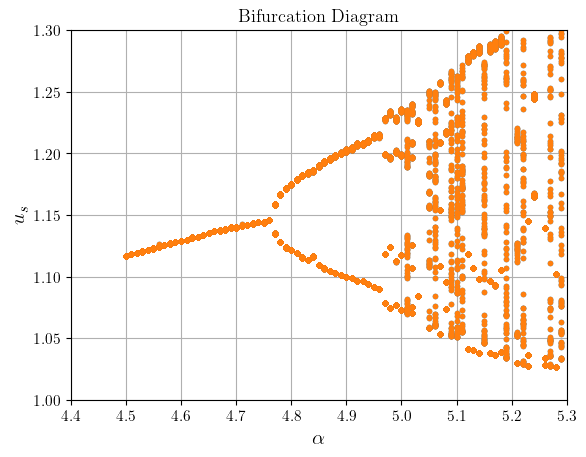

In [42]:
plt.plot(parameter,maximum,'.')
plt.ylim([1,1.3])
plt.xlim([4.4,5.3])
plt.show()